In [ ]:
import numpy as np
import pandas as pd
import io
from google.colab.data_table import DataTable
DataTable.max_columns = 100
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ranksums
from scipy.stats import levene
from scipy.stats import kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA
from google.colab import drive
#drive.mount('/content/drive')
from scipy.optimize import curve_fit

In [ ]:
 pip install pillow

In [ ]:
from PIL import Image

In [ ]:
path = "/content/drive/MyDrive/HLQ_DATASETS/demographics.xlsx"
path1 = "/content/drive/MyDrive/Data/HLQ Scoring Using Excel sheet 1.xlsx"
path2 = "/content/drive/MyDrive/Data/HLQ Scoring Using Excel sheet 2.xlsx"



In [ ]:
Demographic = pd.read_excel(path)
HLQ1 = pd.read_excel(path1)
HLQ2 = pd.read_excel(path2)

In [ ]:
#Merging
merged = pd.concat([HLQ1,HLQ2])
merged = merged.drop(merged.index[102])
merged = merged.drop(merged.index[201])
merged.reset_index(drop=True, inplace=True)

In [ ]:
final = pd.concat([merged, Demographic], axis=1)
final['gender'] = final['gender'].replace(['Genderfluid'], '3')
final['gender'] = final['gender'].replace(['3(Trans(nonbi))'], '3')
final['Age '] = final['Age '].replace(3.0,2.0)
final['Age '] = final['Age '].replace(4.0,2.0)
final['gender'] = final['gender'].astype(int)
final['ID'] = pd.to_numeric(final['ID'], errors='coerce').astype('Int64')
final['gender'].fillna(-1, inplace=True)
final.rename(columns = {'illness/disability, yes or no':'illness'}, inplace = True)
final['illness'] = final['illness'].apply(lambda x: 1 if x != 0 else 0)
final.loc[final['ID'] == 59, 'illness'] = 0
final.loc[final['ID'] == 66, 'illness'] = 0
final.loc[final['ID'] == 95, 'illness'] = 0
final.loc[final['ID'] == 152, 'illness'] = 0
final.loc[final['ID'] == 178  , 'illness'] = 0


In [ ]:
final.to_csv('data.csv', index=False)

In [ ]:
#Optimal Sample Size

SIAS_First_Year = 300
SIAS_Second_Year = 177
SIAS_Third_Year = 161
SIAS_Fourth_Year = 34

GSB_First_Year = 240
GSB_Second_Year = 174

Total_SIAS = SIAS_First_Year + SIAS_Second_Year + SIAS_Third_Year + SIAS_Fourth_Year
Total_GSB = GSB_First_Year + GSB_Second_Year

Z = 1.96
e = 0.05

p = 0.5

Numerator = ((Z**2) * p *(1-p))/(e**2)
Denominator = Total_SIAS - 1 + Numerator

optimal_samplesize_SIAS = Total_SIAS *(Numerator/Denominator) #Formula
optimal_samplesize_SIASGSB = (Total_SIAS+Total_GSB)*(Numerator/Denominator)
print("The optimal smaple size considering only SIAS students is with :", optimal_samplesize_SIAS)
print("The optimal smaple size considering SIAS + GSB students is:", optimal_samplesize_SIASGSB)
print(Total_SIAS)

The optimal smaple size considering only SIAS students is with : 244.66007051063343
The optimal smaple size considering SIAS + GSB students is: 395.3881496645058
672


In [ ]:
e2 = 0.06
Numerator = ((Z**2) * p *(1-p))/(e2**2)
Denominator = Total_SIAS - 1 + Numerator

optimal_samplesize_SIAS = Total_SIAS *(Numerator/Denominator) #Formula
optimal_samplesize_SIASGSB = (Total_SIAS+Total_GSB)*(Numerator/Denominator)
print("The optimal smaple size considering only SIAS students is with :", optimal_samplesize_SIAS)
print("The optimal smaple size considering SIAS + GSB students is:", optimal_samplesize_SIASGSB)
print(Total_SIAS)

The optimal smaple size considering only SIAS students is with : 191.16966824644547
The optimal smaple size considering SIAS + GSB students is: 308.9438388625592
672


In [ ]:
e3 = 0.07

Numerator = ((Z**2) * p *(1-p))/(e3**2)
Denominator = Total_SIAS - 1 + Numerator

optimal_samplesize_SIAS = Total_SIAS *(Numerator/Denominator) #Formula
optimal_samplesize_SIASGSB = (Total_SIAS+Total_GSB)*(Numerator/Denominator)
print("The optimal smaple size considering only SIAS students is with :", optimal_samplesize_SIAS)
print("The optimal smaple size considering SIAS + GSB students is:", optimal_samplesize_SIASGSB)
print(Total_SIAS)

The optimal smaple size considering only SIAS students is with : 151.916955017301
The optimal smaple size considering SIAS + GSB students is: 245.50865051903108
672


In [ ]:
e4 = 0.08
Numerator = ((Z**2) * p *(1-p))/(e4**2)
Denominator = Total_SIAS - 1 + Numerator

optimal_samplesize_SIAS = Total_SIAS *(Numerator/Denominator) #Formula
optimal_samplesize_SIASGSB = (Total_SIAS+Total_GSB)*(Numerator/Denominator)
print("The optimal smaple size considering only SIAS students is with :", optimal_samplesize_SIAS)
print("The optimal smaple size considering SIAS + GSB students is:", optimal_samplesize_SIASGSB)
print(Total_SIAS)

The optimal smaple size considering only SIAS students is with : 122.8189084265814
The optimal smaple size considering SIAS + GSB students is: 198.48412879652886
672


In [ ]:
e5 = 0.09
Numerator = ((Z**2) * p *(1-p))/(e5**2)
Denominator = Total_SIAS - 1 + Numerator

optimal_samplesize_SIAS = Total_SIAS *(Numerator/Denominator) #Formula
optimal_samplesize_SIASGSB = (Total_SIAS+Total_GSB)*(Numerator/Denominator)
print("The optimal smaple size considering only SIAS students is with :", optimal_samplesize_SIAS)
print("The optimal smaple size considering SIAS + GSB students is:", optimal_samplesize_SIASGSB)
print(Total_SIAS)

The optimal smaple size considering only SIAS students is with : 100.91295442107732
The optimal smaple size considering SIAS + GSB students is: 163.08254241263387
672


In [ ]:
e6 = 0.1
Numerator = ((Z**2) * p *(1-p))/(e6**2)
Denominator = Total_SIAS - 1 + Numerator

optimal_samplesize_SIAS = Total_SIAS *(Numerator/Denominator) #Formula
optimal_samplesize_SIASGSB = (Total_SIAS+Total_GSB)*(Numerator/Denominator)
print("The optimal smaple size considering only SIAS students is with :", optimal_samplesize_SIAS)
print("The optimal smaple size considering SIAS + GSB students is:", optimal_samplesize_SIASGSB)
print(Total_SIAS)

The optimal smaple size considering only SIAS students is with : 84.14017521902376
The optimal smaple size considering SIAS + GSB students is: 135.97653316645804
672


In [ ]:
# Test for Normality

normality = final.copy()

normality.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
normality.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
normality.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
normality.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
normality.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
normality.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
normality.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
normality.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
normality.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)

normality['Scale1_Mean'] = normality['Scale1_Mean'].astype(float)
normality['Scale2_Mean'] = normality['Scale2_Mean'].astype(float)
normality['Scale3_Mean'] = normality['Scale3_Mean'].astype(float)
normality['Scale4_Mean'] = normality['Scale4_Mean'].astype(float)
normality['Scale5_Mean'] = normality['Scale5_Mean'].astype(float)
normality['Scale6_Mean'] = normality['Scale6_Mean'].astype(float)
normality['Scale7_Mean'] = normality['Scale7_Mean'].astype(float)
normality['Scale8_Mean'] = normality['Scale8_Mean'].astype(float)
normality['Scale9_Mean'] = normality['Scale9_Mean'].astype(float)


test_statistic, p_value1 = stats.kstest(normality['Scale1_Mean'], 'norm')
print("P-value for Scale 1 :", p_value1)

test_statistic, p_value2 = stats.kstest(normality['Scale2_Mean'], 'norm')
print("P-value for Scale 2:", p_value2)

test_statistic, p_value3 = stats.kstest(normality['Scale3_Mean'], 'norm')
print("P-value for Scale 3:", p_value3)

test_statistic, p_value4 = stats.kstest(normality['Scale4_Mean'], 'norm')
print("P-value for Scale 4:", p_value4)

test_statistic, p_value5 = stats.kstest(normality['Scale5_Mean'], 'norm')
print("P-value for Scale 5:", p_value5)

test_statistic, p_value6 = stats.kstest(normality['Scale6_Mean'], 'norm')
print("P-value for Scale 6:", p_value6)

test_statistic, p_value7 = stats.kstest(normality['Scale7_Mean'], 'norm')
print("P-value for Scale 7:", p_value7)

test_statistic, p_value8 = stats.kstest(normality['Scale8_Mean'], 'norm')
print("P-value for Scale 8:", p_value8)

test_statistic, p_value9 = stats.kstest(normality['Scale9_Mean'], 'norm')
print("P-value for Scale 9:", p_value9)

P-value for Scale 1 : 1.0397238597998553e-244
P-value for Scale 2: 2.4801104980628622e-231
P-value for Scale 3: 1.8525665474841715e-243
P-value for Scale 4: 1.989059590499628e-282
P-value for Scale 5: 1.8525665474841715e-243
P-value for Scale 6: 0.0
P-value for Scale 7: 2.206179327728759e-297
P-value for Scale 8: 2.206179327728759e-297
P-value for Scale 9: 3.0971299248633437e-308


In [ ]:
from scipy.stats import shapiro

test_statistic1, p_value1 = shapiro(normality['Scale1_Mean'])
print("P-value for Scale 1:", p_value1)

test_statistic2, p_value2 = shapiro(normality['Scale2_Mean'])
print("P-value for Scale 2:", p_value2)

test_statistic3, p_value3 = shapiro(normality['Scale3_Mean'])
print("P-value for Scale 3:", p_value3)

test_statistic4, p_value4 = shapiro(normality['Scale4_Mean'])
print("P-value for Scale 4:", p_value4)

test_statistic5, p_value5 = shapiro(normality['Scale5_Mean'])
print("P-value for Scale 5:", p_value5)

test_statistic6, p_value6 = shapiro(normality['Scale6_Mean'])
print("P-value for Scale 6:", p_value6)

test_statistic7, p_value7 = shapiro(normality['Scale7_Mean'])
print("P-value for Scale 7:", p_value7)

test_statistic8, p_value8 = shapiro(normality['Scale8_Mean'])
print("P-value for Scale 8:", p_value8)

test_statistic9, p_value9= shapiro(normality['Scale9_Mean'])
print("P-value for Scale 9:", p_value9)


#Scale 7 and Scale 8 follow normal distribution.

P-value for Scale 1: 2.9387838367256336e-05
P-value for Scale 2: 0.0022896667942404747
P-value for Scale 3: 0.0017604685854166746
P-value for Scale 4: 5.150083325133892e-06
P-value for Scale 5: 0.003134211292490363
P-value for Scale 6: 0.00598422484472394
P-value for Scale 7: 0.048030368983745575
P-value for Scale 8: 0.0572141595184803
P-value for Scale 9: 0.0007603334961459041


In [ ]:
#Gaussian Curve
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [ ]:
final.query('school == 1.0')

ID Part 1 Q1 Part 1 Q2 Part 1 Q3 Part 1 Q4 Part 1 Q5 Part 1 Q6  \
0      1         3         2         3         2         4         3   
1      2         3         1         2         2         3         3   
2      3         3         2         2         3         3         3   
3      4         2         2         3         2         3         3   
4      5         3         2         3         3         3         3   
..   ...       ...       ...       ...       ...       ...       ...   
195  196         3         2         2         3         3         3   
196  197         3         3         4         4         2         3   
197  198         4         3         3         2         4         3   
198  199         3         3         3         2         3         3   
199  200         3         4         4         4         4         4   

    Part 1 Q7 Part 1 Q8 Part 1 Q9  ... exact illness health insurance  \
0           3         3         2  ...           NaN                1   
1           2         2         3  ...           NaN                1   
2           3         2         2  ...    depression                2   
3           2         2         2  ...           NaN                1   
4           2         3         3  ...           NaN                1   
..        ...       ...       ...  ...           ...              ...   
195         2         3         2  ...           NaN                1   
196         3         4         3  ...      epilepsy                1   
197         3         4         4  ...           NaN                1   
198         3         3         3  ...           NaN                1   
199         3         4         4  ...           NaN                1   

                                 language smoking smoking duration tobacco  \
0                      English, Malayalam       0              NaN       0   
1                 malayalam,english,tamil       0               na       0   
2                 malayalam,english,tamil       0               na       0   
3                       malayalam,english       0               na       0   
4                       malayalam,english       0               na       0   
..                                    ...     ...              ...     ...   
195           english,hindi,tanil,kannada       2          6months       0   
196  malayalam,hindi,english,tamil,french       0               na       0   
197           tamil,english,hindif,french       0               na       0   
198              english,malayalam,tamil.       0               na       0   
199                         english,hindi       0              NaN       0   

    food preference on campus gym reasons for not using gym  \
0                 3             2                         2   
1                 3             1                        na   
2                 3             2                         1   
3                 3             1                        na   
4                 3             1                        na   
..              ...           ...                       ...   
195               2             2          lack of interest   
196               3             1                       NaN   
197               2             2             outdoorsports   
198               3             2                         1   
199               3             1                       NaN   

    prescription medication  
0                         1  
1                         1  
2                         2  
3                         2  
4                         2  
..                      ...  
195                       2  
196                       1  
197                       1  
198                       2  
199                       2  

[196 rows x 88 columns]

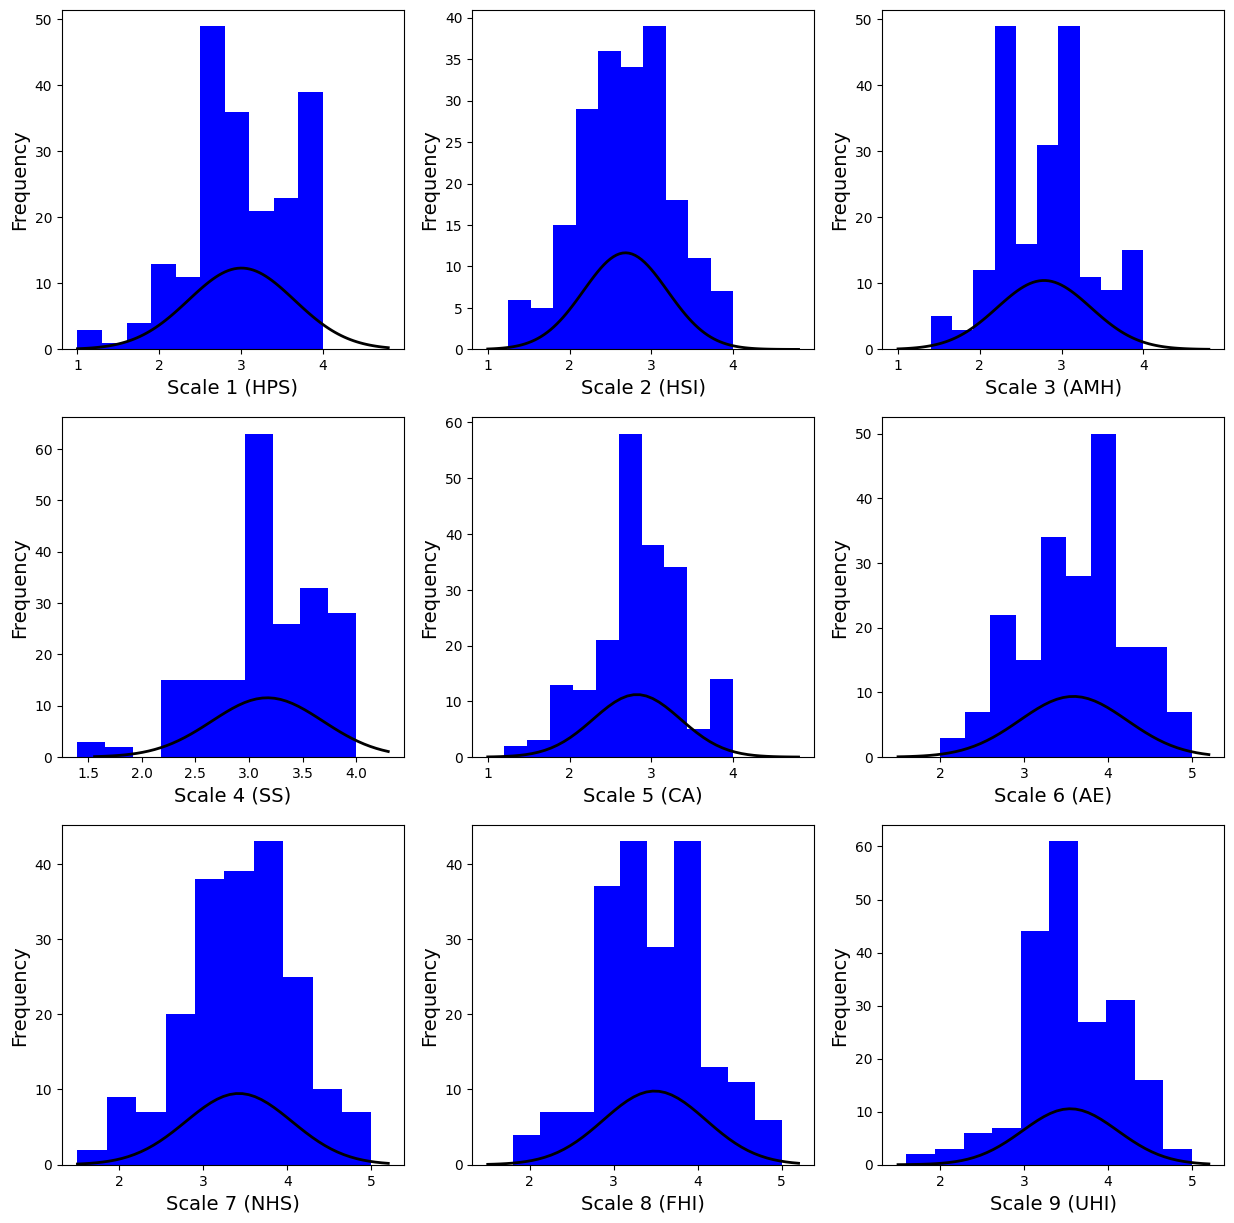

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

S1 = final['Scale 1 (HPS) mean score']
S1 = np.array(S1, dtype=float)

axs[0][0].hist(S1, bins=10, density=False, alpha= 1.0, color='b')

mu, std = norm.fit(S1)
xmin, xmax = plt.xlim()
x = np.linspace(1, 4.8, 100)
p = norm.pdf(x, mu , std)*20

axs[0][0].plot(x, p, 'k', linewidth=2)
axs[0][0].set_ylabel("Frequency")
axs[0][0].set_xlabel("Scale 1 (HPS)")

S2 = final['Scale 2 (HSI) mean score']
S2 = np.array(S2, dtype=float)

axs[0][1].hist(S2, bins=10, density=False, alpha= 1.0, color='b')

mu2, std2 = norm.fit(S2)
xmin, xmax = plt.xlim()
x2 = np.linspace(1, 4.8, 100)
p2 = norm.pdf(x2, mu2, std2)*15

axs[0][1].plot(x2, p2, 'k', linewidth=2)
axs[0][1].set_ylabel("Frequency")
axs[0][1].set_xlabel("Scale 2 (HSI)")

S3 = final['Scale 3 (AMH) mean score']
S3 = np.array(S3, dtype=float)

axs[0][2].hist(S3, bins=10, density=False, alpha= 1.0, color='b')

mu3, std3 = norm.fit(S3)
xmin, xmax = plt.xlim()
x3 = np.linspace(1, 4.8, 100)
p3 = norm.pdf(x3, mu3,std3)*15

axs[0][2].plot(x3, p3, 'k', linewidth=2)
axs[0][2].set_ylabel("Frequency")
axs[0][2].set_xlabel("Scale 3 (AMH)")

S4 = final['Scale 4 (SS) mean score']
S4 = np.array(S4, dtype=float)

axs[1][0].hist(S4, bins=10, density=False, alpha= 1.0, color='b')

mu4, std4 = norm.fit(S4)
xmin, xmax = plt.xlim()
x4 = np.linspace(1.56, 4.3, 50)
p4 = norm.pdf(x4, mu4 ,std4+0.00567)*15

axs[1][0].plot(x4, p4, 'k', linewidth=2)
axs[1][0].set_ylabel("Frequency")
axs[1][0].set_xlabel("Scale 4 (SS)")

S5 = final['Scale 5 (CA) mean score']
S5 = np.array(S5, dtype=float)

axs[1][1].hist(S5, bins=10, density=False, alpha= 1.0, color='b')

mu5, std5 = norm.fit(S5)
xmin, xmax = plt.xlim()
x5 = np.linspace(1.0, 4.8, 50)
p5 = norm.pdf(x5, mu5 ,std5)*15

axs[1][1].plot(x5, p5, 'k', linewidth=2)
axs[1][1].set_ylabel("Frequency")
axs[1][1].set_xlabel("Scale 5 (CA)")

S6 = final['Scale 6 (AE) mean score']
S6 = np.array(S6, dtype=float)

axs[1][2].hist(S6, bins=10, density=False, alpha= 1.0, color='b')

mu6, std6 = norm.fit(S6)
xmin, xmax = plt.xlim()
x6 = np.linspace(1.5, 5.2, 50)
p6 = norm.pdf(x6, mu6 ,std6)*15

axs[1][2].plot(x6, p6, 'k', linewidth=2)
axs[1][2].set_ylabel("Frequency")
axs[1][2].set_xlabel("Scale 6 (AE)")

S7 = final['Scale 7 (NHS) mean score']
S7 = np.array(S7, dtype=float)

axs[2][0].hist(S7, bins=10, density=False, alpha= 1.0, color='b')

mu7, std7 = norm.fit(S7)
xmin, xmax = plt.xlim()
x7 = np.linspace(1.5, 5.2, 50)
p7 = norm.pdf(x7, mu7 ,std7)*15

axs[2][0].plot(x7, p7, 'k', linewidth=2)
axs[2][0].set_ylabel("Frequency")
axs[2][0].set_xlabel("Scale 7 (NHS)")

S8 = final['Scale 8 (FHI) mean score']
S8 = np.array(S8, dtype=float)

axs[2][1].hist(S8, bins=10, density=False, alpha= 1.0, color='b')

mu8, std8 = norm.fit(S8)
xmin, xmax = plt.xlim()
x8 = np.linspace(1.5, 5.2, 50)
p8 = norm.pdf(x8, mu8,std8)*15

axs[2][1].plot(x8, p8, 'k', linewidth=2)
axs[2][1].set_ylabel("Frequency")
axs[2][1].set_xlabel("Scale 8 (FHI)")

S9 = final['Scale 9 (UHI) mean score']
S9 = np.array(S9, dtype=float)

axs[2][2].hist(S9, bins=10, density=False, alpha= 1.0, color='b')

mu9, std9 = norm.fit(S9)
xmin, xmax = plt.xlim()
x9 = np.linspace(1.5, 5.2, 50)
p9 = norm.pdf(x9, mu9,std9)*15

axs[2][2].plot(x9, p9, 'k', linewidth=2)
axs[2][2].set_ylabel("Frequency")
axs[2][2].set_xlabel("Scale 9 (UHI)")

for ax in axs.flatten():
    ax.grid(False)

font_size = 14

for row in axs:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)

plt.savefig('Distributions_Final.png', format='png', bbox_inches='tight')
plt.savefig('Distributions_Final.eps', format='eps', bbox_inches='tight')
plt.savefig("Distributions_Final.jpg", format="jpeg", bbox_inches='tight')
plt.savefig("Distributions_Final.tif", format="tiff", bbox_inches='tight')

plt.show()

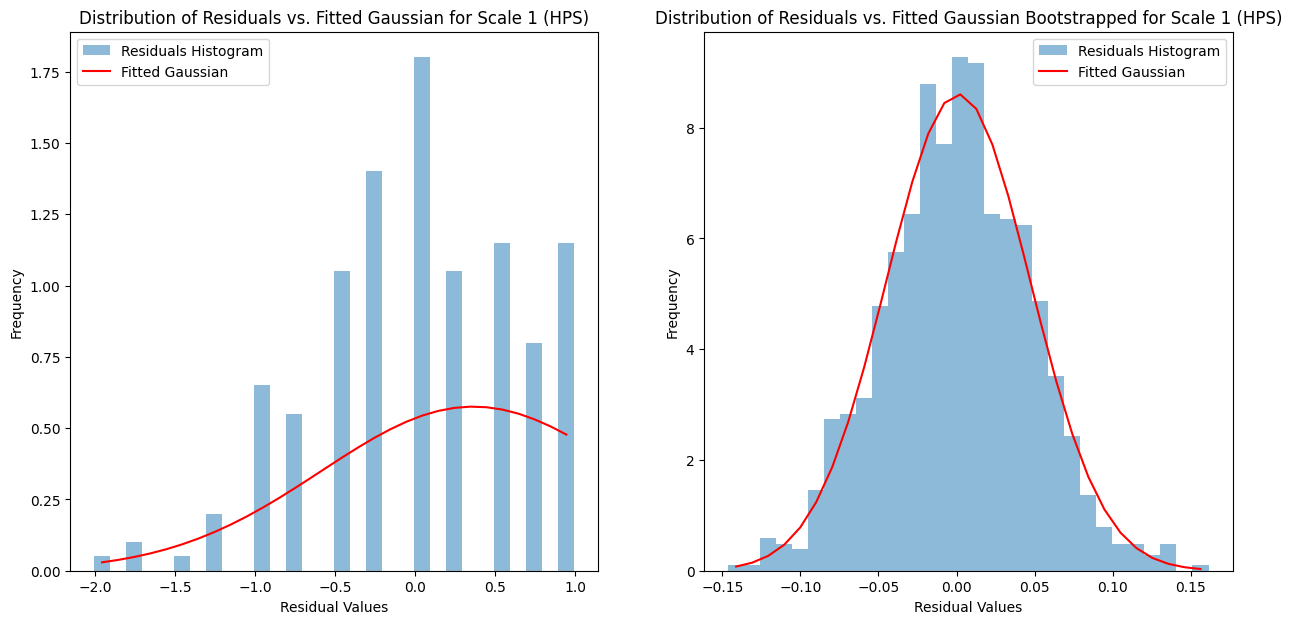

Shapiro-Wilk test statistic : 0.9616
Shapiro-Wilk p-value : 0.0000
Shapiro-Wilk test statistic bootstrapped: 0.9989
Shapiro-Wilk p-value bootrstarpped: 0.7946


In [ ]:
# Residuals

np.random.seed(20)

Scale1_Mean = final['Scale 1 (HPS) mean score'].mean()
new_dataframe1 = pd.DataFrame()
new_dataframe1['Scaled and Squared'] = (final['Scale 1 (HPS) mean score'] - Scale1_Mean)
new_dataframe1['Scaled and Squared'].astype(float)
Residuals1 = new_dataframe1['Scaled and Squared'].tolist()
Residulas_Bootstrapped1 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe1['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped1.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals1, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals1, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 1 (HPS)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped1, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped1, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 1 (HPS)')


plt.show()

shapiro_stat_1, shapiro_p_value_1 = stats.shapiro(new_dataframe1['Scaled and Squared'])
shapiro_stat_1b, shapiro_p_value_1b = stats.shapiro(Residulas_Bootstrapped1)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_1:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_1:.4f}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_1b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_1b:.4f}')


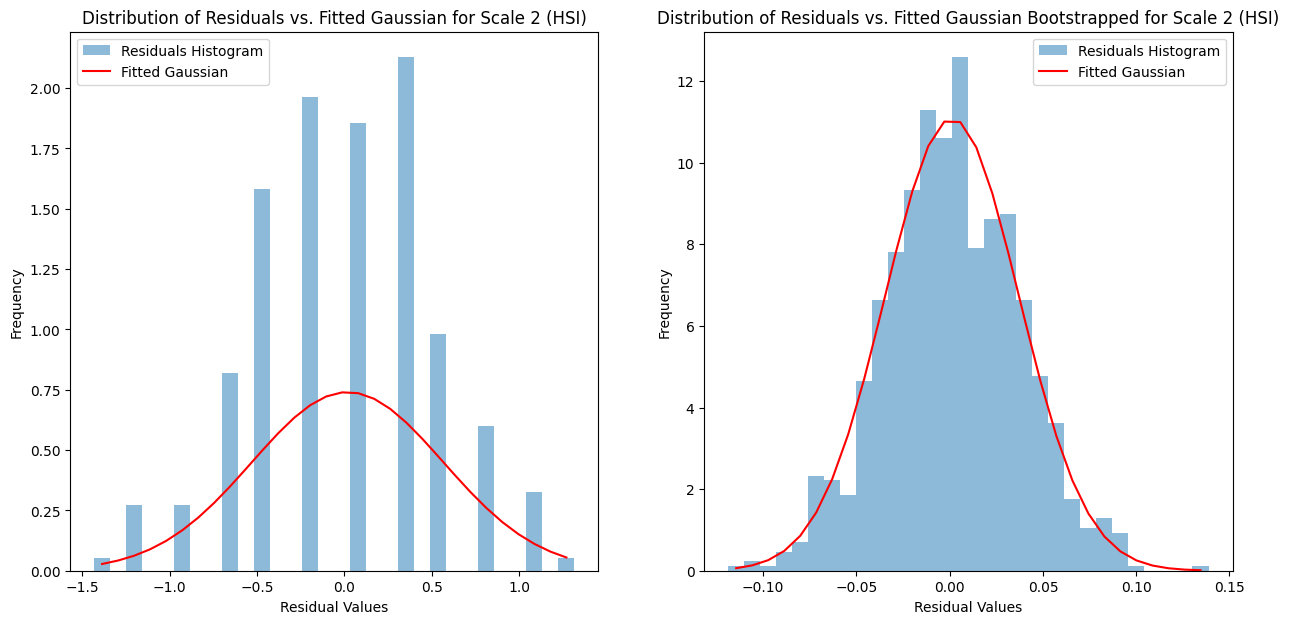

Shapiro-Wilk test statistic : 0.9770
Shapiro-Wilk p-value : 0.0022896667942404747
Shapiro-Wilk test statistic bootstrapped: 0.9992
Shapiro-Wilk p-value bootrstarpped: 0.9432


In [ ]:
# Residuals

np.random.seed(20)

Scale2_Mean = final['Scale 2 (HSI) mean score'].mean()
new_dataframe2 = pd.DataFrame()
new_dataframe2['Scaled and Squared'] = (final['Scale 2 (HSI) mean score'] - Scale2_Mean)
new_dataframe2['Scaled and Squared'].astype(float)
Residuals2 = new_dataframe2['Scaled and Squared'].tolist()
Residulas_Bootstrapped2 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe2['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped2.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals2, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals2, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 2 (HSI)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped2, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped2, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 2 (HSI)')


plt.show()

shapiro_stat_2, shapiro_p_value_2 = stats.shapiro(Residuals2)
shapiro_stat_2b, shapiro_p_value_2b = stats.shapiro(Residulas_Bootstrapped2)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_2:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_2}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_2b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_2b:.4f}')


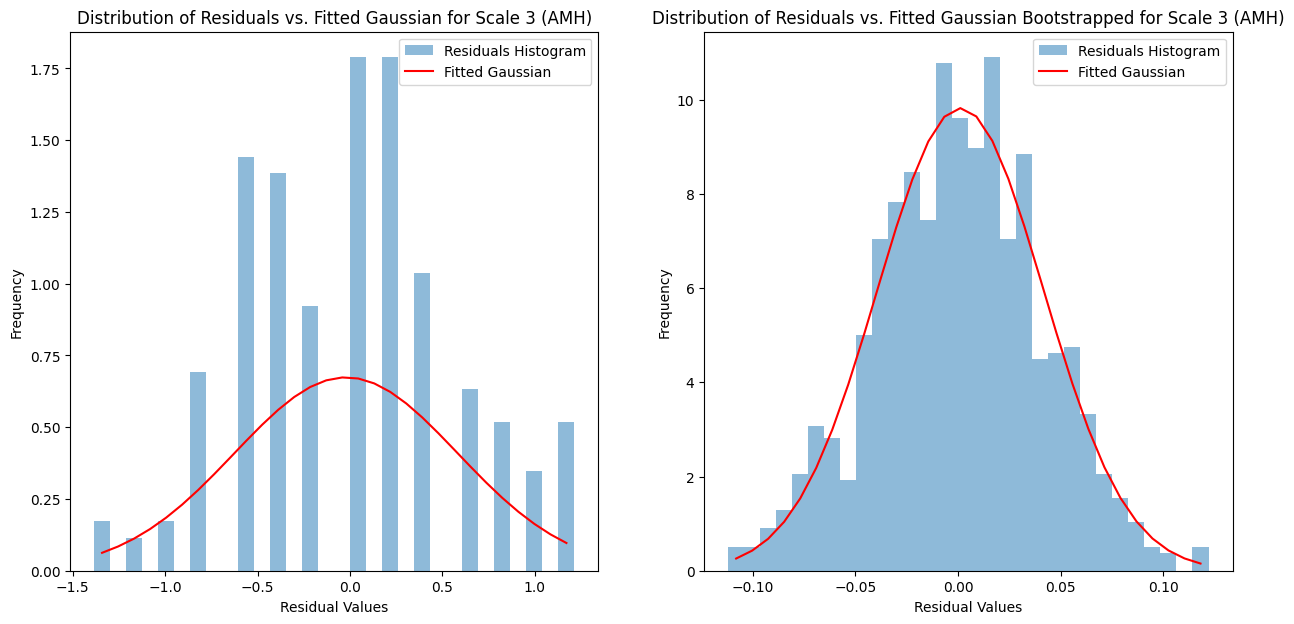

Shapiro-Wilk test statistic : 0.9762
Shapiro-Wilk p-value : 0.0017604685854166746
Shapiro-Wilk test statistic bootstrapped: 0.9983
Shapiro-Wilk p-value bootrstarpped: 0.4199


In [ ]:
# Residuals

np.random.seed(20)

Scale3_Mean = final['Scale 3 (AMH) mean score'].mean()
new_dataframe3 = pd.DataFrame()
new_dataframe3['Scaled and Squared'] = (final['Scale 3 (AMH) mean score'] - Scale3_Mean)
new_dataframe3['Scaled and Squared'].astype(float)
Residuals3 = new_dataframe3['Scaled and Squared'].tolist()
Residulas_Bootstrapped3 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe3['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped3.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals3, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals3, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 3 (AMH)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped3, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped3, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 3 (AMH)')


plt.show()

shapiro_stat_3, shapiro_p_value_3 = stats.shapiro(Residuals3)
shapiro_stat_3b, shapiro_p_value_3b = stats.shapiro(Residulas_Bootstrapped3)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_3:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_3}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_3b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_3b:.4f}')


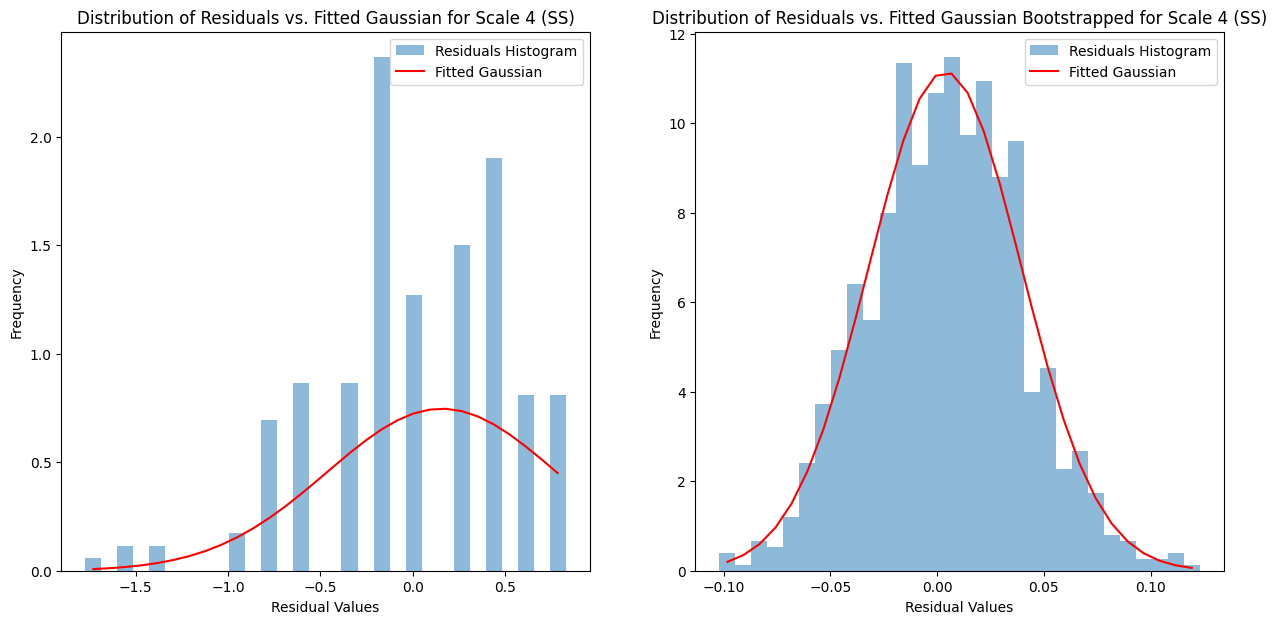

Shapiro-Wilk test statistic : 0.9544
Shapiro-Wilk p-value : 5.150083325133892e-06
Shapiro-Wilk test statistic bootstrapped: 0.9987
Shapiro-Wilk p-value bootrstarpped: 0.6608


In [ ]:
# Residuals

np.random.seed(20)

Scale4_Mean = final['Scale 4 (SS) mean score'].mean()
new_dataframe4 = pd.DataFrame()
new_dataframe4['Scaled and Squared'] = (final['Scale 4 (SS) mean score'] - Scale4_Mean)
new_dataframe4['Scaled and Squared'].astype(float)
Residuals4 = new_dataframe4['Scaled and Squared'].tolist()
Residulas_Bootstrapped4 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe4['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped4.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals4, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals4, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 4 (SS)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped4, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped4, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 4 (SS)')


plt.show()

shapiro_stat_4, shapiro_p_value_4 = stats.shapiro(Residuals4)
shapiro_stat_4b, shapiro_p_value_4b = stats.shapiro(Residulas_Bootstrapped4)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_4:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_4}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_4b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_4b:.4f}')


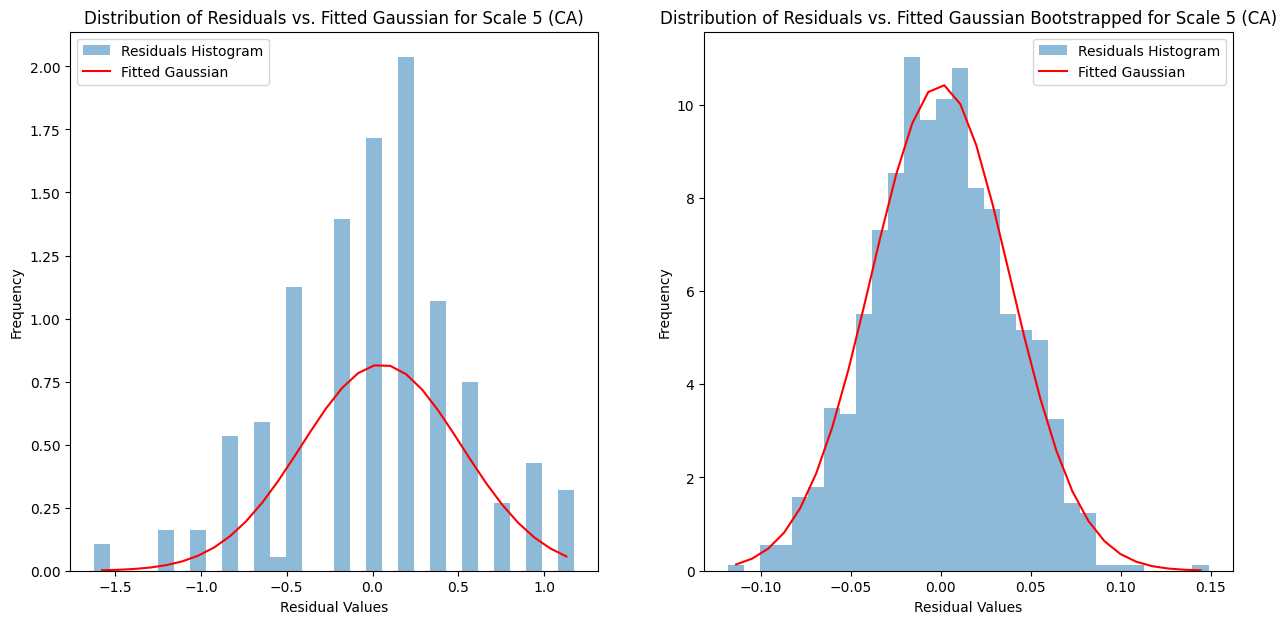

Shapiro-Wilk test statistic : 0.9780
Shapiro-Wilk p-value : 0.003134211292490363
Shapiro-Wilk test statistic bootstrapped: 0.9978
Shapiro-Wilk p-value bootrstarpped: 0.1986


In [ ]:
# Residuals

np.random.seed(20)

Scale5_Mean = final['Scale 5 (CA) mean score'].mean()
new_dataframe5 = pd.DataFrame()
new_dataframe5['Scaled and Squared'] = (final['Scale 5 (CA) mean score'] - Scale5_Mean)
new_dataframe5['Scaled and Squared'].astype(float)
Residuals5 = new_dataframe5['Scaled and Squared'].tolist()
Residulas_Bootstrapped5 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe5['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped5.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals5, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals5, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 5 (CA)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped5, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped5, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 5 (CA)')


plt.show()

shapiro_stat_5, shapiro_p_value_5 = stats.shapiro(Residuals5)
shapiro_stat_5b, shapiro_p_value_5b = stats.shapiro(Residulas_Bootstrapped5)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_5:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_5}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_5b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_5b:.4f}')


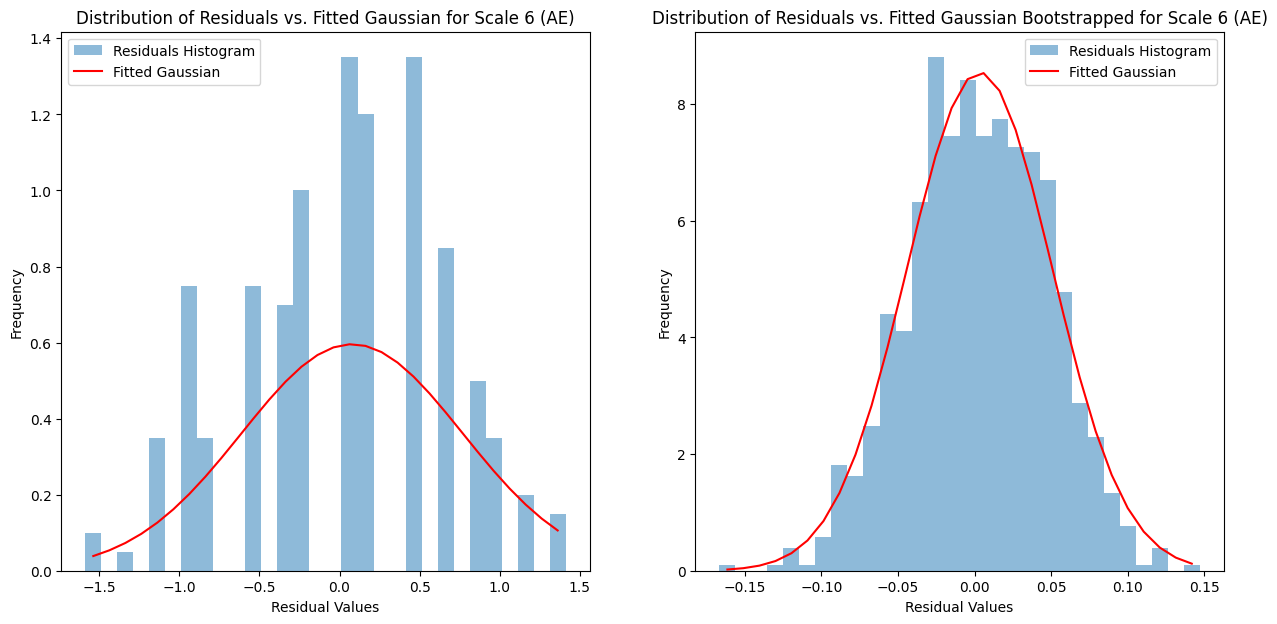

Shapiro-Wilk test statistic : 0.9800
Shapiro-Wilk p-value : 0.00598422484472394
Shapiro-Wilk test statistic bootstrapped: 0.9976
Shapiro-Wilk p-value bootrstarpped: 0.1495


In [ ]:
# Residuals
np.random.seed(20)
Scale6_Mean = final['Scale 6 (AE) mean score'].mean()
new_dataframe6 = pd.DataFrame()
new_dataframe6['Scaled and Squared'] = (final['Scale 6 (AE) mean score'] - Scale6_Mean)
new_dataframe6['Scaled and Squared'].astype(float)
Residuals6 = new_dataframe6['Scaled and Squared'].tolist()
Residulas_Bootstrapped6 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe6['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped6.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals6, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals6, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 6 (AE)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped6, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped6, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 6 (AE)')


plt.show()

shapiro_stat_6, shapiro_p_value_6 = stats.shapiro(Residuals6)
shapiro_stat_6b, shapiro_p_value_6b = stats.shapiro(Residulas_Bootstrapped6)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_6:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_6}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_6b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_6b:.4f}')


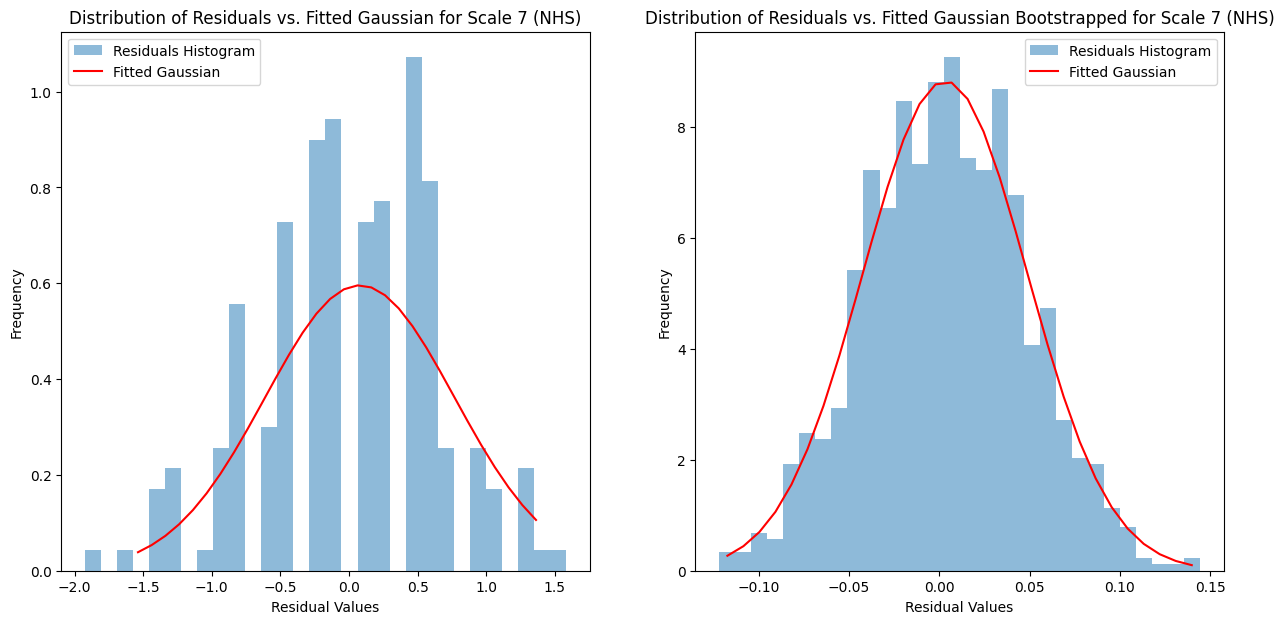

Shapiro-Wilk test statistic : 0.9862
Shapiro-Wilk p-value : 0.048030368983745575
Shapiro-Wilk test statistic bootstrapped: 0.9986
Shapiro-Wilk p-value bootrstarpped: 0.6200


In [ ]:
# Residuals

np.random.seed(20)

Scale7_Mean = final['Scale 7 (NHS) mean score'].mean()
new_dataframe7 = pd.DataFrame()
new_dataframe7['Scaled and Squared'] = (final['Scale 7 (NHS) mean score'] - Scale7_Mean)
new_dataframe7['Scaled and Squared'].astype(float)
Residuals7 = new_dataframe7['Scaled and Squared'].tolist()
Residulas_Bootstrapped7 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe7['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped7.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals6, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers1, A1, mu1, sigma1)

axs[0].hist(Residuals7, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 7 (NHS)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped7, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped7, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 7 (NHS)')


plt.show()

shapiro_stat_7, shapiro_p_value_7 = stats.shapiro(Residuals7)
shapiro_stat_7b, shapiro_p_value_7b = stats.shapiro(Residulas_Bootstrapped7)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_7:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_7}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_7b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_7b:.4f}')


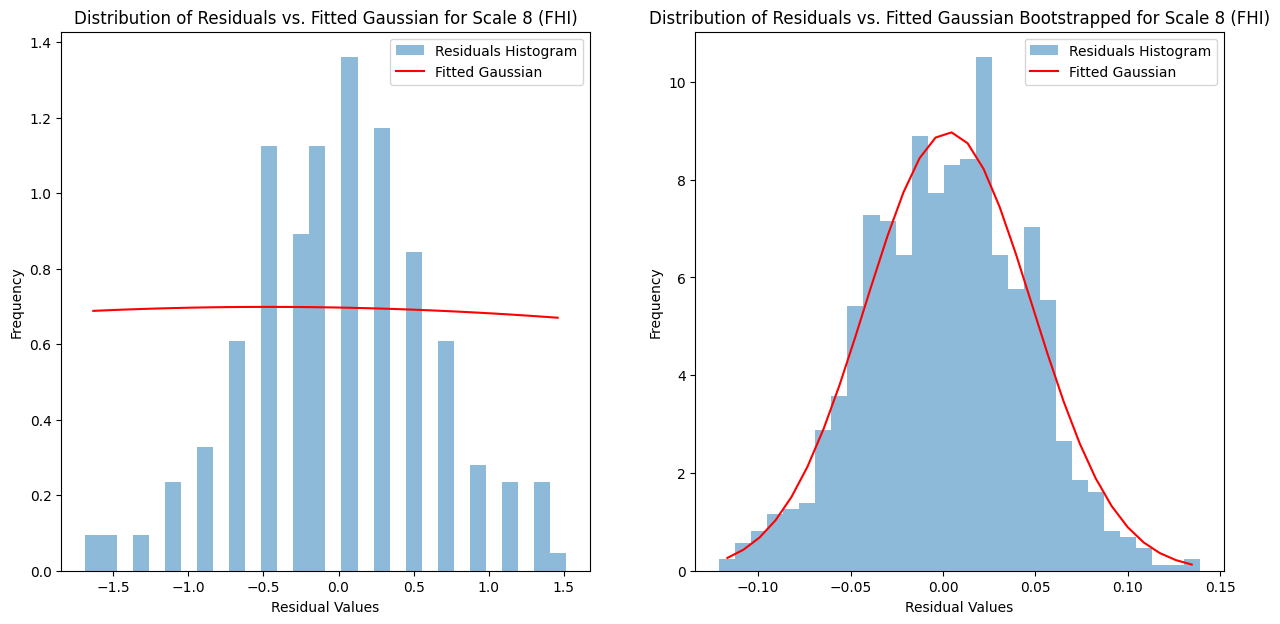

Shapiro-Wilk test statistic : 0.9867
Shapiro-Wilk p-value : 0.0572141595184803
Shapiro-Wilk test statistic bootstrapped: 0.9978
Shapiro-Wilk p-value bootrstarpped: 0.2236


In [ ]:
# Residuals
np.random.seed(20)
Scale8_Mean = final['Scale 8 (FHI) mean score'].mean()
new_dataframe8 = pd.DataFrame()
new_dataframe8['Scaled and Squared'] = (final['Scale 8 (FHI) mean score'] - Scale8_Mean)
new_dataframe8['Scaled and Squared'].astype(float)
Residuals8 = new_dataframe8['Scaled and Squared'].tolist()
Residulas_Bootstrapped8 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe8['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped8.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals8, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers, A1, mu1, sigma1)

axs[0].hist(Residuals8, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 8 (FHI)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped8, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped8, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 8 (FHI)')


plt.show()

shapiro_stat_8, shapiro_p_value_8 = stats.shapiro(Residuals8)
shapiro_stat_8b, shapiro_p_value_8b = stats.shapiro(Residulas_Bootstrapped8)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_8:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_8}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_8b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_8b:.4f}')


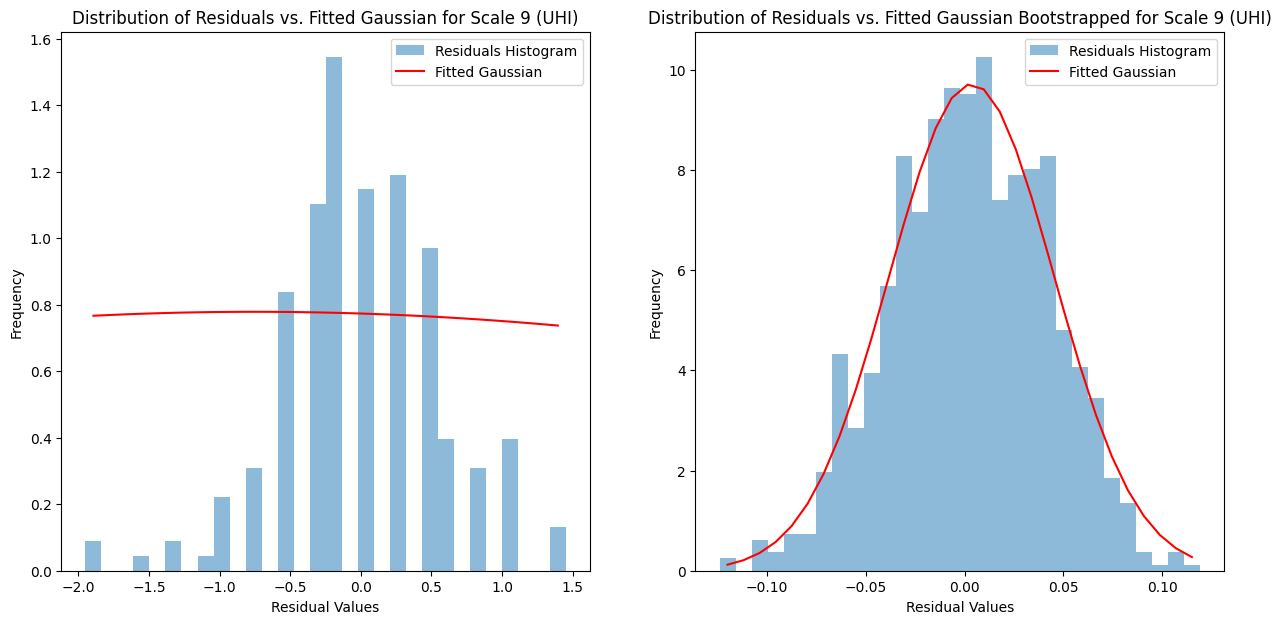

Shapiro-Wilk test statistic : 0.9734
Shapiro-Wilk p-value : 0.0007603334961459041
Shapiro-Wilk test statistic bootstrapped: 0.9976
Shapiro-Wilk p-value bootrstarpped: 0.1539


In [ ]:
# Residuals

np.random.seed(20)

Scale9_Mean = final['Scale 9 (UHI) mean score'].mean()
new_dataframe9 = pd.DataFrame()
new_dataframe9['Scaled and Squared'] = (final['Scale 9 (UHI) mean score'] - Scale9_Mean)
new_dataframe9['Scaled and Squared'].astype(float)
Residuals9 = new_dataframe9['Scaled and Squared'].tolist()
Residulas_Bootstrapped9 = []

for _ in range(1000):
  x = np.random.choice(new_dataframe9['Scaled and Squared'], size = 200 , replace = True)
  Residulas_Bootstrapped9.append(x.mean())

##################################
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

#Plot Gaussina
hist1, bin_edges1 = np.histogram(Residuals9, bins=30, density=True)
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
params1, covariance = curve_fit(gaussian, bin_centers1, hist1)

A1, mu1, sigma1 = params1

fitted_curve1 = gaussian(bin_centers, A1, mu1, sigma1)

axs[0].hist(Residuals9, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[0].plot(bin_centers1, fitted_curve1, 'r-', label='Fitted Gaussian')
axs[0].set_xlabel('Residual Values')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[0].set_title('Distribution of Residuals vs. Fitted Gaussian for Scale 9 (UHI)')

#Plot Gaussian Bootstrapped
hist, bin_edges = np.histogram(Residulas_Bootstrapped9, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params, covariance = curve_fit(gaussian, bin_centers, hist)

A, mu, sigma = params

fitted_curve = gaussian(bin_centers, A, mu, sigma)

axs[1].hist(Residulas_Bootstrapped9, bins=30, density=True, alpha=0.5, label='Residuals Histogram')
axs[1].plot(bin_centers, fitted_curve, 'r-', label='Fitted Gaussian')
axs[1].set_xlabel('Residual Values')
axs[1].set_ylabel('Frequency')
axs[1].legend()
axs[1].set_title('Distribution of Residuals vs. Fitted Gaussian Bootstrapped for Scale 9 (UHI)')


plt.show()

shapiro_stat_9, shapiro_p_value_9 = stats.shapiro(Residuals9)
shapiro_stat_9b, shapiro_p_value_9b = stats.shapiro(Residulas_Bootstrapped9)
print(f'Shapiro-Wilk test statistic : {shapiro_stat_9:.4f}')
print(f'Shapiro-Wilk p-value : {shapiro_p_value_9}')
print(f'Shapiro-Wilk test statistic bootstrapped: {shapiro_stat_9b:.4f}')
print(f'Shapiro-Wilk p-value bootrstarpped: {shapiro_p_value_9b:.4f}')


In [ ]:
#EFFECT SIZES COHENS'D
#FORMULA = DIFFERENCE OF MEAN/POOLED STANDARD DEVIATION
def cohend1(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

The values of Scale 1 (HPS) P Value (T-Test) = 0.050243452785487086 and P Value (Wilcoxon ranksum test) = 0.06354867409513704.
The values of Scale 2 (HSI) P Value (T-Test) = 0.7528386945113061 and P Value (Wilcoxon ranksum test) = 0.7386034867601223.
The values of Scale 3 (AMH) P Value (T-Test) = 0.06414480992231622 and P Value (Wilcoxon ranksum test) = 0.06193765905580219.
The values of Scale 4 (SS) P Value (T-Test) = 0.029671176073436462 and P Value (Wilcoxon ranksum test) = 0.08239277194511802.
The values of Scale 5 (CA) P Value (T-Test) = 0.08357474180005094 and P Value (Wilcoxon ranksum test) = 0.11572604242230676.
The values of Scale 6 (AE) P Value (T-Test) = 0.09871533584428688 and P Value (Wilcoxon ranksum test) = 0.18193754003446538.
The values of Scale 7 (NHS) P Value (T-Test) = 0.5917722952837965 and P Value (Wilcoxon ranksum test) = 0.6833767954061841.
The values of Scale 8 (FHI) P Value (T-Test) = 0.17540126203392747 and P Value (Wilcoxon ranksum test) = 0.1953606804995523

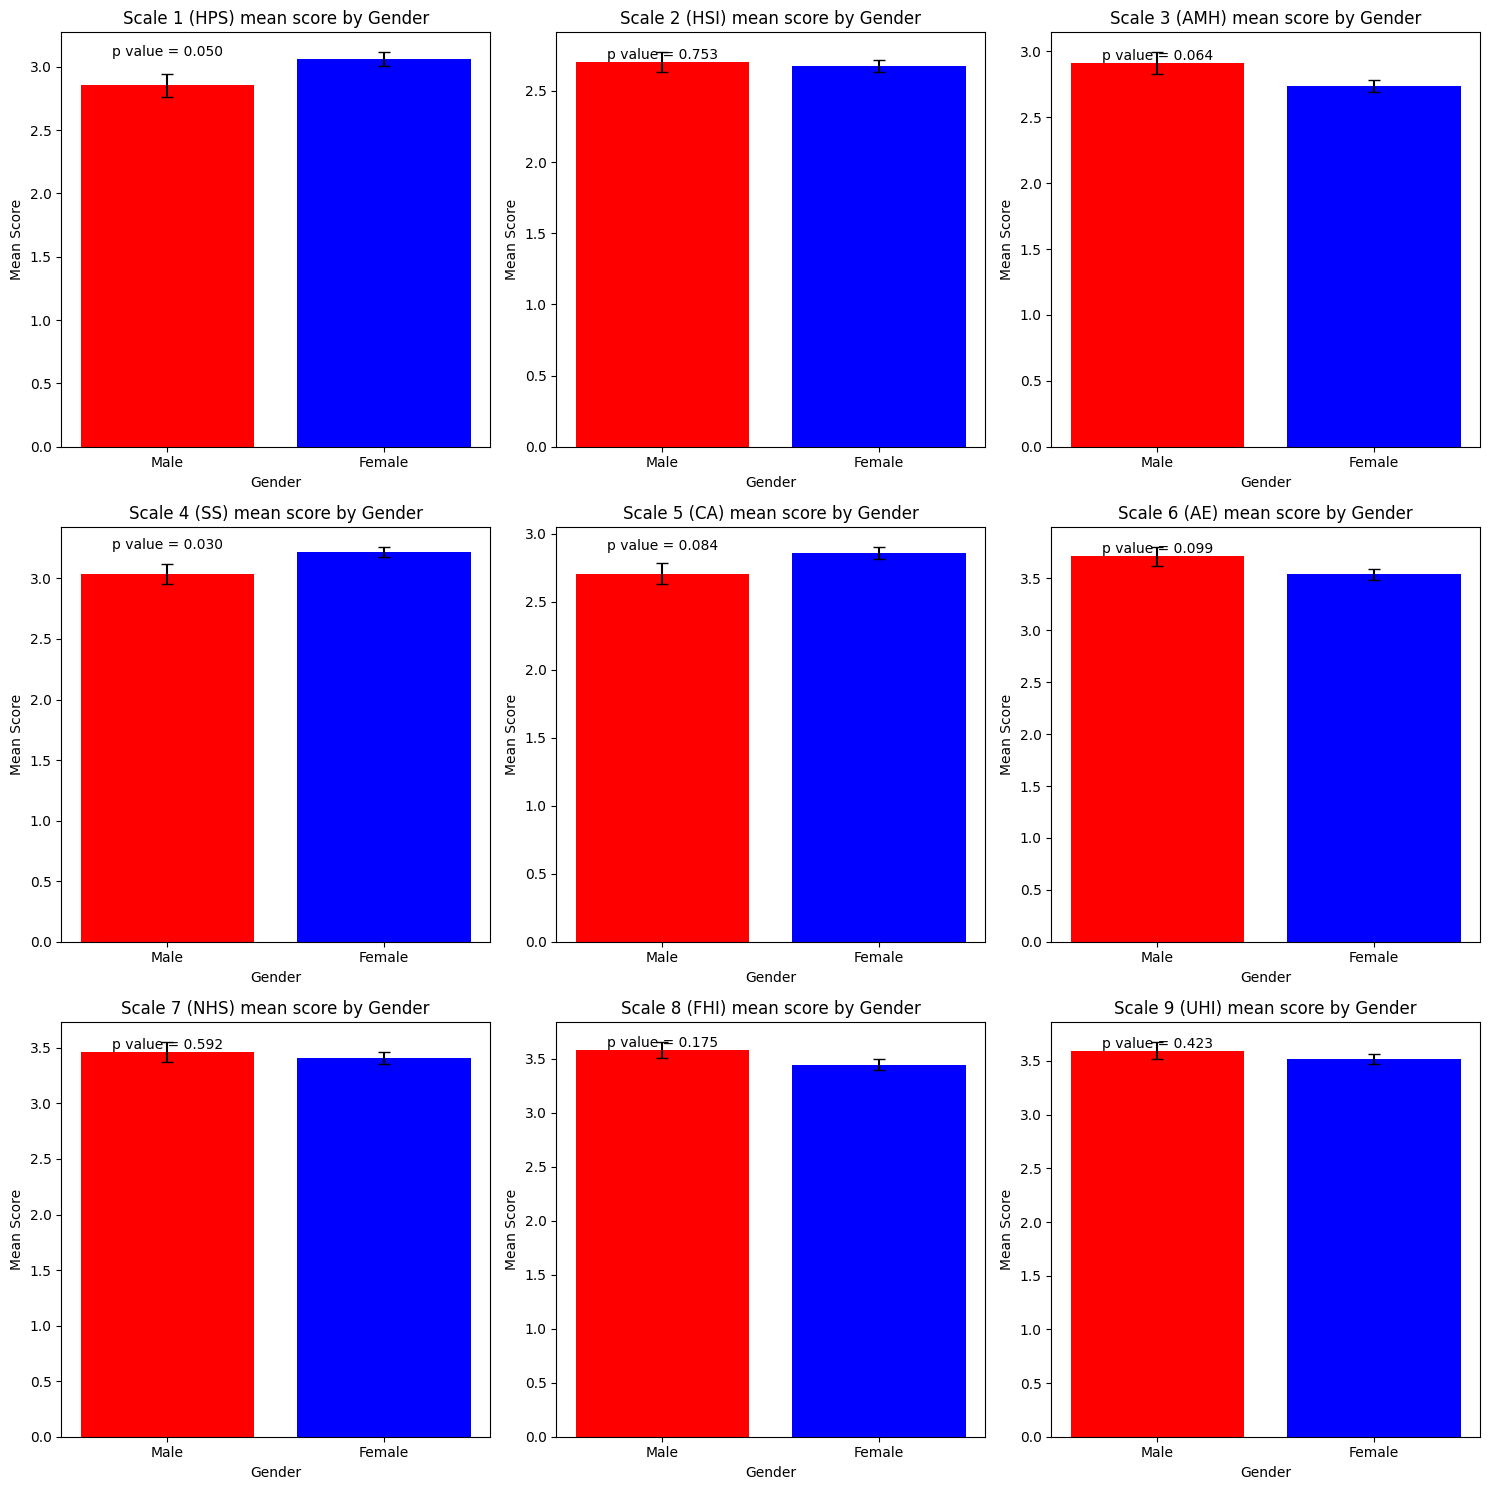

In [ ]:
##################################################
############# GENDER VS MEAN BAR GRAPH############
##################################################
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
Male = final.query('`gender` == 2.0')
Female = final.query('`gender` == 1.0')
Other = final.query('gender == 3.0')
##Plot 1
Male_mean = Male['Scale 1 (HPS) mean score'].mean()
Female_mean = Female['Scale 1 (HPS) mean score'].mean()
Male_Sd = Male['Scale 1 (HPS) Std Dev'].mean()
Female_Sd = Female['Scale 1 (HPS) Std Dev'].mean()

Male_Len = len(Male)
Female_Len = len(Female)

male_array = Male['Scale 1 (HPS) mean score'].sem()
female_array = Female['Scale 1 (HPS) mean score'].sem()

# P Value = 0.050243452785487086
# Wilcoxon ranksum test = 0.06354867409513704

Scale_1_Pvalue_M = Male['Scale 1 (HPS) mean score']
Scale_1_array_M = np.array(Scale_1_Pvalue_M)
Scale_1_Pvalue_F = Female['Scale 1 (HPS) mean score']
Scale_1_array_F = np.array(Scale_1_Pvalue_F)

Scale_1_array_M = pd.to_numeric(Scale_1_Pvalue_M, errors='coerce')
Scale_1_array_F= pd.to_numeric(Scale_1_Pvalue_F, errors='coerce')

Scale_1_array_M = Scale_1_array_M.dropna()
Scale_1_array_F = Scale_1_array_F.dropna()

result12 =  stats.ttest_ind(Scale_1_array_M, Scale_1_array_F)
P_Value_1 = result12.pvalue



x = ['Male','Female']
y = [Male_mean,Female_mean]
colours = ['red','blue']

statistic, pvalueranksum = ranksums(Scale_1_array_M, Scale_1_array_F)

axs[0][0].bar(x, y , yerr = [male_array, female_array],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {P_Value_1:.3f}', ha='center', va='bottom')
axs[0][0].set_xlabel('Gender')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Gender')

print(f"The values of Scale 1 (HPS) P Value (T-Test) = {P_Value_1} and P Value (Wilcoxon ranksum test) = {pvalueranksum}.")

#Plot 2
Male_mean2 = Male['Scale 2 (HSI) mean score'].mean()
Female_mean2 = Female['Scale 2 (HSI) mean score'].mean()

male_array2 = Male['Scale 2 (HSI) mean score'].sem()
female_array2 = Female['Scale 2 (HSI) mean score'].sem()

# P Value (T-Test) = 0.7528386945113061 and P Value (Wilcoxon ranksum test) = 0.7386034867601223.

Scale_2_Pvalue_M = Male['Scale 2 (HSI) mean score']
Scale_2_array_M = np.array(Scale_2_Pvalue_M)
Scale_2_Pvalue_F = Female['Scale 2 (HSI) mean score']
Scale_2_array_F = np.array(Scale_2_Pvalue_F)

Scale_2_array_M = pd.to_numeric(Scale_2_Pvalue_M, errors='coerce')
Scale_2_array_F= pd.to_numeric(Scale_2_Pvalue_F, errors='coerce')

Scale_2_array_M = Scale_2_array_M.dropna()
Scale_2_array_F = Scale_2_array_F.dropna()

result =  stats.ttest_ind(Scale_2_array_M, Scale_2_array_F)
P_Value_2 = result.pvalue


x = ['Male','Female']
y = [Male_mean2,Female_mean2]
colours = ['red','blue']

statistic, pvalueranksum2 = ranksums(Scale_2_array_M, Scale_2_array_F)

axs[0][1].bar(x, y , yerr = [male_array2, female_array2],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {P_Value_2:.3f}', ha='center', va='bottom')
axs[0][1].set_xlabel('Gender')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Gender')

print(f"The values of Scale 2 (HSI) P Value (T-Test) = {P_Value_2} and P Value (Wilcoxon ranksum test) = {pvalueranksum2}.")

#Plot 3

Male_mean3 = Male['Scale 3 (AMH) mean score'].mean()
Female_mean3 = Female['Scale 3 (AMH) mean score'].mean()

male_array3 = Male['Scale 3 (AMH) mean score'].sem()
female_array3 = Female['Scale 3 (AMH) mean score'].sem()

# P Value (T-Test) = 0.06414480992231622 and P Value (Wilcoxon ranksum test) = 0.06193765905580219.

Scale_3_Pvalue_M = Male['Scale 3 (AMH) mean score']
Scale_3_array_M = np.array(Scale_3_Pvalue_M)
Scale_3_Pvalue_F = Female['Scale 3 (AMH) mean score']
Scale_3_array_F = np.array(Scale_3_Pvalue_F)

Scale_3_array_M = pd.to_numeric(Scale_3_Pvalue_M, errors='coerce')
Scale_3_array_F= pd.to_numeric(Scale_3_Pvalue_F, errors='coerce')

Scale_3_array_M = Scale_3_array_M.dropna()
Scale_3_array_F = Scale_3_array_F.dropna()

result =  stats.ttest_ind(Scale_3_array_M, Scale_3_array_F)
P_Value_3 = result.pvalue


x = ['Male','Female']
y = [Male_mean3,Female_mean3]
colours = ['red','blue']
statistic, pvalueranksum3 = ranksums(Scale_3_array_M, Scale_3_array_F)

axs[0][2].bar(x, y , yerr = [male_array3, female_array3],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {P_Value_3:.3f}', ha='center', va='bottom')
axs[0][2].set_xlabel('Gender')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Gender')

print(f"The values of Scale 3 (AMH) P Value (T-Test) = {P_Value_3} and P Value (Wilcoxon ranksum test) = {pvalueranksum3}.")

#Plot 4
Male_mean4 = Male['Scale 4 (SS) mean score'].mean()
Female_mean4 = Female['Scale 4 (SS) mean score'].mean()

male_array4 = Male['Scale 4 (SS) mean score'].sem()
female_array4 = Female['Scale 4 (SS) mean score'].sem()

#P Value (T-Test) = 0.029671176073436462 and P Value (Wilcoxon ranksum test) = 0.08239277194511802.

Scale_4_Pvalue_M = Male['Scale 4 (SS) mean score']
Scale_4_array_M = np.array(Scale_4_Pvalue_M)
Scale_4_Pvalue_F = Female['Scale 4 (SS) mean score']
Scale_4_array_F = np.array(Scale_4_Pvalue_F)

Scale_4_array_M = pd.to_numeric(Scale_4_Pvalue_M, errors='coerce')
Scale_4_array_F= pd.to_numeric(Scale_4_Pvalue_F, errors='coerce')

Scale_4_array_M = Scale_4_array_M.dropna()
Scale_4_array_F = Scale_4_array_F.dropna()

result =  stats.ttest_ind(Scale_4_array_M, Scale_4_array_F)
P_Value_4= result.pvalue



x = ['Male','Female']
y = [Male_mean4,Female_mean4]
colours = ['red','blue']
statistic, pvalueranksum4 = ranksums(Scale_4_array_M, Scale_4_array_F)

axs[1][0].bar(x, y , yerr = [male_array4, female_array4],capsize = 4,color = colours)
axs[1][0].text(0, max(y), f'p value = {P_Value_4:.3f}', ha='center', va='bottom')
axs[1][0].set_xlabel('Gender')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Gender')

print(f"The values of Scale 4 (SS) P Value (T-Test) = {P_Value_4} and P Value (Wilcoxon ranksum test) = {pvalueranksum4}.")

#Plot 5

Male_mean5 = Male['Scale 5 (CA) mean score'].mean()
Female_mean5 = Female['Scale 5 (CA) mean score'].mean()

male_array5 = Male['Scale 5 (CA) mean score'].sem()
female_array5 = Female['Scale 5 (CA) mean score'].sem()

# P Value (T-Test) = 0.08357474180005094 and P Value (Wilcoxon ranksum test) = 0.11572604242230676.

Scale_5_Pvalue_M = Male['Scale 5 (CA) mean score']
Scale_5_array_M = np.array(Scale_5_Pvalue_M)
Scale_5_Pvalue_F = Female['Scale 5 (CA) mean score']
Scale_5_array_F = np.array(Scale_5_Pvalue_F)

Scale_5_array_M = pd.to_numeric(Scale_5_Pvalue_M, errors='coerce')
Scale_5_array_F= pd.to_numeric(Scale_5_Pvalue_F, errors='coerce')

Scale_5_array_M = Scale_5_array_M.dropna()
Scale_5_array_F = Scale_5_array_F.dropna()

result =  stats.ttest_ind(Scale_5_array_M, Scale_5_array_F)
P_Value_5= result.pvalue


x = ['Male','Female']
y = [Male_mean5,Female_mean5]
colours = ['red','blue']
statistic, pvalueranksum5 = ranksums(Scale_5_array_M, Scale_5_array_F)

axs[1][1].bar(x, y , yerr = [male_array5, female_array5],capsize = 4,color = colours)
axs[1][1].text(0, max(y), f'p value = {P_Value_5:.3f}', ha='center', va='bottom')
axs[1][1].set_xlabel('Gender')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Gender')

print(f"The values of Scale 5 (CA) P Value (T-Test) = {P_Value_5} and P Value (Wilcoxon ranksum test) = {pvalueranksum5}.")


#Plot 6

Male_mean6 = Male['Scale 6 (AE) mean score'].mean()
Female_mean6 = Female['Scale 6 (AE) mean score'].mean()

male_array6 = Male['Scale 6 (AE) mean score'].sem()
female_array6 = Female['Scale 6 (AE) mean score'].sem()

# P Value (T-Test) = 0.09871533584428688 and P Value (Wilcoxon ranksum test) = 0.18193754003446538.

Scale_6_Pvalue_M = Male['Scale 6 (AE) mean score']
Scale_6_array_M = np.array(Scale_6_Pvalue_M)
Scale_6_Pvalue_F = Female['Scale 6 (AE) mean score']
Scale_6_array_F = np.array(Scale_6_Pvalue_F)

Scale_6_array_M = pd.to_numeric(Scale_6_Pvalue_M, errors='coerce')
Scale_6_array_F= pd.to_numeric(Scale_6_Pvalue_F, errors='coerce')

Scale_6_array_M = Scale_6_array_M.dropna()
Scale_6_array_F = Scale_6_array_F.dropna()

result =  stats.ttest_ind(Scale_6_array_M, Scale_6_array_F)
P_Value_6= result.pvalue


x = ['Male','Female']
y = [Male_mean6,Female_mean6]
colours = ['red','blue']
statistic, pvalueranksum6 = ranksums(Scale_6_array_M, Scale_6_array_F)

axs[1][2].bar(x, y , yerr = [male_array6, female_array6],capsize = 4,color = colours)
axs[1][2].text(0, max(y), f'p value = {P_Value_6:.3f}', ha='center', va='bottom')
axs[1][2].set_xlabel('Gender')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Gender')

print(f"The values of Scale 6 (AE) P Value (T-Test) = {P_Value_6} and P Value (Wilcoxon ranksum test) = {pvalueranksum6}.")


#Plot 7

Male_mean7 = Male['Scale 7 (NHS) mean score'].mean()
Female_mean7 = Female['Scale 7 (NHS) mean score'].mean()

male_array7 = Male['Scale 7 (NHS) mean score'].sem()
female_array7 = Female['Scale 7 (NHS) mean score'].sem()

# P Value (T-Test) = 0.5917722952837965 and P Value (Wilcoxon ranksum test) = 0.6833767954061841.

Scale_7_Pvalue_M = Male['Scale 7 (NHS) mean score']
Scale_7_array_M = np.array(Scale_7_Pvalue_M)
Scale_7_Pvalue_F = Female['Scale 7 (NHS) mean score']
Scale_7_array_F = np.array(Scale_7_Pvalue_F)

Scale_7_array_M = pd.to_numeric(Scale_7_Pvalue_M, errors='coerce')
Scale_7_array_F= pd.to_numeric(Scale_7_Pvalue_F, errors='coerce')

Scale_7_array_M = Scale_7_array_M.dropna()
Scale_7_array_F = Scale_7_array_F.dropna()

result =  stats.ttest_ind(Scale_7_array_M, Scale_7_array_F)
P_Value_7= result.pvalue


x = ['Male','Female']
y = [Male_mean7,Female_mean7]
colours = ['red','blue']
statistic, pvalueranksum7 = ranksums(Scale_7_array_M, Scale_7_array_F)

axs[2][0].bar(x, y , yerr = [male_array7, female_array7],capsize = 4,color = colours)
axs[2][0].text(0, max(y), f'p value = {P_Value_7:.3f}', ha='center', va='bottom')
axs[2][0].set_xlabel('Gender')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Gender')

print(f"The values of Scale 7 (NHS) P Value (T-Test) = {P_Value_7} and P Value (Wilcoxon ranksum test) = {pvalueranksum7}.")


#Plot 8

Male_mean8 = Male['Scale 8 (FHI) mean score'].mean()
Female_mean8 = Female['Scale 8 (FHI) mean score'].mean()

male_array8 = Male['Scale 8 (FHI) mean score'].sem()
female_array8 = Female['Scale 8 (FHI) mean score'].sem()


# P Value (T-Test) = 0.17540126203392747 and P Value (Wilcoxon ranksum test) = 0.19536068049955235.

Scale_8_Pvalue_M = Male['Scale 8 (FHI) mean score']
Scale_8_array_M = np.array(Scale_8_Pvalue_M)
Scale_8_Pvalue_F = Female['Scale 8 (FHI) mean score']
Scale_8_array_F = np.array(Scale_8_Pvalue_F)

Scale_8_array_M = pd.to_numeric(Scale_8_Pvalue_M, errors='coerce')
Scale_8_array_F= pd.to_numeric(Scale_8_Pvalue_F, errors='coerce')

Scale_8_array_M = Scale_8_array_M.dropna()
Scale_8_array_F = Scale_8_array_F.dropna()

result =  stats.ttest_ind(Scale_8_array_M, Scale_8_array_F)
P_Value_8= result.pvalue


x = ['Male','Female']
y = [Male_mean8,Female_mean8]
colours = ['red','blue']
statistic, pvalueranksum8 = ranksums(Scale_8_array_M, Scale_8_array_F)

axs[2][1].bar(x, y , yerr = [male_array8, female_array8],capsize = 4,color = colours)
axs[2][1].text(0, max(y), f'p value = {P_Value_8:.3f}', ha='center', va='bottom')
axs[2][1].set_xlabel('Gender')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Gender')


print(f"The values of Scale 8 (FHI) P Value (T-Test) = {P_Value_8} and P Value (Wilcoxon ranksum test) = {pvalueranksum8}.")


#Plot 9

Male_mean9 = Male['Scale 9 (UHI) mean score'].mean()
Female_mean9 = Female['Scale 9 (UHI) mean score'].mean()

male_array9= Male['Scale 9 (UHI) mean score'].sem()
female_array9 = Female['Scale 9 (UHI) mean score'].sem()

#P Value (T-Test) = 0.4230381253372073 and P Value (Wilcoxon ranksum test) = 0.18240484572193982.

Scale_9_Pvalue_M = Male['Scale 9 (UHI) mean score']
Scale_9_array_M = np.array(Scale_9_Pvalue_M)
Scale_9_Pvalue_F = Female['Scale 9 (UHI) mean score']
Scale_9_array_F = np.array(Scale_9_Pvalue_F)

Scale_9_array_M = pd.to_numeric(Scale_9_Pvalue_M, errors='coerce')
Scale_9_array_F= pd.to_numeric(Scale_9_Pvalue_F, errors='coerce')

Scale_9_array_M = Scale_9_array_M.dropna()
Scale_9_array_F = Scale_9_array_F.dropna()

result =  stats.ttest_ind(Scale_9_array_M, Scale_9_array_F)
P_Value_9= result.pvalue


x = ['Male','Female']
y = [Male_mean9,Female_mean9]
colours = ['red','blue']
statistic, pvalueranksum9 = ranksums(Scale_9_array_M, Scale_9_array_F)

axs[2][2].bar(x, y , yerr = [male_array9, female_array9],capsize = 4,color = colours)
axs[2][2].text(0, max(y), f'p value = {P_Value_9:.3f}', ha='center', va='bottom')
axs[2][2].set_xlabel('Gender')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Gender')


print(f"The values of Scale 9 (UHI) P Value (T-Test) = {P_Value_9} and P Value (Wilcoxon ranksum test) = {pvalueranksum9}.")





plt.tight_layout()
plt.show()



In [ ]:
print("The mean of Male HPS is:", Male_mean)
print("The mean of Female HPS is:", Female_mean)
print("The mean of Male HSI is:", Male_mean2)
print("The mean of Female HSI is:", Female_mean2)
print("The mean of Male AMH is:", Male_mean3)
print("The mean of Female AMH is:", Female_mean3)
print("The mean of Male SS is:", Male_mean4)
print("The mean of Female SS is:", Female_mean4)
print("The mean of Male CA is:", Male_mean5)
print("The mean of Female CA is:", Female_mean5)
print("The mean of Male AE is:", Male_mean6)
print("The mean of Female AE is:", Female_mean6)
print("The mean of Male NHS is:", Male_mean7)
print("The mean of Female NHS is:", Female_mean7)
print("The mean of Male FHI is:", Male_mean8)
print("The mean of Female FHI is:", Female_mean8)
print("The mean of Male FHI is:", Male_mean9)
print("The mean of Female FHI is:", Female_mean9)

The mean of Male HPS is: 2.855769230769231
The mean of Female HPS is: 3.0625
The mean of Male HSI is: 2.701923076923077
The mean of Female HSI is: 2.6753472222222223
The mean of Male AMH is: 2.911538461538461
The mean of Female AMH is: 2.738888888888889
The mean of Male SS is: 3.038461538461539
The mean of Female SS is: 3.2194444444444446
The mean of Male CA is: 2.7086538461538465
The mean of Female CA is: 2.859722222222222
The mean of Male AE is: 3.7115384615384617
The mean of Female AE is: 3.5399305555555554
The mean of Male NHS is: 3.4615384615384617
The mean of Female NHS is: 3.40625
The mean of Male FHI is: 3.5807692307692305
The mean of Female FHI is: 3.4458333333333333
The mean of Male FHI is: 3.5961538461538463
The mean of Female FHI is: 3.5222222222222217


In [ ]:
####RENAMING VARIABLES TO ALIGN WITH SYNTAX##########
df2 = final.copy()
df2.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
df2.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
df2.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
df2.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
df2.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
df2.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
df2.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
df2.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
df2.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
df2.rename(columns = {'food preference':'food_preference'}, inplace = True)
df2.rename(columns = {'family income':'family_income'}, inplace = True)
df2.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
df2.rename(columns = {'prescription medication':'prescription_medication'}, inplace = True)
df2.rename(columns = {'health insurance':'health_insurance'}, inplace = True)

df2['Scale1_Mean'] = df2['Scale1_Mean'].astype(float)
df2['Scale2_Mean'] = df2['Scale2_Mean'].astype(float)
df2['Scale3_Mean'] = df2['Scale3_Mean'].astype(float)
df2['Scale4_Mean'] = df2['Scale4_Mean'].astype(float)
df2['Scale5_Mean'] = df2['Scale5_Mean'].astype(float)
df2['Scale6_Mean'] = df2['Scale6_Mean'].astype(float)
df2['Scale7_Mean'] = df2['Scale7_Mean'].astype(float)
df2['Scale8_Mean'] = df2['Scale8_Mean'].astype(float)
df2['Scale9_Mean'] = df2['Scale9_Mean'].astype(float)


In [ ]:
#######################################
#######MANOVA FOR GENDER###############
#######################################

##########################
##Gender Binary Variable##
##########################

## ID 40 ,61 161 180 Chose the option 3

Gender = df2.copy()
Gender = Gender.query('gender == 1.0 or gender == 2.0')

Gender['Scale1_Mean'] = Gender['Scale1_Mean'].astype(float)
Gender['Scale2_Mean'] = Gender['Scale2_Mean'].astype(float)
Gender['Scale3_Mean'] = Gender['Scale3_Mean'].astype(float)
Gender['Scale4_Mean'] = Gender['Scale4_Mean'].astype(float)
Gender['Scale5_Mean'] = Gender['Scale5_Mean'].astype(float)
Gender['Scale6_Mean'] = Gender['Scale6_Mean'].astype(float)
Gender['Scale7_Mean'] = Gender['Scale7_Mean'].astype(float)
Gender['Scale8_Mean'] = Gender['Scale8_Mean'].astype(float)
Gender['Scale9_Mean'] = Gender['Scale9_Mean'].astype(float)

In [ ]:
Gender.to_csv("Gender_Dataset.csv", index=False)
#Gender.query('gender == 3.0')

In [ ]:
#Gender Manova binary considering only MALE and FEMALE
manova_gender_binary = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ gender', data=Gender)

result_gender_binary = manova_gender_binary.mv_test()
print(result_gender_binary.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1162 9.0000 186.0000 157.1327 0.0000
         Pillai's trace 0.8838 9.0000 186.0000 157.1327 0.0000
 Hotelling-Lawley trace 7.6032 9.0000 186.0000 157.1327 0.0000
    Roy's greatest root 7.6032 9.0000 186.0000 157.1327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          gender         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8286 9.0000 186.0000  4.2763 0.0000
          Pillai's trace 0.1714 9.0000 186.0000  4.2763 0.0000
  Hotelling

In [ ]:
# Gender ANOVA as it is significant

gender_scale_1 = ols('Scale1_Mean ~ gender', data=Gender).fit()
gender_anove_table = anova_lm(gender_scale_1)
gender_anove_table

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   1.632751  1.632751  3.881511  0.050243
Residual  194.0  81.605769  0.420648       NaN       NaN

In [ ]:
gender_eta_squared = gender_anove_table['sum_sq'][0] / (gender_anove_table['sum_sq'][0] + gender_anove_table['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared)

Partial Eta-Squared: 0.019615331572303024


In [ ]:
cohensf_gender_1 = (gender_eta_squared/(1-gender_eta_squared))**0.5
cohensf_gender_1

0.1414488989965405

In [ ]:
# Gender ANOVA as it is significant

gender_scale_2 = ols('Scale2_Mean ~ gender', data=Gender).fit()
gender_anove_table2 = anova_lm(gender_scale_2)
gender_anove_table2

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   0.026983  0.026983  0.099442  0.752839
Residual  194.0  52.639790  0.271339       NaN       NaN

In [ ]:
gender_eta_squared2 = gender_anove_table2['sum_sq'][0] / (gender_anove_table2['sum_sq'][0] + gender_anove_table2['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared2)

Partial Eta-Squared: 0.0005123273455163732


In [ ]:
cohensf_gender_2 = (gender_eta_squared2/(1-gender_eta_squared2))**0.5
cohensf_gender_2

0.02264044962825596

In [ ]:
# Gender ANOVA as it is significant

gender_scale_3 = ols('Scale3_Mean ~ gender', data=Gender).fit()
gender_anove_table3 = anova_lm(gender_scale_3)
gender_anove_table3

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   1.138782  1.138782  3.466271  0.064145
Residual  194.0  63.735299  0.328532       NaN       NaN

In [ ]:
gender_eta_squared3 = gender_anove_table3['sum_sq'][0] / (gender_anove_table3['sum_sq'][0] + gender_anove_table3['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared3)

Partial Eta-Squared: 0.017553735770815624


In [ ]:
cohensf_gender_3 = (gender_eta_squared3/(1-gender_eta_squared3))**0.5
cohensf_gender_3

0.13366890045780647

In [ ]:
# Gender ANOVA as it is significant

gender_scale_4 = ols('Scale4_Mean ~ gender', data=Gender).fit()
gender_anove_table4 = anova_lm(gender_scale_4)
gender_anove_table4

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   1.251368  1.251368  4.798811  0.029671
Residual  194.0  50.588632  0.260766       NaN       NaN

In [ ]:
gender_eta_squared4 = gender_anove_table4['sum_sq'][0] / (gender_anove_table4['sum_sq'][0] + gender_anove_table4['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared4)

Partial Eta-Squared: 0.024139033976996967


In [ ]:
cohensf_gender_4 = (gender_eta_squared4/(1-gender_eta_squared4))**0.5
cohensf_gender_4

0.1572772727170314

In [ ]:
# Gender ANOVA as it is significant

gender_scale_5 = ols('Scale5_Mean ~ gender', data=Gender).fit()
gender_anove_table5 = anova_lm(gender_scale_5)
gender_anove_table5

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   0.871880  0.871880  3.025034  0.083575
Residual  194.0  55.914995  0.288222       NaN       NaN

In [ ]:
gender_eta_squared5 = gender_anove_table5['sum_sq'][0] / (gender_anove_table5['sum_sq'][0] + gender_anove_table5['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared5)

Partial Eta-Squared: 0.015353553825251793


In [ ]:
cohensf_gender_5 = (gender_eta_squared5/(1-gender_eta_squared5))**0.5
cohensf_gender_5

0.12487177901448614

In [ ]:
# Gender ANOVA as it is significant

gender_scale_6 = ols('Scale6_Mean ~ gender', data=Gender).fit()
gender_anove_table6 = anova_lm(gender_scale_6)
gender_anove_table6

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   1.125082  1.125082  2.752548  0.098715
Residual  194.0  79.295976  0.408742       NaN       NaN

In [ ]:
gender_eta_squared6 = gender_anove_table6['sum_sq'][0] / (gender_anove_table6['sum_sq'][0] + gender_anove_table6['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared6)

Partial Eta-Squared: 0.013989898459370398


In [ ]:
cohensf_gender_6 = (gender_eta_squared6/(1-gender_eta_squared6))**0.5
cohensf_gender_6

0.11911503948531434

In [ ]:
# Gender ANOVA as it is significant

gender_scale_7 = ols('Scale7_Mean ~ gender', data=Gender).fit()
gender_anove_table7 = anova_lm(gender_scale_7)
gender_anove_table7

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   0.116783  0.116783  0.288541  0.591772
Residual  194.0  78.518563  0.404735       NaN       NaN

In [ ]:
gender_eta_squared7 = gender_anove_table7['sum_sq'][0] / (gender_anove_table7['sum_sq'][0] + gender_anove_table7['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared7)

Partial Eta-Squared: 0.0014851180420855773


In [ ]:
cohensf_gender_7 = (gender_eta_squared7/(1-gender_eta_squared7))**0.5
cohensf_gender_7

0.038565877380093656

In [ ]:
# Gender ANOVA as it is significant

gender_scale_8 = ols('Scale8_Mean ~ gender', data=Gender).fit()
gender_anove_table8 = anova_lm(gender_scale_8)
gender_anove_table8

df     sum_sq   mean_sq        F    PR(>F)
gender      1.0   0.695608  0.695608  1.84966  0.175401
Residual  194.0  72.958269  0.376074      NaN       NaN

In [ ]:
gender_eta_squared8 = gender_anove_table8['sum_sq'][0] / (gender_anove_table8['sum_sq'][0] + gender_anove_table8['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared8)

Partial Eta-Squared: 0.009444286484025543


In [ ]:
cohensf_gender_8 = (gender_eta_squared8/(1-gender_eta_squared8))**0.5
cohensf_gender_8

0.09764390120019584

In [ ]:
# Gender ANOVA as it is significant

gender_scale_9 = ols('Scale9_Mean ~ gender', data=Gender).fit()
gender_anove_table9 = anova_lm(gender_scale_9)
gender_anove_table9

df     sum_sq   mean_sq         F    PR(>F)
gender      1.0   0.208819  0.208819  0.644584  0.423038
Residual  194.0  62.848120  0.323959       NaN       NaN

In [ ]:
gender_eta_squared9 = gender_anove_table9['sum_sq'][0] / (gender_anove_table9['sum_sq'][0] + gender_anove_table9['sum_sq'][1])
print("Partial Eta-Squared:", gender_eta_squared9)

Partial Eta-Squared: 0.0033115961771307072


In [ ]:
cohensf_gender_9 = (gender_eta_squared9/(1-gender_eta_squared9))**0.5
cohensf_gender_9

0.057641992368571565

In [ ]:
Male_Scale_1 = Male['Scale 1 (HPS) mean score']
Female_Scale_1 = Female['Scale 1 (HPS) mean score']
Male_Scale_2 = Male['Scale 2 (HSI) mean score']
Female_Scale_2 = Female['Scale 2 (HSI) mean score']
Male_Scale_3 = Male['Scale 3 (AMH) mean score']
Female_Scale_3 = Female['Scale 3 (AMH) mean score']
Male_Scale_4 = Male['Scale 4 (SS) mean score']
Female_Scale_4 = Female['Scale 4 (SS) mean score']
Male_Scale_5 = Male['Scale 5 (CA) mean score']
Female_Scale_5 = Female['Scale 5 (CA) mean score']
Male_Scale_6 = Male['Scale 6 (AE) mean score']
Female_Scale_6 = Female['Scale 6 (AE) mean score']
Male_Scale_7 = Male['Scale 7 (NHS) mean score']
Female_Scale_7 = Female['Scale 7 (NHS) mean score']
Male_Scale_8 = Male['Scale 8 (FHI) mean score']
Female_Scale_8 = Female['Scale 8 (FHI) mean score']
Male_Scale_9 = Male['Scale 9 (UHI) mean score']
Female_Scale_9 = Female['Scale 9 (UHI) mean score']

print("The Effect size for HPS is",cohend1(Male_Scale_1,Female_Scale_1))
print("The Effect size for HSI is",cohend1(Male_Scale_2,Female_Scale_2))
print("The Effect size for AMH is",cohend1(Male_Scale_3,Female_Scale_3))
print("The Effect size for SS is",cohend1(Male_Scale_4,Female_Scale_4))
print("The Effect size for CA is",cohend1(Male_Scale_5,Female_Scale_5))
print("The Effect size for AE is",cohend1(Male_Scale_6,Female_Scale_6))
print("The Effect size for NHS is",cohend1(Male_Scale_7,Female_Scale_7))
print("The Effect size for FHI is",cohend1(Male_Scale_8,Female_Scale_8))
print("The Effect size for UHI is",cohend1(Male_Scale_9,Female_Scale_9))

The Effect size for HPS is -0.31874659500932495
The Effect size for HSI is 0.051018892898298716
The Effect size for AMH is 0.30121483575922453
The Effect size for SS is -0.3544148841493115
The Effect size for CA is -0.28139105115691004
The Effect size for AE is 0.26841858451845546
The Effect size for NHS is 0.08690588746648871
The Effect size for FHI is 0.2200346644744869
The Effect size for UHI is 0.1298927664151367


The values of Scale 1 (HPS) P Value (T-Test) = 0.010378488431339268 and P Value (Wilcoxon ranksum test) = 0.006841446364131582.
The values of Scale 2 (HSI) P Value (T-Test) = 0.0754481776579675 and P Value (Wilcoxon ranksum test) = 0.06956656783274598.
The values of Scale 3 (AMH) P Value (T-Test) = 0.7888455331149026 and P Value (Wilcoxon ranksum test) = 0.8700445580216423.
The values of Scale 4 (SS) P Value (T-Test) = 0.3467925443269064 and P Value (Wilcoxon ranksum test) = 0.19619964852824312.
The values of Scale 5 (CA) P Value (T-Test) = 0.028401669909580644 and P Value (Wilcoxon ranksum test) = 0.029940909068700214.
The values of Scale 6 (AE) P Value (T-Test) = 0.1147899585495624 and P Value (Wilcoxon ranksum test) = 0.08089677652939119.
The values of Scale 7 (NHS) P Value (T-Test) = 0.019546738902207778 and P Value (Wilcoxon ranksum test) = 0.029940909068700214.
The values of Scale 8 (FHI) P Value (T-Test) = 0.0035170632836474917 and P Value (Wilcoxon ranksum test) = 0.00455959759

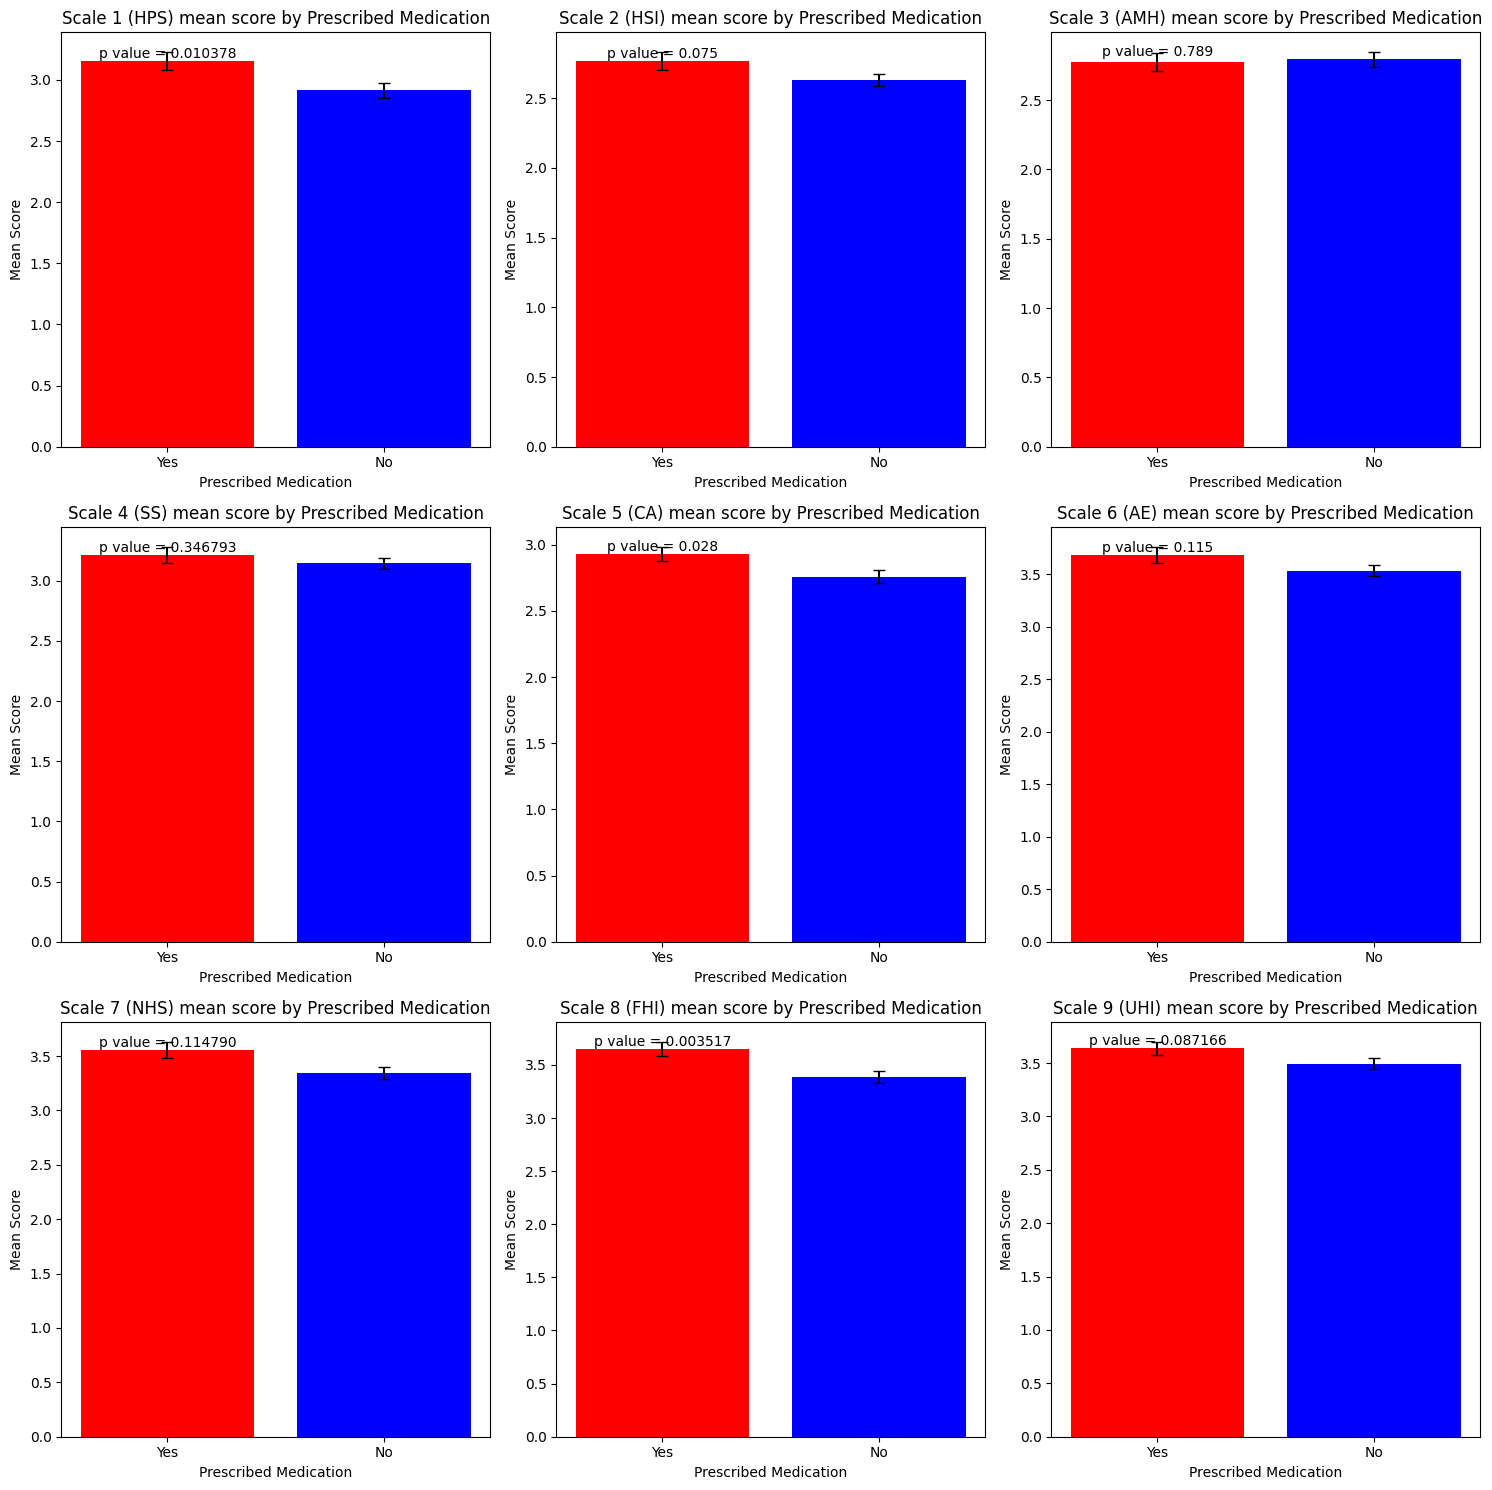

In [ ]:
############## PRESCRIPTION MEDICATION ###########
YHIM = final.query('`prescription medication` == 1.0')
NHIM = final.query('`prescription medication` == 2.0')


#Subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#Plot 1
yesM = YHIM['Scale 1 (HPS) mean score'].mean()
noM = NHIM['Scale 1 (HPS) mean score'].mean()

yes_arrayM = YHIM['Scale 1 (HPS) mean score'].sem()
no_arrayM = NHIM['Scale 1 (HPS) mean score'].sem()

x = ['Yes' , 'No']
y = [yesM,noM]
colours = ['red','blue']

# P Value

Scale_1_Pvalue_YHIM = YHIM['Scale 1 (HPS) mean score']
Scale_1_array_YHIM = np.array(Scale_1_Pvalue_YHIM)
Scale_1_Pvalue_NHIM = NHIM['Scale 1 (HPS) mean score']
Scale_1_array_NHIM = np.array(Scale_1_Pvalue_NHIM)

Scale_1_array_YHIM = pd.to_numeric(Scale_1_Pvalue_YHIM, errors='coerce')
Scale_1_array_NHIM = pd.to_numeric(Scale_1_Pvalue_NHIM, errors='coerce')

Scale_1_array_YHIM = Scale_1_array_YHIM.dropna()
Scale_1_array_NHIM = Scale_1_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_1_array_YHIM, Scale_1_array_NHIM)
P_Value_Scale1_HIM = result.pvalue
statistic, pvaluetM1 = ranksums(Scale_1_array_YHIM, Scale_1_array_NHIM)


axs[0][0].bar(x, y , yerr = [yes_arrayM, no_arrayM],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {P_Value_Scale1_HIM:.6f}', ha='center', va='bottom')
axs[0][0].set_xlabel('Prescribed Medication')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Prescribed Medication')


print(f"The values of Scale 1 (HPS) P Value (T-Test) = {P_Value_Scale1_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM1}.")

#Plot 2
yes1M = YHIM['Scale 2 (HSI) mean score'].mean()
no1M = NHIM['Scale 2 (HSI) mean score'].mean()

yes_array1M = YHIM['Scale 2 (HSI) mean score'].sem()
no_array1M = NHIM['Scale 2 (HSI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes1M,no1M]
colours = ['red','blue']

# P Value

Scale_2_Pvalue_YHIM = YHIM['Scale 2 (HSI) mean score']
Scale_2_array_YHIM = np.array(Scale_2_Pvalue_YHIM)
Scale_2_Pvalue_NHIM = NHIM['Scale 2 (HSI) mean score']
Scale_2_array_NHIM = np.array(Scale_2_Pvalue_NHIM)

Scale_2_array_YHIM = pd.to_numeric(Scale_2_Pvalue_YHIM, errors='coerce')
Scale_2_array_NHIM = pd.to_numeric(Scale_2_Pvalue_NHIM, errors='coerce')

Scale_2_array_YHIM = Scale_2_array_YHIM.dropna()
Scale_2_array_NHIM = Scale_2_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_2_array_YHIM, Scale_2_array_NHIM)
P_Value_Scale2_HIM = result.pvalue
statistic, pvaluetM2 = ranksums(Scale_2_array_YHIM, Scale_2_array_NHIM)


axs[0][1].bar(x, y , yerr = [yes_array1M, no_array1M],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {P_Value_Scale2_HIM:.3f}', ha='center', va='bottom')
axs[0][1].set_xlabel('Prescribed Medication')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Prescribed Medication')

print(f"The values of Scale 2 (HSI) P Value (T-Test) = {P_Value_Scale2_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM2}.")



#Plot 3
yes2M = YHIM['Scale 3 (AMH) mean score'].mean()
no2M = NHIM['Scale 3 (AMH) mean score'].mean()

yes_array2M = YHIM['Scale 3 (AMH) mean score'].sem()
no_array2M = NHIM['Scale 3 (AMH) mean score'].sem()

x = ['Yes' , 'No']
y = [yes2M,no2M]
colours = ['red','blue']

# P Value

Scale_3_Pvalue_YHIM = YHIM['Scale 3 (AMH) mean score']
Scale_3_array_YHIM = np.array(Scale_3_Pvalue_YHIM)
Scale_3_Pvalue_NHIM = NHIM['Scale 3 (AMH) mean score']
Scale_3_array_NHIM = np.array(Scale_3_Pvalue_NHIM)

Scale_3_array_YHIM = pd.to_numeric(Scale_3_Pvalue_YHIM, errors='coerce')
Scale_3_array_NHIM = pd.to_numeric(Scale_3_Pvalue_NHIM, errors='coerce')

Scale_3_array_YHIM = Scale_3_array_YHIM.dropna()
Scale_3_array_NHIM = Scale_3_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_3_array_YHIM, Scale_3_array_NHIM)
P_Value_Scale3_HIM = result.pvalue
statistic, pvaluetM3 = ranksums(Scale_3_array_YHIM, Scale_3_array_NHIM)


axs[0][2].bar(x, y , yerr = [yes_array2M, no_array2M],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {P_Value_Scale3_HIM:.3f}', ha='center', va='bottom')
axs[0][2].set_xlabel('Prescribed Medication')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Prescribed Medication')

print(f"The values of Scale 3 (AMH) P Value (T-Test) = {P_Value_Scale3_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM3}.")



#Plot 3
yes3M = YHIM['Scale 4 (SS) mean score'].mean()
no3M = NHIM['Scale 4 (SS) mean score'].mean()

yes_array3M = YHIM['Scale 4 (SS) mean score'].sem()
no_array3M = NHIM['Scale 4 (SS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes3M,no3M]
colours = ['red','blue']

# P Value

Scale_4_Pvalue_YHIM = YHIM['Scale 4 (SS) mean score']
Scale_4_array_YHIM = np.array(Scale_4_Pvalue_YHIM)
Scale_4_Pvalue_NHIM = NHIM['Scale 4 (SS) mean score']
Scale_4_array_NHIM = np.array(Scale_4_Pvalue_NHIM)

Scale_4_array_YHIM = pd.to_numeric(Scale_4_Pvalue_YHIM, errors='coerce')
Scale_4_array_NHIM = pd.to_numeric(Scale_4_Pvalue_NHIM, errors='coerce')

Scale_4_array_YHIM = Scale_4_array_YHIM.dropna()
Scale_4_array_NHIM = Scale_4_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_4_array_YHIM, Scale_4_array_NHIM)
P_Value_Scale4_HIM = result.pvalue
statistic, pvaluetM4 = ranksums(Scale_4_array_YHIM, Scale_4_array_NHIM)


axs[1][0].bar(x, y , yerr = [yes_array3M, no_array3M],capsize = 4,color = colours)
axs[1][0].text(0, max(y), f'p value = {P_Value_Scale4_HIM:.6f}', ha='center', va='bottom')
axs[1][0].set_xlabel('Prescribed Medication')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Prescribed Medication')

print(f"The values of Scale 4 (SS) P Value (T-Test) = {P_Value_Scale4_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM4}.")



#Plot 5
yes4M = YHIM['Scale 5 (CA) mean score'].mean()
no4M = NHIM['Scale 5 (CA) mean score'].mean()

yes_array4M = YHIM['Scale 5 (CA) mean score'].sem()
no_array4M = NHIM['Scale 5 (CA) mean score'].sem()

x = ['Yes' , 'No']
y = [yes4M,no4M]
colours = ['red','blue']

# P Value

Scale_5_Pvalue_YHIM = YHIM['Scale 5 (CA) mean score']
Scale_5_array_YHIM = np.array(Scale_5_Pvalue_YHIM)
Scale_5_Pvalue_NHIM = NHIM['Scale 5 (CA) mean score']
Scale_5_array_NHIM = np.array(Scale_5_Pvalue_NHIM)

Scale_5_array_YHIM = pd.to_numeric(Scale_5_Pvalue_YHIM, errors='coerce')
Scale_5_array_NHIM = pd.to_numeric(Scale_5_Pvalue_NHIM, errors='coerce')

Scale_5_array_YHIM = Scale_5_array_YHIM.dropna()
Scale_5_array_NHIM = Scale_5_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_5_array_YHIM, Scale_5_array_NHIM)
P_Value_Scale5_HIM = result.pvalue
statistic, pvaluetM5 = ranksums(Scale_5_array_YHIM, Scale_5_array_NHIM)


axs[1][1].bar(x, y , yerr = [yes_array4M, no_array4M],capsize = 4,color = colours)
axs[1][1].text(0, max(y), f'p value = {P_Value_Scale5_HIM:.3f}', ha='center', va='bottom')
axs[1][1].set_xlabel('Prescribed Medication')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Prescribed Medication')


print(f"The values of Scale 5 (CA) P Value (T-Test) = {P_Value_Scale5_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM5}.")



#Plot 6
yes5M = YHIM['Scale 6 (AE) mean score'].mean()
no5M = NHIM['Scale 6 (AE) mean score'].mean()

yes_array5M = YHIM['Scale 6 (AE) mean score'].sem()
no_array5M = NHIM['Scale 6 (AE) mean score'].sem()


x = ['Yes' , 'No']
y = [yes5M,no5M]
colours = ['red','blue']

# P Value

Scale_6_Pvalue_YHIM = YHIM['Scale 6 (AE) mean score']
Scale_6_array_YHIM = np.array(Scale_6_Pvalue_YHIM)
Scale_6_Pvalue_NHIM = NHIM['Scale 6 (AE) mean score']
Scale_6_array_NHIM = np.array(Scale_6_Pvalue_NHIM)

Scale_6_array_YHIM = pd.to_numeric(Scale_6_Pvalue_YHIM, errors='coerce')
Scale_6_array_NHIM = pd.to_numeric(Scale_6_Pvalue_NHIM, errors='coerce')

Scale_6_array_YHIM = Scale_6_array_YHIM.dropna()
Scale_6_array_NHIM = Scale_6_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_6_array_YHIM, Scale_6_array_NHIM)
P_Value_Scale6_HIM = result.pvalue
statistic, pvaluetM6 = ranksums(Scale_6_array_YHIM, Scale_6_array_NHIM)


axs[1][2].bar(x, y , yerr = [yes_array5M, no_array5M],capsize = 4,color = colours)
axs[1][2].text(0, max(y), f'p value = {P_Value_Scale6_HIM:.3f}', ha='center', va='bottom')
axs[1][2].set_xlabel('Prescribed Medication')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Prescribed Medication')

print(f"The values of Scale 6 (AE) P Value (T-Test) = {P_Value_Scale6_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM6}.")



#Plot 7
yes6M = YHIM['Scale 7 (NHS) mean score'].mean()
no6M = NHIM['Scale 7 (NHS) mean score'].mean()

yes_array6M = YHIM['Scale 7 (NHS) mean score'].sem()
no_array6M = NHIM['Scale 7 (NHS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes6M,no6M]
colours = ['red','blue']

# P Value

Scale_7_Pvalue_YHIM = YHIM['Scale 7 (NHS) mean score']
Scale_7_array_YHIM = np.array(Scale_7_Pvalue_YHIM)
Scale_7_Pvalue_NHIM = NHIM['Scale 7 (NHS) mean score']
Scale_7_array_NHIM = np.array(Scale_7_Pvalue_NHIM)

Scale_7_array_YHIM = pd.to_numeric(Scale_7_Pvalue_YHIM, errors='coerce')
Scale_7_array_NHIM = pd.to_numeric(Scale_7_Pvalue_NHIM, errors='coerce')

Scale_7_array_YHIM = Scale_7_array_YHIM.dropna()
Scale_7_array_NHIM = Scale_7_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_7_array_YHIM, Scale_7_array_NHIM)
P_Value_Scale7_HIM = result.pvalue
statistic, pvaluetM7 = ranksums(Scale_7_array_YHIM, Scale_7_array_NHIM)


axs[2][0].bar(x, y , yerr = [yes_array6M, no_array6M],capsize = 4,color = colours)
axs[2][0].text(0, max(y), f'p value = {P_Value_Scale6_HIM:.6f}', ha='center', va='bottom')
axs[2][0].set_xlabel('Prescribed Medication')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Prescribed Medication')

print(f"The values of Scale 7 (NHS) P Value (T-Test) = {P_Value_Scale7_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM7}.")


#Plot 8
yes7M = YHIM['Scale 8 (FHI) mean score'].mean()
no7M = NHIM['Scale 8 (FHI) mean score'].mean()

yes_array7M = YHIM['Scale 8 (FHI) mean score'].sem()
no_array7M = NHIM['Scale 8 (FHI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes7M,no7M]
colours = ['red','blue']

# P Value

Scale_8_Pvalue_YHIM = YHIM['Scale 8 (FHI) mean score']
Scale_8_array_YHIM = np.array(Scale_8_Pvalue_YHIM)
Scale_8_Pvalue_NHIM = NHIM['Scale 8 (FHI) mean score']
Scale_8_array_NHIM = np.array(Scale_8_Pvalue_NHIM)

Scale_8_array_YHIM = pd.to_numeric(Scale_8_Pvalue_YHIM, errors='coerce')
Scale_8_array_NHIM = pd.to_numeric(Scale_8_Pvalue_NHIM, errors='coerce')

Scale_8_array_YHIM = Scale_8_array_YHIM.dropna()
Scale_8_array_NHIM = Scale_8_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_8_array_YHIM, Scale_8_array_NHIM)
P_Value_Scale8_HIM = result.pvalue
statistic, pvaluetM8 = ranksums(Scale_8_array_YHIM, Scale_8_array_NHIM)


axs[2][1].bar(x, y , yerr = [yes_array7M, no_array7M],capsize = 4,color = colours)
axs[2][1].text(0, max(y), f'p value = {P_Value_Scale8_HIM:.6f}', ha='center', va='bottom')
axs[2][1].set_xlabel('Prescribed Medication')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Prescribed Medication')

print(f"The values of Scale 8 (FHI) P Value (T-Test) = {P_Value_Scale8_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM8}.")


#Plot 9
yes8M = YHIM['Scale 9 (UHI) mean score'].mean()
no8M = NHIM['Scale 9 (UHI) mean score'].mean()

yes_array8M = YHIM['Scale 9 (UHI) mean score'].sem()
no_array8M = NHIM['Scale 9 (UHI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes8M,no8M]
colours = ['red','blue']

# P Value

Scale_9_Pvalue_YHIM = YHIM['Scale 9 (UHI) mean score']
Scale_9_array_YHIM = np.array(Scale_9_Pvalue_YHIM)
Scale_9_Pvalue_NHIM = NHIM['Scale 9 (UHI) mean score']
Scale_9_array_NHIM = np.array(Scale_9_Pvalue_NHIM)

Scale_9_array_YHIM = pd.to_numeric(Scale_9_Pvalue_YHIM, errors='coerce')
Scale_9_array_NHIM = pd.to_numeric(Scale_9_Pvalue_NHIM, errors='coerce')

Scale_9_array_YHIM = Scale_9_array_YHIM.dropna()
Scale_9_array_NHIM = Scale_9_array_NHIM.dropna()

result =  stats.ttest_ind(Scale_9_array_YHIM, Scale_9_array_NHIM)
P_Value_Scale9_HIM = result.pvalue
statistic, pvaluetM9 = ranksums(Scale_9_array_YHIM, Scale_9_array_NHIM)


axs[2][2].bar(x, y , yerr = [yes_array8M, no_array8M],capsize = 4,color = colours)
axs[2][2].text(0, max(y), f'p value = {P_Value_Scale9_HIM:.6f}', ha='center', va='bottom')
axs[2][2].set_xlabel('Prescribed Medication')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Prescribed Medication')

print(f"The values of Scale 9 (UHI) P Value (T-Test) = {P_Value_Scale9_HIM} and P Value (Wilcoxon ranksum test) = {pvaluetM9}.")


plt.tight_layout()
plt.show()

In [ ]:
#### Everyone answered no NaN values

pm_df = final.copy()

pm_df.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
pm_df.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
pm_df.rename(columns = {'food preference':'food_preference'}, inplace = True)
pm_df.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
pm_df.rename(columns = {'prescription medication':'prescription_medication'}, inplace = True)
pm_df.rename(columns = {'health insurance':'health_insurance'}, inplace = True)

pm_df['Scale1_Mean'] = pm_df['Scale1_Mean'].astype(float)
pm_df['Scale2_Mean'] = pm_df['Scale2_Mean'].astype(float)
pm_df['Scale3_Mean'] = pm_df['Scale3_Mean'].astype(float)
pm_df['Scale4_Mean'] = pm_df['Scale4_Mean'].astype(float)
pm_df['Scale5_Mean'] = pm_df['Scale5_Mean'].astype(float)
pm_df['Scale6_Mean'] = pm_df['Scale6_Mean'].astype(float)
pm_df['Scale7_Mean'] = pm_df['Scale7_Mean'].astype(float)
pm_df['Scale8_Mean'] = pm_df['Scale8_Mean'].astype(float)
pm_df['Scale9_Mean'] = pm_df['Scale9_Mean'].astype(float)

manova_pm = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ prescription_medication', data=pm_df)

resultpm = manova_pm.mv_test()
print(resultpm.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1373 9.0000 190.0000 132.6583 0.0000
         Pillai's trace 0.8627 9.0000 190.0000 132.6583 0.0000
 Hotelling-Lawley trace 6.2838 9.0000 190.0000 132.6583 0.0000
    Roy's greatest root 6.2838 9.0000 190.0000 132.6583 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
 prescription_medication Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9267 9.0000 190.0000  1.6705 0.0985
          Pillai's trace 0.0733 9.0000 190.0000  1.6705 0.0985
  Hotelling

In [ ]:
pm_scale_1 = ols('Scale1_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table = anova_lm(pm_scale_1)
pm_anove_table

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   2.743567  2.743567  6.696046  0.010378
Residual                 198.0  81.126433  0.409729       NaN       NaN

In [ ]:
pm_scale_2 = ols('Scale2_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table2 = anova_lm(pm_scale_2)
pm_anove_table2

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   0.838311  0.838311  3.193789  0.075448
Residual                 198.0  51.971376  0.262482       NaN       NaN

In [ ]:
pm_scale_3 = ols('Scale3_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table3 = anova_lm(pm_scale_3)
pm_anove_table3

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   0.023846  0.023846  0.071917  0.788846
Residual                 198.0  65.651154  0.331571       NaN       NaN

In [ ]:
pm_scale_4 = ols('Scale4_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table4 = anova_lm(pm_scale_4)
pm_anove_table4

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   0.235051  0.235051  0.889388  0.346793
Residual                 198.0  52.328149  0.264284       NaN       NaN

In [ ]:
pm_scale_5 = ols('Scale5_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table5 = anova_lm(pm_scale_5)
pm_anove_table5

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   1.369463  1.369463  4.874679  0.028402
Residual                 198.0  55.624925  0.280934       NaN       NaN

In [ ]:
pm_scale_6 = ols('Scale6_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table6 = anova_lm(pm_scale_6)
pm_anove_table6

df     sum_sq   mean_sq         F   PR(>F)
prescription_medication    1.0   1.019498  1.019498  2.509051  0.11479
Residual                 198.0  80.452989  0.406328       NaN      NaN

In [ ]:
pm_scale_7 = ols('Scale7_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table7 = anova_lm(pm_scale_7)
pm_anove_table7

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   2.173480  2.173480  5.541819  0.019547
Residual                 198.0  77.654853  0.392196       NaN       NaN

In [ ]:
pm_scale_8 = ols('Scale8_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table8 = anova_lm(pm_scale_8)
pm_anove_table8

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   3.152533  3.152533  8.725982  0.003517
Residual                 198.0  71.533667  0.361281       NaN       NaN

In [ ]:
pm_scale_9 = ols('Scale9_Mean ~ prescription_medication', data=pm_df).fit()
pm_anove_table9 = anova_lm(pm_scale_9)
pm_anove_table9

df     sum_sq   mean_sq         F    PR(>F)
prescription_medication    1.0   0.945861  0.945861  2.955166  0.087166
Residual                 198.0  63.373939  0.320070       NaN       NaN

In [ ]:
pm_df.to_csv("Prescription_Medication_Dataset.csv", index=False)


The values of Scale 1 (HPS) P Value (T-Test) = 0.4107849313125441 and P Value (Wilcoxon ranksum test) = 0.33544271656846736.
The values of Scale 2 (HSI) P Value (T-Test) = 0.002957660170001534 and P Value (Wilcoxon ranksum test) = 0.004571463623748868.
The values of Scale 3 (AMH) P Value (T-Test) = 1.847769695822375e-08 and P Value (Wilcoxon ranksum test) = 6.187118611745372e-08.
The values of Scale 4 (SS) P Value (T-Test) = 0.07615689816445834 and P Value (Wilcoxon ranksum test) = 0.09455456572560014.
The values of Scale 5 (CA) P Value (T-Test) = 0.4185824506878384 and P Value (Wilcoxon ranksum test) = 0.3862046195392489.
The values of Scale 6 (AE) P Value (T-Test) = 0.017429837840257246 and P Value (Wilcoxon ranksum test) = 0.02599589432478329.
The values of Scale 7 (NHS) P Value (T-Test) = 0.035885687105500996 and P Value (Wilcoxon ranksum test) = 0.033714859872275016.
The values of Scale 8 (FHI) P Value (T-Test) = 0.15065172723312809 and P Value (Wilcoxon ranksum test) = 0.16741472

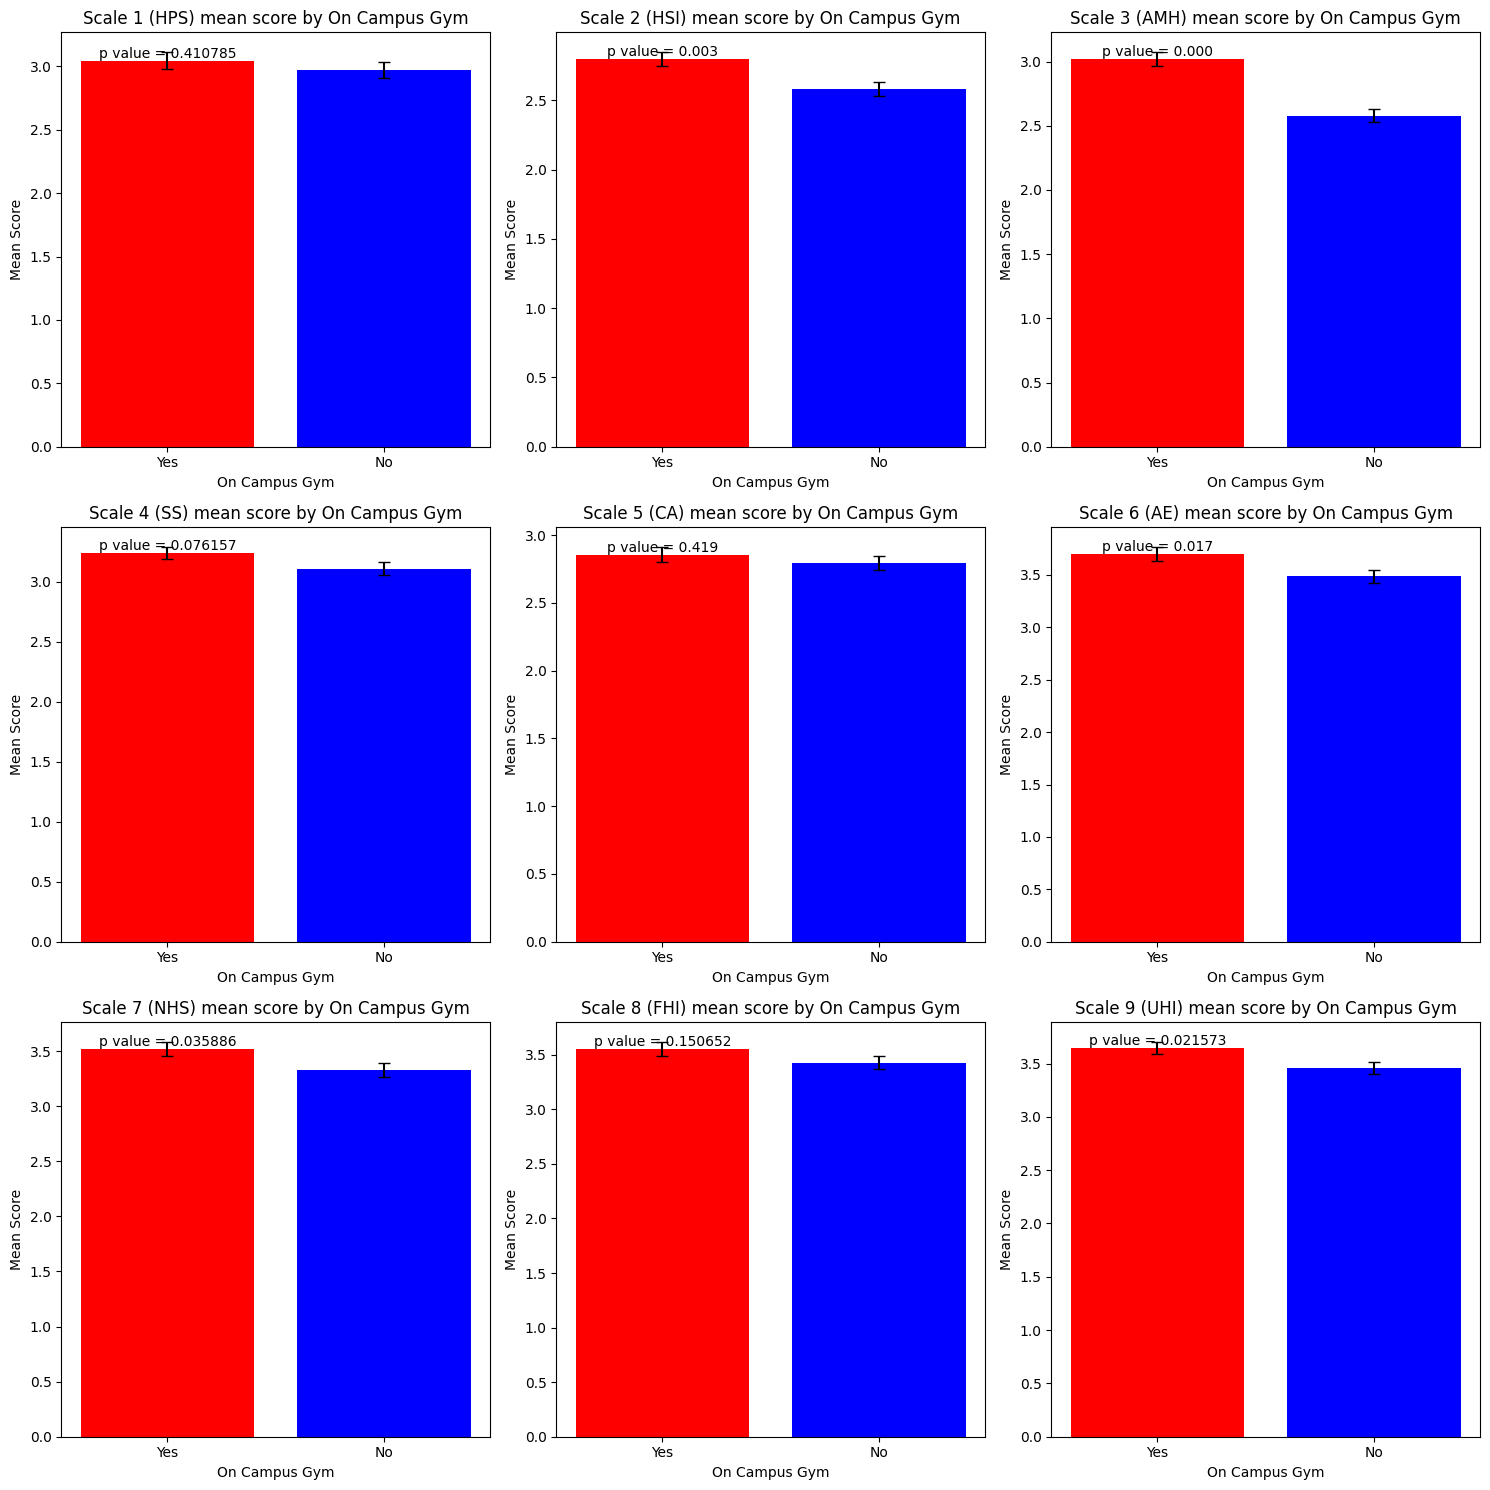

In [ ]:
##############################
######### GYM ################
##############################

final.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
row_index = final[final['ID'] == 40].index[0]
final.at[row_index, 'on_campus_gym'] = 2.0

YG = final.query('on_campus_gym == 1.0')
NG = final.query('on_campus_gym == 2.0')

#Subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#Plot 1
yesG = YG['Scale 1 (HPS) mean score'].mean()
noG = NG['Scale 1 (HPS) mean score'].mean()

yes_arrayG = YG['Scale 1 (HPS) mean score'].sem()
no_arrayG = NG['Scale 1 (HPS) mean score'].sem()

x = ['Yes' , 'No']
y = [yesG,noG]
colours = ['red','blue']

# P Value

Scale_1_Pvalue_YG = YG['Scale 1 (HPS) mean score']
Scale_1_array_YG = np.array(Scale_1_Pvalue_YG)
Scale_1_Pvalue_NG = NG['Scale 1 (HPS) mean score']
Scale_1_array_NG = np.array(Scale_1_Pvalue_NG)

Scale_1_array_YG = pd.to_numeric(Scale_1_Pvalue_YG, errors='coerce')
Scale_1_array_NG = pd.to_numeric(Scale_1_Pvalue_NG, errors='coerce')

Scale_1_array_YG = Scale_1_array_YG.dropna()
Scale_1_array_NG = Scale_1_array_NG.dropna()

result =  stats.ttest_ind(Scale_1_array_YG, Scale_1_array_NG)
P_Value_Scale1_G = result.pvalue
statistic, pvaluetG1 = ranksums(Scale_1_array_YG, Scale_1_array_NG)


axs[0][0].bar(x, y , yerr = [yes_arrayG, no_arrayG],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {P_Value_Scale1_G:.6f}', ha='center', va='bottom')
axs[0][0].set_xlabel('On Campus Gym')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by On Campus Gym')

print(f"The values of Scale 1 (HPS) P Value (T-Test) = {P_Value_Scale1_G} and P Value (Wilcoxon ranksum test) = {pvaluetG1}.")


#Plot 2
yes1G = YG['Scale 2 (HSI) mean score'].mean()
no1G = NG['Scale 2 (HSI) mean score'].mean()

yes_array1G = YG['Scale 2 (HSI) mean score'].sem()
no_array1G = NG['Scale 2 (HSI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes1G,no1G]
colours = ['red','blue']

# P Value

Scale_2_Pvalue_YG = YG['Scale 2 (HSI) mean score']
Scale_2_array_YG = np.array(Scale_2_Pvalue_YG)
Scale_2_Pvalue_NG = NG['Scale 2 (HSI) mean score']
Scale_2_array_NG = np.array(Scale_2_Pvalue_NG)

Scale_2_array_YG = pd.to_numeric(Scale_2_Pvalue_YG, errors='coerce')
Scale_2_array_NG = pd.to_numeric(Scale_2_Pvalue_NG, errors='coerce')

Scale_2_array_YG = Scale_2_array_YG.dropna()
Scale_2_array_NG = Scale_2_array_NG.dropna()

result =  stats.ttest_ind(Scale_2_array_YG, Scale_2_array_NG)
P_Value_Scale2_G = result.pvalue
statistic, pvaluetG2 = ranksums(Scale_2_array_YG, Scale_2_array_NG)


axs[0][1].bar(x, y , yerr = [yes_array1G, no_array1G],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {P_Value_Scale2_G:.3f}', ha='center', va='bottom')
axs[0][1].set_xlabel('On Campus Gym')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by On Campus Gym')



print(f"The values of Scale 2 (HSI) P Value (T-Test) = {P_Value_Scale2_G} and P Value (Wilcoxon ranksum test) = {pvaluetG2}.")

#Plot 3
yes2G = YG['Scale 3 (AMH) mean score'].mean()
no2G = NG['Scale 3 (AMH) mean score'].mean()

yes_array2G = YG['Scale 3 (AMH) mean score'].sem()
no_array2G = NG['Scale 3 (AMH) mean score'].sem()

x = ['Yes' , 'No']
y = [yes2G,no2G]
colours = ['red','blue']

# P Value

Scale_3_Pvalue_YG = YG['Scale 3 (AMH) mean score']
Scale_3_array_YG = np.array(Scale_3_Pvalue_YG)
Scale_3_Pvalue_NG = NG['Scale 3 (AMH) mean score']
Scale_3_array_NG = np.array(Scale_3_Pvalue_NG)

Scale_3_array_YG = pd.to_numeric(Scale_3_Pvalue_YG, errors='coerce')
Scale_3_array_NG = pd.to_numeric(Scale_3_Pvalue_NG, errors='coerce')

Scale_3_array_YG = Scale_3_array_YG.dropna()
Scale_3_array_NG = Scale_3_array_NG.dropna()

result =  stats.ttest_ind(Scale_3_array_YG, Scale_3_array_NG)
P_Value_Scale3_G = result.pvalue
statistic, pvaluetG3 = ranksums(Scale_3_array_YG, Scale_3_array_NG)


axs[0][2].bar(x, y , yerr = [yes_array2G, no_array2G],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {P_Value_Scale3_G:.3f}', ha='center', va='bottom')
axs[0][2].set_xlabel('On Campus Gym')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by On Campus Gym')


print(f"The values of Scale 3 (AMH) P Value (T-Test) = {P_Value_Scale3_G} and P Value (Wilcoxon ranksum test) = {pvaluetG3}.")


#Plot 4
yes3G = YG['Scale 4 (SS) mean score'].mean()
no3G = NG['Scale 4 (SS) mean score'].mean()

yes_array3G = YG['Scale 4 (SS) mean score'].sem()
no_array3G = NG['Scale 4 (SS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes3G,no3G]
colours = ['red','blue']

# P Value

Scale_4_Pvalue_YG = YG['Scale 4 (SS) mean score']
Scale_4_array_YG = np.array(Scale_4_Pvalue_YG)
Scale_4_Pvalue_NG = NG['Scale 4 (SS) mean score']
Scale_4_array_NG = np.array(Scale_4_Pvalue_NG)

Scale_4_array_YG = pd.to_numeric(Scale_4_Pvalue_YG, errors='coerce')
Scale_4_array_NG = pd.to_numeric(Scale_4_Pvalue_NG, errors='coerce')

Scale_4_array_YG = Scale_4_array_YG.dropna()
Scale_4_array_NG = Scale_4_array_NG.dropna()

result =  stats.ttest_ind(Scale_4_array_YG, Scale_4_array_NG)
P_Value_Scale4_G = result.pvalue
statistic, pvaluetG4 = ranksums(Scale_4_array_YG, Scale_4_array_NG)


axs[1][0].bar(x, y , yerr = [yes_array3G, no_array3G],capsize = 4,color = colours)
axs[1][0].text(0, max(y), f'p value = {P_Value_Scale4_G:.6f}', ha='center', va='bottom')
axs[1][0].set_xlabel('On Campus Gym')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by On Campus Gym')


print(f"The values of Scale 4 (SS) P Value (T-Test) = {P_Value_Scale4_G} and P Value (Wilcoxon ranksum test) = {pvaluetG4}.")

#Plot 5
yes4G = YG['Scale 5 (CA) mean score'].mean()
no4G = NG['Scale 5 (CA) mean score'].mean()

yes_array4G = YG['Scale 5 (CA) mean score'].sem()
no_array4G = NG['Scale 5 (CA) mean score'].sem()

x = ['Yes' , 'No']
y = [yes4G,no4G]
colours = ['red','blue']

# P Value

Scale_5_Pvalue_YG = YG['Scale 5 (CA) mean score']
Scale_5_array_YG = np.array(Scale_5_Pvalue_YG)
Scale_5_Pvalue_NG = NG['Scale 5 (CA) mean score']
Scale_5_array_NG = np.array(Scale_5_Pvalue_NG)

Scale_5_array_YG = pd.to_numeric(Scale_5_Pvalue_YG, errors='coerce')
Scale_5_array_NG = pd.to_numeric(Scale_5_Pvalue_NG, errors='coerce')

Scale_5_array_YG = Scale_5_array_YG.dropna()
Scale_5_array_NG = Scale_5_array_NG.dropna()

result =  stats.ttest_ind(Scale_5_array_YG, Scale_5_array_NG)
P_Value_Scale5_G = result.pvalue
statistic, pvaluetG5 = ranksums(Scale_5_array_YG, Scale_5_array_NG)


axs[1][1].bar(x, y , yerr = [yes_array4G, no_array4G],capsize = 4,color = colours)
axs[1][1].text(0, max(y), f'p value = {P_Value_Scale5_G:.3f}', ha='center', va='bottom')
axs[1][1].set_xlabel('On Campus Gym')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by On Campus Gym')


print(f"The values of Scale 5 (CA) P Value (T-Test) = {P_Value_Scale5_G} and P Value (Wilcoxon ranksum test) = {pvaluetG5}.")



#Plot 6
yes5G = YG['Scale 6 (AE) mean score'].mean()
no5G = NG['Scale 6 (AE) mean score'].mean()

yes_array5G = YG['Scale 6 (AE) mean score'].sem()
no_array5G = NG['Scale 6 (AE) mean score'].sem()


x = ['Yes' , 'No']
y = [yes5G,no5G]
colours = ['red','blue']

# P Value

Scale_6_Pvalue_YG = YG['Scale 6 (AE) mean score']
Scale_6_array_YG = np.array(Scale_6_Pvalue_YG)
Scale_6_Pvalue_NG = NG['Scale 6 (AE) mean score']
Scale_6_array_NG = np.array(Scale_6_Pvalue_NG)

Scale_6_array_YG = pd.to_numeric(Scale_6_Pvalue_YG, errors='coerce')
Scale_6_array_NG = pd.to_numeric(Scale_6_Pvalue_NG, errors='coerce')

Scale_6_array_YG = Scale_6_array_YG.dropna()
Scale_6_array_NG = Scale_6_array_NG.dropna()

result =  stats.ttest_ind(Scale_6_array_YG, Scale_6_array_NG)
P_Value_Scale6_G = result.pvalue
statistic, pvaluetG6 = ranksums(Scale_6_array_YG, Scale_6_array_NG)


axs[1][2].bar(x, y , yerr = [yes_array5G, no_array5G],capsize = 4,color = colours)
axs[1][2].text(0, max(y), f'p value = {P_Value_Scale6_G:.3f}', ha='center', va='bottom')
axs[1][2].set_xlabel('On Campus Gym')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by On Campus Gym')


print(f"The values of Scale 6 (AE) P Value (T-Test) = {P_Value_Scale6_G} and P Value (Wilcoxon ranksum test) = {pvaluetG6}.")


#Plot 7
yes6G = YG['Scale 7 (NHS) mean score'].mean()
no6G = NG['Scale 7 (NHS) mean score'].mean()

yes_array6G = YG['Scale 7 (NHS) mean score'].sem()
no_array6G = NG['Scale 7 (NHS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes6G,no6G]
colours = ['red','blue']

# P Value

Scale_7_Pvalue_YG = YG['Scale 7 (NHS) mean score']
Scale_7_array_YG = np.array(Scale_7_Pvalue_YG)
Scale_7_Pvalue_NG = NG['Scale 7 (NHS) mean score']
Scale_7_array_NG = np.array(Scale_7_Pvalue_NG)

Scale_7_array_YG = pd.to_numeric(Scale_7_Pvalue_YG, errors='coerce')
Scale_7_array_NG = pd.to_numeric(Scale_7_Pvalue_NG, errors='coerce')

Scale_7_array_YG = Scale_7_array_YG.dropna()
Scale_7_array_NG = Scale_7_array_NG.dropna()

result =  stats.ttest_ind(Scale_7_array_YG, Scale_7_array_NG)
P_Value_Scale7_G = result.pvalue
statistic, pvaluetG7 = ranksums(Scale_7_array_YG, Scale_7_array_NG)


axs[2][0].bar(x, y , yerr = [yes_array6G, no_array6G],capsize = 4,color = colours)
axs[2][0].text(0, max(y), f'p value = {P_Value_Scale7_G:.6f}', ha='center', va='bottom')
axs[2][0].set_xlabel('On Campus Gym')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by On Campus Gym')


print(f"The values of Scale 7 (NHS) P Value (T-Test) = {P_Value_Scale7_G} and P Value (Wilcoxon ranksum test) = {pvaluetG7}.")

#Plot 8
yes7G = YG['Scale 8 (FHI) mean score'].mean()
no7G = NG['Scale 8 (FHI) mean score'].mean()

yes_array7G = YG['Scale 8 (FHI) mean score'].sem()
no_array7G = NG['Scale 8 (FHI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes7G,no7G]
colours = ['red','blue']

# P Value

Scale_8_Pvalue_YG = YG['Scale 8 (FHI) mean score']
Scale_8_array_YG = np.array(Scale_8_Pvalue_YG)
Scale_8_Pvalue_NG = NG['Scale 8 (FHI) mean score']
Scale_8_array_NG = np.array(Scale_8_Pvalue_NG)

Scale_8_array_YG = pd.to_numeric(Scale_8_Pvalue_YG, errors='coerce')
Scale_8_array_NG = pd.to_numeric(Scale_8_Pvalue_NG, errors='coerce')

Scale_8_array_YG = Scale_8_array_YG.dropna()
Scale_8_array_NG = Scale_8_array_NG.dropna()

result =  stats.ttest_ind(Scale_8_array_YG, Scale_8_array_NG)
P_Value_Scale8_G = result.pvalue
statistic, pvaluetG8 = ranksums(Scale_8_array_YG, Scale_8_array_NG)


axs[2][1].bar(x, y , yerr = [yes_array7G, no_array7G],capsize = 4,color = colours)
axs[2][1].text(0, max(y), f'p value = {P_Value_Scale8_G:.6f}', ha='center', va='bottom')
axs[2][1].set_xlabel('On Campus Gym')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by On Campus Gym')


print(f"The values of Scale 8 (FHI) P Value (T-Test) = {P_Value_Scale8_G} and P Value (Wilcoxon ranksum test) = {pvaluetG8}.")

#Plot 9
yes8G = YG['Scale 9 (UHI) mean score'].mean()
no8G = NG['Scale 9 (UHI) mean score'].mean()

yes_array8G = YG['Scale 9 (UHI) mean score'].sem()
no_array8G = NG['Scale 9 (UHI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes8G,no8G]
colours = ['red','blue']

# P Value

Scale_9_Pvalue_YG = YG['Scale 9 (UHI) mean score']
Scale_9_array_YG = np.array(Scale_9_Pvalue_YG)
Scale_9_Pvalue_NG = NG['Scale 9 (UHI) mean score']
Scale_9_array_NG = np.array(Scale_9_Pvalue_NG)

Scale_9_array_YG = pd.to_numeric(Scale_9_Pvalue_YG, errors='coerce')
Scale_9_array_NG = pd.to_numeric(Scale_9_Pvalue_NG, errors='coerce')

Scale_9_array_YG = Scale_9_array_YG.dropna()
Scale_9_array_NG = Scale_9_array_NG.dropna()

result =  stats.ttest_ind(Scale_9_array_YG, Scale_9_array_NG)
P_Value_Scale9_G = result.pvalue
statistic, pvaluetG9 = ranksums(Scale_9_array_YG, Scale_9_array_NG)


axs[2][2].bar(x, y , yerr = [yes_array8G, no_array8G],capsize = 4,color = colours)
axs[2][2].text(0, max(y), f'p value = {P_Value_Scale9_G:.6f}', ha='center', va='bottom')
axs[2][2].set_xlabel('On Campus Gym')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by On Campus Gym')


print(f"The values of Scale 9 (UHI) P Value (T-Test) = {P_Value_Scale9_G} and P Value (Wilcoxon ranksum test) = {pvaluetG9}.")

plt.tight_layout()
plt.show()

#Scale 2,3,6,7,9 significant at 95% level

In [ ]:
print("The mean of On-Campus-Gym (Yes) HPS is:", yesG)
print("The mean of On-Campus-Gym (No) HPS is:", noG)
print("The mean of On-Campus-Gym (Yes) HSI is:", yes1G)
print("The mean of On-Campus-Gym (No) HSI is:", no1G)
print("The mean of On-Campus-Gym (Yes) AMH is:", yes2G)
print("The mean of On-Campus-Gym (No) AMH is:", no2G)
print("The mean of On-Campus-Gym (Yes) SS is:", yes3G)
print("The mean of On-Campus-Gym (No) SS is:", no3G)
print("The mean of On-Campus-Gym (Yes) CA is:", yes4G)
print("The mean of On-Campus-Gym (No) CA is:", no4G)
print("The mean of On-Campus-Gym (Yes) AE is:", yes5G)
print("The mean of On-Campus-Gym (No) AE is:", no5G)
print("The mean of On-Campus-Gym (Yes) NHS is:", yes6G)
print("The mean of On-Campus-Gym (No) NHS is:", no6G)
print("The mean of On-Campus-Gym (Yes) FHI is:", yes7G)
print("The mean of On-Campus-Gym (No) FHI is:", no7G)
print("The mean of On-Campus-Gym (Yes) UHI is:", yes8G)
print("The mean of On-Campus-Gym (No) UHI is:", no8G)


The mean of On-Campus-Gym (Yes) HPS is: 3.0452127659574466
The mean of On-Campus-Gym (No) HPS is: 2.9693396226415096
The mean of On-Campus-Gym (Yes) HSI is: 2.797872340425532
The mean of On-Campus-Gym (No) HSI is: 2.582547169811321
The mean of On-Campus-Gym (Yes) AMH is: 3.019148936170213
The mean of On-Campus-Gym (No) AMH is: 2.5773584905660383
The mean of On-Campus-Gym (Yes) SS is: 3.240425531914894
The mean of On-Campus-Gym (No) SS is: 3.111320754716982
The mean of On-Campus-Gym (Yes) CA is: 2.8558510638297876
The mean of On-Campus-Gym (No) CA is: 2.7943396226415094
The mean of On-Campus-Gym (Yes) AE is: 3.7015957446808505
The mean of On-Campus-Gym (No) AE is: 3.486792452830189
The mean of On-Campus-Gym (Yes) NHS is: 3.52127659574468
The mean of On-Campus-Gym (No) NHS is: 3.3333333333333335
The mean of On-Campus-Gym (Yes) FHI is: 3.5531914893617027
The mean of On-Campus-Gym (No) FHI is: 3.4283018867924526
The mean of On-Campus-Gym (Yes) UHI is: 3.646808510638298
The mean of On-Campu

In [ ]:
#Cohen's d for GYM
YG_Scale1 = YG['Scale 1 (HPS) mean score']
NG_Scale1 = NG['Scale 1 (HPS) mean score']

print("The Effect size for HPS is",cohend1(YG_Scale1,NG_Scale1))

YG_Scale2 = YG['Scale 2 (HSI) mean score']
NG_Scale2 = NG['Scale 2 (HSI) mean score']

print("The Effect size for HSI is",cohend1(YG_Scale2,NG_Scale2))

YG_Scale3 = YG['Scale 3 (AMH) mean score']
NG_Scale3 = NG['Scale 3 (AMH) mean score']

print("The Effect size for AMH is",cohend1(YG_Scale3,NG_Scale3))

YG_Scale4 = YG['Scale 4 (SS) mean score']
NG_Scale4 = NG['Scale 4 (SS) mean score']

print("The Effect size for SS is",cohend1(YG_Scale4,NG_Scale4))

YG_Scale5 = YG['Scale 5 (CA) mean score']
NG_Scale5 = NG['Scale 5 (CA) mean score']

print("The Effect size for CA is",cohend1(YG_Scale5,NG_Scale5))

YG_Scale6 = YG['Scale 6 (AE) mean score']
NG_Scale6 = NG['Scale 6 (AE) mean score']

print("The Effect size for AE is",cohend1(YG_Scale6,NG_Scale6))

YG_Scale7 = YG['Scale 7 (NHS) mean score']
NG_Scale7 = NG['Scale 7 (NHS) mean score']

print("The Effect size for NHS is",cohend1(YG_Scale7,NG_Scale7))

YG_Scale8 = YG['Scale 8 (FHI) mean score']
NG_Scale8 = NG['Scale 8 (FHI) mean score']

print("The Effect size for FHI is",cohend1(YG_Scale8,NG_Scale8))


YG_Scale9 = YG['Scale 9 (UHI) mean score']
NG_Scale9 = NG['Scale 9 (UHI) mean score']

print("The Effect size for UHI is",cohend1(YG_Scale9,NG_Scale9))

The Effect size for HPS is 0.1167780384247539
The Effect size for HSI is 0.42636605690627427
The Effect size for AMH is 0.8310826993620327
The Effect size for SS is 0.25257590821269127
The Effect size for CA is 0.11483964197178562
The Effect size for AE is 0.3396900805251702
The Effect size for NHS is 0.2993100350748
The Effect size for FHI is 0.20441361250879694
The Effect size for UHI is 0.3281452280376853


In [ ]:

gym_df = final.copy()
gym_df.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
gym_df.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
gym_df.rename(columns = {'food preference':'food_preference'}, inplace = True)
gym_df.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
gym_df.rename(columns = {'prescription medication':'prescription_medication'}, inplace = True)
gym_df.rename(columns = {'health insurance':'health_insurance'}, inplace = True)

#ID 40 chose gym option as 3 hence converting it 2
row_index = gym_df[gym_df['ID'] == 40].index[0]
gym_df.at[row_index, 'on_campus_gym'] = 2.0

gym_df = gym_df.query('on_campus_gym == 1.0 or on_campus_gym == 2.0')

gym_df['Scale1_Mean'] = gym_df['Scale1_Mean'].astype(float)
gym_df['Scale2_Mean'] = gym_df['Scale2_Mean'].astype(float)
gym_df['Scale3_Mean'] = gym_df['Scale3_Mean'].astype(float)
gym_df['Scale4_Mean'] = gym_df['Scale4_Mean'].astype(float)
gym_df['Scale5_Mean'] = gym_df['Scale5_Mean'].astype(float)
gym_df['Scale6_Mean'] = gym_df['Scale6_Mean'].astype(float)
gym_df['Scale7_Mean'] = gym_df['Scale7_Mean'].astype(float)
gym_df['Scale8_Mean'] = gym_df['Scale8_Mean'].astype(float)
gym_df['Scale9_Mean'] = gym_df['Scale9_Mean'].astype(float)

manova_gym = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ on_campus_gym', data=gym_df)

result_gym = manova_gym.mv_test()
print(result_gym.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1018 9.0000 190.0000 186.2984 0.0000
         Pillai's trace 0.8982 9.0000 190.0000 186.2984 0.0000
 Hotelling-Lawley trace 8.8247 9.0000 190.0000 186.2984 0.0000
    Roy's greatest root 8.8247 9.0000 190.0000 186.2984 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
      on_campus_gym      Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8123 9.0000 190.0000  4.8776 0.0000
          Pillai's trace 0.1877 9.0000 190.0000  4.8776 0.0000
  Hotelling

In [ ]:
gym_df.to_csv("gym_dataset_final.csv" , index = False)
#gym_df.query('on_campus_gym == 3.0')

In [ ]:
gym_scale_1 = ols('Scale1_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table1 = anova_lm(gym_scale_1)
gym_table1

df   sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   0.2868  0.286800  0.679401  0.410785
Residual       198.0  83.5832  0.422137       NaN       NaN

In [ ]:
gym_eta_squared1 = gym_table1['sum_sq'][0] / (gym_table1['sum_sq'][0] + gym_table1['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared1)

Partial Eta-Squared: 0.0034195836620274345


In [ ]:
cohensf_gym_1 = (gym_eta_squared1/(1-gym_eta_squared1))**0.5
cohensf_gym_1

0.0585774473559425

In [ ]:
gym_scale_2 = ols('Scale2_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table2 = anova_lm(gym_scale_2)
gym_table2

df     sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   2.309901  2.309901  9.056679  0.002958
Residual       198.0  50.499787  0.255049       NaN       NaN

In [ ]:
gym_eta_squared2 = gym_table2['sum_sq'][0] / (gym_table2['sum_sq'][0] + gym_table2['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared2)

Partial Eta-Squared: 0.0437400953710235


In [ ]:
cohensf_gym_2 = (gym_eta_squared2/(1-gym_eta_squared2))**0.5
cohensf_gym_2

0.21387099483505173

In [ ]:
gym_scale_3 = ols('Scale3_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table3 = anova_lm(gym_scale_3)
gym_table3

df     sum_sq   mean_sq          F        PR(>F)
on_campus_gym    1.0   9.723808  9.723808  34.410597  1.847770e-08
Residual       198.0  55.951192  0.282582        NaN           NaN

In [ ]:
gym_eta_squared3 = gym_table3['sum_sq'][0] / (gym_table3['sum_sq'][0] + gym_table3['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared3)

Partial Eta-Squared: 0.14805950068896662


In [ ]:
cohensf_gym_3 = (gym_eta_squared3/(1-gym_eta_squared3))**0.5
cohensf_gym_3

0.4168823498579554

In [ ]:
gym_scale_4 = ols('Scale4_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table4 = anova_lm(gym_scale_4)
gym_table4

df     sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   0.830402  0.830402  3.178246  0.076157
Residual       198.0  51.732798  0.261277       NaN       NaN

In [ ]:
gym_eta_squared4 = gym_table4['sum_sq'][0] / (gym_table4['sum_sq'][0] + gym_table4['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared4)

Partial Eta-Squared: 0.015798161583331555


In [ ]:
cohensf_gym_4 = (gym_eta_squared4/(1-gym_eta_squared4))**0.5
cohensf_gym_4

0.12669549999541782

In [ ]:
gym_scale_5 = ols('Scale5_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table5 = anova_lm(gym_scale_5)
gym_table5

df     sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   0.188502  0.188502  0.657033  0.418582
Residual       198.0  56.805886  0.286898       NaN       NaN

In [ ]:
gym_eta_squared5 = gym_table5['sum_sq'][0] / (gym_table5['sum_sq'][0] + gym_table5['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared5)

Partial Eta-Squared: 0.00330737498532599


In [ ]:
cohensf_gym_5 = (gym_eta_squared5/(1-gym_eta_squared5))**0.5
cohensf_gym_5

0.05760512141426355

In [ ]:
gym_scale_6 = ols('Scale6_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table6 = anova_lm(gym_scale_6)
gym_table6

df     sum_sq   mean_sq         F   PR(>F)
on_campus_gym    1.0   2.298717  2.298717  5.748697  0.01743
Residual       198.0  79.173770  0.399868       NaN      NaN

In [ ]:
gym_eta_squared6 = gym_table6['sum_sq'][0] / (gym_table6['sum_sq'][0] + gym_table6['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared6)

Partial Eta-Squared: 0.028214646419625487


In [ ]:
cohensf_gym_6 = (gym_eta_squared6/(1-gym_eta_squared6))**0.5
cohensf_gym_6

0.17039314992536422

In [ ]:
gym_scale_7 = ols('Scale7_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table7 = anova_lm(gym_scale_7)
gym_table7

df     sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   1.759775  1.759775  4.463199  0.035886
Residual       198.0  78.068558  0.394286       NaN       NaN

In [ ]:
gym_eta_squared7 = gym_table7['sum_sq'][0] / (gym_table7['sum_sq'][0] + gym_table7['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared7)

Partial Eta-Squared: 0.022044496486772598


In [ ]:
cohensf_gym_7 = (gym_eta_squared7/(1-gym_eta_squared7))**0.5
cohensf_gym_7

0.15013797165292112

In [ ]:
gym_scale_8 = ols('Scale8_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table8 = anova_lm(gym_scale_8)
gym_table8

df     sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   0.777063  0.777063  2.081725  0.150652
Residual       198.0  73.909137  0.373278       NaN       NaN

In [ ]:
gym_eta_squared8 = gym_table8['sum_sq'][0] / (gym_table8['sum_sq'][0] + gym_table8['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared8)

Partial Eta-Squared: 0.010404373327145616


In [ ]:
cohensf_gym_8 = (gym_eta_squared8/(1-gym_eta_squared8))**0.5
cohensf_gym_8

0.1025366394836939

In [ ]:
gym_scale_9 = ols('Scale9_Mean ~ on_campus_gym', data=gym_df).fit()
gym_table9 = anova_lm(gym_scale_9)
gym_table9

df     sum_sq   mean_sq         F    PR(>F)
on_campus_gym    1.0   1.696701  1.696701  5.364582  0.021573
Residual       198.0  62.623099  0.316278       NaN       NaN

In [ ]:
gym_eta_squared9 = gym_table9['sum_sq'][0] / (gym_table9['sum_sq'][0] + gym_table9['sum_sq'][1])
print("Partial Eta-Squared:", gym_eta_squared9)

Partial Eta-Squared: 0.02637913742012454


In [ ]:
cohensf_gym_9 = (gym_eta_squared9/(1-gym_eta_squared9))**0.5
cohensf_gym_9

0.16460209539199397

The values of Scale 1 (HPS) P Value (T-Test) = 2.484631201410827e-05 and P Value (Wilcoxon ranksum test) = 9.194129789677775e-05.
The values of Scale 2 (HSI) P Value (T-Test) = 0.007868674435590691 and P Value (Wilcoxon ranksum test) = 0.024778904422047776.
The values of Scale 3 (AMH) P Value (T-Test) = 0.4535404651660815 and P Value (Wilcoxon ranksum test) = 0.4973468448897218.
The values of Scale 4 (SS) P Value (T-Test) = 0.00033828503852637005 and P Value (Wilcoxon ranksum test) = 0.007791269155810619.
The values of Scale 5 (CA) P Value (T-Test) = 0.008443651830557834 and P Value (Wilcoxon ranksum test) = 0.03800583596293336.
The values of Scale 6 (AE) P Value (T-Test) = 0.036352480958753854 and P Value (Wilcoxon ranksum test) = 0.0351943616611505.
The values of Scale 7 (NHS) P Value (T-Test) = 0.00032816327317006206 and P Value (Wilcoxon ranksum test) = 0.0016231482278241127.
The values of Scale 8 (FHI) P Value (T-Test) = 0.009740512656853937 and P Value (Wilcoxon ranksum test) = 0

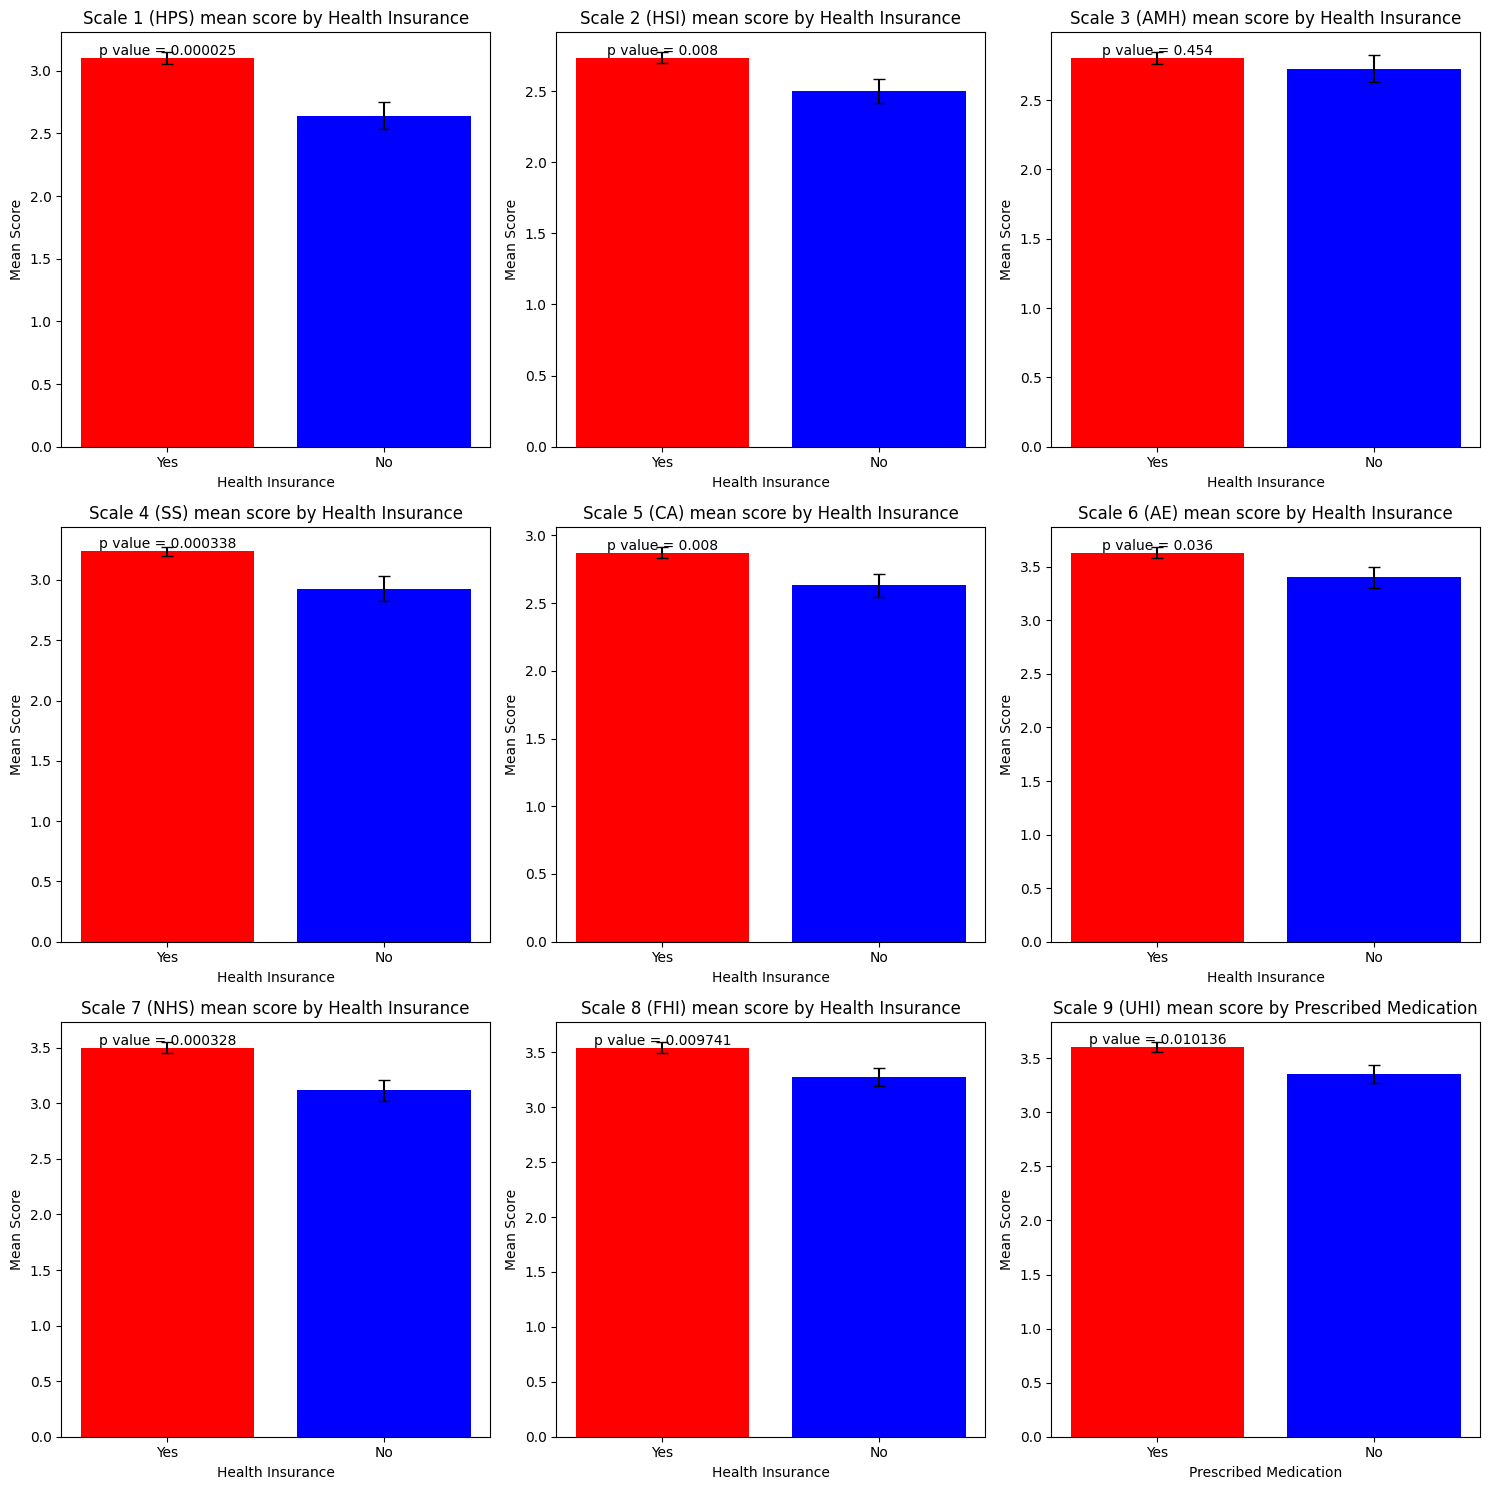

In [ ]:
##################################
####### HEALTH INSURANCE #########
##################################
YHI = final.query('`health insurance` == 1.0')
NHI = final.query('`health insurance` == 2.0')
#Subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#Plot 1
yes = YHI['Scale 1 (HPS) mean score'].mean()
no = NHI['Scale 1 (HPS) mean score'].mean()

yes_array = YHI['Scale 1 (HPS) mean score'].sem()
no_array = NHI['Scale 1 (HPS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes,no]
colours = ['red','blue']

# P Value

Scale_1_Pvalue_YHI = YHI['Scale 1 (HPS) mean score']
Scale_1_array_YHI = np.array(Scale_1_Pvalue_YHI)
Scale_1_Pvalue_NHI = NHI['Scale 1 (HPS) mean score']
Scale_1_array_NHI = np.array(Scale_1_Pvalue_NHI)

Scale_1_array_YHI = pd.to_numeric(Scale_1_Pvalue_YHI, errors='coerce')
Scale_1_array_NHI = pd.to_numeric(Scale_1_Pvalue_NHI, errors='coerce')

Scale_1_array_YHI = Scale_1_array_YHI.dropna()
Scale_1_array_NHI = Scale_1_array_NHI.dropna()

result =  stats.ttest_ind(Scale_1_array_YHI, Scale_1_array_NHI)
P_Value_Scale1_HI = result.pvalue
statistic, pvaluet1 = ranksums(Scale_1_array_YHI, Scale_1_array_NHI)


axs[0][0].bar(x, y , yerr = [yes_array, no_array],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {P_Value_Scale1_HI:.6f}', ha='center', va='bottom')
axs[0][0].set_xlabel('Health Insurance')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Health Insurance')


print(f"The values of Scale 1 (HPS) P Value (T-Test) = {P_Value_Scale1_HI} and P Value (Wilcoxon ranksum test) = {pvaluet1}.")

#Plot 2
yes1 = YHI['Scale 2 (HSI) mean score'].mean()
no1 = NHI['Scale 2 (HSI) mean score'].mean()

yes_array1 = YHI['Scale 2 (HSI) mean score'].sem()
no_array1 = NHI['Scale 2 (HSI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes1,no1]
colours = ['red','blue']

# P Value

Scale_2_Pvalue_YHI = YHI['Scale 2 (HSI) mean score']
Scale_2_array_YHI = np.array(Scale_2_Pvalue_YHI)
Scale_2_Pvalue_NHI = NHI['Scale 2 (HSI) mean score']
Scale_2_array_NHI = np.array(Scale_2_Pvalue_NHI)

Scale_2_array_YHI = pd.to_numeric(Scale_2_Pvalue_YHI, errors='coerce')
Scale_2_array_NHI = pd.to_numeric(Scale_2_Pvalue_NHI, errors='coerce')

Scale_2_array_YHI = Scale_2_array_YHI.dropna()
Scale_2_array_NHI = Scale_2_array_NHI.dropna()

result =  stats.ttest_ind(Scale_2_array_YHI, Scale_2_array_NHI)
P_Value_Scale2_HI = result.pvalue
statistic, pvaluet2 = ranksums(Scale_2_array_YHI, Scale_2_array_NHI)


axs[0][1].bar(x, y , yerr = [yes_array1, no_array1],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {P_Value_Scale2_HI:.3f}', ha='center', va='bottom')
axs[0][1].set_xlabel('Health Insurance')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Health Insurance')

print(f"The values of Scale 2 (HSI) P Value (T-Test) = {P_Value_Scale2_HI} and P Value (Wilcoxon ranksum test) = {pvaluet2}.")



#Plot 3
yes2 = YHI['Scale 3 (AMH) mean score'].mean()
no2 = NHI['Scale 3 (AMH) mean score'].mean()

yes_array2 = YHI['Scale 3 (AMH) mean score'].sem()
no_array2 = NHI['Scale 3 (AMH) mean score'].sem()

x = ['Yes' , 'No']
y = [yes2,no2]
colours = ['red','blue']

# P Value

Scale_3_Pvalue_YHI = YHI['Scale 3 (AMH) mean score']
Scale_3_array_YHI = np.array(Scale_3_Pvalue_YHI)
Scale_3_Pvalue_NHI = NHI['Scale 3 (AMH) mean score']
Scale_3_array_NHI = np.array(Scale_3_Pvalue_NHI)

Scale_3_array_YHI = pd.to_numeric(Scale_3_Pvalue_YHI, errors='coerce')
Scale_3_array_NHI = pd.to_numeric(Scale_3_Pvalue_NHI, errors='coerce')

Scale_3_array_YHI = Scale_3_array_YHI.dropna()
Scale_3_array_NHI = Scale_3_array_NHI.dropna()

result =  stats.ttest_ind(Scale_3_array_YHI, Scale_3_array_NHI)
P_Value_Scale3_HI = result.pvalue
statistic, pvaluet3 = ranksums(Scale_3_array_YHI, Scale_3_array_NHI)


axs[0][2].bar(x, y , yerr = [yes_array2, no_array2],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {P_Value_Scale3_HI:.3f}', ha='center', va='bottom')
axs[0][2].set_xlabel('Health Insurance')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Health Insurance')

print(f"The values of Scale 3 (AMH) P Value (T-Test) = {P_Value_Scale3_HI} and P Value (Wilcoxon ranksum test) = {pvaluet3}.")



#Plot 3
yes3 = YHI['Scale 4 (SS) mean score'].mean()
no3 = NHI['Scale 4 (SS) mean score'].mean()

yes_array3 = YHI['Scale 4 (SS) mean score'].sem()
no_array3 = NHI['Scale 4 (SS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes3,no3]
colours = ['red','blue']

# P Value

Scale_4_Pvalue_YHI = YHI['Scale 4 (SS) mean score']
Scale_4_array_YHI = np.array(Scale_4_Pvalue_YHI)
Scale_4_Pvalue_NHI = NHI['Scale 4 (SS) mean score']
Scale_4_array_NHI = np.array(Scale_4_Pvalue_NHI)

Scale_4_array_YHI = pd.to_numeric(Scale_4_Pvalue_YHI, errors='coerce')
Scale_4_array_NHI = pd.to_numeric(Scale_4_Pvalue_NHI, errors='coerce')

Scale_4_array_YHI = Scale_4_array_YHI.dropna()
Scale_4_array_NHI = Scale_4_array_NHI.dropna()

result =  stats.ttest_ind(Scale_4_array_YHI, Scale_4_array_NHI)
P_Value_Scale4_HI = result.pvalue
statistic, pvaluet4 = ranksums(Scale_4_array_YHI, Scale_4_array_NHI)


axs[1][0].bar(x, y , yerr = [yes_array3, no_array3],capsize = 4,color = colours)
axs[1][0].text(0, max(y), f'p value = {P_Value_Scale4_HI:.6f}', ha='center', va='bottom')
axs[1][0].set_xlabel('Health Insurance')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Health Insurance')

print(f"The values of Scale 4 (SS) P Value (T-Test) = {P_Value_Scale4_HI} and P Value (Wilcoxon ranksum test) = {pvaluet4}.")



#Plot 5
yes4 = YHI['Scale 5 (CA) mean score'].mean()
no4 = NHI['Scale 5 (CA) mean score'].mean()

yes_array4 = YHI['Scale 5 (CA) mean score'].sem()
no_array4 = NHI['Scale 5 (CA) mean score'].sem()

x = ['Yes' , 'No']
y = [yes4,no4]
colours = ['red','blue']

# P Value

Scale_5_Pvalue_YHI = YHI['Scale 5 (CA) mean score']
Scale_5_array_YHI = np.array(Scale_5_Pvalue_YHI)
Scale_5_Pvalue_NHI = NHI['Scale 5 (CA) mean score']
Scale_5_array_NHI = np.array(Scale_5_Pvalue_NHI)

Scale_5_array_YHI = pd.to_numeric(Scale_5_Pvalue_YHI, errors='coerce')
Scale_5_array_NHI = pd.to_numeric(Scale_5_Pvalue_NHI, errors='coerce')

Scale_5_array_YHI = Scale_5_array_YHI.dropna()
Scale_5_array_NHI = Scale_5_array_NHI.dropna()

result =  stats.ttest_ind(Scale_5_array_YHI, Scale_5_array_NHI)
P_Value_Scale5_HI = result.pvalue
statistic, pvaluet5 = ranksums(Scale_5_array_YHI, Scale_5_array_NHI)


axs[1][1].bar(x, y , yerr = [yes_array4, no_array4],capsize = 4,color = colours)
axs[1][1].text(0, max(y), f'p value = {P_Value_Scale5_HI:.3f}', ha='center', va='bottom')
axs[1][1].set_xlabel('Health Insurance')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Health Insurance')


print(f"The values of Scale 5 (CA) P Value (T-Test) = {P_Value_Scale5_HI} and P Value (Wilcoxon ranksum test) = {pvaluet5}.")



#Plot 6
yes5 = YHI['Scale 6 (AE) mean score'].mean()
no5 = NHI['Scale 6 (AE) mean score'].mean()

yes_array5 = YHI['Scale 6 (AE) mean score'].sem()
no_array5 = NHI['Scale 6 (AE) mean score'].sem()


x = ['Yes' , 'No']
y = [yes5,no5]
colours = ['red','blue']

# P Value

Scale_6_Pvalue_YHI = YHI['Scale 6 (AE) mean score']
Scale_6_array_YHI = np.array(Scale_6_Pvalue_YHI)
Scale_6_Pvalue_NHI = NHI['Scale 6 (AE) mean score']
Scale_6_array_NHI = np.array(Scale_6_Pvalue_NHI)

Scale_6_array_YHI = pd.to_numeric(Scale_6_Pvalue_YHI, errors='coerce')
Scale_6_array_NHI = pd.to_numeric(Scale_6_Pvalue_NHI, errors='coerce')

Scale_6_array_YHI = Scale_6_array_YHI.dropna()
Scale_6_array_NHI = Scale_6_array_NHI.dropna()

result =  stats.ttest_ind(Scale_6_array_YHI, Scale_6_array_NHI)
P_Value_Scale6_HI = result.pvalue
statistic, pvaluet6 = ranksums(Scale_6_array_YHI, Scale_6_array_NHI)


axs[1][2].bar(x, y , yerr = [yes_array5, no_array5],capsize = 4,color = colours)
axs[1][2].text(0, max(y), f'p value = {P_Value_Scale6_HI:.3f}', ha='center', va='bottom')
axs[1][2].set_xlabel('Health Insurance')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Health Insurance')

print(f"The values of Scale 6 (AE) P Value (T-Test) = {P_Value_Scale6_HI} and P Value (Wilcoxon ranksum test) = {pvaluet6}.")



#Plot 7
yes6 = YHI['Scale 7 (NHS) mean score'].mean()
no6 = NHI['Scale 7 (NHS) mean score'].mean()

yes_array6 = YHI['Scale 7 (NHS) mean score'].sem()
no_array6 = NHI['Scale 7 (NHS) mean score'].sem()

x = ['Yes' , 'No']
y = [yes6,no6]
colours = ['red','blue']

# P Value

Scale_7_Pvalue_YHI = YHI['Scale 7 (NHS) mean score']
Scale_7_array_YHI = np.array(Scale_7_Pvalue_YHI)
Scale_7_Pvalue_NHI = NHI['Scale 7 (NHS) mean score']
Scale_7_array_NHI = np.array(Scale_7_Pvalue_NHI)

Scale_7_array_YHI = pd.to_numeric(Scale_7_Pvalue_YHI, errors='coerce')
Scale_7_array_NHI = pd.to_numeric(Scale_7_Pvalue_NHI, errors='coerce')

Scale_7_array_YHI = Scale_7_array_YHI.dropna()
Scale_7_array_NHI = Scale_7_array_NHI.dropna()

result =  stats.ttest_ind(Scale_7_array_YHI, Scale_7_array_NHI)
P_Value_Scale7_HI = result.pvalue
statistic, pvaluet7 = ranksums(Scale_7_array_YHI, Scale_7_array_NHI)


axs[2][0].bar(x, y , yerr = [yes_array6, no_array6],capsize = 4,color = colours)
axs[2][0].text(0, max(y), f'p value = {P_Value_Scale7_HI:.6f}', ha='center', va='bottom')
axs[2][0].set_xlabel('Health Insurance')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Health Insurance')

print(f"The values of Scale 7 (NHS) P Value (T-Test) = {P_Value_Scale7_HI} and P Value (Wilcoxon ranksum test) = {pvaluet7}.")


#Plot 8
yes7 = YHI['Scale 8 (FHI) mean score'].mean()
no7 = NHI['Scale 8 (FHI) mean score'].mean()

yes_array7 = YHI['Scale 8 (FHI) mean score'].sem()
no_array7 = NHI['Scale 8 (FHI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes7,no7]
colours = ['red','blue']

# P Value

Scale_8_Pvalue_YHI = YHI['Scale 8 (FHI) mean score']
Scale_8_array_YHI = np.array(Scale_8_Pvalue_YHI)
Scale_8_Pvalue_NHI = NHI['Scale 8 (FHI) mean score']
Scale_8_array_NHI = np.array(Scale_8_Pvalue_NHI)

Scale_8_array_YHI = pd.to_numeric(Scale_8_Pvalue_YHI, errors='coerce')
Scale_8_array_NHI = pd.to_numeric(Scale_8_Pvalue_NHI, errors='coerce')

Scale_8_array_YHI = Scale_8_array_YHI.dropna()
Scale_8_array_NHI = Scale_8_array_NHI.dropna()

result =  stats.ttest_ind(Scale_8_array_YHI, Scale_8_array_NHI)
P_Value_Scale8_HI = result.pvalue
statistic, pvaluet8 = ranksums(Scale_8_array_YHI, Scale_8_array_NHI)


axs[2][1].bar(x, y , yerr = [yes_array7, no_array7],capsize = 4,color = colours)
axs[2][1].text(0, max(y), f'p value = {P_Value_Scale8_HI:.6f}', ha='center', va='bottom')
axs[2][1].set_xlabel('Health Insurance')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Health Insurance')

print(f"The values of Scale 8 (FHI) P Value (T-Test) = {P_Value_Scale8_HI} and P Value (Wilcoxon ranksum test) = {pvaluet8}.")


#Plot 9
yes8 = YHI['Scale 9 (UHI) mean score'].mean()
no8 = NHI['Scale 9 (UHI) mean score'].mean()

yes_array8 = YHI['Scale 9 (UHI) mean score'].sem()
no_array8 = NHI['Scale 9 (UHI) mean score'].sem()

x = ['Yes' , 'No']
y = [yes8,no8]
colours = ['red','blue']

# P Value

Scale_9_Pvalue_YHI = YHI['Scale 9 (UHI) mean score']
Scale_9_array_YHI = np.array(Scale_9_Pvalue_YHI)
Scale_9_Pvalue_NHI = NHI['Scale 9 (UHI) mean score']
Scale_9_array_NHI = np.array(Scale_9_Pvalue_NHI)

Scale_9_array_YHI = pd.to_numeric(Scale_9_Pvalue_YHI, errors='coerce')
Scale_9_array_NHI = pd.to_numeric(Scale_9_Pvalue_NHI, errors='coerce')

Scale_9_array_YHI = Scale_9_array_YHI.dropna()
Scale_9_array_NHI = Scale_9_array_NHI.dropna()

result =  stats.ttest_ind(Scale_9_array_YHI, Scale_9_array_NHI)
P_Value_Scale9_HI = result.pvalue
statistic, pvaluet9 = ranksums(Scale_9_array_YHI, Scale_9_array_NHI)


axs[2][2].bar(x, y , yerr = [yes_array8, no_array8],capsize = 4,color = colours)
axs[2][2].text(0, max(y), f'p value = {P_Value_Scale9_HI:.6f}', ha='center', va='bottom')
axs[2][2].set_xlabel('Prescribed Medication')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Prescribed Medication')

print(f"The values of Scale 9 (UHI) P Value (T-Test) = {P_Value_Scale9_HI} and P Value (Wilcoxon ranksum test) = {pvaluet9}.")


plt.tight_layout()
plt.show()

#Scale 1,5,7,8 significant at 95% level


In [ ]:
print("The mean of Health Insurance (Yes) HPS is:", yes)
print("The mean of Health Insurance (No) HPS is:", no)
print("The mean of Health Insurance (Yes) HSI is:", yes1)
print("The mean of Health Insurance (No) HSI is:", no1)
print("The mean of Health Insurance(Yes) AMH is:", yes2)
print("The mean of Health Insurance (No) AMH is:", no2)
print("The mean of Health Insurance (Yes) SS is:", yes3)
print("The mean of Health Insurance (No) SS is:", no3)
print("The mean of Health Insurance(Yes) CA is:", yes4)
print("The mean of Health Insurance (No) CA is:", no4)
print("The mean of Health Insurance (Yes) AE is:", yes5)
print("The mean of Health Insurance (No) AE is:", no5)
print("The mean of Health Insurance (Yes) NHS is:", yes6)
print("The mean of Health Insurance (No) NHS is:", no6)
print("The mean of Health Insurance (Yes) FHI is:", yes7)
print("The mean of Health Insurance (No) FHI is:", no7)
print("The mean of Health Insurance (Yes) UHI is:", yes8)
print("The mean of Health Insurance (No) UHI is:", no8)


The mean of Health Insurance (Yes) HPS is: 3.1006493506493507
The mean of Health Insurance (No) HPS is: 2.6420454545454546
The mean of Health Insurance (Yes) HSI is: 2.7337662337662336
The mean of Health Insurance (No) HSI is: 2.5
The mean of Health Insurance(Yes) AMH is: 2.8012987012987014
The mean of Health Insurance (No) AMH is: 2.727272727272727
The mean of Health Insurance (Yes) SS is: 3.2376623376623375
The mean of Health Insurance (No) SS is: 2.9272727272727277
The mean of Health Insurance(Yes) CA is: 2.871753246753247
The mean of Health Insurance (No) CA is: 2.631818181818182
The mean of Health Insurance (Yes) AE is: 3.6334415584415583
The mean of Health Insurance (No) AE is: 3.4045454545454548
The mean of Health Insurance (Yes) NHS is: 3.5021645021645016
The mean of Health Insurance (No) NHS is: 3.117424242424242
The mean of Health Insurance (Yes) FHI is: 3.542857142857143
The mean of Health Insurance (No) FHI is: 3.272727272727273
The mean of Health Insurance (Yes) UHI is: 3.

In [ ]:
YHI_Scale1 = YHI['Scale 1 (HPS) mean score']
NHI_Scale1 = NHI['Scale 1 (HPS) mean score']

print("The Effect size for HPS is",cohend1(YHI_Scale1,NHI_Scale1))

YHI_Scale2 = YHI['Scale 2 (HSI) mean score']
NHI_Scale2 = NHI['Scale 2 (HSI) mean score']

print("The Effect size for HSI is",cohend1(YHI_Scale2,NHI_Scale2))

YHI_Scale3 = YHI['Scale 3 (AMH) mean score']
NHI_Scale3 = NHI['Scale 3 (AMH) mean score']

print("The Effect size for AMH is",cohend1(YHI_Scale3,NHI_Scale3))

YHI_Scale4 = YHI['Scale 4 (SS) mean score']
NHI_Scale4 = NHI['Scale 4 (SS) mean score']

print("The Effect size for SS is",cohend1(YHI_Scale4,NHI_Scale4))

YHI_Scale5 = YHI['Scale 5 (CA) mean score']
NHI_Scale5 = NHI['Scale 5 (CA) mean score']

print("The Effect size for CA is",cohend1(YHI_Scale5,NHI_Scale5))

YHI_Scale6 = YHI['Scale 6 (AE) mean score']
NHI_Scale6 = NHI['Scale 6 (AE) mean score']

print("The Effect size for AE is",cohend1(YHI_Scale6,NHI_Scale6))

YHI_Scale7 = YHI['Scale 7 (NHS) mean score']
NHI_Scale7 = NHI['Scale 7 (NHS) mean score']

print("The Effect size for NHS is",cohend1(YHI_Scale7,NHI_Scale7))

YHI_Scale8 = YHI['Scale 8 (FHI) mean score']
NHI_Scale8 = NHI['Scale 8 (FHI) mean score']

print("The Effect size for FHI is",cohend1(YHI_Scale8,NHI_Scale8))


YHI_Scale9 = YHI['Scale 9 (UHI) mean score']
NHI_Scale9 = NHI['Scale 9 (UHI) mean score']

print("The Effect size for UHI is",cohend1(YHI_Scale9,NHI_Scale9))

The Effect size for HPS is 0.7383508849495445
The Effect size for HSI is 0.4590192489864628
The Effect size for AMH is 0.1283802622985344
The Effect size for SS is 0.6236570299982093
The Effect size for CA is 0.45482461586269285
The Effect size for AE is 0.3602446922069853
The Effect size for NHS is 0.6250814727871518
The Effect size for FHI is 0.4462359907682782
The Effect size for UHI is 0.44382307363137713


In [ ]:
hi_df= final.copy()

hi_df.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
hi_df.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
hi_df.rename(columns = {'food preference':'food_preference'}, inplace = True)
hi_df.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
hi_df.rename(columns = {'prescription medication':'prescription_medication'}, inplace = True)
hi_df.rename(columns = {'health insurance':'health_insurance'}, inplace = True)


hi_df['Scale1_Mean'] = hi_df['Scale1_Mean'].astype(float)
hi_df['Scale2_Mean'] = hi_df['Scale2_Mean'].astype(float)
hi_df['Scale3_Mean'] = hi_df['Scale3_Mean'].astype(float)
hi_df['Scale4_Mean'] = hi_df['Scale4_Mean'].astype(float)
hi_df['Scale5_Mean'] = hi_df['Scale5_Mean'].astype(float)
hi_df['Scale6_Mean'] = hi_df['Scale6_Mean'].astype(float)
hi_df['Scale7_Mean'] = hi_df['Scale7_Mean'].astype(float)
hi_df['Scale8_Mean'] = hi_df['Scale8_Mean'].astype(float)
hi_df['Scale9_Mean'] = hi_df['Scale9_Mean'].astype(float)
hi_df['health_insurance'].replace("na", np.nan, inplace=True)

In [ ]:
#ID 70 175

In [ ]:
manova_hi = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ health_insurance', data=hi_df)

resulthi = manova_hi.mv_test()
print(resulthi.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1002 9.0000 188.0000 187.5120 0.0000
         Pillai's trace 0.8998 9.0000 188.0000 187.5120 0.0000
 Hotelling-Lawley trace 8.9766 9.0000 188.0000 187.5120 0.0000
    Roy's greatest root 8.9766 9.0000 188.0000 187.5120 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
     health_insurance    Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8748 9.0000 188.0000  2.9909 0.0024
          Pillai's trace 0.1252 9.0000 188.0000  2.9909 0.0024
  Hotelling

In [ ]:
hi_df.to_csv('health_insurance_dataset.csv' , index = False)

In [ ]:
hi_scale_1 = ols('Scale1_Mean ~ health_insurance', data=hi_df).fit()
hi_table1 = anova_lm(hi_scale_1)
hi_table1

df     sum_sq   mean_sq          F    PR(>F)
health_insurance    1.0   7.197533  7.197533  18.656656  0.000025
Residual          196.0  75.614651  0.385789        NaN       NaN

In [ ]:
hi_eta_squared1 = hi_table1['sum_sq'][0] / (hi_table1['sum_sq'][0] + hi_table1['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared1)

Partial Eta-Squared: 0.08691394178855531


In [ ]:
cohensf_hi_1 = (hi_eta_squared1/(1-hi_eta_squared1))**0.5
cohensf_hi_1

0.3085239390872242

In [ ]:
hi_scale_2 = ols('Scale2_Mean ~ health_insurance', data=hi_df).fit()
hi_table2 = anova_lm(hi_scale_2)
hi_table2

df     sum_sq   mean_sq         F    PR(>F)
health_insurance    1.0   1.870130  1.870130  7.210577  0.007869
Residual          196.0  50.834416  0.259359       NaN       NaN

In [ ]:
hi_eta_squared2 = hi_table2['sum_sq'][0] / (hi_table2['sum_sq'][0] + hi_table2['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared2)

Partial Eta-Squared: 0.03548327481057108


In [ ]:
cohensf_hi_2 = (hi_eta_squared2/(1-hi_eta_squared2))**0.5
cohensf_hi_2

0.19180369347541387

In [ ]:
hi_scale_3 = ols('Scale3_Mean ~ health_insurance', data=hi_df).fit()
hi_table3 = anova_lm(hi_scale_3)
hi_table3

df     sum_sq   mean_sq         F   PR(>F)
health_insurance    1.0   0.187532  0.187532  0.564033  0.45354
Residual          196.0  65.167013  0.332485       NaN      NaN

In [ ]:
hi_eta_squared3 = hi_table3['sum_sq'][0] / (hi_table3['sum_sq'][0] + hi_table3['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared3)

Partial Eta-Squared: 0.0028694632672933047


In [ ]:
cohensf_hi_3 = (hi_eta_squared3/(1-hi_eta_squared3))**0.5
cohensf_hi_3

0.05364439189112847

In [ ]:
hi_scale_4 = ols('Scale4_Mean ~ health_insurance', data=hi_df).fit()
hi_table4 = anova_lm(hi_scale_4)
hi_table4

df     sum_sq   mean_sq          F    PR(>F)
health_insurance    1.0   3.297027  3.297027  13.310668  0.000338
Residual          196.0  48.548831  0.247698        NaN       NaN

In [ ]:
hi_eta_squared4 = hi_table4['sum_sq'][0] / (hi_table4['sum_sq'][0] + hi_table4['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared4)

Partial Eta-Squared: 0.06359287910272383


In [ ]:
cohensf_hi_4 = (hi_eta_squared4/(1-hi_eta_squared4))**0.5
cohensf_hi_4

0.26059848705624006

In [ ]:
hi_scale_5 = ols('Scale5_Mean ~ health_insurance', data=hi_df).fit()
hi_table5 = anova_lm(hi_scale_5)
hi_table5

df     sum_sq   mean_sq         F    PR(>F)
health_insurance    1.0   1.970133  1.970133  7.079395  0.008444
Residual          196.0  54.545081  0.278291       NaN       NaN

In [ ]:
hi_eta_squared5 = hi_table5['sum_sq'][0] / (hi_table5['sum_sq'][0] + hi_table5['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared5)

Partial Eta-Squared: 0.03486023170853736


In [ ]:
cohensf_hi_5 = (hi_eta_squared5/(1-hi_eta_squared5))**0.5
cohensf_hi_5

0.19005094317640137

In [ ]:
hi_scale_6 = ols('Scale6_Mean ~ health_insurance', data=hi_df).fit()
hi_table6 = anova_lm(hi_scale_6)
hi_table6

df     sum_sq   mean_sq         F    PR(>F)
health_insurance    1.0   1.793019  1.793019  4.441231  0.036352
Residual          196.0  79.129367  0.403721       NaN       NaN

In [ ]:
hi_eta_squared6 = hi_table6['sum_sq'][0] / (hi_table6['sum_sq'][0] + hi_table6['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared6)

Partial Eta-Squared: 0.02215727391506097


In [ ]:
cohensf_hi_6 = (hi_eta_squared6/(1-hi_eta_squared6))**0.5
cohensf_hi_6

0.1505302068982544

In [ ]:
hi_scale_7 = ols('Scale7_Mean ~ health_insurance', data=hi_df).fit()
hi_table7 = anova_lm(hi_scale_7)
hi_table7

df     sum_sq   mean_sq          F    PR(>F)
health_insurance    1.0   5.065747  5.065747  13.371541  0.000328
Residual          196.0  74.253698  0.378845        NaN       NaN

In [ ]:
hi_eta_squared7 = hi_table7['sum_sq'][0] / (hi_table7['sum_sq'][0] + hi_table7['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared7)

Partial Eta-Squared: 0.06386513154154558


In [ ]:
cohensf_hi_7 = (hi_eta_squared7/(1-hi_eta_squared7))**0.5
cohensf_hi_7

0.2611936982345659

In [ ]:
hi_scale_8 = ols('Scale8_Mean ~ health_insurance', data=hi_df).fit()
hi_table8 = anova_lm(hi_scale_8)
hi_table8

df     sum_sq   mean_sq         F    PR(>F)
health_insurance    1.0   2.497201  2.497201  6.814553  0.009741
Residual          196.0  71.824416  0.366451       NaN       NaN

In [ ]:
hi_eta_squared8 = hi_table8['sum_sq'][0] / (hi_table8['sum_sq'][0] + hi_table8['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared8)

Partial Eta-Squared: 0.03359992295875663


In [ ]:
cohensf_hi_8 = (hi_eta_squared8/(1-hi_eta_squared8))**0.5
cohensf_hi_8

0.18646213939829928

In [ ]:
hi_scale_9 = ols('Scale9_Mean ~ health_insurance', data=hi_df).fit()
hi_table9 = anova_lm(hi_scale_9)
hi_table9

df     sum_sq   mean_sq         F    PR(>F)
health_insurance    1.0   2.127792  2.127792  6.741056  0.010136
Residual          196.0  61.866753  0.315647       NaN       NaN

In [ ]:
hi_eta_squared9 = hi_table9['sum_sq'][0] / (hi_table9['sum_sq'][0] + hi_table9['sum_sq'][1])
print("Partial Eta-Squared:", hi_eta_squared9)

Partial Eta-Squared: 0.03324958701837423


In [ ]:
cohensf_hi_9 = (hi_eta_squared9/(1-hi_eta_squared9))**0.5
cohensf_hi_9

0.1854538888294408

The values of Scale 1 (HPS) P Value (T-Test) = 0.16878377687923468
The values of Scale 2 (HSI) P Value (T-Test) = 0.9507313391792906
The values of Scale 3 (AMH) P Value (T-Test) = 0.5642966498014201
The values of Scale 4 (SS) P Value (T-Test) = 0.04332495778921918
The values of Scale 5 (CA) P Value (T-Test) = 0.5970284804636482
The values of Scale 6 (AE) P Value (T-Test) = 0.1371272182633919
The values of Scale 7 (NHS) P Value (T-Test) = 0.040384584897724715
The values of Scale 8 (FHI) P Value (T-Test) = 0.030135389985020734
The values of Scale 9 (UHI) P Value (T-Test) = 0.5346246145949727


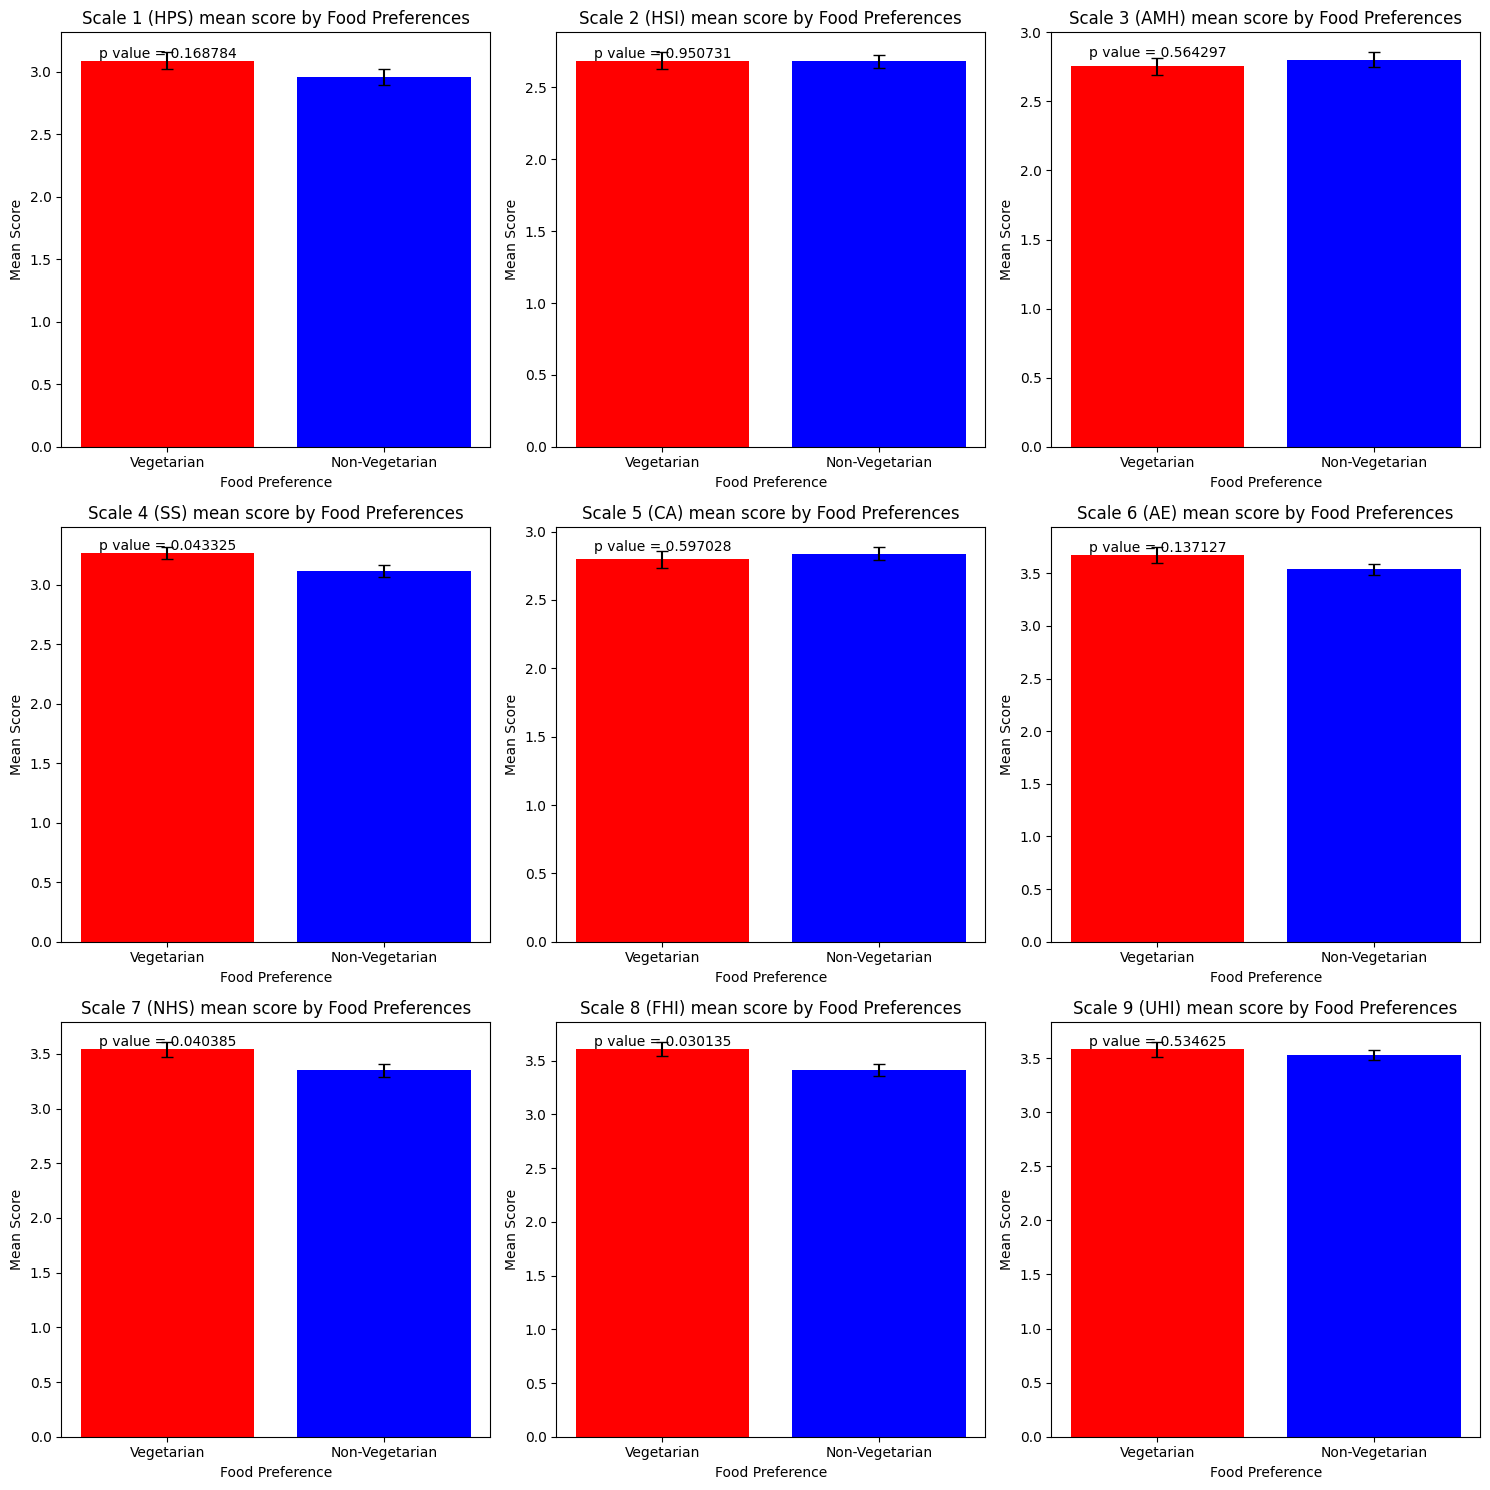

In [ ]:
###########################
######## FOOD PREFERENCE ####
###########################

Vegan = final.query('`food preference` == 1.0')
Vegetarian = final.query('`food preference` == 2.0')
NonVegetarian = final.query('`food preference` == 3.0')
Vegan_Vegetarian = final.query('`food preference` == 1.0 or `food preference` == 2.0')

#Food Preference

fig, axs = plt.subplots(3, 3, figsize=(15, 15))


#Plot 1

vegetarian = Vegan_Vegetarian['Scale 1 (HPS) mean score'].mean()
nonvegetarian = NonVegetarian['Scale 1 (HPS) mean score'].mean()
vegan = Vegan['Scale 1 (HPS) mean score'].mean()

vegetarian_array = Vegan_Vegetarian['Scale 1 (HPS) mean score'].sem()
nonvegetarian_array = NonVegetarian['Scale 1 (HPS) mean score'].sem()
Vegan_array = Vegan['Scale 1 (HPS) mean score'].sem()
# P Value


x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian,nonvegetarian]
colours = ['red','blue']

Scale_1_Pvalue_VV = Vegan_Vegetarian['Scale 1 (HPS) mean score']
Scale_1_array_VV = np.array(Scale_1_Pvalue_YHI)
Scale_1_Pvalue_NV = NonVegetarian['Scale 1 (HPS) mean score']
Scale_1_array_NV = np.array(Scale_1_Pvalue_NHI)

Scale_1_array_VV = pd.to_numeric(Scale_1_Pvalue_VV, errors='coerce')
Scale_1_array_NV = pd.to_numeric(Scale_1_Pvalue_NV, errors='coerce')

Scale_1_array_VV = Scale_1_array_VV.dropna()
Scale_1_array_NV = Scale_1_array_NV.dropna()

result =  stats.ttest_ind(Scale_1_array_VV, Scale_1_array_NV)
P_Value_Scale1_FP = result.pvalue

axs[0][0].bar(x, y , yerr = [vegetarian_array, nonvegetarian_array],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {P_Value_Scale1_FP:.6f}', ha='center', va='bottom')
axs[0][0].set_xlabel('Food Preference')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Food Preferences')

print(f"The values of Scale 1 (HPS) P Value (T-Test) = {P_Value_Scale1_FP}")



#Plot 2

vegetarian1 = Vegan_Vegetarian['Scale 2 (HSI) mean score'].mean()
nonvegetarian1 = NonVegetarian['Scale 2 (HSI) mean score'].mean()
vegan1 = Vegan['Scale 2 (HSI) mean score'].mean()

vegetarian_array1 = Vegan_Vegetarian['Scale 2 (HSI) mean score'].sem()
nonvegetarian_array1 = NonVegetarian['Scale 2 (HSI) mean score'].sem()
vegan_array1 = Vegan['Scale 1 (HPS) mean score'].sem()
# P Value


x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian1,nonvegetarian1]
colours = ['red','blue']

Scale_2_Pvalue_VV = Vegan_Vegetarian['Scale 2 (HSI) mean score']
Scale_2_array_VV = np.array(Scale_2_Pvalue_YHI)
Scale_2_Pvalue_NV = NonVegetarian['Scale 2 (HSI) mean score']
Scale_2_array_NV = np.array(Scale_2_Pvalue_NHI)

Scale_2_array_VV = pd.to_numeric(Scale_2_Pvalue_VV, errors='coerce')
Scale_2_array_NV = pd.to_numeric(Scale_2_Pvalue_NV, errors='coerce')

Scale_2_array_VV = Scale_2_array_VV.dropna()
Scale_2_array_NV = Scale_2_array_NV.dropna()

result2 =  stats.ttest_ind(Scale_2_array_VV, Scale_2_array_NV)
P_Value_Scale2_FP = result2.pvalue



axs[0][1].bar(x, y , yerr = [vegetarian_array1, nonvegetarian_array1],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {P_Value_Scale2_FP:.6f}', ha='center', va='bottom')
axs[0][1].set_xlabel('Food Preference')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Food Preferences')

print(f"The values of Scale 2 (HSI) P Value (T-Test) = {P_Value_Scale2_FP}")

#Plot 3
vegetarian2 = Vegan_Vegetarian['Scale 3 (AMH) mean score'].mean()
nonvegetarian2 = NonVegetarian['Scale 3 (AMH) mean score'].mean()
vegan2 = Vegan['Scale 3 (AMH) mean score'].mean()

vegetarian_array2 = Vegan_Vegetarian['Scale 3 (AMH) mean score'].sem()
nonvegetarian_array2 = NonVegetarian['Scale 3 (AMH) mean score'].sem()
vegan_array2 = Vegan['Scale 3 (AMH) mean score'].sem()



x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian2,nonvegetarian2]
colours = ['red','blue']

Scale_3_Pvalue_VV = Vegan_Vegetarian['Scale 3 (AMH) mean score']
Scale_3_array_VV = np.array(Scale_3_Pvalue_YHI)
Scale_3_Pvalue_NV = NonVegetarian['Scale 3 (AMH) mean score']
Scale_3_array_NV = np.array(Scale_3_Pvalue_NHI)

Scale_3_array_VV = pd.to_numeric(Scale_3_Pvalue_VV, errors='coerce')
Scale_3_array_NV = pd.to_numeric(Scale_3_Pvalue_NV, errors='coerce')

Scale_3_array_VV = Scale_3_array_VV.dropna()
Scale_3_array_NV = Scale_3_array_NV.dropna()

result3 =  stats.ttest_ind(Scale_3_array_VV, Scale_3_array_NV)
P_Value_Scale3_FP = result3.pvalue


axs[0][2].bar(x, y , yerr = [vegetarian_array2, nonvegetarian_array2],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {P_Value_Scale3_FP:.6f}', ha='center', va='bottom')
axs[0][2].set_xlabel('Food Preference')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Food Preferences')

print(f"The values of Scale 3 (AMH) P Value (T-Test) = {P_Value_Scale3_FP}")

#Plot 4
vegetarian3 = Vegan_Vegetarian['Scale 4 (SS) mean score'].mean()
nonvegetarian3 = NonVegetarian['Scale 4 (SS) mean score'].mean()
vegan3 = Vegan['Scale 4 (SS) mean score'].mean()

vegetarian_array3 = Vegan_Vegetarian['Scale 4 (SS) mean score'].sem()
nonvegetarian_array3 = NonVegetarian['Scale 4 (SS) mean score'].sem()
vegan_array3 = Vegan['Scale 4 (SS) mean score'].sem()


x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian3,nonvegetarian3]
colours = ['red','blue']


Scale_4_Pvalue_VV = Vegan_Vegetarian['Scale 4 (SS) mean score']
Scale_4_array_VV = np.array(Scale_4_Pvalue_YHI)
Scale_4_Pvalue_NV = NonVegetarian['Scale 4 (SS) mean score']
Scale_4_array_NV = np.array(Scale_4_Pvalue_NHI)

Scale_4_array_VV = pd.to_numeric(Scale_4_Pvalue_VV, errors='coerce')
Scale_4_array_NV = pd.to_numeric(Scale_4_Pvalue_NV, errors='coerce')

Scale_4_array_VV = Scale_4_array_VV.dropna()
Scale_4_array_NV = Scale_4_array_NV.dropna()

result4 =  stats.ttest_ind(Scale_4_array_VV, Scale_4_array_NV)
P_Value_Scale4_FP = result4.pvalue


axs[1][0].bar(x, y , yerr = [vegetarian_array3, nonvegetarian_array3],capsize = 4,color = colours)
axs[1][0].set_xlabel('Food Preference')
axs[1][0].text(0, max(y), f'p value = {P_Value_Scale4_FP:.6f}', ha='center', va='bottom')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Food Preferences')

print(f"The values of Scale 4 (SS) P Value (T-Test) = {P_Value_Scale4_FP}")

#Plot 5
vegetarian4 = Vegan_Vegetarian['Scale 5 (CA) mean score'].mean()
nonvegetarian4 = NonVegetarian['Scale 5 (CA) mean score'].mean()
vegan4 = Vegan['Scale 5 (CA) mean score'].mean()

vegetarian_array4 = Vegan_Vegetarian['Scale 5 (CA) mean score'].sem()
nonvegetarian_array4 = NonVegetarian['Scale 5 (CA) mean score'].sem()
vegan_array4 = Vegan['Scale 5 (CA) mean score'].sem()


x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian4,nonvegetarian4]
colours = ['red','blue']

Scale_5_Pvalue_VV = Vegan_Vegetarian['Scale 5 (CA) mean score']
Scale_5_array_VV = np.array(Scale_5_Pvalue_YHI)
Scale_5_Pvalue_NV = NonVegetarian['Scale 5 (CA) mean score']
Scale_5_array_NV = np.array(Scale_5_Pvalue_NHI)

Scale_5_array_VV = pd.to_numeric(Scale_5_Pvalue_VV, errors='coerce')
Scale_5_array_NV = pd.to_numeric(Scale_5_Pvalue_NV, errors='coerce')

Scale_5_array_VV = Scale_5_array_VV.dropna()
Scale_5_array_NV = Scale_5_array_NV.dropna()

result5 =  stats.ttest_ind(Scale_5_array_VV, Scale_5_array_NV)
P_Value_Scale5_FP = result5.pvalue

axs[1][1].bar(x, y , yerr = [vegetarian_array4, nonvegetarian_array4],capsize = 4,color = colours)
axs[1][1].set_xlabel('Food Preference')
axs[1][1].text(0, max(y), f'p value = {P_Value_Scale5_FP:.6f}', ha='center', va='bottom')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Food Preferences')

print(f"The values of Scale 5 (CA) P Value (T-Test) = {P_Value_Scale5_FP}")

#Plot 6
vegetarian5 = Vegan_Vegetarian['Scale 6 (AE) mean score'].mean()
nonvegetarian5 = NonVegetarian['Scale 6 (AE) mean score'].mean()
vegan5 = Vegan['Scale 6 (AE) mean score'].mean()

vegetarian_array5 = Vegan_Vegetarian['Scale 6 (AE) mean score'].sem()
nonvegetarian_array5 = NonVegetarian['Scale 6 (AE) mean score'].sem()
vegan_array5 = Vegan['Scale 6 (AE) mean score'].sem()


x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian5,nonvegetarian5]
colours = ['red','blue']

Scale_6_Pvalue_VV = Vegan_Vegetarian['Scale 6 (AE) mean score']
Scale_6_array_VV = np.array(Scale_6_Pvalue_YHI)
Scale_6_Pvalue_NV = NonVegetarian['Scale 6 (AE) mean score']
Scale_6_array_NV = np.array(Scale_6_Pvalue_NHI)

Scale_6_array_VV = pd.to_numeric(Scale_6_Pvalue_VV, errors='coerce')
Scale_6_array_NV = pd.to_numeric(Scale_6_Pvalue_NV, errors='coerce')

Scale_6_array_VV = Scale_6_array_VV.dropna()
Scale_6_array_NV = Scale_6_array_NV.dropna()

result6 =  stats.ttest_ind(Scale_6_array_VV, Scale_6_array_NV)
P_Value_Scale6_FP = result6.pvalue

axs[1][2].bar(x, y , yerr = [vegetarian_array5, nonvegetarian_array5],capsize = 4,color = colours)
axs[1][2].set_xlabel('Food Preference')
axs[1][2].text(0, max(y), f'p value = {P_Value_Scale6_FP:.6f}', ha='center', va='bottom')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Food Preferences')

print(f"The values of Scale 6 (AE) P Value (T-Test) = {P_Value_Scale6_FP}")

#Plot 7
vegetarian6 = Vegan_Vegetarian['Scale 7 (NHS) mean score'].mean()
nonvegetarian6 = NonVegetarian['Scale 7 (NHS) mean score'].mean()
vegan6 = Vegan['Scale 7 (NHS) mean score'].mean()


vegetarian_array6 = Vegan_Vegetarian['Scale 7 (NHS) mean score'].sem()
nonvegetarian_array6 = NonVegetarian['Scale 7 (NHS) mean score'].sem()
vegan_array6 = Vegan['Scale 7 (NHS) mean score'].sem()

x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian6,nonvegetarian6]
colours = ['red','blue']

Scale_7_Pvalue_VV = Vegan_Vegetarian['Scale 7 (NHS) mean score']
Scale_7_array_VV = np.array(Scale_7_Pvalue_YHI)
Scale_7_Pvalue_NV = NonVegetarian['Scale 7 (NHS) mean score']
Scale_7_array_NV = np.array(Scale_7_Pvalue_NHI)

Scale_7_array_VV = pd.to_numeric(Scale_7_Pvalue_VV, errors='coerce')
Scale_7_array_NV = pd.to_numeric(Scale_7_Pvalue_NV, errors='coerce')

Scale_7_array_VV = Scale_7_array_VV.dropna()
Scale_7_array_NV = Scale_7_array_NV.dropna()

result7 =  stats.ttest_ind(Scale_7_array_VV, Scale_7_array_NV)
P_Value_Scale7_FP = result7.pvalue

axs[2][0].bar(x, y , yerr = [vegetarian_array6, nonvegetarian_array6],capsize = 4,color = colours)
axs[2][0].set_xlabel('Food Preference')
axs[2][0].text(0, max(y), f'p value = {P_Value_Scale7_FP:.6f}', ha='center', va='bottom')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Food Preferences')

print(f"The values of Scale 7 (NHS) P Value (T-Test) = {P_Value_Scale7_FP}")

#Plot 8

vegetarian7 = Vegan_Vegetarian['Scale 8 (FHI) mean score'].mean()
nonvegetarian7 = NonVegetarian['Scale 8 (FHI) mean score'].mean()
vegan7 = Vegan['Scale 8 (FHI) mean score'].mean()

vegetarian_array7 = Vegan_Vegetarian['Scale 8 (FHI) mean score'].sem()
nonvegetarian_array7 = NonVegetarian['Scale 8 (FHI) mean score'].sem()
vegan_array7 = Vegan['Scale 8 (FHI) mean score'].sem()



x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian7,nonvegetarian7]
colours = ['red','blue']


Scale_8_Pvalue_VV = Vegan_Vegetarian['Scale 8 (FHI) mean score']
Scale_8_array_VV = np.array(Scale_8_Pvalue_YHI)
Scale_8_Pvalue_NV = NonVegetarian['Scale 8 (FHI) mean score']
Scale_8_array_NV = np.array(Scale_8_Pvalue_NHI)

Scale_8_array_VV = pd.to_numeric(Scale_8_Pvalue_VV, errors='coerce')
Scale_8_array_NV = pd.to_numeric(Scale_8_Pvalue_NV, errors='coerce')

Scale_8_array_VV = Scale_8_array_VV.dropna()
Scale_8_array_NV = Scale_8_array_NV.dropna()

result8 =  stats.ttest_ind(Scale_8_array_VV, Scale_8_array_NV)
P_Value_Scale8_FP = result8.pvalue

axs[2][1].bar(x, y , yerr = [vegetarian_array7, nonvegetarian_array7] ,capsize = 4,color = colours)
axs[2][1].set_xlabel('Food Preference')
axs[2][1].text(0, max(y), f'p value = {P_Value_Scale8_FP:.6f}', ha='center', va='bottom')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Food Preferences')

print(f"The values of Scale 8 (FHI) P Value (T-Test) = {P_Value_Scale8_FP}")

#Plot 9

vegetarian8 = Vegan_Vegetarian['Scale 9 (UHI) mean score'].mean()
nonvegetarian8 = NonVegetarian['Scale 9 (UHI) mean score'].mean()
vegan8 = Vegan['Scale 9 (UHI) mean score'].mean()


vegetarian_array8 = Vegan_Vegetarian['Scale 9 (UHI) mean score'].sem()
nonvegetarian_array8 = NonVegetarian['Scale 9 (UHI) mean score'].sem()
vegan_array8 = Vegan['Scale 9 (UHI) mean score'].sem()

x = ['Vegetarian','Non-Vegetarian']
y = [vegetarian8,nonvegetarian8]
colours = ['red','blue']

Scale_9_Pvalue_VV = Vegan_Vegetarian['Scale 9 (UHI) mean score']
Scale_9_array_VV = np.array(Scale_9_Pvalue_YHI)
Scale_9_Pvalue_NV = NonVegetarian['Scale 9 (UHI) mean score']
Scale_9_array_NV = np.array(Scale_9_Pvalue_NHI)

Scale_9_array_VV = pd.to_numeric(Scale_9_Pvalue_VV, errors='coerce')
Scale_9_array_NV = pd.to_numeric(Scale_9_Pvalue_NV, errors='coerce')

Scale_9_array_VV = Scale_9_array_VV.dropna()
Scale_9_array_NV = Scale_9_array_NV.dropna()

result9 =  stats.ttest_ind(Scale_9_array_VV, Scale_9_array_NV)
P_Value_Scale9_FP = result9.pvalue

axs[2][2].bar(x, y , yerr = [vegetarian_array8, nonvegetarian_array8],capsize = 4,color = colours)
axs[2][2].set_xlabel('Food Preference')
axs[2][2].text(0, max(y), f'p value = {P_Value_Scale9_FP:.6f}', ha='center', va='bottom')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Food Preferences')

print(f"The values of Scale 9 (UHI) P Value (T-Test) = {P_Value_Scale9_FP}")

plt.tight_layout()
plt.show()


In [ ]:
print("The mean of Food Preference (Vegetarian) HPS is:", vegetarian)
print("The mean of Food Preference (Non-Vegetarian) HPS is:", nonvegetarian)
print("The mean of Food Preference (Vegan) HPS is:", vegan)
print("The mean of Food Preference (Vegetarian) HSI is:", vegetarian1)
print("The mean of Food Preference (Non-Vegetarian) HSI is:", nonvegetarian1)
print("The mean of Food Preference (Vegan) HSI is:", vegan1)
print("The mean of Food Preference (Vegetarian)) AMH is:", vegetarian2)
print("The mean of Food Preference (Non-Vegetarian) AMH is:", nonvegetarian2)
print("The mean of Food Preference (Vegan) AMH is:", vegan2)
print("The mean of Food Preference (Vegetarian) SS is:", vegetarian3)
print("The mean of Food Preference (Non-Vegetarian) SS is:", nonvegetarian3)
print("The mean of Food Preference (Vegan) SS is:", vegan3)
print("The mean of Food Preference (Vegetarian) CA is:", vegetarian4)
print("The mean of Food Preference (Non-Vegetarian) CA is:", nonvegetarian4)
print("The mean of Food Preference (Vegan) CA is:", vegan4)
print("The mean of Food Preference (Vegetarian) AE is:", vegetarian5)
print("The mean of Food Preference (Non-Vegetarian) AE is:", nonvegetarian5)
print("The mean of Food Preference (Vegan) AE is:", vegan5)
print("The mean of Food Preference (Vegetarian) NHS is:", vegetarian6)
print("The mean of Food Preference (Non-Vegetarian) NHS is:", nonvegetarian6)
print("The mean of Food Preference (Vegan) NHS is:", vegan6)
print("The mean of Food Preference (Vegetarian) FHI is:", vegetarian7)
print("The mean of Food Preference (Non-Vegetarian) FHI is:", nonvegetarian7)
print("The mean of Food Preference (Vegan) FHI is:", vegan7)
print("The mean of Food Preference (Vegetarian) UHI is:", vegetarian8)
print("The mean of Food Preference (Non-Vegetarian) UHI is:", nonvegetarian8)
print("The mean of Food Preference (Vegan) UHI is:", vegan8)




The mean of Food Preference (Vegetarian) HPS is: 3.0866666666666664
The mean of Food Preference (Non-Vegetarian) HPS is: 2.956
The mean of Food Preference (Vegan) HPS is: 3.25
The mean of Food Preference (Vegetarian) HSI is: 2.6866666666666665
The mean of Food Preference (Non-Vegetarian) HSI is: 2.682
The mean of Food Preference (Vegan) HSI is: 3.25
The mean of Food Preference (Vegetarian)) AMH is: 2.754666666666666
The mean of Food Preference (Non-Vegetarian) AMH is: 2.8032000000000004
The mean of Food Preference (Vegan) AMH is: 3.7
The mean of Food Preference (Vegetarian) SS is: 3.2666666666666666
The mean of Food Preference (Non-Vegetarian) SS is: 3.1152000000000006
The mean of Food Preference (Vegan) SS is: 3.6
The mean of Food Preference (Vegetarian) CA is: 2.7973333333333343
The mean of Food Preference (Non-Vegetarian) CA is: 2.8388000000000004
The mean of Food Preference (Vegan) CA is: 3.0
The mean of Food Preference (Vegetarian) AE is: 3.674666666666667
The mean of Food Prefere

In [ ]:
Vegatarion_Scale1 = Vegan_Vegetarian['Scale 1 (HPS) mean score']
Nonvegetarion_Scale1 = NonVegetarian['Scale 1 (HPS) mean score']
Vegatarion_Scale2 = Vegan_Vegetarian['Scale 2 (HSI) mean score']
Nonvegetarion_Scale2 = NonVegetarian['Scale 2 (HSI) mean score']
Vegatarion_Scale3 = Vegan_Vegetarian['Scale 3 (AMH) mean score']
Nonvegetarion_Scale3 = NonVegetarian['Scale 3 (AMH) mean score']
Vegatarion_Scale4 = Vegan_Vegetarian['Scale 4 (SS) mean score']
Nonvegetarion_Scale4 = NonVegetarian['Scale 4 (SS) mean score']
Vegatarion_Scale5 = Vegan_Vegetarian['Scale 5 (CA) mean score']
Nonvegetarion_Scale5 = NonVegetarian['Scale 5 (CA) mean score']
Vegatarion_Scale6 = Vegan_Vegetarian['Scale 6 (AE) mean score']
Nonvegetarion_Scale6 = NonVegetarian['Scale 6 (AE) mean score']
Vegatarion_Scale7 = Vegan_Vegetarian['Scale 7 (NHS) mean score']
Nonvegetarion_Scale7 = NonVegetarian['Scale 7 (NHS) mean score']
Vegatarion_Scale8 = Vegan_Vegetarian['Scale 8 (FHI) mean score']
Nonvegetarion_Scale8 = NonVegetarian['Scale 8 (FHI) mean score']
Vegatarion_Scale9 = Vegan_Vegetarian['Scale 9 (UHI) mean score']
Nonvegetarion_Scale9 = NonVegetarian['Scale 9 (UHI) mean score']

print("The Effect size for HPS is",cohend1(Vegatarion_Scale1,Nonvegetarion_Scale1))
print("The Effect size for HSI is",cohend1(Vegatarion_Scale2,Nonvegetarion_Scale2))
print("The Effect size for AMH is",cohend1(Vegatarion_Scale3,Nonvegetarion_Scale3))
print("The Effect size for SS is",cohend1(Vegatarion_Scale4,Nonvegetarion_Scale4))
print("The Effect size for CA is",cohend1(Vegatarion_Scale5,Nonvegetarion_Scale5))
print("The Effect size for AE is",cohend1(Vegatarion_Scale6,Nonvegetarion_Scale6))
print("The Effect size for NHS is",cohend1(Vegatarion_Scale7,Nonvegetarion_Scale7))
print("The Effect size for FHI is",cohend1(Vegatarion_Scale8,Nonvegetarion_Scale8))
print("The Effect size for UHI is",cohend1(Vegatarion_Scale9,Nonvegetarion_Scale9))

The Effect size for HPS is 0.20173264071178817
The Effect size for HSI is 0.009036219562651437
The Effect size for AMH is -0.08434086514137258
The Effect size for SS is 0.2970281098743217
The Effect size for CA is -0.07734335018615317
The Effect size for AE is 0.21801174089476522
The Effect size for NHS is 0.301370502474078
The Effect size for FHI is 0.3189972837812482
The Effect size for UHI is 0.09085622028113526


In [ ]:
food_pref_df2 = final.copy()

food_pref_df2.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
food_pref_df2.rename(columns = {'food preference':'food_preference'}, inplace = True)
food_pref_df2.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
food_pref_df2.rename(columns = {'prescription medication':'prescription_medication'}, inplace = True)
food_pref_df2.rename(columns = {'health insurance':'health_insurance'}, inplace = True)

#Converting Vegan to Veg basically just converting the code of Vegan to Veg code to replicate the merge
food_pref_df2['food_preference'].mask(food_pref_df2['food_preference'] == 1.0, 2.0, inplace=True)

food_pref_df2['Scale1_Mean'] = food_pref_df2['Scale1_Mean'].astype(float)
food_pref_df2['Scale2_Mean'] = food_pref_df2['Scale2_Mean'].astype(float)
food_pref_df2['Scale3_Mean'] = food_pref_df2['Scale3_Mean'].astype(float)
food_pref_df2['Scale4_Mean'] = food_pref_df2['Scale4_Mean'].astype(float)
food_pref_df2['Scale5_Mean'] = food_pref_df2['Scale5_Mean'].astype(float)
food_pref_df2['Scale6_Mean'] = food_pref_df2['Scale6_Mean'].astype(float)
food_pref_df2['Scale7_Mean'] = food_pref_df2['Scale7_Mean'].astype(float)
food_pref_df2['Scale8_Mean'] = food_pref_df2['Scale8_Mean'].astype(float)
food_pref_df2['Scale9_Mean'] = food_pref_df2['Scale9_Mean'].astype(float)

manova_food = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ food_preference', data=food_pref_df2)

resultfood = manova_food.mv_test()
print(resultfood.summary())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.2797 9.0000 190.0000 54.3766 0.0000
         Pillai's trace 0.7203 9.0000 190.0000 54.3766 0.0000
 Hotelling-Lawley trace 2.5757 9.0000 190.0000 54.3766 0.0000
    Roy's greatest root 2.5757 9.0000 190.0000 54.3766 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
    food_preference     Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9191 9.0000 190.0000  1.8592 0.0603
         Pillai's trace 0.0809 9.0000 190.0000  1.8592 0.0603
 Hotelling-Lawley trace 0.

In [ ]:
fp_scale_1 = ols('Scale1_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table1 = anova_lm(fp_scale_1)
fp_table1

df     sum_sq   mean_sq         F    PR(>F)
food_preference    1.0   0.800333  0.800333  1.907628  0.168784
Residual         198.0  83.069667  0.419544       NaN       NaN

In [ ]:
fp_scale_2 = ols('Scale2_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table2 = anova_lm(fp_scale_2)
fp_table2

df     sum_sq   mean_sq         F    PR(>F)
food_preference    1.0   0.001021  0.001021  0.003827  0.950731
Residual         198.0  52.808667  0.266710       NaN       NaN

In [ ]:
fp_scale_3 = ols('Scale3_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table3 = anova_lm(fp_scale_3)
fp_table3

df     sum_sq   mean_sq        F    PR(>F)
food_preference    1.0   0.110413  0.110413  0.33344  0.564297
Residual         198.0  65.564587  0.331134      NaN       NaN

In [ ]:
fp_scale_4 = ols('Scale4_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table4 = anova_lm(fp_scale_4)
fp_table4

df     sum_sq   mean_sq        F    PR(>F)
food_preference    1.0   1.075413  1.075413  4.13558  0.043325
Residual         198.0  51.487787  0.260039      NaN       NaN

In [ ]:
fp_scale_5 = ols('Scale5_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table5 = anova_lm(fp_scale_5)
fp_table5

df     sum_sq   mean_sq         F    PR(>F)
food_preference    1.0   0.080601  0.080601  0.280406  0.597028
Residual         198.0  56.913787  0.287443       NaN       NaN

In [ ]:
fp_scale_6 = ols('Scale6_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table6 = anova_lm(fp_scale_6)
fp_table6

df     sum_sq   mean_sq         F    PR(>F)
food_preference    1.0   0.906541  0.906541  2.227927  0.137127
Residual         198.0  80.565947  0.406899       NaN       NaN

In [ ]:
fp_scale_7 = ols('Scale7_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table7 = anova_lm(fp_scale_7)
fp_table7

df     sum_sq   mean_sq         F    PR(>F)
food_preference    1.0   1.680333  1.680333  4.257383  0.040385
Residual         198.0  78.148000  0.394687       NaN       NaN

In [ ]:
fp_scale_8 = ols('Scale8_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table8 = anova_lm(fp_scale_8)
fp_table8

df    sum_sq  mean_sq         F    PR(>F)
food_preference    1.0   1.75692  1.75692  4.769966  0.030135
Residual         198.0  72.92928  0.36833       NaN       NaN

In [ ]:
fp_scale_9 = ols('Scale9_Mean ~ food_preference', data=food_pref_df2).fit()
fp_table9 = anova_lm(fp_scale_9)
fp_table9

df     sum_sq   mean_sq         F    PR(>F)
food_preference    1.0   0.125453  0.125453  0.386946  0.534625
Residual         198.0  64.194347  0.324214       NaN       NaN

In [ ]:
food_pref_df2.to_csv("Food_Preference.csv" , index = False)

The values of Scale 1 (HPS) for Income <90k and 90k<Income< 200k are P Value (T-Test) = 0.158512902284359 and P Value (Wilcoxon ranksum test) = 0.07664912200330144.
The values of Scale 1 (HPS) for Income <90k and Income > 200k are P Value (T-Test) = 1.0904266119918324e-05 and P Value (Wilcoxon ranksum test) = 5.447921032430863e-05.
The values of Scale 1 (HPS) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = 0.0001637665646755909 and P Value (Wilcoxon ranksum test) = 0.0003310350590928611.
The values of Scale 2 (HSI) for Income <90k and 90k<Income< 200k are P Value (T-Test) = 0.5183826604036189 and P Value (Wilcoxon ranksum test) = 0.40736226824569755.
The values of Scale 2 (HSI) for Income <90k and Income > 200k are P Value (T-Test) = 0.0022827142370042365 and P Value (Wilcoxon ranksum test) = 0.004713536993458185.
The values of Scale 2 (HSI) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = 0.001130799506158411 and P Value (Wilcoxon ranksum test) = 0.003365105

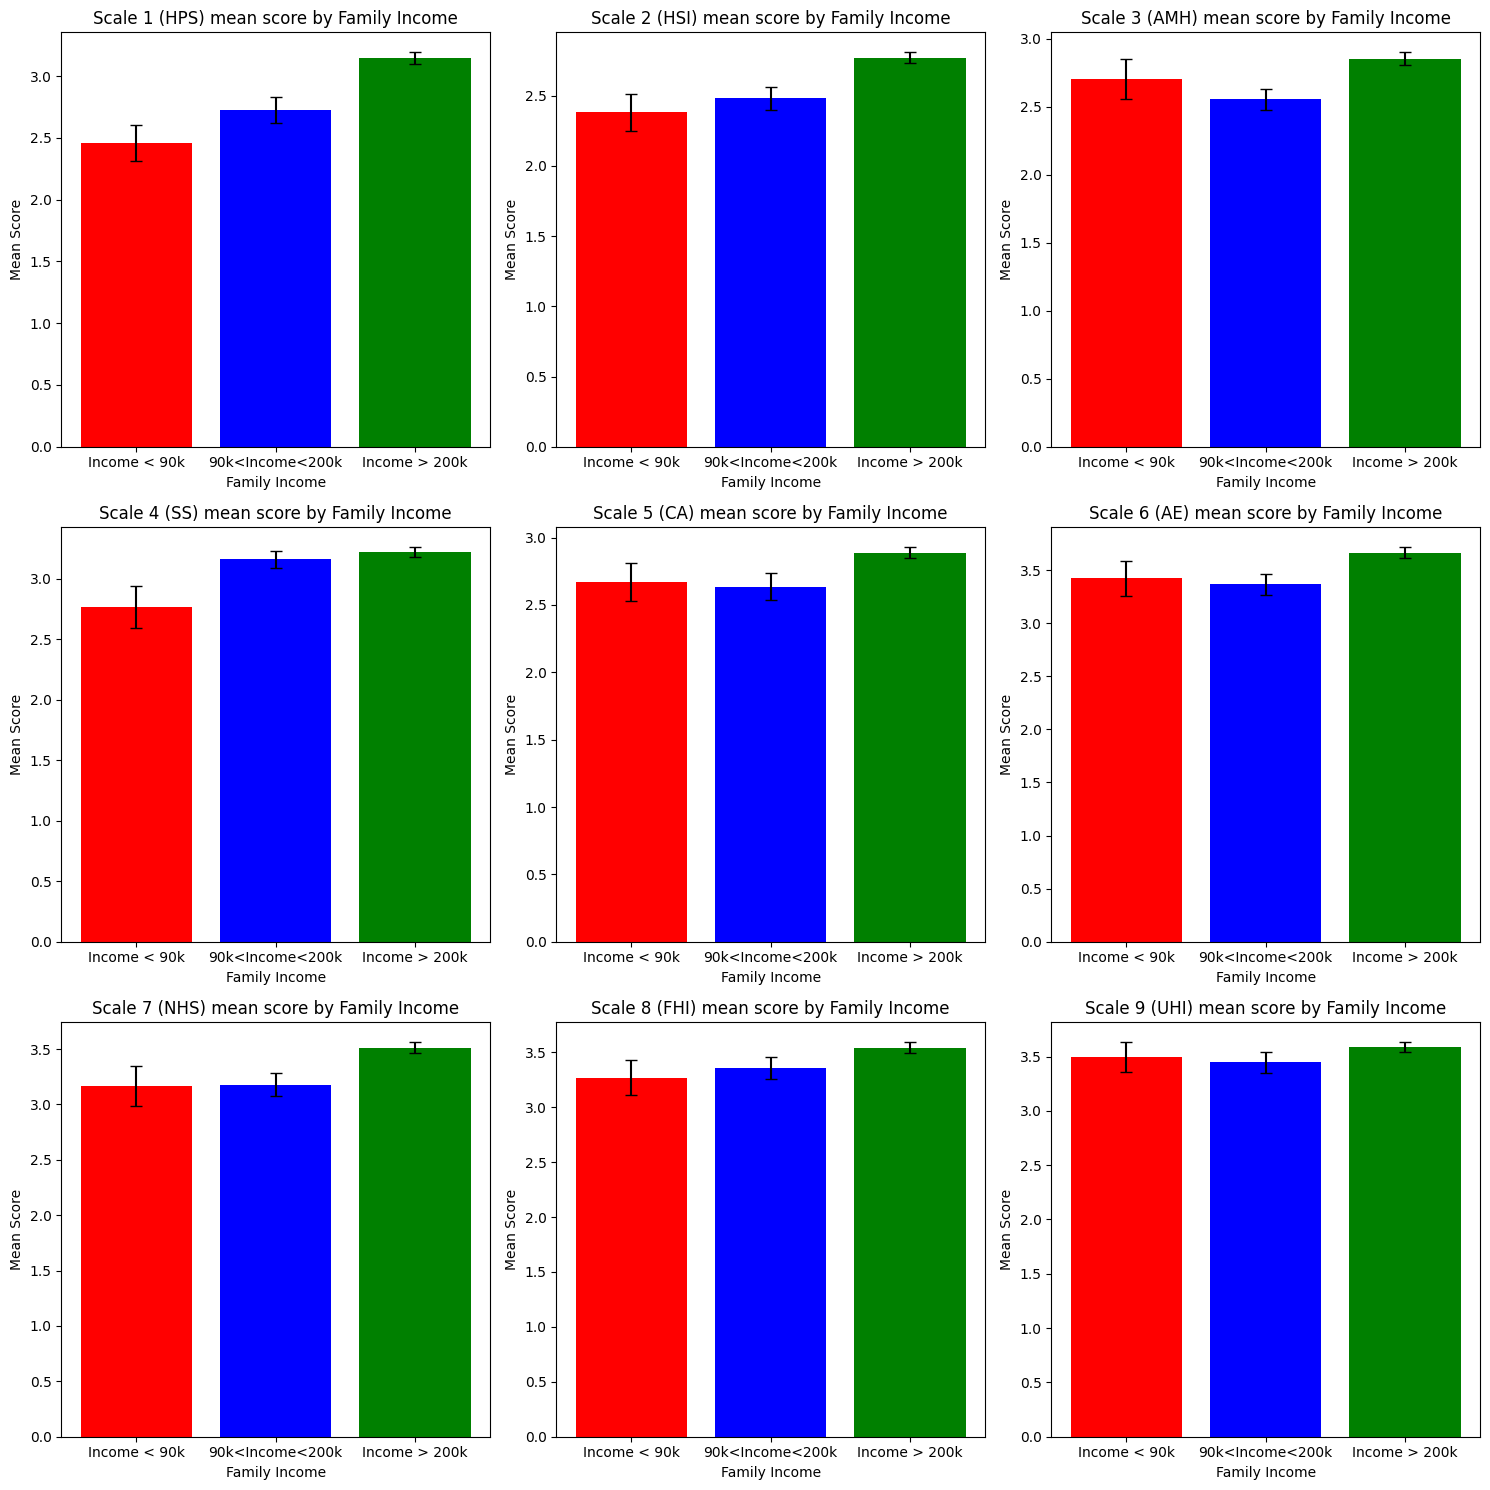

In [ ]:
lessthan90 = final.query('`family income` == 1.0')
between90and200 = final.query('`family income` == 2.0')
greaterthan200 = final.query('`family income` == 3.0')

lessthan200 = final.query('`family income` == 1.0 or `family income` == 2.0')

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot

less = lessthan90['Scale 1 (HPS) mean score'].mean()
betw = between90and200['Scale 1 (HPS) mean score'].mean()
great = greaterthan200['Scale 1 (HPS) mean score'].mean()

less_sem  = lessthan90['Scale 1 (HPS) mean score'].sem()
betw_sem = between90and200['Scale 1 (HPS) mean score'].sem()
great_sem = greaterthan200['Scale 1 (HPS) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less,betw,great]
colours = ['red','blue','green']

Scale_1_Pvalue_FIG = greaterthan200['Scale 1 (HPS) mean score']
Scale_1_array_FIG = np.array(Scale_1_Pvalue_FIG)
Scale_1_Pvalue_FILT = lessthan200['Scale 1 (HPS) mean score']
Scale_1_array_FILT = np.array(Scale_1_Pvalue_FILT)

statistic, pvaluetFI = ranksums(Scale_1_array_FIG, Scale_1_array_FILT)


axs[0][0].bar(x, y , yerr = [less_sem, betw_sem,great_sem],capsize = 4,color = colours)
axs[0][0].set_xlabel('Family Income')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_1_Pvalue_FIL = lessthan90['Scale 1 (HPS) mean score']
Scale_1_array_FIL = np.array(Scale_1_Pvalue_FIL)
Scale_1_Pvalue_FIB = between90and200['Scale 1 (HPS) mean score']
Scale_1_array_FIB = np.array(Scale_1_Pvalue_FIB)


Scale_1_array_FIL = pd.to_numeric(Scale_1_Pvalue_FIL, errors='coerce')
Scale_1_array_FIB = pd.to_numeric(Scale_1_Pvalue_FIB, errors='coerce')
Scale_1_array_FIG = pd.to_numeric(Scale_1_Pvalue_FIG, errors='coerce')

Scale_1_array_FIL = Scale_1_array_FIL.dropna()
Scale_1_array_FIB = Scale_1_array_FIB.dropna()
Scale_1_array_FIG = Scale_1_array_FIG.dropna()

result =  stats.ttest_ind(Scale_1_array_FIL, Scale_1_array_FIB)
result1 =  stats.ttest_ind(Scale_1_array_FIL, Scale_1_array_FIG)
result2 =  stats.ttest_ind(Scale_1_array_FIG, Scale_1_array_FIB)


statistic, pvalueranksumLB1 = ranksums(Scale_1_array_FIL, Scale_1_array_FIB)
statistic, pvalueranksumLG1 = ranksums(Scale_1_array_FIL, Scale_1_array_FIG)
statistic, pvalueranksumGB1 = ranksums(Scale_1_array_FIG, Scale_1_array_FIB)

P_Value_Scale1_FILB = result.pvalue
P_Value_Scale1_FILG = result1.pvalue
P_Value_Scale1_FIGB = result2.pvalue

print(f"The values of Scale 1 (HPS) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale1_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB1}.")
print(f"The values of Scale 1 (HPS) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale1_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG1}.")
print(f"The values of Scale 1 (HPS) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale1_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB1}.")

#Plot 2

less2 = lessthan90['Scale 2 (HSI) mean score'].mean()
betw2 = between90and200['Scale 2 (HSI) mean score'].mean()
great2 = greaterthan200['Scale 2 (HSI) mean score'].mean()

less_sem2  = lessthan90['Scale 2 (HSI) mean score'].sem()
betw_sem2 = between90and200['Scale 2 (HSI) mean score'].sem()
great_sem2 = greaterthan200['Scale 2 (HSI) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less2,betw2,great2]
colours = ['red','blue','green']

Scale_2_Pvalue_FIG = greaterthan200['Scale 2 (HSI) mean score']
Scale_2_array_FIG = np.array(Scale_2_Pvalue_FIG)
Scale_2_Pvalue_FILT = lessthan200['Scale 2 (HSI) mean score']
Scale_2_array_FILT = np.array(Scale_2_Pvalue_FILT)

statistic, pvaluetFI2 = ranksums(Scale_2_array_FIG, Scale_2_array_FILT)



axs[0][1].bar(x, y , yerr = [less_sem2, betw_sem2,great_sem2],capsize = 4,color = colours)
axs[0][1].set_xlabel('Family Income')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_2_Pvalue_FIL = lessthan90['Scale 2 (HSI) mean score']
Scale_2_array_FIL = np.array(Scale_2_Pvalue_FIL)
Scale_2_Pvalue_FIB = between90and200['Scale 2 (HSI) mean score']
Scale_2_array_FIB = np.array(Scale_2_Pvalue_FIB)
Scale_2_Pvalue_FIG = greaterthan200['Scale 2 (HSI) mean score']
Scale_2_array_FIG = np.array(Scale_2_Pvalue_FIG)

Scale_2_array_FIL = pd.to_numeric(Scale_2_Pvalue_FIL, errors='coerce')
Scale_2_array_FIB = pd.to_numeric(Scale_2_Pvalue_FIB, errors='coerce')
Scale_2_array_FIG = pd.to_numeric(Scale_2_Pvalue_FIG, errors='coerce')

Scale_2_array_FIL = Scale_2_array_FIL.dropna()
Scale_2_array_FIB = Scale_2_array_FIB.dropna()
Scale_2_array_FIG = Scale_2_array_FIG.dropna()

result =  stats.ttest_ind(Scale_2_array_FIL, Scale_2_array_FIB)
result1 =  stats.ttest_ind(Scale_2_array_FIL, Scale_2_array_FIG)
result2 =  stats.ttest_ind(Scale_2_array_FIG, Scale_2_array_FIB)


statistic, pvalueranksumLB2 = ranksums(Scale_2_array_FIL, Scale_2_array_FIB)
statistic, pvalueranksumLG2 = ranksums(Scale_2_array_FIL, Scale_2_array_FIG)
statistic, pvalueranksumGB2 = ranksums(Scale_2_array_FIG, Scale_2_array_FIB)

P_Value_Scale2_FILB = result.pvalue
P_Value_Scale2_FILG = result1.pvalue
P_Value_Scale2_FIGB = result2.pvalue

print(f"The values of Scale 2 (HSI) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale2_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB2}.")
print(f"The values of Scale 2 (HSI) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale2_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG2}.")
print(f"The values of Scale 2 (HSI) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale2_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB2}.")

#Plot 3

less3 = lessthan90['Scale 3 (AMH) mean score'].mean()
betw3 = between90and200['Scale 3 (AMH) mean score'].mean()
great3 = greaterthan200['Scale 3 (AMH) mean score'].mean()

less_sem3  = lessthan90['Scale 3 (AMH) mean score'].sem()
betw_sem3 = between90and200['Scale 3 (AMH) mean score'].sem()
great_sem3 = greaterthan200['Scale 3 (AMH) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less3,betw3,great3]
colours = ['red','blue','green']

Scale_3_Pvalue_FIG = greaterthan200['Scale 3 (AMH) mean score']
Scale_3_array_FIG = np.array(Scale_3_Pvalue_FIG)
Scale_3_Pvalue_FILT = lessthan200['Scale 3 (AMH) mean score']
Scale_3_array_FILT = np.array(Scale_3_Pvalue_FILT)

statistic, pvaluetFI3 = ranksums(Scale_3_array_FIG, Scale_3_array_FILT)



axs[0][2].bar(x, y , yerr = [less_sem3, betw_sem3,great_sem3],capsize = 4,color = colours)
axs[0][2].set_xlabel('Family Income')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_3_Pvalue_FIL = lessthan90['Scale 3 (AMH) mean score']
Scale_3_array_FIL = np.array(Scale_3_Pvalue_FIL)
Scale_3_Pvalue_FIB = between90and200['Scale 3 (AMH) mean score']
Scale_3_array_FIB = np.array(Scale_3_Pvalue_FIB)
Scale_3_Pvalue_FIG = greaterthan200['Scale 3 (AMH) mean score']
Scale_3_array_FIG = np.array(Scale_3_Pvalue_FIG)

Scale_3_array_FIL = pd.to_numeric(Scale_3_Pvalue_FIL, errors='coerce')
Scale_3_array_FIB = pd.to_numeric(Scale_3_Pvalue_FIB, errors='coerce')
Scale_3_array_FIG = pd.to_numeric(Scale_3_Pvalue_FIG, errors='coerce')

Scale_3_array_FIL = Scale_3_array_FIL.dropna()
Scale_3_array_FIB = Scale_3_array_FIB.dropna()
Scale_3_array_FIG = Scale_3_array_FIG.dropna()

result =  stats.ttest_ind(Scale_3_array_FIL, Scale_3_array_FIB)
result1 =  stats.ttest_ind(Scale_3_array_FIL, Scale_3_array_FIG)
result2 =  stats.ttest_ind(Scale_3_array_FIG, Scale_3_array_FIB)


statistic, pvalueranksumLB3 = ranksums(Scale_3_array_FIL, Scale_3_array_FIB)
statistic, pvalueranksumLG3 = ranksums(Scale_3_array_FIL, Scale_3_array_FIG)
statistic, pvalueranksumGB3 = ranksums(Scale_3_array_FIG, Scale_3_array_FIB)

P_Value_Scale3_FILB = result.pvalue
P_Value_Scale3_FILG = result1.pvalue
P_Value_Scale3_FIGB = result2.pvalue

print(f"The values of Scale 3 (AMH) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale3_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB3}.")
print(f"The values of Scale 3 (AMH) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale3_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG3}.")
print(f"The values of Scale 3 (AMH) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale3_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB3}.")

#Plot 4

less4 = lessthan90['Scale 4 (SS) mean score'].mean()
betw4 = between90and200['Scale 4 (SS) mean score'].mean()
great4 = greaterthan200['Scale 4 (SS) mean score'].mean()

less_sem4  = lessthan90['Scale 4 (SS) mean score'].sem()
betw_sem4 = between90and200['Scale 4 (SS) mean score'].sem()
great_sem4 = greaterthan200['Scale 4 (SS) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less4,betw4,great4]
colours = ['red','blue','green']

Scale_4_Pvalue_FIG = greaterthan200['Scale 4 (SS) mean score']
Scale_4_array_FIG = np.array(Scale_4_Pvalue_FIG)
Scale_4_Pvalue_FILT = lessthan200['Scale 4 (SS) mean score']
Scale_4_array_FILT = np.array(Scale_4_Pvalue_FILT)

statistic, pvaluetFI4 = ranksums(Scale_4_array_FIG, Scale_4_array_FILT)


axs[1][0].bar(x, y , yerr = [less_sem4, betw_sem4,great_sem4],capsize = 4,color = colours)
axs[1][0].set_xlabel('Family Income')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_4_Pvalue_FIL = lessthan90['Scale 4 (SS) mean score']
Scale_4_array_FIL = np.array(Scale_4_Pvalue_FIL)
Scale_4_Pvalue_FIB = between90and200['Scale 4 (SS) mean score']
Scale_4_array_FIB = np.array(Scale_4_Pvalue_FIB)
Scale_4_Pvalue_FIG = greaterthan200['Scale 4 (SS) mean score']
Scale_4_array_FIG = np.array(Scale_4_Pvalue_FIG)

Scale_4_array_FIL = pd.to_numeric(Scale_4_Pvalue_FIL, errors='coerce')
Scale_4_array_FIB = pd.to_numeric(Scale_4_Pvalue_FIB, errors='coerce')
Scale_4_array_FIG = pd.to_numeric(Scale_4_Pvalue_FIG, errors='coerce')

Scale_4_array_FIL = Scale_4_array_FIL.dropna()
Scale_4_array_FIB = Scale_4_array_FIB.dropna()
Scale_4_array_FIG = Scale_4_array_FIG.dropna()

result =  stats.ttest_ind(Scale_4_array_FIL, Scale_4_array_FIB)
result1 =  stats.ttest_ind(Scale_4_array_FIL, Scale_4_array_FIG)
result2 =  stats.ttest_ind(Scale_4_array_FIG, Scale_4_array_FIB)


statistic, pvalueranksumLB4 = ranksums(Scale_4_array_FIL, Scale_4_array_FIB)
statistic, pvalueranksumLG4 = ranksums(Scale_4_array_FIL, Scale_4_array_FIG)
statistic, pvalueranksumGB4 = ranksums(Scale_4_array_FIG, Scale_4_array_FIB)

P_Value_Scale4_FILB = result.pvalue
P_Value_Scale4_FILG = result1.pvalue
P_Value_Scale4_FIGB = result2.pvalue

print(f"The values of Scale 4 (SS) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale4_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB4}.")
print(f"The values of Scale 4 (SS) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale4_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG4}.")
print(f"The values of Scale 4 (SS) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale4_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB4}.")

#Plot 5

less5 = lessthan90['Scale 5 (CA) mean score'].mean()
betw5 = between90and200['Scale 5 (CA) mean score'].mean()
great5 = greaterthan200['Scale 5 (CA) mean score'].mean()

less_sem5  = lessthan90['Scale 5 (CA) mean score'].sem()
betw_sem5 = between90and200['Scale 5 (CA) mean score'].sem()
great_sem5 = greaterthan200['Scale 5 (CA) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less5,betw5,great5]
colours = ['red','blue','green']

Scale_5_Pvalue_FIG = greaterthan200['Scale 5 (CA) mean score']
Scale_5_array_FIG = np.array(Scale_5_Pvalue_FIG)
Scale_5_Pvalue_FILT = lessthan200['Scale 5 (CA) mean score']
Scale_5_array_FILT = np.array(Scale_5_Pvalue_FILT)

statistic, pvaluetFI5 = ranksums(Scale_5_array_FIG, Scale_5_array_FILT)


axs[1][1].bar(x, y , yerr = [less_sem5, betw_sem5,great_sem5],capsize = 4,color = colours)
axs[1][1].set_xlabel('Family Income')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_5_Pvalue_FIL = lessthan90['Scale 5 (CA) mean score']
Scale_5_array_FIL = np.array(Scale_5_Pvalue_FIL)
Scale_5_Pvalue_FIB = between90and200['Scale 5 (CA) mean score']
Scale_5_array_FIB = np.array(Scale_5_Pvalue_FIB)
Scale_5_Pvalue_FIG = greaterthan200['Scale 5 (CA) mean score']
Scale_5_array_FIG = np.array(Scale_5_Pvalue_FIG)

Scale_5_array_FIL = pd.to_numeric(Scale_5_Pvalue_FIL, errors='coerce')
Scale_5_array_FIB = pd.to_numeric(Scale_5_Pvalue_FIB, errors='coerce')
Scale_5_array_FIG = pd.to_numeric(Scale_5_Pvalue_FIG, errors='coerce')

Scale_5_array_FIL = Scale_5_array_FIL.dropna()
Scale_5_array_FIB = Scale_5_array_FIB.dropna()
Scale_5_array_FIG = Scale_5_array_FIG.dropna()

result =  stats.ttest_ind(Scale_5_array_FIL, Scale_5_array_FIB)
result1 =  stats.ttest_ind(Scale_5_array_FIL, Scale_5_array_FIG)
result2 =  stats.ttest_ind(Scale_5_array_FIG, Scale_5_array_FIB)


statistic, pvalueranksumLB5 = ranksums(Scale_5_array_FIL, Scale_5_array_FIB)
statistic, pvalueranksumLG5 = ranksums(Scale_5_array_FIL, Scale_5_array_FIG)
statistic, pvalueranksumGB5 = ranksums(Scale_5_array_FIG, Scale_5_array_FIB)

P_Value_Scale5_FILB = result.pvalue
P_Value_Scale5_FILG = result1.pvalue
P_Value_Scale5_FIGB = result2.pvalue

print(f"The values of Scale 5 (CA) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale5_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB5}.")
print(f"The values of Scale 5 (CA) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale5_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG5}.")
print(f"The values of Scale 5 (CA) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale5_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB5}.")

#Plot 6

less6 = lessthan90['Scale 6 (AE) mean score'].mean()
betw6 = between90and200['Scale 6 (AE) mean score'].mean()
great6 = greaterthan200['Scale 6 (AE) mean score'].mean()

less_sem6  = lessthan90['Scale 6 (AE) mean score'].sem()
betw_sem6 = between90and200['Scale 6 (AE) mean score'].sem()
great_sem6 = greaterthan200['Scale 6 (AE) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less6,betw6,great6]
colours = ['red','blue','green']

Scale_6_Pvalue_FIG = greaterthan200['Scale 6 (AE) mean score']
Scale_6_array_FIG = np.array(Scale_6_Pvalue_FIG)
Scale_6_Pvalue_FILT = lessthan200['Scale 6 (AE) mean score']
Scale_6_array_FILT = np.array(Scale_6_Pvalue_FILT)

statistic, pvaluetFI6 = ranksums(Scale_6_array_FIG, Scale_6_array_FILT)


axs[1][2].bar(x, y , yerr = [less_sem6, betw_sem6,great_sem6],capsize = 4,color = colours)
axs[1][2].set_xlabel('Family Income')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_6_Pvalue_FIL = lessthan90['Scale 6 (AE) mean score']
Scale_6_array_FIL = np.array(Scale_6_Pvalue_FIL)
Scale_6_Pvalue_FIB = between90and200['Scale 6 (AE) mean score']
Scale_6_array_FIB = np.array(Scale_6_Pvalue_FIB)
Scale_6_Pvalue_FIG = greaterthan200['Scale 6 (AE) mean score']
Scale_6_array_FIG = np.array(Scale_6_Pvalue_FIG)

Scale_6_array_FIL = pd.to_numeric(Scale_6_Pvalue_FIL, errors='coerce')
Scale_6_array_FIB = pd.to_numeric(Scale_6_Pvalue_FIB, errors='coerce')
Scale_6_array_FIG = pd.to_numeric(Scale_6_Pvalue_FIG, errors='coerce')

Scale_6_array_FIL = Scale_6_array_FIL.dropna()
Scale_6_array_FIB = Scale_6_array_FIB.dropna()
Scale_6_array_FIG = Scale_6_array_FIG.dropna()

result =  stats.ttest_ind(Scale_6_array_FIL, Scale_6_array_FIB)
result1 =  stats.ttest_ind(Scale_6_array_FIL, Scale_6_array_FIG)
result2 =  stats.ttest_ind(Scale_6_array_FIG, Scale_6_array_FIB)


statistic, pvalueranksumLB6 = ranksums(Scale_6_array_FIL, Scale_6_array_FIB)
statistic, pvalueranksumLG6 = ranksums(Scale_6_array_FIL, Scale_6_array_FIG)
statistic, pvalueranksumGB6 = ranksums(Scale_6_array_FIG, Scale_6_array_FIB)

P_Value_Scale6_FILB = result.pvalue
P_Value_Scale6_FILG = result1.pvalue
P_Value_Scale6_FIGB = result2.pvalue

print(f"The values of Scale 6 (AE) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale6_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB6}.")
print(f"The values of Scale 6 (AE) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale6_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG6}.")
print(f"The values of Scale 6 (AE) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale6_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB6}.")

#Plot 7

less7 = lessthan90['Scale 7 (NHS) mean score'].mean()
betw7 = between90and200['Scale 7 (NHS) mean score'].mean()
great7 = greaterthan200['Scale 7 (NHS) mean score'].mean()

less_sem7  = lessthan90['Scale 7 (NHS) mean score'].sem()
betw_sem7 = between90and200['Scale 7 (NHS) mean score'].sem()
great_sem7 = greaterthan200['Scale 7 (NHS) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less7,betw7,great7]
colours = ['red','blue','green']

Scale_7_Pvalue_FIG = greaterthan200['Scale 7 (NHS) mean score']
Scale_7_array_FIG = np.array(Scale_7_Pvalue_FIG)
Scale_7_Pvalue_FILT = lessthan200['Scale 7 (NHS) mean score']
Scale_7_array_FILT = np.array(Scale_7_Pvalue_FILT)

statistic, pvaluetFI7 = ranksums(Scale_7_array_FIG, Scale_7_array_FILT)


axs[2][0].bar(x, y , yerr = [less_sem7, betw_sem7,great_sem7],capsize = 4,color = colours)
axs[2][0].set_xlabel('Family Income')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_7_Pvalue_FIL = lessthan90['Scale 7 (NHS) mean score']
Scale_7_array_FIL = np.array(Scale_7_Pvalue_FIL)
Scale_7_Pvalue_FIB = between90and200['Scale 7 (NHS) mean score']
Scale_7_array_FIB = np.array(Scale_7_Pvalue_FIB)
Scale_7_Pvalue_FIG = greaterthan200['Scale 7 (NHS) mean score']
Scale_7_array_FIG = np.array(Scale_7_Pvalue_FIG)

Scale_7_array_FIL = pd.to_numeric(Scale_7_Pvalue_FIL, errors='coerce')
Scale_7_array_FIB = pd.to_numeric(Scale_7_Pvalue_FIB, errors='coerce')
Scale_7_array_FIG = pd.to_numeric(Scale_7_Pvalue_FIG, errors='coerce')

Scale_7_array_FIL = Scale_7_array_FIL.dropna()
Scale_7_array_FIB = Scale_7_array_FIB.dropna()
Scale_7_array_FIG = Scale_7_array_FIG.dropna()

result =  stats.ttest_ind(Scale_7_array_FIL, Scale_7_array_FIB)
result1 =  stats.ttest_ind(Scale_7_array_FIL, Scale_7_array_FIG)
result2 =  stats.ttest_ind(Scale_7_array_FIG, Scale_7_array_FIB)


statistic, pvalueranksumLB7 = ranksums(Scale_7_array_FIL, Scale_7_array_FIB)
statistic, pvalueranksumLG7 = ranksums(Scale_7_array_FIL, Scale_7_array_FIG)
statistic, pvalueranksumGB7 = ranksums(Scale_7_array_FIG, Scale_7_array_FIB)

P_Value_Scale7_FILB = result.pvalue
P_Value_Scale7_FILG = result1.pvalue
P_Value_Scale7_FIGB = result2.pvalue

print(f"The values of Scale 7 (NHS) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale7_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB7}.")
print(f"The values of Scale 7 (NHS) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale7_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG7}.")
print(f"The values of Scale 7 (NHS) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale7_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB7}.")

#Plot 8

less8 = lessthan90['Scale 8 (FHI) mean score'].mean()
betw8 = between90and200['Scale 8 (FHI) mean score'].mean()
great8 = greaterthan200['Scale 8 (FHI) mean score'].mean()

less_sem8  = lessthan90['Scale 8 (FHI) mean score'].sem()
betw_sem8 = between90and200['Scale 8 (FHI) mean score'].sem()
great_sem8 = greaterthan200['Scale 8 (FHI) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less8,betw8,great8]
colours = ['red','blue','green']

Scale_8_Pvalue_FIG = greaterthan200['Scale 8 (FHI) mean score']
Scale_8_array_FIG = np.array(Scale_8_Pvalue_FIG)
Scale_8_Pvalue_FILT = lessthan200['Scale 8 (FHI) mean score']
Scale_8_array_FILT = np.array(Scale_8_Pvalue_FILT)

statistic, pvaluetFI8 = ranksums(Scale_8_array_FIG, Scale_8_array_FILT)


axs[2][1].bar(x, y , yerr = [less_sem8, betw_sem8,great_sem8],capsize = 4,color = colours)
axs[2][1].set_xlabel('Family Income')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_8_Pvalue_FIL = lessthan90['Scale 8 (FHI) mean score']
Scale_8_array_FIL = np.array(Scale_8_Pvalue_FIL)
Scale_8_Pvalue_FIB = between90and200['Scale 8 (FHI) mean score']
Scale_8_array_FIB = np.array(Scale_8_Pvalue_FIB)
Scale_8_Pvalue_FIG = greaterthan200['Scale 8 (FHI) mean score']
Scale_8_array_FIG = np.array(Scale_8_Pvalue_FIG)

Scale_8_array_FIL = pd.to_numeric(Scale_8_Pvalue_FIL, errors='coerce')
Scale_8_array_FIB = pd.to_numeric(Scale_8_Pvalue_FIB, errors='coerce')
Scale_8_array_FIG = pd.to_numeric(Scale_8_Pvalue_FIG, errors='coerce')

Scale_8_array_FIL = Scale_8_array_FIL.dropna()
Scale_8_array_FIB = Scale_8_array_FIB.dropna()
Scale_8_array_FIG = Scale_8_array_FIG.dropna()

result =  stats.ttest_ind(Scale_8_array_FIL, Scale_8_array_FIB)
result1 =  stats.ttest_ind(Scale_8_array_FIL, Scale_8_array_FIG)
result2 =  stats.ttest_ind(Scale_8_array_FIG, Scale_8_array_FIB)


statistic, pvalueranksumLB8 = ranksums(Scale_8_array_FIL, Scale_8_array_FIB)
statistic, pvalueranksumLG8 = ranksums(Scale_8_array_FIL, Scale_8_array_FIG)
statistic, pvalueranksumGB8 = ranksums(Scale_8_array_FIG, Scale_8_array_FIB)

P_Value_Scale8_FILB = result.pvalue
P_Value_Scale8_FILG = result1.pvalue
P_Value_Scale8_FIGB = result2.pvalue

print(f"The values of Scale 8 (FHI) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale8_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB8}.")
print(f"The values of Scale 8 (FHI) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale8_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG8}.")
print(f"The values of Scale 8 (FHI) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale8_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB8}.")

#Plot 9

less9 = lessthan90['Scale 9 (UHI) mean score'].mean()
betw9 = between90and200['Scale 9 (UHI) mean score'].mean()
great9 = greaterthan200['Scale 9 (UHI) mean score'].mean()

less_sem9  = lessthan90['Scale 9 (UHI) mean score'].sem()
betw_sem9 = between90and200['Scale 9 (UHI) mean score'].sem()
great_sem9 = greaterthan200['Scale 9 (UHI) mean score'].sem()

x = ['Income < 90k' , '90k<Income<200k' , 'Income > 200k']
y = [less9,betw9,great9]
colours = ['red','blue','green']

Scale_9_Pvalue_FIG = greaterthan200['Scale 9 (UHI) mean score']
Scale_9_array_FIG = np.array(Scale_9_Pvalue_FIG)
Scale_9_Pvalue_FILT = lessthan200['Scale 9 (UHI) mean score']
Scale_9_array_FILT = np.array(Scale_9_Pvalue_FILT)

statistic, pvaluetFI9 = ranksums(Scale_9_array_FIG, Scale_9_array_FILT)

axs[2][2].bar(x, y , yerr = [less_sem9, betw_sem9,great_sem9],capsize = 4,color = colours)
axs[2][2].set_xlabel('Family Income')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Family Income')


#P Value (LESS AND BETWEEN)

Scale_9_Pvalue_FIL = lessthan90['Scale 9 (UHI) mean score']
Scale_9_array_FIL = np.array(Scale_9_Pvalue_FIL)
Scale_9_Pvalue_FIB = between90and200['Scale 9 (UHI) mean score']
Scale_9_array_FIB = np.array(Scale_9_Pvalue_FIB)
Scale_9_Pvalue_FIG = greaterthan200['Scale 9 (UHI) mean score']
Scale_9_array_FIG = np.array(Scale_9_Pvalue_FIG)

Scale_9_array_FIL = pd.to_numeric(Scale_9_Pvalue_FIL, errors='coerce')
Scale_9_array_FIB = pd.to_numeric(Scale_9_Pvalue_FIB, errors='coerce')
Scale_9_array_FIG = pd.to_numeric(Scale_9_Pvalue_FIG, errors='coerce')

Scale_9_array_FIL = Scale_9_array_FIL.dropna()
Scale_9_array_FIB = Scale_9_array_FIB.dropna()
Scale_9_array_FIG = Scale_9_array_FIG.dropna()

result =  stats.ttest_ind(Scale_9_array_FIL, Scale_9_array_FIB)
result1 =  stats.ttest_ind(Scale_9_array_FIL, Scale_9_array_FIG)
result2 =  stats.ttest_ind(Scale_9_array_FIG, Scale_9_array_FIB)


statistic, pvalueranksumLB9 = ranksums(Scale_9_array_FIL, Scale_9_array_FIB)
statistic, pvalueranksumLG9 = ranksums(Scale_9_array_FIL, Scale_9_array_FIG)
statistic, pvalueranksumGB9 = ranksums(Scale_9_array_FIG, Scale_9_array_FIB)

P_Value_Scale9_FILB = result.pvalue
P_Value_Scale9_FILG = result1.pvalue
P_Value_Scale9_FIGB = result2.pvalue

print(f"The values of Scale 9 (UHI) for Income <90k and 90k<Income< 200k are P Value (T-Test) = {P_Value_Scale9_FILB} and P Value (Wilcoxon ranksum test) = {pvalueranksumLB9}.")
print(f"The values of Scale 9 (UHI) for Income <90k and Income > 200k are P Value (T-Test) = {P_Value_Scale9_FILG} and P Value (Wilcoxon ranksum test) = {pvalueranksumLG9}.")
print(f"The values of Scale 9 (UHI) for 90k<Income< 200k and Income > 200k are P Value (T-Test) = {P_Value_Scale9_FIGB} and P Value (Wilcoxon ranksum test) = {pvalueranksumGB9}.")




plt.tight_layout()
plt.show()



In [ ]:
print("The mean of Family Income (<90k) HPS is:", less)
print("The mean of Family Income  (90k<Income<200k) HPS is:", betw)
print("The mean of Family Income  (>200k) HPS is:", great)
print("The mean of Family Income (<90k) HSI is:", less2)
print("The mean of Family Income  (90k<Income<200k) HSI is:", betw2)
print("The mean of Family Income  (>200k) HSI is:", great2)
print("The mean of Family Income  (<90k)) AMH is:", less3)
print("The mean of Family Income  (90k<Income<200k) AMH is:", betw3)
print("The mean of Family Income  (>200k) AMH is:", great3)
print("The mean of Family Income  (<90k) SS is:", less4)
print("The mean of Family Income (90k<Income<200k) SS is:", betw4)
print("The mean of Family Income  (>200k) SS is:", great4)
print("The mean of Family Income (<90k) CA is:", less5)
print("The mean of Family Income  (90k<Income<200k) CA is:", betw5)
print("The mean of Family Income  (>200k) CA is:", great5)
print("The mean of Family Income  (<90k) AE is:", less6)
print("The mean of Family Income (90k<Income<200k) AE is:", betw6)
print("The mean of Family Income  (>200k) AE is:", great6)
print("The mean of Family Income (<90k) NHS is:", less7)
print("The mean of Family Income  (90k<Income<200k) NHS is:", betw7)
print("The mean of Family Income  (>200k) NHS is:", great7)
print("The mean of Family Income  (<90k) FHI is:", less8)
print("The mean of Family Income  (90k<Income<200k) FHI is:", betw8)
print("The mean of Family Income  (>200k) FHI is:", great8)
print("The mean of Family Income  (<90k) UHI is:", less9)
print("The mean of Family Income  (90k<Income<200k) UHI is:", betw9)
print("The mean of Family Income (>200k) UHI is:", great9)


The mean of Family Income (<90k) HPS is: 2.4558823529411766
The mean of Family Income  (90k<Income<200k) HPS is: 2.725
The mean of Family Income  (>200k) HPS is: 3.1443661971830985
The mean of Family Income (<90k) HSI is: 2.3823529411764706
The mean of Family Income  (90k<Income<200k) HSI is: 2.48125
The mean of Family Income  (>200k) HSI is: 2.7711267605633805
The mean of Family Income  (<90k)) AMH is: 2.7058823529411766
The mean of Family Income  (90k<Income<200k) AMH is: 2.555
The mean of Family Income  (>200k) AMH is: 2.8549295774647887
The mean of Family Income  (<90k) SS is: 2.7647058823529416
The mean of Family Income (90k<Income<200k) SS is: 3.16
The mean of Family Income  (>200k) SS is: 3.219718309859155
The mean of Family Income (<90k) CA is: 2.670588235294117
The mean of Family Income  (90k<Income<200k) CA is: 2.6350000000000007
The mean of Family Income  (>200k) CA is: 2.889084507042254
The mean of Family Income  (<90k) AE is: 3.423529411764706
The mean of Family Income (90

In [ ]:
less_1 = lessthan90['Scale 1 (HPS) mean score']
betw_1 = between90and200['Scale 1 (HPS) mean score']
great_1 = greaterthan200['Scale 1 (HPS) mean score']
less_2 = lessthan90['Scale 2 (HSI) mean score']
betw_2 = between90and200['Scale 2 (HSI) mean score']
great_2 = greaterthan200['Scale 2 (HSI) mean score']
less_3 = lessthan90['Scale 3 (AMH) mean score']
betw_3 = between90and200['Scale 3 (AMH) mean score']
great_3 = greaterthan200['Scale 3 (AMH) mean score']
less_4 = lessthan90['Scale 4 (SS) mean score']
betw_4 = between90and200['Scale 4 (SS) mean score']
great_4 = greaterthan200['Scale 4 (SS) mean score']
less_5 = lessthan90['Scale 5 (CA) mean score']
betw_5 = between90and200['Scale 5 (CA) mean score']
great_5 = greaterthan200['Scale 5 (CA) mean score']
less_6 = lessthan90['Scale 6 (AE) mean score']
betw_6 = between90and200['Scale 6 (AE) mean score']
great_6 = greaterthan200['Scale 6 (AE) mean score']
less_7 = lessthan90['Scale 7 (NHS) mean score']
betw_7 = between90and200['Scale 7 (NHS) mean score']
great_7 = greaterthan200['Scale 7 (NHS) mean score']
less_8 = lessthan90['Scale 8 (FHI) mean score']
betw_8 = between90and200['Scale 8 (FHI) mean score']
great_8 = greaterthan200['Scale 8 (FHI) mean score']
less_9 = lessthan90['Scale 9 (UHI) mean score']
betw_9 = between90and200['Scale 9 (UHI) mean score']
great_9 = greaterthan200['Scale 9 (UHI) mean score']


print("The Effect size for HPS is",cohend1(less_1,betw_1))
print("The Effect size for HPS is",cohend1(great_1,less_1))
print("The Effect size for HPS is",cohend1(betw_1,great_1))

print("The Effect size for HSI is",cohend1(less_2,betw_2))
print("The Effect size for HSI is",cohend1(great_2,less_2))
print("The Effect size for HSI is",cohend1(betw_2,great_2))

print("The Effect size for AMH is",cohend1(less_3,betw_3))
print("The Effect size for AMH is",cohend1(great_3,less_3))
print("The Effect size for AMH is",cohend1(betw_3,great_3))

print("The Effect size for SS is",cohend1(less_4,betw_4))
print("The Effect size for SS is",cohend1(great_4,less_4))
print("The Effect size for SS is",cohend1(betw_4,great_4))

print("The Effect size for CA is",cohend1(less_5,betw_5))
print("The Effect size for CA is",cohend1(great_5,less_5))
print("The Effect size for CA is",cohend1(betw_5,great_5))

print("The Effect size for AE is",cohend1(less_6,betw_6))
print("The Effect size for AE is",cohend1(great_6,less_6))
print("The Effect size for AE is",cohend1(betw_6,great_6))

print("The Effect size for NHS is",cohend1(less_7,betw_7))
print("The Effect size for NHS is",cohend1(great_7,less_7))
print("The Effect size for NHS is",cohend1(betw_7,great_7))

print("The Effect size for FHI is",cohend1(less_8,betw_8))
print("The Effect size for FHI is",cohend1(great_8,less_8))
print("The Effect size for FHI is",cohend1(betw_8,great_8))

print("The Effect size for UHI is",cohend1(less_9,betw_9))
print("The Effect size for UHI is",cohend1(great_9,less_9))
print("The Effect size for UHI is",cohend1(betw_9,great_9))


The Effect size for HPS is -0.41387657137281075
The Effect size for HPS is 1.1664607901113297
The Effect size for HPS is -0.6892242881084261
The Effect size for HSI is -0.18819686147972017
The Effect size for HSI is 0.796000316202626
The Effect size for HSI is -0.592325394361421
The Effect size for AMH is 0.2858059156791988
The Effect size for AMH is 0.25657468444188836
The Effect size for AMH is -0.535576437513882
The Effect size for SS is -0.743308590869353
The Effect size for SS is 0.885186539999038
The Effect size for SS is -0.12512602691097438
The Effect size for CA is 0.05723239102747536
The Effect size for CA is 0.4428945795403122
The Effect size for CA is -0.4897595018374456
The Effect size for AE is 0.09062411194565309
The Effect size for AE is 0.38353214920381584
The Effect size for AE is -0.479537306962547
The Effect size for NHS is -0.01815356189674668
The Effect size for NHS is 0.5742148579216009
The Effect size for NHS is -0.5568896304629679
The Effect size for FHI is -0.

In [ ]:
#Family Income

Family_Income = final.copy()

Family_Income.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
Family_Income.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
Family_Income.rename(columns = {'family income':'family_income'}, inplace = True)

Family_Income['Scale1_Mean'] = Family_Income['Scale1_Mean'].astype(float)
Family_Income['Scale2_Mean'] = Family_Income['Scale2_Mean'].astype(float)
Family_Income['Scale3_Mean'] = Family_Income['Scale3_Mean'].astype(float)
Family_Income['Scale4_Mean'] = Family_Income['Scale4_Mean'].astype(float)
Family_Income['Scale5_Mean'] = Family_Income['Scale5_Mean'].astype(float)
Family_Income['Scale6_Mean'] = Family_Income['Scale6_Mean'].astype(float)
Family_Income['Scale7_Mean'] = Family_Income['Scale7_Mean'].astype(float)
Family_Income['Scale8_Mean'] = Family_Income['Scale8_Mean'].astype(float)
Family_Income['Scale9_Mean'] = Family_Income['Scale9_Mean'].astype(float)
Family_Income['family_income'].replace("na", np.nan, inplace=True)

#Subject ID 44 had given family income as 0 hence converted it to NaN
Family_Income.loc[Family_Income['ID'] == 44, 'family_income'] = np.nan

manova_fl = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ family_income', data=Family_Income)

result_fl= manova_fl.mv_test()
print(result_fl.summary())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.2378 9.0000 189.0000 67.3164 0.0000
         Pillai's trace 0.7622 9.0000 189.0000 67.3164 0.0000
 Hotelling-Lawley trace 3.2055 9.0000 189.0000 67.3164 0.0000
    Roy's greatest root 3.2055 9.0000 189.0000 67.3164 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
     family_income      Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8455 9.0000 189.0000  3.8378 0.0002
         Pillai's trace 0.1545 9.0000 189.0000  3.8378 0.0002
 Hotelling-Lawley trace 0.

In [ ]:
Family_Income.to_csv("Family_Income_Final.csv" , index = False)

In [ ]:
fi_scale_1 = ols('Scale1_Mean ~ family_income', data=Family_Income).fit()
fi_table1 = anova_lm(fi_scale_1)
fi_table1

df     sum_sq    mean_sq          F        PR(>F)
family_income    1.0  10.881179  10.881179  29.594955  1.568417e-07
Residual       197.0  72.431006   0.367670        NaN           NaN

In [ ]:
fi_eta_squared1 = fi_table1['sum_sq'][0] / (fi_table1['sum_sq'][0] + fi_table1['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared1)

Partial Eta-Squared: 0.13060729729658274


In [ ]:
cohensf_fi_1 = (fi_eta_squared1/(1-fi_eta_squared1))**0.5
cohensf_fi_1

0.38759282236253567

In [ ]:
fi_scale_2 = ols('Scale2_Mean ~ family_income', data=Family_Income).fit()
fi_table2 = anova_lm(fi_scale_2)
fi_table2

df     sum_sq   mean_sq          F    PR(>F)
family_income    1.0   4.045416  4.045416  16.570384  0.000068
Residual       197.0  48.094659  0.244135        NaN       NaN

In [ ]:
fi_eta_squared2 = fi_table2['sum_sq'][0] / (fi_table2['sum_sq'][0] + fi_table2['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared2)

Partial Eta-Squared: 0.0775874622474156


In [ ]:
cohensf_fi_2 = (fi_eta_squared2/(1-fi_eta_squared2))**0.5
cohensf_fi_2

0.29002349033746383

In [ ]:
fi_scale_3 = ols('Scale3_Mean ~ family_income', data=Family_Income).fit()
fi_table3 = anova_lm(fi_scale_3)
fi_table3

df     sum_sq   mean_sq         F    PR(>F)
family_income    1.0   1.689637  1.689637  5.233193  0.023222
Residual       197.0  63.605237  0.322869       NaN       NaN

In [ ]:
fi_eta_squared3 = fi_table3['sum_sq'][0] / (fi_table3['sum_sq'][0] + fi_table3['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared3)

Partial Eta-Squared: 0.02587702519342362


In [ ]:
cohensf_fi_3 = (fi_eta_squared3/(1-fi_eta_squared3))**0.5
cohensf_fi_3

0.16298599238550196

In [ ]:
fi_scale_4 = ols('Scale4_Mean ~ family_income', data=Family_Income).fit()
fi_table4 = anova_lm(fi_scale_4)
fi_table4

df     sum_sq   mean_sq         F    PR(>F)
family_income    1.0   2.468293  2.468293  9.784063  0.002027
Residual       197.0  49.698541  0.252277       NaN       NaN

In [ ]:
fi_eta_squared4 = fi_table4['sum_sq'][0] / (fi_table4['sum_sq'][0] + fi_table4['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared4)

Partial Eta-Squared: 0.04731536332507313


In [ ]:
cohensf_fi_4 = (fi_eta_squared4/(1-fi_eta_squared4))**0.5
cohensf_fi_4

0.22285711743815448

In [ ]:
fi_scale_5 = ols('Scale5_Mean ~ family_income', data=Family_Income).fit()
fi_table5 = anova_lm(fi_scale_5)
fi_table5

df     sum_sq   mean_sq         F    PR(>F)
family_income    1.0   1.920247  1.920247  6.945185  0.009073
Residual       197.0  54.467768  0.276486       NaN       NaN

In [ ]:
fi_eta_squared5 = fi_table5['sum_sq'][0] / (fi_table5['sum_sq'][0] + fi_table5['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared5)

Partial Eta-Squared: 0.03405417295975268


In [ ]:
cohensf_fi_5 = (fi_eta_squared5/(1-fi_eta_squared5))**0.5
cohensf_fi_5

0.18776246726500936

In [ ]:
fi_scale_6 = ols('Scale6_Mean ~ family_income', data=Family_Income).fit()
fi_table6 = anova_lm(fi_scale_6)
fi_table6

df     sum_sq   mean_sq         F    PR(>F)
family_income    1.0   2.502379  2.502379  6.295329  0.012912
Residual       197.0  78.307044  0.397498       NaN       NaN

In [ ]:
fi_eta_squared6 = fi_table6['sum_sq'][0] / (fi_table6['sum_sq'][0] + fi_table6['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared6)

Partial Eta-Squared: 0.03096642029825125


In [ ]:
cohensf_fi_6 = (fi_eta_squared6/(1-fi_eta_squared6))**0.5
cohensf_fi_6

0.1787623637381488

In [ ]:
fi_scale_7 = ols('Scale7_Mean ~ family_income', data=Family_Income).fit()
fi_table7 = anova_lm(fi_scale_7)
fi_table7

df     sum_sq   mean_sq          F   PR(>F)
family_income    1.0   4.039597  4.039597  10.617269  0.00132
Residual       197.0  74.953423  0.380474        NaN      NaN

In [ ]:
fi_eta_squared7 = fi_table7['sum_sq'][0] / (fi_table7['sum_sq'][0] + fi_table7['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared7)

Partial Eta-Squared: 0.051138661521724194


In [ ]:
cohensf_fi_7 = (fi_eta_squared7/(1-fi_eta_squared7))**0.5
cohensf_fi_7

0.23215246673378562

In [ ]:
fi_scale_8 = ols('Scale8_Mean ~ family_income', data=Family_Income).fit()
fi_table8 = anova_lm(fi_scale_8)
fi_table8

df     sum_sq   mean_sq         F    PR(>F)
family_income    1.0   1.841131  1.841131  5.014267  0.026257
Residual       197.0  72.334146  0.367178       NaN       NaN

In [ ]:
fi_eta_squared8 = fi_table8['sum_sq'][0] / (fi_table8['sum_sq'][0] + fi_table8['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared8)

Partial Eta-Squared: 0.024821350422534066


In [ ]:
cohensf_fi_8 = (fi_eta_squared8/(1-fi_eta_squared8))**0.5
cohensf_fi_8

0.15954037582795808

In [ ]:
fi_scale_9 = ols('Scale9_Mean ~ family_income', data=Family_Income).fit()
fi_table9 = anova_lm(fi_scale_9)
fi_table9

df     sum_sq   mean_sq         F    PR(>F)
family_income    1.0   0.459523  0.459523  1.418059  0.235156
Residual       197.0  63.837965  0.324051       NaN       NaN

In [ ]:
fi_eta_squared9 = fi_table9['sum_sq'][0] / (fi_table9['sum_sq'][0] + fi_table9['sum_sq'][1])
print("Partial Eta-Squared:", fi_eta_squared9)

Partial Eta-Squared: 0.007146825172139346


In [ ]:
cohensf_fi_9 = (fi_eta_squared9/(1-fi_eta_squared9))**0.5
cohensf_fi_9

0.08484261870667809

In [ ]:
######### PEARSON CORRELATION ###########

from scipy.stats import pearsonr
from scipy.stats import levene

scale1 = final['Scale 1 (HPS) mean score']
scale2 = final['Scale 2 (HSI) mean score']
scale3 = final['Scale 3 (AMH) mean score']
scale4 = final['Scale 4 (SS) mean score']
scale5 = final['Scale 5 (CA) mean score']
scale6 = final['Scale 6 (AE) mean score']
scale7 = final['Scale 7 (NHS) mean score']
scale8 = final['Scale 8 (FHI) mean score']
scale9 = final['Scale 9 (UHI) mean score']

corr1, p1 = pearsonr(scale1, scale2)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr1, p1))

corr2, p2 = pearsonr(scale1, scale3)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr2, p2))

corr3, p3 = pearsonr(scale1, scale4)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr3, p3))

corr4, p4 = pearsonr(scale1, scale5)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr4, p4))

corr5, p5 = pearsonr(scale1, scale6)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr5, p5))

corr6, p6 = pearsonr(scale1, scale7)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr6, p6))

corr7, p7 = pearsonr(scale1, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr7, p7))

corr8, p8 = pearsonr(scale1, scale9)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr8, p8))

corr9, p9 = pearsonr(scale2, scale3)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr9, p9))

corr10, p10 = pearsonr(scale2, scale4)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr10, p10))

corr11, p11 = pearsonr(scale2, scale5)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr11, p11))

corr12, p12 = pearsonr(scale2, scale6)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr12, p12))

corr13, p13 = pearsonr(scale2, scale7)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr13, p13))

corr14, p14 = pearsonr(scale2, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr14, p14))

corr15, p15 = pearsonr(scale2, scale9)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr15, p15))

corr16, p16 = pearsonr(scale3, scale4) #Flagged
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr16, p16))

corr17, p17 = pearsonr(scale3, scale5)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr17, p17))

corr18, p18 = pearsonr(scale3, scale6)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr18, p18))

corr19, p19 = pearsonr(scale3, scale7)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr19, p19))

corr20, p20 = pearsonr(scale3, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr20, p20))

corr21, p21 = pearsonr(scale3, scale9) #Flagged
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr21, p21))

corr22, p22 = pearsonr(scale4, scale5)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr22, p22))

corr23, p23 = pearsonr(scale4, scale6)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr23, p23))

corr24, p24 = pearsonr(scale4, scale7)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr24, p24))

corr25, p25 = pearsonr(scale4, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr25, p25))

corr26, p26 = pearsonr(scale4, scale9) #Flagged
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr26, p26))

corr27, p27 = pearsonr(scale5, scale6)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr27, p27))

corr28, p28 = pearsonr(scale5, scale7)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr28, p28))

corr29, p29 = pearsonr(scale5, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr29, p29))

corr30, p30 = pearsonr(scale5, scale9)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr30, p30))

corr31, p31 = pearsonr(scale6, scale7)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr31, p31))

corr32, p32 = pearsonr(scale6, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr32, p32))

corr33, p33 = pearsonr(scale6, scale9)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr33, p33))

corr34, p34 = pearsonr(scale7, scale8)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr34, p34))

corr35, p35 = pearsonr(scale7, scale9)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr35, p35))

corr36, p36 = pearsonr(scale8, scale9)
print("Pearson correlation coefficient (r): {:.3f}, p-value: {:.3f}".format(corr36, p36))



Pearson correlation coefficient (r): 0.506, p-value: 0.000
Pearson correlation coefficient (r): 0.309, p-value: 0.000
Pearson correlation coefficient (r): 0.579, p-value: 0.000
Pearson correlation coefficient (r): 0.474, p-value: 0.000
Pearson correlation coefficient (r): 0.591, p-value: 0.000
Pearson correlation coefficient (r): 0.637, p-value: 0.000
Pearson correlation coefficient (r): 0.441, p-value: 0.000
Pearson correlation coefficient (r): 0.306, p-value: 0.000
Pearson correlation coefficient (r): 0.407, p-value: 0.000
Pearson correlation coefficient (r): 0.450, p-value: 0.000
Pearson correlation coefficient (r): 0.565, p-value: 0.000
Pearson correlation coefficient (r): 0.525, p-value: 0.000
Pearson correlation coefficient (r): 0.617, p-value: 0.000
Pearson correlation coefficient (r): 0.569, p-value: 0.000
Pearson correlation coefficient (r): 0.467, p-value: 0.000
Pearson correlation coefficient (r): 0.261, p-value: 0.000
Pearson correlation coefficient (r): 0.375, p-value: 0.0

In [ ]:
Year1 = final.query('`year` == 1.0')
Year2 = final.query('`year` == 2.0')
Year3 = final.query('`year` == 3.0')
Year4 = final.query('`year` == 4.0')


print(len(Year1))
print(len(Year2))
print(len(Year3))
print(len(Year4))

41
64
83
8


In [ ]:
Sciences = final.query('`major` == 1.0 or `major` == 2.0 or `major` == 3.0 or `major` == 10.0 or `major` == 11.0 or `major` == 12.0 or `major` == 16.0 ')
Humanities = final.query('`major` == 4.0 or `major` == 5.0 or `major` == 6.0 or `major` == 7.0 or `major` == 13.0 or `major` == 14.0 or `major` == 15.0 or `major` == 17.0')
Arts = final.query('`major` == 8.0 or `major` == 9.0')

print(len(Sciences))
print(len(Humanities))
print(len(Arts))


106
80
9


In [ ]:
sd_mean_scale1 = final['Scale 1 (HPS) Std Dev'].mean()
sd_mean_scale2 = final['Scale 2 (HSI) Std Dev'].mean()
sd_mean_scale3 = final['Scale 3 (AMH) Std Dev'].mean()
sd_mean_scale4 = final['Scale 4 (SS) Std Dev'].mean()
sd_mean_scale5 = final['Scale 5 (CA) Std Dev'].mean()
sd_mean_scale6 = final['Scale 6 (AE) Std Dev'].mean()
sd_mean_scale7 = final['Scale 7 (NHS) Std Dev'].mean()
sd_mean_scale8 = final['Scale 8 (FHI) Std Dev'].mean()
sd_mean_scale9 = final['Scale 9 (UHI) Std Dev'].mean()

mean_scale1 = final['Scale 1 (HPS) mean score'].mean()
mean_scale2 = final['Scale 2 (HSI) mean score'].mean()
mean_scale3 = final['Scale 3 (AMH) mean score'].mean()
mean_scale4 = final['Scale 4 (SS) mean score'].mean()
mean_scale5 = final['Scale 5 (CA) mean score'].mean()
mean_scale6 = final['Scale 6 (AE) mean score'].mean()
mean_scale7 = final['Scale 7 (NHS) mean score'].mean()
mean_scale8 = final['Scale 8 (FHI) mean score'].mean()
mean_scale9 = final['Scale 9 (UHI) mean score'].mean()


print(sd_mean_scale1)
print(sd_mean_scale2)
print(sd_mean_scale3)
print(sd_mean_scale4)
print(sd_mean_scale5)
print(sd_mean_scale6)
print(sd_mean_scale7)
print(sd_mean_scale8)
print(sd_mean_scale9)
print(mean_scale1)
print(mean_scale2)
print(mean_scale3)
print(mean_scale4)
print(mean_scale5)
print(mean_scale6)
print(mean_scale7)
print(mean_scale8)
print(mean_scale9)

0.4117122020374658
0.47200585671130285
0.4393861784623909
0.505330184955301
0.5481779082856314
0.5469823239372792
0.6576145903231968
0.6792560589994722
0.7432107537088141
3.005
2.68375
2.785
3.1719999999999997
2.823249999999998
3.5877499999999998
3.4216666666666664
3.487
3.549


<ipython-input-192-70cd50fea61d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sciences['Scale 1 (HPS) mean score'] = pd.to_numeric(Sciences['Scale 1 (HPS) mean score'], errors='coerce')
<ipython-input-192-70cd50fea61d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Non_Sciences['Scale 1 (HPS) mean score'] = pd.to_numeric(Non_Sciences['Scale 1 (HPS) mean score'], errors='coerce')
<ipython-input-192-70cd50fea61d>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

The value of Scale 1 (HPS) P Value (T-Test) are = 0.02092750818276772.
The value of Scale 2 (HSI) P Value (T-Test) are = 0.10835879139915798.
The value of Scale 3 (AMH) P Value (T-Test) are = 0.03941790917320976.
The value of Scale 4 (SS) P Value (T-Test) are = 0.19539003863992044.
The value of Scale 5 (CA) P Value (T-Test) are = 0.013206792316128544.
The value of Scale 6 (AE) P Value (T-Test) are = 0.03539952514298436.
The value of Scale 7 (NHS) P Value (T-Test) are = 0.007920258208307282.
The value of Scale 8 (FHI) P Value (T-Test) are = 0.2910531132765674.
The value of Scale 9 (UHI) P Value (T-Test) are = 0.6743718755234223.


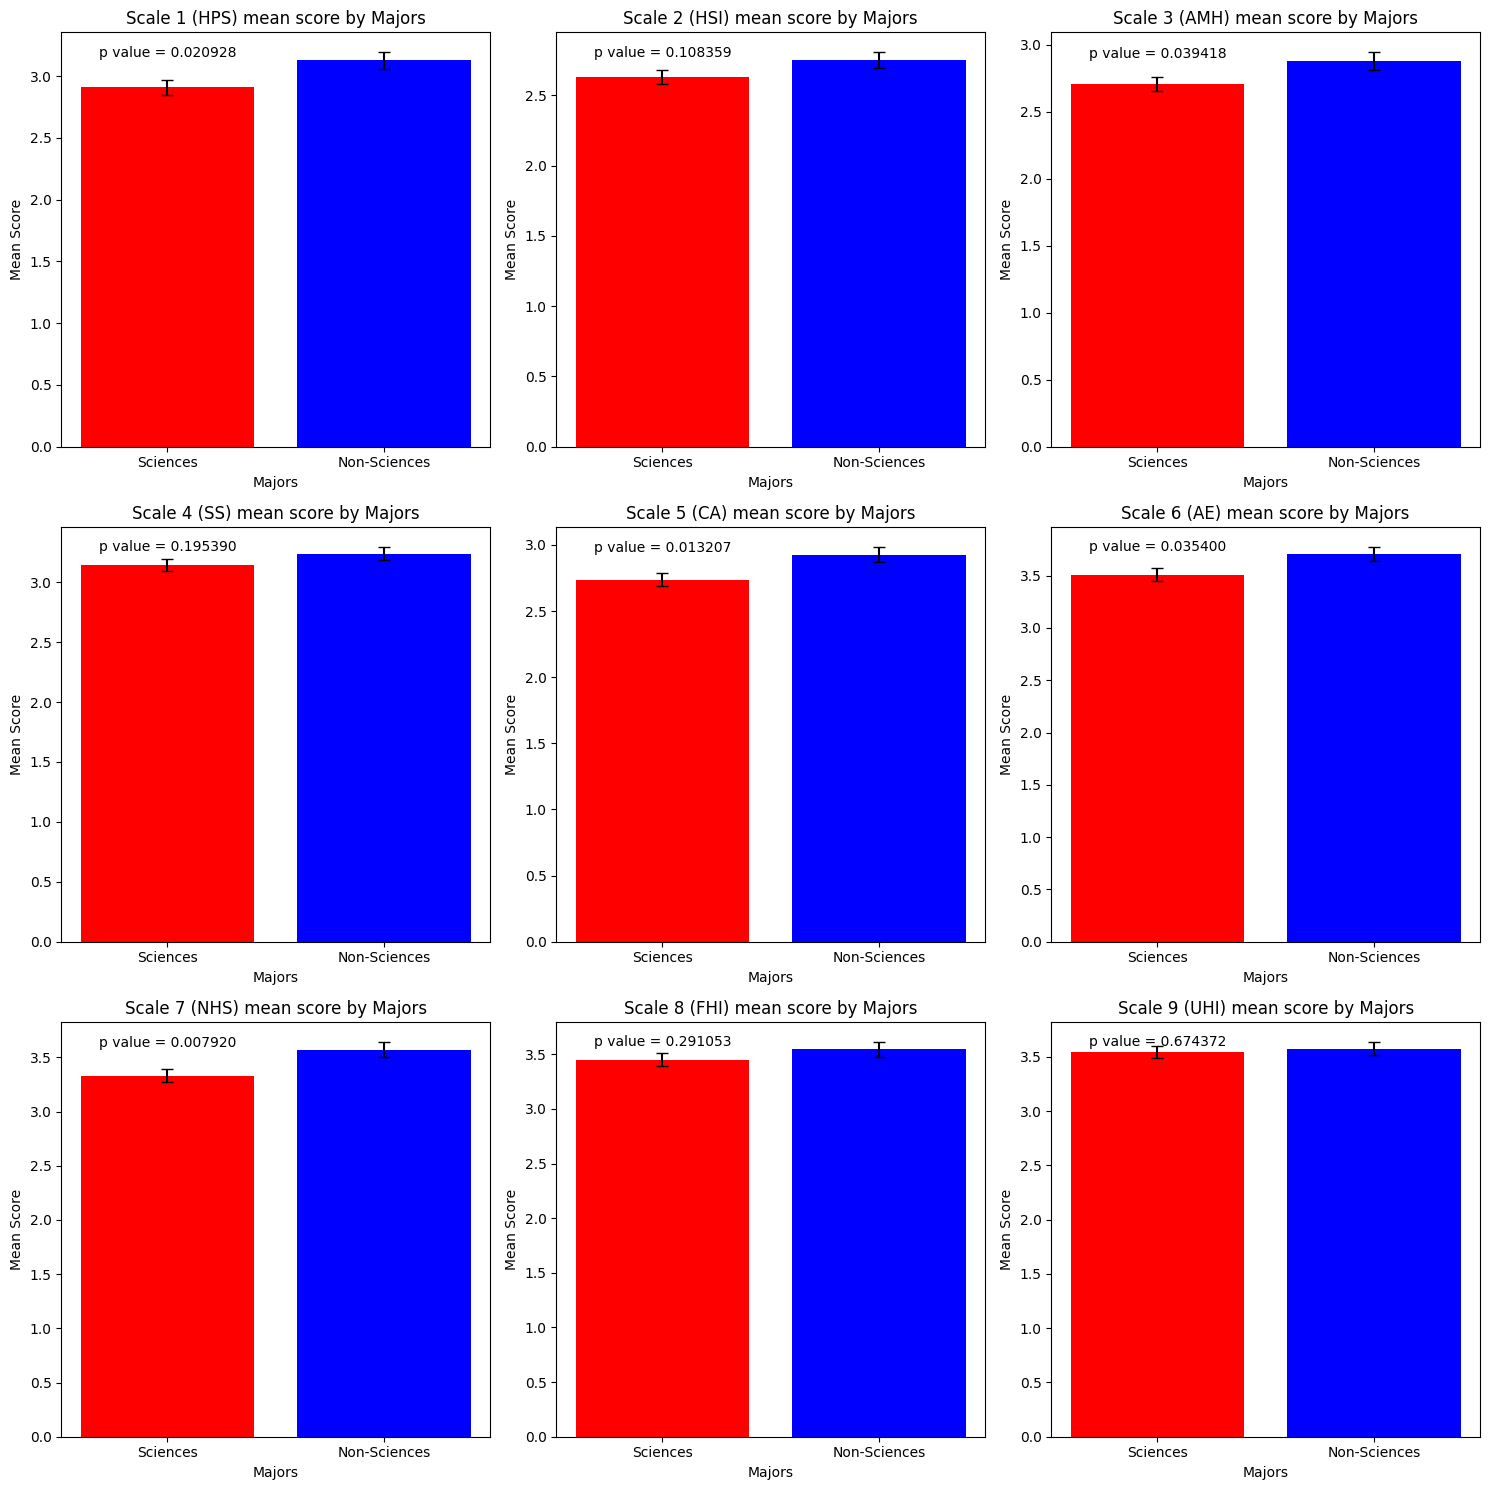

In [ ]:
import matplotlib.pyplot as plt

Sciences = final.query('`major` == 1.0 or `major` == 2.0 or `major` == 3.0 or `major` == 6.0 or `major` == 10.0 or `major` == 11.0 or `major` == 12.0 or `major` == 16.0 ')
Non_Sciences = final.query('`major` == 4.0 or `major` == 5.0 or `major` == 7.0 or `major` == 13.0 or `major` == 14.0 or `major` == 15.0 or `major` == 17.0 or `major` == 8.0 or `major` == 9.0')


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot
sci = Sciences['Scale 1 (HPS) mean score'].mean()
non_sci = Non_Sciences['Scale 1 (HPS) mean score'].mean()
Sciences['Scale 1 (HPS) mean score'] = pd.to_numeric(Sciences['Scale 1 (HPS) mean score'], errors='coerce')
Non_Sciences['Scale 1 (HPS) mean score'] = pd.to_numeric(Non_Sciences['Scale 1 (HPS) mean score'], errors='coerce')
sci_sem  = Sciences['Scale 1 (HPS) mean score'].sem()
non_sci_sem = Non_Sciences['Scale 1 (HPS) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci,non_sci]
colours = ['red','blue']
Scale_1_Pvalue_S = Sciences['Scale 1 (HPS) mean score']
Scale_1_array_S = np.array(Scale_1_Pvalue_S)
Scale_1_Pvalue_NS = Non_Sciences['Scale 1 (HPS) mean score']
Scale_1_array_NS = np.array(Scale_1_Pvalue_NS)
result1 =  stats.ttest_ind(Scale_1_array_S, Scale_1_array_NS)
pvalue1 = result1.pvalue
axs[0][0].bar(x, y , yerr = [sci_sem, non_sci_sem],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {pvalue1:.6f}', ha='center', va='bottom')
axs[0][0].set_xlabel('Majors')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Majors')



#Plot 2

sci2= Sciences['Scale 2 (HSI) mean score'].mean()
non_sci2= Non_Sciences['Scale 2 (HSI) mean score'].mean()
Sciences['Scale 2 (HSI) mean score'] = pd.to_numeric(Sciences['Scale 2 (HSI) mean score'], errors='coerce')
Non_Sciences['Scale 2 (HSI) mean score'] = pd.to_numeric(Non_Sciences['Scale 2 (HSI) mean score'], errors='coerce')
sci_sem2  = Sciences['Scale 2 (HSI) mean score'].sem()
non_sci_sem2 = Non_Sciences['Scale 2 (HSI) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci2,non_sci2]
colours = ['red','blue']
Scale_2_Pvalue_S = Sciences['Scale 2 (HSI) mean score']
Scale_2_array_S = np.array(Scale_2_Pvalue_S)
Scale_2_Pvalue_NS = Non_Sciences['Scale 2 (HSI) mean score']
Scale_2_array_NS = np.array(Scale_2_Pvalue_NS)
result2 =  stats.ttest_ind(Scale_2_array_S, Scale_2_array_NS)
pvalue2 = result2.pvalue
axs[0][1].bar(x, y , yerr = [sci_sem2, non_sci_sem2],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {pvalue2:.6f}', ha='center', va='bottom')
axs[0][1].set_xlabel('Majors')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Majors')

#Plot 3

sci3 = Sciences['Scale 3 (AMH) mean score'].mean()
non_sci3= Non_Sciences['Scale 3 (AMH) mean score'].mean()
Sciences['Scale 3 (AMH) mean score'] = pd.to_numeric(Sciences['Scale 3 (AMH) mean score'], errors='coerce')
Non_Sciences['Sc3ale 3 (AMH) mean score'] = pd.to_numeric(Non_Sciences['Scale 3 (AMH) mean score'], errors='coerce')
sci_sem3  = Sciences['Scale 3 (AMH) mean score'].sem()
non_sci_sem3 = Non_Sciences['Scale 3 (AMH) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci3,non_sci3]
colours = ['red','blue']
Scale_3_Pvalue_S = Sciences['Scale 3 (AMH) mean score']
Scale_3_array_S = np.array(Scale_3_Pvalue_S)
Scale_3_Pvalue_NS = Non_Sciences['Scale 3 (AMH) mean score']
Scale_3_array_NS = np.array(Scale_3_Pvalue_NS)
result3 =  stats.ttest_ind(Scale_3_array_S, Scale_3_array_NS)
pvalue3 = result3.pvalue
axs[0][2].bar(x, y , yerr = [sci_sem3, non_sci_sem3],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {pvalue3:.6f}', ha='center', va='bottom')
axs[0][2].set_xlabel('Majors')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Majors')

#Plot 4

sci4 = Sciences['Scale 4 (SS) mean score'].mean()
non_sci4 = Non_Sciences['Scale 4 (SS) mean score'].mean()
Sciences['Scale 4 (SS) mean score'] = pd.to_numeric(Sciences['Scale 4 (SS) mean score'], errors='coerce')
Non_Sciences['Sc3ale 4 (SS) mean score'] = pd.to_numeric(Non_Sciences['Scale 4 (SS) mean score'], errors='coerce')
sci_sem4  = Sciences['Scale 4 (SS) mean score'].sem()
non_sci_sem4 = Non_Sciences['Scale 4 (SS) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci4,non_sci4]
colours = ['red','blue']
Scale_4_Pvalue_S = Sciences['Scale 4 (SS) mean score']
Scale_4_array_S = np.array(Scale_4_Pvalue_S)
Scale_4_Pvalue_NS = Non_Sciences['Scale 4 (SS) mean score']
Scale_4_array_NS = np.array(Scale_4_Pvalue_NS)
result4 =  stats.ttest_ind(Scale_4_array_S, Scale_4_array_NS)
pvalue4 = result4.pvalue
axs[1][0].bar(x, y , yerr = [sci_sem4, non_sci_sem4],capsize = 4,color = colours)
axs[1][0].text(0, max(y), f'p value = {pvalue4:.6f}', ha='center', va='bottom')
axs[1][0].set_xlabel('Majors')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Majors')

#Plot 5

sci5 = Sciences['Scale 5 (CA) mean score'].mean()
non_sci5 = Non_Sciences['Scale 5 (CA) mean score'].mean()
Sciences['Scale 5 (CA) mean score'] = pd.to_numeric(Sciences['Scale 5 (CA) mean score'], errors='coerce')
Non_Sciences['Scale 5 (CA) mean score'] = pd.to_numeric(Non_Sciences['Scale 5 (CA) mean score'], errors='coerce')
sci_sem5  = Sciences['Scale 5 (CA) mean score'].sem()
non_sci_sem5 = Non_Sciences['Scale 5 (CA) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci5,non_sci5]
colours = ['red','blue']
Scale_5_Pvalue_S = Sciences['Scale 5 (CA) mean score']
Scale_5_array_S = np.array(Scale_5_Pvalue_S)
Scale_5_Pvalue_NS = Non_Sciences['Scale 5 (CA) mean score']
Scale_5_array_NS = np.array(Scale_5_Pvalue_NS)

result5 =  stats.ttest_ind(Scale_5_array_S, Scale_5_array_NS)
pvalue5 = result5.pvalue
axs[1][1].bar(x, y , yerr = [sci_sem5, non_sci_sem5],capsize = 4,color = colours)
axs[1][1].text(0, max(y), f'p value = {pvalue5:.6f}', ha='center', va='bottom')
axs[1][1].set_xlabel('Majors')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Majors')


#Plot 6

sci6 = Sciences['Scale 6 (AE) mean score'].mean()
non_sci6 = Non_Sciences['Scale 6 (AE) mean score'].mean()
Sciences['Scale 6 (AE) mean score'] = pd.to_numeric(Sciences['Scale 6 (AE) mean score'], errors='coerce')
Non_Sciences['Scale 6 (AE) mean score'] = pd.to_numeric(Non_Sciences['Scale 6 (AE) mean score'], errors='coerce')
sci_sem6  = Sciences['Scale 6 (AE) mean score'].sem()
non_sci_sem6 = Non_Sciences['Scale 6 (AE) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci6,non_sci6]
colours = ['red','blue']
Scale_6_Pvalue_S = Sciences['Scale 6 (AE) mean score']
Scale_6_array_S = np.array(Scale_6_Pvalue_S)
Scale_6_Pvalue_NS = Non_Sciences['Scale 6 (AE) mean score']
Scale_6_array_NS = np.array(Scale_6_Pvalue_NS)

result6 =  stats.ttest_ind(Scale_6_array_S, Scale_6_array_NS)
pvalue6 = result6.pvalue
axs[1][2].bar(x, y , yerr = [sci_sem6, non_sci_sem6],capsize = 4,color = colours)
axs[1][2].text(0, max(y), f'p value = {pvalue6:.6f}', ha='center', va='bottom')
axs[1][2].set_xlabel('Majors')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Majors')


#Plot 7
sci7 = Sciences['Scale 7 (NHS) mean score'].mean()
non_sci7 = Non_Sciences['Scale 7 (NHS) mean score'].mean()
Sciences['Scale 7 (NHS) mean score'] = pd.to_numeric(Sciences['Scale 7 (NHS) mean score'], errors='coerce')
Non_Sciences['Scale 7 (NHS) mean score'] = pd.to_numeric(Non_Sciences['Scale 7 (NHS) mean score'], errors='coerce')
sci_sem7  = Sciences['Scale 7 (NHS) mean score'].sem()
non_sci_sem7 = Non_Sciences['Scale 7 (NHS) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci7,non_sci7]
colours = ['red','blue']
Scale_7_Pvalue_S = Sciences['Scale 7 (NHS) mean score']
Scale_7_array_S = np.array(Scale_7_Pvalue_S)
Scale_7_Pvalue_NS = Non_Sciences['Scale 7 (NHS) mean score']
Scale_7_array_NS = np.array(Scale_7_Pvalue_NS)

result7 =  stats.ttest_ind(Scale_7_array_S, Scale_7_array_NS)
pvalue7 = result7.pvalue
axs[2][0].bar(x, y , yerr = [sci_sem7, non_sci_sem7],capsize = 4,color = colours)
axs[2][0].text(0, max(y), f'p value = {pvalue7:.6f}', ha='center', va='bottom')
axs[2][0].set_xlabel('Majors')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Majors')

#Plot 8
sci8 = Sciences['Scale 8 (FHI) mean score'].mean()
non_sci8 = Non_Sciences['Scale 8 (FHI) mean score'].mean()
Sciences['Scale 8 (FHI) mean score'] = pd.to_numeric(Sciences['Scale 8 (FHI) mean score'], errors='coerce')
Non_Sciences['Scale 8 (FHI) mean score'] = pd.to_numeric(Non_Sciences['Scale 8 (FHI) mean score'], errors='coerce')
sci_sem8  = Sciences['Scale 8 (FHI) mean score'].sem()
non_sci_sem8 = Non_Sciences['Scale 8 (FHI) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci8,non_sci8]
colours = ['red','blue']
Scale_8_Pvalue_S = Sciences['Scale 8 (FHI) mean score']
Scale_8_array_S = np.array(Scale_8_Pvalue_S)
Scale_8_Pvalue_NS = Non_Sciences['Scale 8 (FHI) mean score']
Scale_8_array_NS = np.array(Scale_8_Pvalue_NS)

result8 =  stats.ttest_ind(Scale_8_array_S, Scale_8_array_NS)
pvalue8 = result8.pvalue
axs[2][1].bar(x, y , yerr = [sci_sem8, non_sci_sem8],capsize = 4,color = colours)
axs[2][1].text(0, max(y), f'p value = {pvalue8:.6f}', ha='center', va='bottom')
axs[2][1].set_xlabel('Majors')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Majors')

#Plot 9

sci9 = Sciences['Scale 9 (UHI) mean score'].mean()
non_sci9 = Non_Sciences['Scale 9 (UHI) mean score'].mean()
Sciences['Scale 9 (UHI) mean score'] = pd.to_numeric(Sciences['Scale 9 (UHI) mean score'], errors='coerce')
Non_Sciences['Scale 9 (UHI) mean score'] = pd.to_numeric(Non_Sciences['Scale 9 (UHI) mean score'], errors='coerce')
sci_sem9  = Sciences['Scale 9 (UHI) mean score'].sem()
non_sci_sem9 = Non_Sciences['Scale 9 (UHI) mean score'].sem()
x = ['Sciences' , 'Non-Sciences']
y = [sci9,non_sci9]
colours = ['red','blue']
Scale_9_Pvalue_S = Sciences['Scale 9 (UHI) mean score']
Scale_9_array_S = np.array(Scale_9_Pvalue_S)
Scale_9_Pvalue_NS = Non_Sciences['Scale 9 (UHI) mean score']
Scale_9_array_NS = np.array(Scale_9_Pvalue_NS)

result9 =  stats.ttest_ind(Scale_9_array_S, Scale_9_array_NS)
pvalue9 = result9.pvalue
axs[2][2].bar(x, y , yerr = [sci_sem9, non_sci_sem9],capsize = 4,color = colours)
axs[2][2].text(0, max(y), f'p value = {pvalue9:.6f}', ha='center', va='bottom')
axs[2][2].set_xlabel('Majors')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Majors')


print(f"The value of Scale 1 (HPS) P Value (T-Test) are = {pvalue1}.")
print(f"The value of Scale 2 (HSI) P Value (T-Test) are = {pvalue2}.")
print(f"The value of Scale 3 (AMH) P Value (T-Test) are = {pvalue3}.")
print(f"The value of Scale 4 (SS) P Value (T-Test) are = {pvalue4}.")
print(f"The value of Scale 5 (CA) P Value (T-Test) are = {pvalue5}.")
print(f"The value of Scale 6 (AE) P Value (T-Test) are = {pvalue6}.")
print(f"The value of Scale 7 (NHS) P Value (T-Test) are = {pvalue7}.")
print(f"The value of Scale 8 (FHI) P Value (T-Test) are = {pvalue8}.")
print(f"The value of Scale 9 (UHI) P Value (T-Test) are = {pvalue9}.")


plt.tight_layout()
plt.show()

In [ ]:
Majors = final.copy()

mask = final['major'].isin([1.0, 2.0, 3.0, 6.0, 10.0, 11.0, 12.0, 16.0])


Majors['major'] = mask.replace({True: 1.0, False: 2.0})

Majors.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
Majors.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
Majors.rename(columns = {'family income':'family_income'}, inplace = True)

Majors['Scale1_Mean'] = Majors['Scale1_Mean'].astype(float)
Majors['Scale2_Mean'] = Majors['Scale2_Mean'].astype(float)
Majors['Scale3_Mean'] = Majors['Scale3_Mean'].astype(float)
Majors['Scale4_Mean'] = Majors['Scale4_Mean'].astype(float)
Majors['Scale5_Mean'] = Majors['Scale5_Mean'].astype(float)
Majors['Scale6_Mean'] = Majors['Scale6_Mean'].astype(float)
Majors['Scale7_Mean'] = Majors['Scale7_Mean'].astype(float)
Majors['Scale8_Mean'] = Majors['Scale8_Mean'].astype(float)
Majors['Scale9_Mean'] = Majors['Scale9_Mean'].astype(float)
Majors['major'].replace("na", np.nan, inplace=True)

#Manual Override to change the particular columns to NaN as they were before
Majors.loc[final['ID'] == 8, 'major'] = np.nan
Majors.loc[final['ID'] == 10, 'major']  = np.nan
Majors.loc[final['ID'] == 16, 'major']  = np.nan
Majors.loc[final['ID'] == 19, 'major']  = np.nan
Majors.loc[final['ID'] == 26, 'major']  = np.nan

manova_majors = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ major', data=Majors)

result_majors= manova_majors.mv_test()
print(result_majors.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1267 9.0000 185.0000 141.6522 0.0000
         Pillai's trace 0.8733 9.0000 185.0000 141.6522 0.0000
 Hotelling-Lawley trace 6.8912 9.0000 185.0000 141.6522 0.0000
    Roy's greatest root 6.8912 9.0000 185.0000 141.6522 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          major          Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9213 9.0000 185.0000  1.7557 0.0794
          Pillai's trace 0.0787 9.0000 185.0000  1.7557 0.0794
  Hotelling

In [ ]:
mj_scale_1 = ols('Scale1_Mean ~ major', data=Majors).fit()
mj_table1 = anova_lm(mj_scale_1)
mj_table1

df     sum_sq   mean_sq         F    PR(>F)
major       1.0   2.266051  2.266051  5.421367  0.020928
Residual  193.0  80.671129  0.417985       NaN       NaN

In [ ]:
mj_scale_2 = ols('Scale2_Mean ~ major', data=Majors).fit()
mj_table2 = anova_lm(mj_scale_2)
mj_table2

df     sum_sq   mean_sq        F    PR(>F)
major       1.0   0.692617  0.692617  2.60206  0.108359
Residual  193.0  51.372768  0.266180      NaN       NaN

In [ ]:
mj_scale_3 = ols('Scale3_Mean ~ major', data=Majors).fit()
mj_table3 = anova_lm(mj_scale_3)
mj_table3

df     sum_sq   mean_sq         F    PR(>F)
major       1.0   1.406247  1.406247  4.300974  0.039418
Residual  193.0  63.103292  0.326960       NaN       NaN

In [ ]:
mj_scale_4 = ols('Scale4_Mean ~ major', data=Majors).fit()
mj_table4 = anova_lm(mj_scale_4)
mj_table4

df     sum_sq   mean_sq         F   PR(>F)
major       1.0   0.436575  0.436575  1.688187  0.19539
Residual  193.0  49.910912  0.258606       NaN      NaN

In [ ]:
mj_scale_5 = ols('Scale5_Mean ~ major', data=Majors).fit()
mj_table5 = anova_lm(mj_scale_5)
mj_table5

df     sum_sq   mean_sq         F    PR(>F)
major       1.0   1.716687  1.716687  6.256349  0.013207
Residual  193.0  52.957493  0.274391       NaN       NaN

In [ ]:
mj_scale_6 = ols('Scale6_Mean ~ major', data=Majors).fit()
mj_table6 = anova_lm(mj_scale_6)
mj_table6

df     sum_sq   mean_sq        F  PR(>F)
major       1.0   1.826807  1.826807  4.48866  0.0354
Residual  193.0  78.547680  0.406983      NaN     NaN

In [ ]:
mj_scale_7 = ols('Scale7_Mean ~ major', data=Majors).fit()
mj_table7 = anova_lm(mj_scale_7)
mj_table7

df     sum_sq   mean_sq        F   PR(>F)
major       1.0   2.790283  2.790283  7.20073  0.00792
Residual  193.0  74.787495  0.387500      NaN      NaN

In [ ]:
mj_scale_8 = ols('Scale8_Mean ~ major', data=Majors).fit()
mj_table8 = anova_lm(mj_scale_8)
mj_table8

df     sum_sq   mean_sq         F    PR(>F)
major       1.0   0.426427  0.426427  1.120876  0.291053
Residual  193.0  73.425060  0.380441       NaN       NaN

In [ ]:
mj_scale_9 = ols('Scale9_Mean ~ major', data=Majors).fit()
mj_table9 = anova_lm(mj_scale_9)
mj_table9

df     sum_sq   mean_sq        F    PR(>F)
major       1.0   0.057839  0.057839  0.17707  0.674372
Residual  193.0  63.042879  0.326647      NaN       NaN

In [ ]:
Majors.to_csv("Majors.csv", index = False)

Text(0.5, 1.0, 'Scale 9 (UHI) mean score by Year of Study')

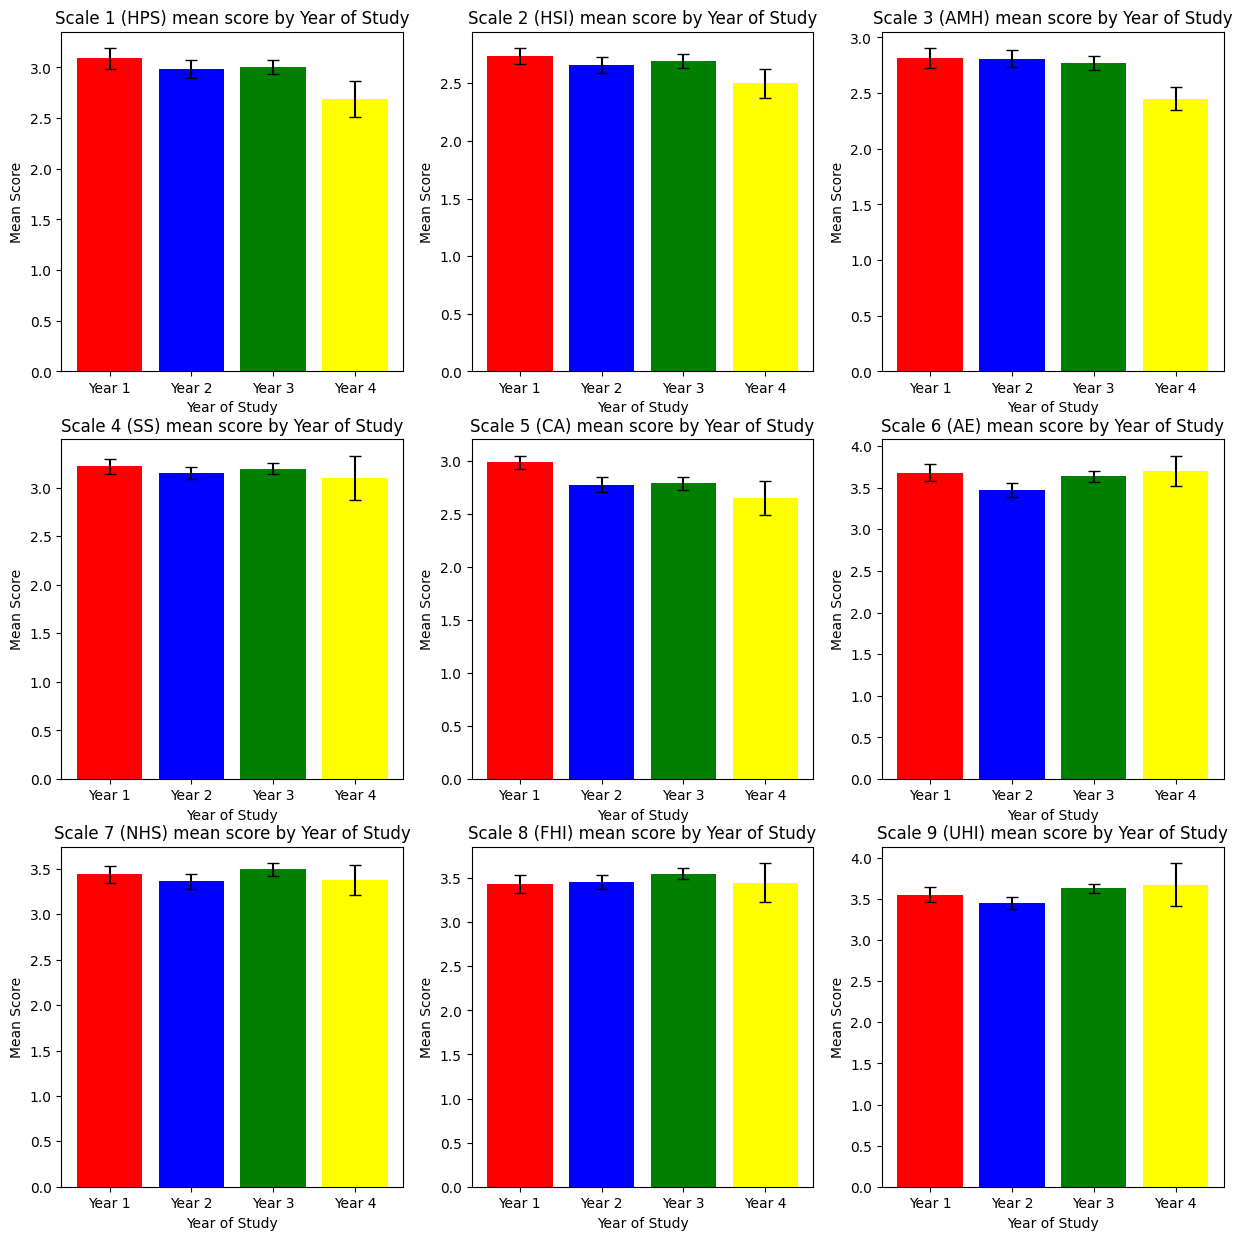

In [ ]:
final = final.dropna(subset=['year'])

year1 = final.query('year == 1.0')
year2 = final.query('year == 2.0')
year3 = final.query('year == 3.0')
year4 = final.query('year == 4.0')

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot
Year1_1 = year1['Scale 1 (HPS) mean score'].mean()
Year2_1 = year2['Scale 1 (HPS) mean score'].mean()
Year3_1 = year3['Scale 1 (HPS) mean score'].mean()
Year4_1 = year4['Scale 1 (HPS) mean score'].mean()

year1_sem_1  = year1['Scale 1 (HPS) mean score'].sem()
year2_sem_1  = year2['Scale 1 (HPS) mean score'].sem()
year3_sem_1  = year3['Scale 1 (HPS) mean score'].sem()
year4_sem_1  = year4['Scale 1 (HPS) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_1,Year2_1,Year3_1,Year4_1]

colours = ['red','blue','green','yellow']

axs[0][0].bar(x, y , yerr = [year1_sem_1, year2_sem_1,year3_sem_1,year4_sem_1],capsize = 4,color = colours)
axs[0][0].set_xlabel('Year of Study')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Year of Study')

#Plot 2

Year1_2 = year1['Scale 2 (HSI) mean score'].mean()
Year2_2 = year2['Scale 2 (HSI) mean score'].mean()
Year3_2 = year3['Scale 2 (HSI) mean score'].mean()
Year4_2 = year4['Scale 2 (HSI) mean score'].mean()

year1_sem_2  = year1['Scale 2 (HSI) mean score'].sem()
year2_sem_2 = year2['Scale 2 (HSI) mean score'].sem()
year3_sem_2  = year3['Scale 2 (HSI) mean score'].sem()
year4_sem_2  = year4['Scale 2 (HSI) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_2,Year2_2,Year3_2,Year4_2]

colours = ['red','blue','green','yellow']

axs[0][1].bar(x, y , yerr = [year1_sem_2, year2_sem_2,year3_sem_2,year4_sem_2],capsize = 4,color = colours)
axs[0][1].set_xlabel('Year of Study')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Year of Study')


#Plot 3

Year1_3 = year1['Scale 3 (AMH) mean score'].mean()
Year2_3 = year2['Scale 3 (AMH) mean score'].mean()
Year3_3 = year3['Scale 3 (AMH) mean score'].mean()
Year4_3 = year4['Scale 3 (AMH) mean score'].mean()

year1_sem_3  = year1['Scale 3 (AMH) mean score'].sem()
year2_sem_3 = year2['Scale 3 (AMH) mean score'].sem()
year3_sem_3  = year3['Scale 3 (AMH) mean score'].sem()
year4_sem_3  = year4['Scale 3 (AMH) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_3,Year2_3,Year3_3,Year4_3]

colours = ['red','blue','green','yellow']

axs[0][2].bar(x, y , yerr = [year1_sem_3, year2_sem_3,year3_sem_3,year4_sem_3],capsize = 4,color = colours)
axs[0][2].set_xlabel('Year of Study')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Year of Study')

#Plot 4

Year1_4 = year1['Scale 4 (SS) mean score'].mean()
Year2_4 = year2['Scale 4 (SS) mean score'].mean()
Year3_4 = year3['Scale 4 (SS) mean score'].mean()
Year4_4 = year4['Scale 4 (SS) mean score'].mean()

year1_sem_4  = year1['Scale 4 (SS) mean score'].sem()
year2_sem_4 = year2['Scale 4 (SS) mean score'].sem()
year3_sem_4  = year3['Scale 4 (SS) mean score'].sem()
year4_sem_4  = year4['Scale 4 (SS) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_4,Year2_4,Year3_4,Year4_4]

colours = ['red','blue','green','yellow']

axs[1][0].bar(x, y , yerr = [year1_sem_4, year2_sem_4,year3_sem_4,year4_sem_4],capsize = 4,color = colours)
axs[1][0].set_xlabel('Year of Study')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Year of Study')

#Plot 5

Year1_5 = year1['Scale 5 (CA) mean score'].mean()
Year2_5 = year2['Scale 5 (CA) mean score'].mean()
Year3_5 = year3['Scale 5 (CA) mean score'].mean()
Year4_5 = year4['Scale 5 (CA) mean score'].mean()

year1_sem_5  = year1['Scale 5 (CA) mean score'].sem()
year2_sem_5 = year2['Scale 5 (CA) mean score'].sem()
year3_sem_5  = year3['Scale 5 (CA) mean score'].sem()
year4_sem_5  = year4['Scale 5 (CA) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_5,Year2_5,Year3_5,Year4_5]

colours = ['red','blue','green','yellow']

axs[1][1].bar(x, y , yerr = [year1_sem_5, year2_sem_5,year3_sem_5,year4_sem_5],capsize = 4,color = colours)
axs[1][1].set_xlabel('Year of Study')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Year of Study')

#Plot 6

Year1_6 = year1['Scale 6 (AE) mean score'].mean()
Year2_6 = year2['Scale 6 (AE) mean score'].mean()
Year3_6 = year3['Scale 6 (AE) mean score'].mean()
Year4_6 = year4['Scale 6 (AE) mean score'].mean()

year1_sem_6  = year1['Scale 6 (AE) mean score'].sem()
year2_sem_6 = year2['Scale 6 (AE) mean score'].sem()
year3_sem_6  = year3['Scale 6 (AE) mean score'].sem()
year4_sem_6  = year4['Scale 6 (AE) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_6,Year2_6,Year3_6,Year4_6]

colours = ['red','blue','green','yellow']

axs[1][2].bar(x, y , yerr = [year1_sem_6, year2_sem_6,year3_sem_6,year4_sem_6],capsize = 4,color = colours)
axs[1][2].set_xlabel('Year of Study')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Year of Study')

#Plot 7

Year1_7 = year1['Scale 7 (NHS) mean score'].mean()
Year2_7 = year2['Scale 7 (NHS) mean score'].mean()
Year3_7 = year3['Scale 7 (NHS) mean score'].mean()
Year4_7 = year4['Scale 7 (NHS) mean score'].mean()

year1_sem_7  = year1['Scale 7 (NHS) mean score'].sem()
year2_sem_7 = year2['Scale 7 (NHS) mean score'].sem()
year3_sem_7  = year3['Scale 7 (NHS) mean score'].sem()
year4_sem_7  = year4['Scale 7 (NHS) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_7,Year2_7,Year3_7,Year4_7]

colours = ['red','blue','green','yellow']

axs[2][0].bar(x, y , yerr = [year1_sem_7, year2_sem_7,year3_sem_7,year4_sem_7],capsize = 4,color = colours)
axs[2][0].set_xlabel('Year of Study')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Year of Study')

#Plot 8

Year1_8 = year1['Scale 8 (FHI) mean score'].mean()
Year2_8 = year2['Scale 8 (FHI) mean score'].mean()
Year3_8 = year3['Scale 8 (FHI) mean score'].mean()
Year4_8 = year4['Scale 8 (FHI) mean score'].mean()

year1_sem_8  = year1['Scale 8 (FHI) mean score'].sem()
year2_sem_8 = year2['Scale 8 (FHI) mean score'].sem()
year3_sem_8  = year3['Scale 8 (FHI) mean score'].sem()
year4_sem_8  = year4['Scale 8 (FHI) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_8,Year2_8,Year3_8,Year4_8]

colours = ['red','blue','green','yellow']

axs[2][1].bar(x, y , yerr = [year1_sem_8, year2_sem_8,year3_sem_8,year4_sem_8],capsize = 4,color = colours)
axs[2][1].set_xlabel('Year of Study')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Year of Study')

#Plot 9

Year1_9 = year1['Scale 9 (UHI) mean score'].mean()
Year2_9 = year2['Scale 9 (UHI) mean score'].mean()
Year3_9 = year3['Scale 9 (UHI) mean score'].mean()
Year4_9 = year4['Scale 9 (UHI) mean score'].mean()

year1_sem_9  = year1['Scale 9 (UHI) mean score'].sem()
year2_sem_9 = year2['Scale 9 (UHI) mean score'].sem()
year3_sem_9  = year3['Scale 9 (UHI) mean score'].sem()
year4_sem_9  = year4['Scale 9 (UHI) mean score'].sem()


x = ['Year 1' , 'Year 2' , 'Year 3' ,'Year 4']
y = [Year1_9,Year2_9,Year3_9,Year4_9]

colours = ['red','blue','green','yellow']

axs[2][2].bar(x, y , yerr = [year1_sem_9, year2_sem_9,year3_sem_9,year4_sem_9],capsize = 4,color = colours)
axs[2][2].set_xlabel('Year of Study')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Year of Study')




In [ ]:
Years = final.copy()

Years.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
Years.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
Years.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
Years.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
Years.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
Years.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
Years.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
Years.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
Years.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
Years.rename(columns = {'family income':'family_income'}, inplace = True)
Years['Scale1_Mean'] = Years['Scale1_Mean'].astype(float)
Years['Scale2_Mean'] = Years['Scale2_Mean'].astype(float)
Years['Scale3_Mean'] = Years['Scale3_Mean'].astype(float)
Years['Scale4_Mean'] = Years['Scale4_Mean'].astype(float)
Years['Scale5_Mean'] = Years['Scale5_Mean'].astype(float)
Years['Scale6_Mean'] = Years['Scale6_Mean'].astype(float)
Years['Scale7_Mean'] = Years['Scale7_Mean'].astype(float)
Years['Scale8_Mean'] = Years['Scale8_Mean'].astype(float)
Years['Scale9_Mean'] = Years['Scale9_Mean'].astype(float)

Years['year'].replace("na", np.nan, inplace=True)


manova_years = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ year', data=Years)

result_years = manova_years.mv_test()
print(result_years.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1082 9.0000 186.0000 170.3315 0.0000
         Pillai's trace 0.8918 9.0000 186.0000 170.3315 0.0000
 Hotelling-Lawley trace 8.2418 9.0000 186.0000 170.3315 0.0000
    Roy's greatest root 8.2418 9.0000 186.0000 170.3315 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           year          Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9355 9.0000 186.0000  1.4260 0.1795
          Pillai's trace 0.0645 9.0000 186.0000  1.4260 0.1795
  Hotelling

In [ ]:
y_scale_1 = ols('Scale1_Mean ~ year', data=Years).fit()
y_table1 = anova_lm(y_scale_1)
y_table1

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   0.538670  0.538670  1.267305  0.261664
Residual  194.0  82.460054  0.425052       NaN       NaN

In [ ]:
y_scale_2 = ols('Scale2_Mean ~ year', data=Years).fit()
y_table2 = anova_lm(y_scale_2)
y_table2

df     sum_sq   mean_sq         F  PR(>F)
year        1.0   0.124232  0.124232  0.461143  0.4979
Residual  194.0  52.263523  0.269400       NaN     NaN

In [ ]:
y_scale_3 = ols('Scale3_Mean ~ year', data=Years).fit()
y_table3 = anova_lm(y_scale_3)
y_table3

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   0.411349  0.411349  1.244984  0.265893
Residual  194.0  64.098651  0.330405       NaN       NaN

In [ ]:
y_scale_4 = ols('Scale4_Mean ~ year', data=Years).fit()
y_table4 = anova_lm(y_scale_4)
y_table4

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   0.021674  0.021674  0.083309  0.773171
Residual  194.0  50.472203  0.260166       NaN       NaN

In [ ]:
y_scale_5 = ols('Scale5_Mean ~ year', data=Years).fit()
y_table5 = anova_lm(y_scale_5)
y_table5

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   1.052681  1.052681  3.806229  0.052502
Residual  194.0  53.654194  0.276568       NaN       NaN

In [ ]:
y_scale_6 = ols('Scale6_Mean ~ year', data=Years).fit()
y_table6 = anova_lm(y_scale_6)
y_table6

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   0.024097  0.024097  0.058153  0.809694
Residual  194.0  80.387676  0.414369       NaN       NaN

In [ ]:
y_scale_7 = ols('Scale7_Mean ~ year', data=Years).fit()
y_table7 = anova_lm(y_scale_7)
y_table7

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   0.103877  0.103877  0.259933  0.610746
Residual  194.0  77.528068  0.399629       NaN       NaN

In [ ]:
y_scale_8 = ols('Scale8_Mean ~ year', data=Years).fit()
y_table8 = anova_lm(y_scale_8)
y_table8

df     sum_sq   mean_sq         F   PR(>F)
year        1.0   0.320774  0.320774  0.845218  0.35905
Residual  194.0  73.626165  0.379516       NaN      NaN

In [ ]:
y_scale_9 = ols('Scale9_Mean ~ year', data=Years).fit()
y_table9 = anova_lm(y_scale_9)
y_table9

df     sum_sq   mean_sq         F    PR(>F)
year        1.0   0.470904  0.470904  1.457277  0.228834
Residual  194.0  62.689096  0.323140       NaN       NaN

In [ ]:
Years.to_csv('Year_of_Study.csv', index = False)

In [ ]:
illness = df2.copy()
illness.rename(columns = {'illness/disability, yes or no':'illness'}, inplace = True)
illness['illness'] = illness['illness'].apply(lambda x: 1 if x != 0 else 0)
illness.loc[illness['ID'] == 59, 'illness'] = 0
illness.loc[illness['ID'] == 66, 'illness'] = 0
illness.loc[illness['ID'] == 95, 'illness'] = 0
illness.loc[illness['ID'] == 152, 'illness'] = 0
illness.loc[illness['ID'] == 178  , 'illness'] = 0

The value of Scale 1 (HPS) P Value (T-Test) are = 0.049681229816008685.
The value of Scale 2 (HSI) P Value (T-Test) are = 0.42966923653082867.
The value of Scale 3 (AMH) P Value (T-Test) are = 0.782604429814282.
The value of Scale 4 (SS) P Value (T-Test) are = 0.8675518325388152.
The value of Scale 5 (CA) P Value (T-Test) are = 0.10009318578491246.
The value of Scale 6 (AE) P Value (T-Test) are = 0.9119696586634136.
The value of Scale 7 (NHS) P Value (T-Test) are = 0.73277224267925.
The value of Scale 8 (FHI) P Value (T-Test) are = 0.16838912885356389.
The value of Scale 9 (UHI) P Value (T-Test) are = 0.18947194135666354.


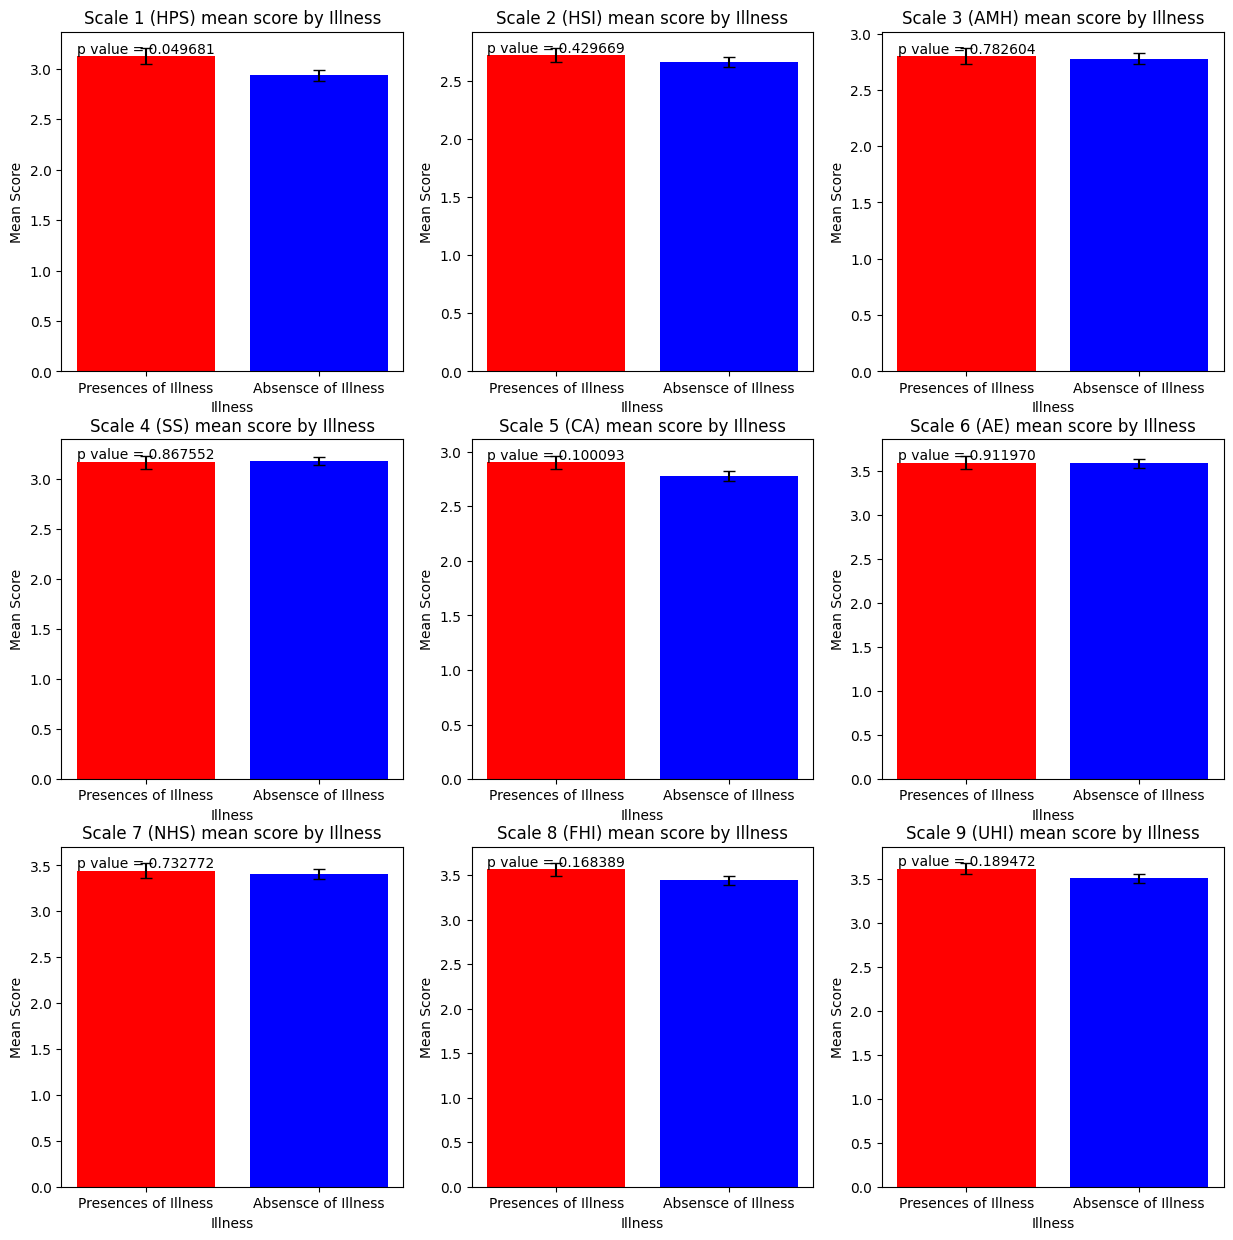

In [ ]:
yi = illness.query('illness == 1.0')
ni = illness.query('illness == 0.0')

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#Plot 1
yesi_1 = yi['Scale1_Mean'].mean()
noi_1 = ni['Scale1_Mean'].mean()

yesi_sem1  = yi['Scale1_Mean'].sem()
noni_sem1 = ni['Scale1_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_1,noi_1]
colours = ['red','blue']
Scale_1_Pvalue_i = yi['Scale1_Mean']
Scale_1_array_i = np.array(Scale_1_Pvalue_i)
Scale_1_Pvalue_Ni = ni['Scale1_Mean']
Scale_1_array_Ni = np.array(Scale_1_Pvalue_Ni)

result1 =  stats.ttest_ind(Scale_1_array_i, Scale_1_array_Ni)
pvalue1 = result1.pvalue
axs[0][0].bar(x, y , yerr = [yesi_sem1, noni_sem1],capsize = 4,color = colours)
axs[0][0].text(0, max(y), f'p value = {pvalue1:.6f}', ha='center', va='bottom')
axs[0][0].set_xlabel('Illness')
axs[0][0].set_ylabel('Mean Score')
axs[0][0].set_title('Scale 1 (HPS) mean score by Illness')

#Plot 2
yesi_2 = yi['Scale2_Mean'].mean()
noi_2 = ni['Scale2_Mean'].mean()

yesi_sem2  = yi['Scale2_Mean'].sem()
noni_sem2 = ni['Scale2_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_2,noi_2]
colours = ['red','blue']
Scale_2_Pvalue_i = yi['Scale2_Mean']
Scale_2_array_i = np.array(Scale_2_Pvalue_i)
Scale_2_Pvalue_Ni = ni['Scale2_Mean']
Scale_2_array_Ni = np.array(Scale_2_Pvalue_Ni)

result2 =  stats.ttest_ind(Scale_2_array_i, Scale_2_array_Ni)
pvalue2 = result2.pvalue
axs[0][1].bar(x, y , yerr = [yesi_sem2, noni_sem2],capsize = 4,color = colours)
axs[0][1].text(0, max(y), f'p value = {pvalue2:.6f}', ha='center', va='bottom')
axs[0][1].set_xlabel('Illness')
axs[0][1].set_ylabel('Mean Score')
axs[0][1].set_title('Scale 2 (HSI) mean score by Illness')

#Plot 3

yesi_3 = yi['Scale3_Mean'].mean()
noi_3 = ni['Scale3_Mean'].mean()

yesi_sem3  = yi['Scale3_Mean'].sem()
noni_sem3 = ni['Scale3_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_3,noi_3]
colours = ['red','blue']
Scale_3_Pvalue_i = yi['Scale3_Mean']
Scale_3_array_i = np.array(Scale_3_Pvalue_i)
Scale_3_Pvalue_Ni = ni['Scale3_Mean']
Scale_3_array_Ni = np.array(Scale_3_Pvalue_Ni)

result3 =  stats.ttest_ind(Scale_3_array_i, Scale_3_array_Ni)
pvalue3 = result3.pvalue
axs[0][2].bar(x, y , yerr = [yesi_sem3, noni_sem3],capsize = 4,color = colours)
axs[0][2].text(0, max(y), f'p value = {pvalue3:.6f}', ha='center', va='bottom')
axs[0][2].set_xlabel('Illness')
axs[0][2].set_ylabel('Mean Score')
axs[0][2].set_title('Scale 3 (AMH) mean score by Illness')

#Plot 4

yesi_4 = yi['Scale4_Mean'].mean()
noi_4 = ni['Scale4_Mean'].mean()

yesi_sem4  = yi['Scale4_Mean'].sem()
noni_sem4 = ni['Scale4_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_4,noi_4]
colours = ['red','blue']
Scale_4_Pvalue_i = yi['Scale4_Mean']
Scale_4_array_i = np.array(Scale_4_Pvalue_i)
Scale_4_Pvalue_Ni = ni['Scale4_Mean']
Scale_4_array_Ni = np.array(Scale_4_Pvalue_Ni)

result4 =  stats.ttest_ind(Scale_4_array_i, Scale_4_array_Ni)
pvalue4 = result4.pvalue
axs[1][0].bar(x, y , yerr = [yesi_sem4, noni_sem4],capsize = 4,color = colours)
axs[1][0].text(0, max(y), f'p value = {pvalue4:.6f}', ha='center', va='bottom')
axs[1][0].set_xlabel('Illness')
axs[1][0].set_ylabel('Mean Score')
axs[1][0].set_title('Scale 4 (SS) mean score by Illness')

#Plot 5

yesi_5 = yi['Scale5_Mean'].mean()
noi_5 = ni['Scale5_Mean'].mean()

yesi_sem5  = yi['Scale5_Mean'].sem()
noni_sem5 = ni['Scale5_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_5,noi_5]
colours = ['red','blue']
Scale_5_Pvalue_i = yi['Scale5_Mean']
Scale_5_array_i = np.array(Scale_5_Pvalue_i)
Scale_5_Pvalue_Ni = ni['Scale5_Mean']
Scale_5_array_Ni = np.array(Scale_5_Pvalue_Ni)

result5 =  stats.ttest_ind(Scale_5_array_i, Scale_5_array_Ni)
pvalue5 = result5.pvalue
axs[1][1].bar(x, y , yerr = [yesi_sem5, noni_sem5],capsize = 4,color = colours)
axs[1][1].text(0, max(y), f'p value = {pvalue5:.6f}', ha='center', va='bottom')
axs[1][1].set_xlabel('Illness')
axs[1][1].set_ylabel('Mean Score')
axs[1][1].set_title('Scale 5 (CA) mean score by Illness')


#Plot 6

yesi_6 = yi['Scale6_Mean'].mean()
noi_6 = ni['Scale6_Mean'].mean()

yesi_sem6  = yi['Scale6_Mean'].sem()
noni_sem6 = ni['Scale6_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_6,noi_6]
colours = ['red','blue']
Scale_6_Pvalue_i = yi['Scale6_Mean']
Scale_6_array_i = np.array(Scale_6_Pvalue_i)
Scale_6_Pvalue_Ni = ni['Scale6_Mean']
Scale_6_array_Ni = np.array(Scale_6_Pvalue_Ni)

result6 =  stats.ttest_ind(Scale_6_array_i, Scale_6_array_Ni)
pvalue6 = result6.pvalue
axs[1][2].bar(x, y , yerr = [yesi_sem6, noni_sem6],capsize = 4,color = colours)
axs[1][2].text(0, max(y), f'p value = {pvalue6:.6f}', ha='center', va='bottom')
axs[1][2].set_xlabel('Illness')
axs[1][2].set_ylabel('Mean Score')
axs[1][2].set_title('Scale 6 (AE) mean score by Illness')


#Plot 7

yesi_7 = yi['Scale7_Mean'].mean()
noi_7 = ni['Scale7_Mean'].mean()

yesi_sem7  = yi['Scale7_Mean'].sem()
noni_sem7 = ni['Scale7_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_7,noi_7]
colours = ['red','blue']
Scale_7_Pvalue_i = yi['Scale7_Mean']
Scale_7_array_i = np.array(Scale_7_Pvalue_i)
Scale_7_Pvalue_Ni = ni['Scale7_Mean']
Scale_7_array_Ni = np.array(Scale_7_Pvalue_Ni)

result7 =  stats.ttest_ind(Scale_7_array_i, Scale_7_array_Ni)
pvalue7 = result7.pvalue
axs[2][0].bar(x, y , yerr = [yesi_sem7, noni_sem7],capsize = 4,color = colours)
axs[2][0].text(0, max(y), f'p value = {pvalue7:.6f}', ha='center', va='bottom')
axs[2][0].set_xlabel('Illness')
axs[2][0].set_ylabel('Mean Score')
axs[2][0].set_title('Scale 7 (NHS) mean score by Illness')

#Plot 8

yesi_8 = yi['Scale8_Mean'].mean()
noi_8 = ni['Scale8_Mean'].mean()

yesi_sem8  = yi['Scale8_Mean'].sem()
noni_sem8 = ni['Scale8_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_8,noi_8]
colours = ['red','blue']
Scale_8_Pvalue_i = yi['Scale8_Mean']
Scale_8_array_i = np.array(Scale_8_Pvalue_i)
Scale_8_Pvalue_Ni = ni['Scale8_Mean']
Scale_8_array_Ni = np.array(Scale_8_Pvalue_Ni)

result8 =  stats.ttest_ind(Scale_8_array_i, Scale_8_array_Ni)
pvalue8 = result8.pvalue
axs[2][1].bar(x, y , yerr = [yesi_sem8, noni_sem8],capsize = 4,color = colours)
axs[2][1].text(0, max(y), f'p value = {pvalue8:.6f}', ha='center', va='bottom')
axs[2][1].set_xlabel('Illness')
axs[2][1].set_ylabel('Mean Score')
axs[2][1].set_title('Scale 8 (FHI) mean score by Illness')

#Plot 9

yesi_9 = yi['Scale9_Mean'].mean()
noi_9 = ni['Scale9_Mean'].mean()

yesi_sem9  = yi['Scale9_Mean'].sem()
noni_sem9 = ni['Scale9_Mean'].sem()
x = ['Presences of Illness' , 'Absensce of Illness']
y = [yesi_9,noi_9]
colours = ['red','blue']
Scale_9_Pvalue_i = yi['Scale9_Mean']
Scale_9_array_i = np.array(Scale_9_Pvalue_i)
Scale_9_Pvalue_Ni = ni['Scale9_Mean']
Scale_9_array_Ni = np.array(Scale_9_Pvalue_Ni)

result9 =  stats.ttest_ind(Scale_9_array_i, Scale_9_array_Ni)
pvalue9 = result9.pvalue
axs[2][2].bar(x, y , yerr = [yesi_sem9, noni_sem9],capsize = 4,color = colours)
axs[2][2].text(0, max(y), f'p value = {pvalue9:.6f}', ha='center', va='bottom')
axs[2][2].set_xlabel('Illness')
axs[2][2].set_ylabel('Mean Score')
axs[2][2].set_title('Scale 9 (UHI) mean score by Illness')

print(f"The value of Scale 1 (HPS) P Value (T-Test) are = {pvalue1}.")
print(f"The value of Scale 2 (HSI) P Value (T-Test) are = {pvalue2}.")
print(f"The value of Scale 3 (AMH) P Value (T-Test) are = {pvalue3}.")
print(f"The value of Scale 4 (SS) P Value (T-Test) are = {pvalue4}.")
print(f"The value of Scale 5 (CA) P Value (T-Test) are = {pvalue5}.")
print(f"The value of Scale 6 (AE) P Value (T-Test) are = {pvalue6}.")
print(f"The value of Scale 7 (NHS) P Value (T-Test) are = {pvalue7}.")
print(f"The value of Scale 8 (FHI) P Value (T-Test) are = {pvalue8}.")
print(f"The value of Scale 9 (UHI) P Value (T-Test) are = {pvalue9}.")


In [ ]:
manova_illness = MANOVA.from_formula('Scale1_Mean + Scale2_Mean + Scale3_Mean + Scale4_Mean + Scale5_Mean + Scale6_Mean + Scale7_Mean + Scale8_Mean + Scale9_Mean ~ illness', data=illness)

result_illness= manova_illness.mv_test()
print(result_illness.summary())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0225 9.0000 190.0000 915.2855 0.0000
         Pillai's trace  0.9775 9.0000 190.0000 915.2855 0.0000
 Hotelling-Lawley trace 43.3556 9.0000 190.0000 915.2855 0.0000
    Roy's greatest root 43.3556 9.0000 190.0000 915.2855 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
          illness         Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9395 9.0000 190.0000  1.3597 0.2091
           Pillai's trace 0.0605 9.0000 190.0000  1.3597 0.

In [ ]:
i_scale_1 = ols('Scale1_Mean ~ illness', data=illness).fit()
i_table1 = anova_lm(i_scale_1)
i_table1

df  sum_sq   mean_sq         F    PR(>F)
illness     1.0    1.62  1.620000  3.899818  0.049681
Residual  198.0   82.25  0.415404       NaN       NaN

In [ ]:
i_scale_2 = ols('Scale2_Mean ~ illness', data=illness).fit()
i_table2 = anova_lm(i_scale_2)
i_table2

df     sum_sq   mean_sq         F    PR(>F)
illness     1.0   0.166513  0.166513  0.626282  0.429669
Residual  198.0  52.643175  0.265875       NaN       NaN

In [ ]:
i_scale_3 = ols('Scale3_Mean ~ illness', data=illness).fit()
i_table3 = anova_lm(i_scale_3)
i_table3

df     sum_sq   mean_sq         F    PR(>F)
illness     1.0   0.025312  0.025312  0.076343  0.782604
Residual  198.0  65.649687  0.331564       NaN       NaN

In [ ]:
i_scale_4 = ols('Scale4_Mean ~ illness', data=illness).fit()
i_table4 = anova_lm(i_scale_4)
i_table4

df     sum_sq   mean_sq         F    PR(>F)
illness     1.0   0.007401  0.007401  0.027884  0.867552
Residual  198.0  52.555799  0.265433       NaN       NaN

In [ ]:
i_scale_5 = ols('Scale5_Mean ~ illness', data=illness).fit()
i_table5 = anova_lm(i_scale_5)
i_table5

df     sum_sq   mean_sq        F    PR(>F)
illness     1.0   0.775012  0.775012  2.72953  0.100093
Residual  198.0  56.219375  0.283936      NaN       NaN

In [ ]:
i_scale_6 = ols('Scale6_Mean ~ illness', data=illness).fit()
i_table6 = anova_lm(i_scale_6)
i_table6

df     sum_sq   mean_sq         F   PR(>F)
illness     1.0   0.005042  0.005042  0.012254  0.91197
Residual  198.0  81.467446  0.411452       NaN      NaN

In [ ]:
i_scale_7 = ols('Scale7_Mean ~ illness', data=illness).fit()
i_table7 = anova_lm(i_scale_7)
i_table7

df     sum_sq   mean_sq         F    PR(>F)
illness     1.0   0.047107  0.047107  0.116911  0.732772
Residual  198.0  79.781226  0.402935       NaN       NaN

In [ ]:
i_scale_8 = ols('Scale8_Mean ~ illness', data=illness).fit()
i_table8 = anova_lm(i_scale_8)
i_table8

df     sum_sq   mean_sq         F    PR(>F)
illness     1.0   0.714013  0.714013  1.911184  0.168389
Residual  198.0  73.972187  0.373597       NaN       NaN

In [ ]:
i_scale_9 = ols('Scale9_Mean ~ illness', data=illness).fit()
i_table9 = anova_lm(i_scale_9)
i_table9

df     sum_sq   mean_sq         F    PR(>F)
illness     1.0   0.558272  0.558272  1.733614  0.189472
Residual  198.0  63.761528  0.322028       NaN       NaN

In [ ]:
illness.to_csv("illness_final.csv" , index = False)

In [ ]:
#Levene's Test

gender_values = [1.0, 2.0]
food_preferences_values = [1.0, 3.0]
health_insurance_values = [1.0, 2.0]
on_campus_gym_values = [1.0, 2.0]
prescribed_medication_values = [1.0, 2.0]
family_income_values = [1.0, 2.0, 3.0]
year_of_study_values = [1.0,2.0,3.0,4.0]
majors_values = [1.0,2.0]
illness_values = [0.0,1.0] #0 no illness 1.0 yes illness

# Initialize a variable to keep track of the combination number
combination_number = 1

# Iterate through all possible combinations
for gender in gender_values:
  for food_preferences in food_preferences_values:
    for health_insurance in health_insurance_values:
      for on_campus_gym in on_campus_gym_values:
        for prescribed_medication in prescribed_medication_values:
          for family_income in family_income_values:
            for year in year_of_study_values:
              for major in majors_values :
                for illness in illness_values:
                  query = (
                                        f'gender == {gender} and '
                                        f'food_preference == {food_preferences} and '
                                        f'health_insurance == {health_insurance} and '
                                        f'on_campus_gym == {on_campus_gym} and '
                                        f'prescribed_medication == {prescribed_medication} and '
                                        f'family_income == {family_income} and '
                                        f'year == {year} and '
                                        f'major == {major} and '
                                        f'illness == {illness}'
                                    )
                  print(f'Combination{combination_number} = final_levene.query(\'{query}\')')
                  combination_number += 1


Combination1 = final_levene.query('gender == 1.0 and food_preference == 1.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescribed_medication == 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination2 = final_levene.query('gender == 1.0 and food_preference == 1.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescribed_medication == 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination3 = final_levene.query('gender == 1.0 and food_preference == 1.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescribed_medication == 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination4 = final_levene.query('gender == 1.0 and food_preference == 1.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescribed_medication == 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination5 = final_levene.query('g

In [ ]:
final_levene = final.copy()

final_levene['gender'] = final_levene['gender'].replace(['Genderfluid'], '3')
final_levene['gender'] = final_levene['gender'].replace(['3(Trans(nonbi))'], '3')
final_levene['Age '] = final_levene['Age '].replace(3.0,2.0)
final_levene['Age '] = final_levene['Age '].replace(4.0,2.0)
final_levene['gender'] = final_levene['gender'].astype(int)
final_levene['ID'] = pd.to_numeric(final_levene['ID'], errors='coerce').astype('Int64')
final_levene['gender'].fillna(-1, inplace=True)

#Handling Illness
final_levene.rename(columns = {'illness/disability, yes or no':'illness'}, inplace = True)
final_levene['illness'] = final_levene['illness'].apply(lambda x: 1 if x != 0 else 0)
final_levene.loc[final_levene['ID'] == 59, 'illness'] = 0
final_levene.loc[final_levene['ID'] == 66, 'illness'] = 0
final_levene.loc[final_levene['ID'] == 95, 'illness'] = 0
final_levene.loc[final_levene['ID'] == 152, 'illness'] = 0
final_levene.loc[final_levene['ID'] == 178  , 'illness'] = 0


#Handling Sciences vs Non Science

mask = final_levene['major'].isin([1.0, 2.0, 3.0, 10.0, 11.0, 12.0, 16.0])
final_levene['major'] = mask.replace({True: 1.0, False: 2.0})
final_levene.loc[final['ID'] == 8, 'major'] = np.nan
final_levene.loc[final['ID'] == 10, 'major']  = np.nan
final_levene.loc[final['ID'] == 16, 'major']  = np.nan
final_levene.loc[final['ID'] == 19, 'major']  = np.nan
final_levene.loc[final['ID'] == 26, 'major']  = np.nan

#Renaming for Ease
final_levene.rename(columns = {'Scale 1 (HPS) mean score':'Scale1_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 2 (HSI) mean score':'Scale2_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 3 (AMH) mean score':'Scale3_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 4 (SS) mean score':'Scale4_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 5 (CA) mean score':'Scale5_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 6 (AE) mean score':'Scale6_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 7 (NHS) mean score':'Scale7_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 8 (FHI) mean score':'Scale8_Mean'}, inplace = True)
final_levene.rename(columns = {'Scale 9 (UHI) mean score':'Scale9_Mean'}, inplace = True)
final_levene.rename(columns = {'family income':'family_income'}, inplace = True)
final_levene.rename(columns = {'food preference':'food_preference'}, inplace = True)
final_levene.rename(columns = {'on campus gym':'on_campus_gym'}, inplace = True)
final_levene.rename(columns = {'prescription medication':'prescription_medication'}, inplace = True)
final_levene.rename(columns = {'health insurance':'health_insurance'}, inplace = True)
final_levene['Scale1_Mean'] = final_levene['Scale1_Mean'].astype(float)
final_levene['Scale2_Mean'] = final_levene['Scale2_Mean'].astype(float)
final_levene['Scale3_Mean'] = final_levene['Scale3_Mean'].astype(float)
final_levene['Scale4_Mean'] = final_levene['Scale4_Mean'].astype(float)
final_levene['Scale5_Mean'] = final_levene['Scale5_Mean'].astype(float)
final_levene['Scale6_Mean'] = final_levene['Scale6_Mean'].astype(float)
final_levene['Scale7_Mean'] = final_levene['Scale7_Mean'].astype(float)
final_levene['Scale8_Mean'] = final_levene['Scale8_Mean'].astype(float)
final_levene['Scale9_Mean'] = final_levene['Scale9_Mean'].astype(float)

In [ ]:
Combination1 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination2 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination3 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination4 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination5 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination6 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination7 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination8 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination9 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination10 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination11 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination12 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination13 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination14 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination15 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination16 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination17 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination18 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination19 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination20 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination21 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination22 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination23 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination24 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination25 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination26 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination27 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination28 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination29 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination30 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination31 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination32 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination33 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination34 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination35 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination36 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination37 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination38 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination39 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination40 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination41 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination42 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination43 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination44 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination45 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination46 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination47 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination48 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination49 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination50 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination51 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination52 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination53 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination54 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination55 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination56 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination57 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination58 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination59 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination60 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination61 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination62 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination63 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination64 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination65 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination66 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination67 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination68 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination69 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination70 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination71 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination72 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination73 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination74 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination75 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination76 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination77 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination78 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination79 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination80 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination81 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination82 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination83 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination84 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination85 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination86 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination87 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination88 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination89 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination90 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination91 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination92 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination93 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination94 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination95 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination96 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination97 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination98 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination99 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination100 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination101 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination102 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination103 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination104 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination105 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination106 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination107 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination108 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination109 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination110 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination111 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination112 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination113 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination114 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination115 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination116 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination117 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination118 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination119 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination120 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination121 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination122 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination123 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination124 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination125 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination126 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination127 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination128 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination129 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination130 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination131 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination132 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination133 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination134 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination135 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination136 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination137 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination138 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination139 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination140 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination141 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination142 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination143 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination144 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination145 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination146 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination147 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination148 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination149 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination150 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination151 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination152 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination153 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination154 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination155 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination156 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination157 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination158 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination159 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination160 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination161 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination162 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination163 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination164 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination165 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination166 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination167 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination168 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination169 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination170 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination171 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination172 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination173 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination174 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination175 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination176 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination177 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination178 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination179 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination180 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination181 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination182 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination183 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination184 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination185 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination186 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination187 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination188 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination189 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination190 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination191 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination192 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination193 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination194 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination195 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination196 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination197 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination198 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination199 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination200 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination201 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination202 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination203 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination204 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination205 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination206 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination207 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination208 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination209 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination210 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination211 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination212 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination213 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination214 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination215 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination216 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination217 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination218 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination219 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination220 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination221 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination222 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination223 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination224 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination225 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination226 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination227 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination228 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination229 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination230 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination231 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination232 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination233 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination234 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination235 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination236 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination237 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination238 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination239 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination240 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination241 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination242 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination243 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination244 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination245 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination246 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination247 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination248 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination249 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination250 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination251 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination252 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination253 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination254 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination255 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination256 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination257 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination258 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination259 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination260 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination261 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination262 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination263 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination264 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination265 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination266 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination267 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination268 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination269 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination270 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination271 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination272 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination273 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination274 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination275 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination276 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination277 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination278 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination279 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination280 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination281 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination282 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination283 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination284 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination285 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination286 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination287 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination288 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination289 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination290 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination291 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination292 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination293 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination294 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination295 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination296 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination297 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination298 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination299 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination300 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination301 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination302 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination303 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination304 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination305 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination306 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination307 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination308 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination309 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination310 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination311 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination312 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination313 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination314 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination315 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination316 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination317 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination318 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination319 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination320 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination321 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination322 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination323 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination324 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination325 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination326 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination327 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination328 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination329 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination330 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination331 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination332 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination333 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination334 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination335 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination336 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination337 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination338 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination339 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination340 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination341 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination342 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination343 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination344 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination345 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination346 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination347 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination348 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination349 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination350 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination351 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination352 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination353 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination354 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination355 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination356 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination357 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination358 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination359 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination360 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination361 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination362 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination363 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination364 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination365 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination366 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination367 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination368 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination369 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination370 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination371 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination372 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination373 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination374 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination375 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination376 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination377 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination378 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination379 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination380 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination381 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination382 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination383 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination384 = final_levene.query('gender == 1.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination385 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination386 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination387 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination388 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination389 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination390 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination391 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination392 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination393 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination394 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination395 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination396 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination397 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination398 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination399 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination400 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination401 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination402 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination403 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination404 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination405 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination406 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination407 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination408 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination409 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination410 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination411 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination412 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination413 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination414 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination415 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination416 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination417 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination418 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination419 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination420 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination421 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination422 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination423 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination424 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination425 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination426 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination427 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination428 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination429 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination430 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination431 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination432 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination433 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination434 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination435 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination436 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination437 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination438 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination439 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination440 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination441 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination442 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination443 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination444 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination445 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination446 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination447 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination448 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination449 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination450 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination451 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination452 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination453 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination454 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination455 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination456 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination457 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination458 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination459 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination460 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination461 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination462 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination463 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination464 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination465 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination466 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination467 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination468 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination469 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination470 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination471 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination472 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination473 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination474 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination475 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination476 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination477 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination478 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination479 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination480 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination481 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination482 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination483 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination484 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination485 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination486 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination487 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination488 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination489 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination490 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination491 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination492 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination493 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination494 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination495 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination496 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination497 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination498 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination499 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination500 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination501 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination502 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination503 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination504 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination505 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination506 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination507 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination508 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination509 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination510 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination511 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination512 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination513 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination514 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination515 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination516 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination517 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination518 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination519 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination520 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination521 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination522 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination523 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination524 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination525 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination526 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination527 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination528 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination529 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination530 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination531 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination532 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination533 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination534 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination535 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination536 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination537 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination538 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination539 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination540 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination541 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination542 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination543 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination544 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination545 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination546 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination547 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination548 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination549 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination550 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination551 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination552 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination553 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination554 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination555 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination556 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination557 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination558 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination559 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination560 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination561 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination562 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination563 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination564 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination565 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination566 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination567 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination568 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination569 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination570 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination571 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination572 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination573 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination574 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination575 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination576 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination577 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination578 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination579 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination580 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination581 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination582 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination583 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination584 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination585 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination586 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination587 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination588 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination589 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination590 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination591 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination592 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination593 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination594 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination595 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination596 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination597 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination598 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination599 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination600 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination601 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination602 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination603 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination604 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination605 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination606 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination607 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination608 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination609 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination610 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination611 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination612 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination613 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination614 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination615 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination616 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination617 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination618 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination619 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination620 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination621 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination622 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination623 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination624 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination625 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination626 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination627 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination628 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination629 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination630 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination631 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination632 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination633 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination634 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination635 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination636 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination637 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination638 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination639 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination640 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination641 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination642 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination643 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination644 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination645 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination646 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination647 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination648 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination649 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination650 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination651 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination652 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination653 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination654 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination655 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination656 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination657 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination658 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination659 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination660 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination661 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination662 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination663 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination664 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination665 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination666 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination667 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination668 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination669 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination670 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination671 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination672 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination673 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination674 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination675 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination676 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination677 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination678 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination679 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination680 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination681 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination682 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination683 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination684 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination685 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination686 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination687 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination688 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination689 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination690 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination691 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination692 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination693 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination694 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination695 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination696 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination697 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination698 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination699 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination700 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination701 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination702 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination703 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination704 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination705 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination706 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination707 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination708 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination709 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination710 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination711 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination712 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination713 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination714 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination715 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination716 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination717 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination718 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination719 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination720 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination721 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination722 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination723 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination724 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination725 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination726 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination727 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination728 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination729 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination730 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination731 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination732 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination733 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination734 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination735 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination736 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination737 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination738 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination739 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination740 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination741 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination742 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination743 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination744 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination745 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination746 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination747 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination748 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination749 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination750 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination751 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination752 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination753 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination754 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination755 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination756 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination757 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination758 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination759 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination760 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination761 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination762 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination763 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination764 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination765 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination766 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination767 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination768 = final_levene.query('gender == 1.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination769 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination770 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination771 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination772 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination773 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination774 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination775 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination776 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination777 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination778 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination779 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination780 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination781 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination782 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination783 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination784 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination785 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination786 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination787 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination788 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination789 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination790 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination791 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination792 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination793 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination794 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination795 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination796 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination797 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination798 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination799 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination800 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination801 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination802 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination803 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination804 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination805 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination806 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination807 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination808 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination809 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination810 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination811 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination812 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination813 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination814 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination815 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination816 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination817 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination818 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination819 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination820 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination821 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination822 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination823 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination824 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination825 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination826 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination827 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination828 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination829 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination830 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination831 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination832 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination833 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination834 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination835 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination836 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination837 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination838 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination839 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination840 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination841 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination842 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination843 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination844 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination845 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination846 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination847 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination848 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination849 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination850 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination851 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination852 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination853 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination854 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination855 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination856 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination857 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination858 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination859 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination860 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination861 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination862 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination863 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination864 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination865 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination866 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination867 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination868 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination869 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination870 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination871 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination872 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination873 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination874 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination875 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination876 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination877 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination878 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination879 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination880 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination881 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination882 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination883 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination884 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination885 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination886 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination887 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination888 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination889 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination890 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination891 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination892 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination893 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination894 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination895 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination896 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination897 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination898 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination899 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination900 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination901 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination902 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination903 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination904 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination905 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination906 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination907 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination908 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination909 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination910 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination911 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination912 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination913 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination914 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination915 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination916 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination917 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination918 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination919 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination920 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination921 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination922 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination923 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination924 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination925 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination926 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination927 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination928 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination929 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination930 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination931 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination932 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination933 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination934 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination935 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination936 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination937 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination938 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination939 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination940 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination941 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination942 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination943 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination944 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination945 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination946 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination947 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination948 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination949 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination950 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination951 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination952 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination953 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination954 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination955 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination956 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination957 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination958 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination959 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination960 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination961 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination962 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination963 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination964 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination965 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination966 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination967 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination968 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination969 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination970 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination971 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination972 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination973 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination974 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination975 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination976 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination977 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination978 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination979 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination980 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination981 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination982 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination983 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination984 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination985 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination986 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination987 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination988 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination989 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination990 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination991 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination992 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination993 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination994 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination995 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination996 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination997 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination998 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination999 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1000 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1001 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1002 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1003 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1004 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1005 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1006 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1007 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1008 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1009 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1010 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1011 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1012 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1013 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1014 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1015 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1016 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1017 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1018 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1019 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1020 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1021 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1022 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1023 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1024 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1025 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1026 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1027 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1028 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1029 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1030 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1031 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1032 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1033 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1034 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1035 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1036 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1037 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1038 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1039 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1040 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1041 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1042 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1043 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1044 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1045 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1046 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1047 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1048 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1049 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1050 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1051 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1052 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1053 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1054 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1055 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1056 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1057 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1058 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1059 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1060 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1061 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1062 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1063 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1064 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1065 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1066 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1067 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1068 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1069 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1070 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1071 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1072 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1073 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1074 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1075 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1076 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1077 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1078 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1079 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1080 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1081 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1082 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1083 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1084 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1085 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1086 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1087 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1088 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1089 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1090 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1091 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1092 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1093 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1094 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1095 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1096 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1097 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1098 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1099 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1100 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1101 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1102 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1103 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1104 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1105 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1106 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1107 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1108 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1109 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1110 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1111 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1112 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1113 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1114 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1115 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1116 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1117 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1118 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1119 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1120 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1121 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1122 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1123 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1124 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1125 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1126 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1127 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1128 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1129 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1130 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1131 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1132 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1133 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1134 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1135 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1136 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1137 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1138 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1139 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1140 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1141 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1142 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1143 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1144 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1145 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1146 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1147 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1148 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1149 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1150 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1151 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1152 = final_levene.query('gender == 2.0 and (`food_preference`== 1.0 or `food_preference` == 2.0)and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1153 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1154 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1155 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1156 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1157 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1158 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1159 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1160 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1161 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1162 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1163 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1164 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1165 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1166 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1167 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1168 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1169 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1170 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1171 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1172 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1173 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1174 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1175 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1176 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1177 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1178 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1179 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1180 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1181 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1182 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1183 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1184 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1185 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1186 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1187 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1188 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1189 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1190 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1191 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1192 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1193 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1194 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1195 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1196 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1197 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1198 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1199 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1200 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1201 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1202 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1203 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1204 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1205 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1206 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1207 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1208 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1209 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1210 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1211 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1212 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1213 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1214 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1215 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1216 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1217 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1218 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1219 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1220 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1221 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1222 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1223 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1224 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1225 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1226 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1227 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1228 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1229 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1230 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1231 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1232 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1233 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1234 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1235 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1236 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1237 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1238 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1239 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1240 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1241 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1242 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1243 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1244 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1245 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1246 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1247 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1248 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1249 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1250 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1251 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1252 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1253 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1254 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1255 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1256 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1257 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1258 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1259 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1260 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1261 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1262 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1263 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1264 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1265 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1266 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1267 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1268 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1269 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1270 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1271 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1272 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1273 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1274 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1275 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1276 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1277 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1278 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1279 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1280 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1281 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1282 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1283 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1284 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1285 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1286 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1287 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1288 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1289 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1290 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1291 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1292 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1293 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1294 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1295 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1296 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1297 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1298 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1299 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1300 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1301 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1302 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1303 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1304 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1305 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1306 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1307 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1308 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1309 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1310 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1311 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1312 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1313 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1314 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1315 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1316 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1317 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1318 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1319 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1320 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1321 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1322 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1323 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1324 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1325 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1326 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1327 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1328 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1329 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1330 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1331 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1332 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1333 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1334 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1335 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1336 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1337 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1338 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1339 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1340 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1341 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1342 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1343 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1344 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 1.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1345 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1346 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1347 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1348 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1349 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1350 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1351 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1352 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1353 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1354 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1355 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1356 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1357 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1358 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1359 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1360 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1361 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1362 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1363 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1364 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1365 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1366 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1367 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1368 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1369 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1370 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1371 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1372 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1373 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1374 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1375 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1376 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1377 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1378 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1379 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1380 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1381 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1382 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1383 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1384 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1385 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1386 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1387 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1388 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1389 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1390 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1391 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1392 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1393 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1394 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1395 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1396 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1397 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1398 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1399 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1400 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1401 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1402 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1403 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1404 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1405 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1406 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1407 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1408 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1409 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1410 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1411 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1412 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1413 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1414 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1415 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1416 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1417 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1418 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1419 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1420 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1421 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1422 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1423 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1424 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1425 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1426 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1427 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1428 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1429 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1430 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1431 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1432 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1433 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1434 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1435 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1436 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1437 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1438 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1439 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1440 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 1.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1441 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1442 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1443 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1444 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1445 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1446 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1447 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1448 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1449 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1450 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1451 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1452 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1453 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1454 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1455 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1456 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1457 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1458 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1459 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1460 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1461 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1462 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1463 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1464 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1465 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1466 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1467 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1468 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1469 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1470 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1471 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1472 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1473 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1474 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1475 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1476 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1477 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1478 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1479 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1480 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1481 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1482 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1483 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1484 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1485 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1486 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1487 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1488 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 1.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1489 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1490 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1491 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1492 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1493 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1494 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1495 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1496 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1497 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1498 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1499 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1500 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1501 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1502 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1503 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1504 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 1.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1505 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1506 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1507 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1508 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1509 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1510 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1511 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1512 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1513 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1514 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1515 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1516 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1517 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1518 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1519 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1520 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 2.0 and year == 4.0 and major == 2.0 and illness == 1.0')
Combination1521 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 0.0')
Combination1522 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 1.0 and illness == 1.0')
Combination1523 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 0.0')
Combination1524 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 1.0 and major == 2.0 and illness == 1.0')
Combination1525 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 0.0')
Combination1526 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 1.0 and illness == 1.0')
Combination1527 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 0.0')
Combination1528 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 2.0 and major == 2.0 and illness == 1.0')
Combination1529 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 0.0')
Combination1530 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 1.0 and illness == 1.0')
Combination1531 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 0.0')
Combination1532 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 3.0 and major == 2.0 and illness == 1.0')
Combination1533 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 0.0')
Combination1534 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 1.0 and illness == 1.0')
Combination1535 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 0.0')
Combination1536 = final_levene.query('gender == 2.0 and food_preference == 3.0 and health_insurance == 2.0 and on_campus_gym == 2.0 and prescription_medication== 2.0 and family_income == 3.0 and year == 4.0 and major == 2.0 and illness == 1.0')



In [ ]:
combinations_list = []  # Create an empty list to store the combinations

for i in range(1, 1537):
    combination = f'Combination{i}'  # Generate the combination string
    combinations_list.append(combination)  # Append the combination to the list
print(combinations_list)


['Combination1', 'Combination2', 'Combination3', 'Combination4', 'Combination5', 'Combination6', 'Combination7', 'Combination8', 'Combination9', 'Combination10', 'Combination11', 'Combination12', 'Combination13', 'Combination14', 'Combination15', 'Combination16', 'Combination17', 'Combination18', 'Combination19', 'Combination20', 'Combination21', 'Combination22', 'Combination23', 'Combination24', 'Combination25', 'Combination26', 'Combination27', 'Combination28', 'Combination29', 'Combination30', 'Combination31', 'Combination32', 'Combination33', 'Combination34', 'Combination35', 'Combination36', 'Combination37', 'Combination38', 'Combination39', 'Combination40', 'Combination41', 'Combination42', 'Combination43', 'Combination44', 'Combination45', 'Combination46', 'Combination47', 'Combination48', 'Combination49', 'Combination50', 'Combination51', 'Combination52', 'Combination53', 'Combination54', 'Combination55', 'Combination56', 'Combination57', 'Combination58', 'Combination59', 'Comb

In [ ]:
data_frame_names = ['Combination' + str(i) for i in range(1, 1537)]
non_empty_dataframes = []

for df_name in data_frame_names:
    # Access the DataFrame by its variable name using globals()
    df = globals().get(df_name)

    if df is not None and not df.empty:
        non_empty_dataframes.append(df_name)

In [ ]:
non_empty_dataframes_with_index = [f"_{i} = {df_name}['Scale1_Mean']" for i, df_name in enumerate(non_empty_dataframes, start=1)]



In [ ]:
_1 = Combination18['Scale1_Mean']
_2 = Combination25['Scale1_Mean']
_3 = Combination33['Scale1_Mean']
_4 = Combination39['Scale1_Mean']
_5 = Combination41['Scale1_Mean']
_6 = Combination42['Scale1_Mean']
_7 = Combination44['Scale1_Mean']
_8 = Combination55['Scale1_Mean']
_9 = Combination57['Scale1_Mean']
_10 = Combination69['Scale1_Mean']
_11 = Combination70['Scale1_Mean']
_12 = Combination82['Scale1_Mean']
_13 = Combination87['Scale1_Mean']
_14 = Combination89['Scale1_Mean']
_15 = Combination90['Scale1_Mean']
_16 = Combination91['Scale1_Mean']
_17 = Combination105['Scale1_Mean']
_18 = Combination129['Scale1_Mean']
_19 = Combination130['Scale1_Mean']
_20 = Combination132['Scale1_Mean']
_21 = Combination137['Scale1_Mean']
_22 = Combination138['Scale1_Mean']
_23 = Combination139['Scale1_Mean']
_24 = Combination140['Scale1_Mean']
_25 = Combination161['Scale1_Mean']
_26 = Combination166['Scale1_Mean']
_27 = Combination167['Scale1_Mean']
_28 = Combination169['Scale1_Mean']
_29 = Combination173['Scale1_Mean']
_30 = Combination178['Scale1_Mean']
_31 = Combination179['Scale1_Mean']
_32 = Combination181['Scale1_Mean']
_33 = Combination184['Scale1_Mean']
_34 = Combination185['Scale1_Mean']
_35 = Combination187['Scale1_Mean']
_36 = Combination189['Scale1_Mean']
_37 = Combination235['Scale1_Mean']
_38 = Combination278['Scale1_Mean']
_39 = Combination326['Scale1_Mean']
_40 = Combination327['Scale1_Mean']
_41 = Combination332['Scale1_Mean']
_42 = Combination377['Scale1_Mean']
_43 = Combination417['Scale1_Mean']
_44 = Combination418['Scale1_Mean']
_45 = Combination421['Scale1_Mean']
_46 = Combination423['Scale1_Mean']
_47 = Combination426['Scale1_Mean']
_48 = Combination428['Scale1_Mean']
_49 = Combination437['Scale1_Mean']
_50 = Combination451['Scale1_Mean']
_51 = Combination453['Scale1_Mean']
_52 = Combination458['Scale1_Mean']
_53 = Combination465['Scale1_Mean']
_54 = Combination467['Scale1_Mean']
_55 = Combination469['Scale1_Mean']
_56 = Combination472['Scale1_Mean']
_57 = Combination473['Scale1_Mean']
_58 = Combination476['Scale1_Mean']
_59 = Combination501['Scale1_Mean']
_60 = Combination502['Scale1_Mean']
_61 = Combination503['Scale1_Mean']
_62 = Combination505['Scale1_Mean']
_63 = Combination514['Scale1_Mean']
_64 = Combination517['Scale1_Mean']
_65 = Combination519['Scale1_Mean']
_66 = Combination521['Scale1_Mean']
_67 = Combination524['Scale1_Mean']
_68 = Combination526['Scale1_Mean']
_69 = Combination537['Scale1_Mean']
_70 = Combination548['Scale1_Mean']
_71 = Combination549['Scale1_Mean']
_72 = Combination551['Scale1_Mean']
_73 = Combination553['Scale1_Mean']
_74 = Combination555['Scale1_Mean']
_75 = Combination561['Scale1_Mean']
_76 = Combination563['Scale1_Mean']
_77 = Combination565['Scale1_Mean']
_78 = Combination567['Scale1_Mean']
_79 = Combination569['Scale1_Mean']
_80 = Combination571['Scale1_Mean']
_81 = Combination572['Scale1_Mean']
_82 = Combination601['Scale1_Mean']
_83 = Combination645['Scale1_Mean']
_84 = Combination649['Scale1_Mean']
_85 = Combination660['Scale1_Mean']
_86 = Combination663['Scale1_Mean']
_87 = Combination667['Scale1_Mean']
_88 = Combination677['Scale1_Mean']
_89 = Combination679['Scale1_Mean']
_90 = Combination684['Scale1_Mean']
_91 = Combination731['Scale1_Mean']
_92 = Combination732['Scale1_Mean']
_93 = Combination741['Scale1_Mean']
_94 = Combination745['Scale1_Mean']
_95 = Combination748['Scale1_Mean']
_96 = Combination755['Scale1_Mean']
_97 = Combination757['Scale1_Mean']
_98 = Combination801['Scale1_Mean']
_99 = Combination802['Scale1_Mean']
_100 = Combination803['Scale1_Mean']
_101 = Combination807['Scale1_Mean']
_102 = Combination812['Scale1_Mean']
_103 = Combination855['Scale1_Mean']
_104 = Combination859['Scale1_Mean']
_105 = Combination936['Scale1_Mean']
_106 = Combination947['Scale1_Mean']
_107 = Combination949['Scale1_Mean']
_108 = Combination951['Scale1_Mean']
_109 = Combination1021['Scale1_Mean']
_110 = Combination1125['Scale1_Mean']
_111 = Combination1129['Scale1_Mean']
_112 = Combination1172['Scale1_Mean']
_113 = Combination1177['Scale1_Mean']
_114 = Combination1188['Scale1_Mean']
_115 = Combination1189['Scale1_Mean']
_116 = Combination1191['Scale1_Mean']
_117 = Combination1192['Scale1_Mean']
_118 = Combination1196['Scale1_Mean']
_119 = Combination1225['Scale1_Mean']
_120 = Combination1235['Scale1_Mean']
_121 = Combination1237['Scale1_Mean']
_122 = Combination1239['Scale1_Mean']
_123 = Combination1242['Scale1_Mean']
_124 = Combination1243['Scale1_Mean']
_125 = Combination1291['Scale1_Mean']
_126 = Combination1329['Scale1_Mean']
_127 = Combination1333['Scale1_Mean']
_128 = Combination1338['Scale1_Mean']
_129 = Combination1340['Scale1_Mean']
_130 = Combination1343['Scale1_Mean']
_131 = Combination1354['Scale1_Mean']
_132 = Combination1390['Scale1_Mean']
_133 = Combination1399['Scale1_Mean']
_134 = Combination1401['Scale1_Mean']
_135 = Combination1425['Scale1_Mean']
_136 = Combination1427['Scale1_Mean']
_137 = Combination1429['Scale1_Mean']
_138 = Combination1478['Scale1_Mean']
_139 = Combination1502['Scale1_Mean']
_140 = Combination1510['Scale1_Mean']
_141 = Combination1513['Scale1_Mean']

In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=0.7398961738127283, pvalue=0.9081686493071913)

In [ ]:
_1 = Combination18['Scale2_Mean']
_2 = Combination25['Scale2_Mean']
_3 = Combination33['Scale2_Mean']
_4 = Combination39['Scale2_Mean']
_5 = Combination41['Scale2_Mean']
_6 = Combination42['Scale2_Mean']
_7 = Combination44['Scale2_Mean']
_8 = Combination55['Scale2_Mean']
_9 = Combination57['Scale2_Mean']
_10 = Combination69['Scale2_Mean']
_11 = Combination70['Scale2_Mean']
_12 = Combination82['Scale2_Mean']
_13 = Combination87['Scale2_Mean']
_14 = Combination89['Scale2_Mean']
_15 = Combination90['Scale2_Mean']
_16 = Combination91['Scale2_Mean']
_17 = Combination105['Scale2_Mean']
_18 = Combination129['Scale2_Mean']
_19 = Combination130['Scale2_Mean']
_20 = Combination132['Scale2_Mean']
_21 = Combination137['Scale2_Mean']
_22 = Combination138['Scale2_Mean']
_23 = Combination139['Scale2_Mean']
_24 = Combination140['Scale2_Mean']
_25 = Combination161['Scale2_Mean']
_26 = Combination166['Scale2_Mean']
_27 = Combination167['Scale2_Mean']
_28 = Combination169['Scale2_Mean']
_29 = Combination173['Scale2_Mean']
_30 = Combination178['Scale2_Mean']
_31 = Combination179['Scale2_Mean']
_32 = Combination181['Scale2_Mean']
_33 = Combination184['Scale2_Mean']
_34 = Combination185['Scale2_Mean']
_35 = Combination187['Scale2_Mean']
_36 = Combination189['Scale2_Mean']
_37 = Combination235['Scale2_Mean']
_38 = Combination278['Scale2_Mean']
_39 = Combination326['Scale2_Mean']
_40 = Combination327['Scale2_Mean']
_41 = Combination332['Scale2_Mean']
_42 = Combination377['Scale2_Mean']
_43 = Combination417['Scale2_Mean']
_44 = Combination418['Scale2_Mean']
_45 = Combination421['Scale2_Mean']
_46 = Combination423['Scale2_Mean']
_47 = Combination426['Scale2_Mean']
_48 = Combination428['Scale2_Mean']
_49 = Combination437['Scale2_Mean']
_50 = Combination451['Scale2_Mean']
_51 = Combination453['Scale2_Mean']
_52 = Combination458['Scale2_Mean']
_53 = Combination465['Scale2_Mean']
_54 = Combination467['Scale2_Mean']
_55 = Combination469['Scale2_Mean']
_56 = Combination472['Scale2_Mean']
_57 = Combination473['Scale2_Mean']
_58 = Combination476['Scale2_Mean']
_59 = Combination501['Scale2_Mean']
_60 = Combination502['Scale2_Mean']
_61 = Combination503['Scale2_Mean']
_62 = Combination505['Scale2_Mean']
_63 = Combination514['Scale2_Mean']
_64 = Combination517['Scale2_Mean']
_65 = Combination519['Scale2_Mean']
_66 = Combination521['Scale2_Mean']
_67 = Combination524['Scale2_Mean']
_68 = Combination526['Scale2_Mean']
_69 = Combination537['Scale2_Mean']
_70 = Combination548['Scale2_Mean']
_71 = Combination549['Scale2_Mean']
_72 = Combination551['Scale2_Mean']
_73 = Combination553['Scale2_Mean']
_74 = Combination555['Scale2_Mean']
_75 = Combination561['Scale2_Mean']
_76 = Combination563['Scale2_Mean']
_77 = Combination565['Scale2_Mean']
_78 = Combination567['Scale2_Mean']
_79 = Combination569['Scale2_Mean']
_80 = Combination571['Scale2_Mean']
_81 = Combination572['Scale2_Mean']
_82 = Combination601['Scale2_Mean']
_83 = Combination645['Scale2_Mean']
_84 = Combination649['Scale2_Mean']
_85 = Combination660['Scale2_Mean']
_86 = Combination663['Scale2_Mean']
_87 = Combination667['Scale2_Mean']
_88 = Combination677['Scale2_Mean']
_89 = Combination679['Scale2_Mean']
_90 = Combination684['Scale2_Mean']
_91 = Combination731['Scale2_Mean']
_92 = Combination732['Scale2_Mean']
_93 = Combination741['Scale2_Mean']
_94 = Combination745['Scale2_Mean']
_95 = Combination748['Scale2_Mean']
_96 = Combination755['Scale2_Mean']
_97 = Combination757['Scale2_Mean']
_98 = Combination801['Scale2_Mean']
_99 = Combination802['Scale2_Mean']
_100 = Combination803['Scale2_Mean']
_101 = Combination807['Scale2_Mean']
_102 = Combination812['Scale2_Mean']
_103 = Combination855['Scale2_Mean']
_104 = Combination859['Scale2_Mean']
_105 = Combination936['Scale2_Mean']
_106 = Combination947['Scale2_Mean']
_107 = Combination949['Scale2_Mean']
_108 = Combination951['Scale2_Mean']
_109 = Combination1021['Scale2_Mean']
_110 = Combination1125['Scale2_Mean']
_111 = Combination1129['Scale2_Mean']
_112 = Combination1172['Scale2_Mean']
_113 = Combination1177['Scale2_Mean']
_114 = Combination1188['Scale2_Mean']
_115 = Combination1189['Scale2_Mean']
_116 = Combination1191['Scale2_Mean']
_117 = Combination1192['Scale2_Mean']
_118 = Combination1196['Scale2_Mean']
_119 = Combination1225['Scale2_Mean']
_120 = Combination1235['Scale2_Mean']
_121 = Combination1237['Scale2_Mean']
_122 = Combination1239['Scale2_Mean']
_123 = Combination1242['Scale2_Mean']
_124 = Combination1243['Scale2_Mean']
_125 = Combination1291['Scale2_Mean']
_126 = Combination1329['Scale2_Mean']
_127 = Combination1333['Scale2_Mean']
_128 = Combination1338['Scale2_Mean']
_129 = Combination1340['Scale2_Mean']
_130 = Combination1343['Scale2_Mean']
_131 = Combination1354['Scale2_Mean']
_132 = Combination1390['Scale2_Mean']
_133 = Combination1399['Scale2_Mean']
_134 = Combination1401['Scale2_Mean']
_135 = Combination1425['Scale2_Mean']
_136 = Combination1427['Scale2_Mean']
_137 = Combination1429['Scale2_Mean']
_138 = Combination1478['Scale2_Mean']
_139 = Combination1502['Scale2_Mean']
_140 = Combination1510['Scale2_Mean']
_141 = Combination1513['Scale2_Mean']



In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=0.7579187192118227, pvalue=0.8895938535236707)

In [ ]:
_1 = Combination18['Scale3_Mean']
_2 = Combination25['Scale3_Mean']
_3 = Combination33['Scale3_Mean']
_4 = Combination39['Scale3_Mean']
_5 = Combination41['Scale3_Mean']
_6 = Combination42['Scale3_Mean']
_7 = Combination44['Scale3_Mean']
_8 = Combination55['Scale3_Mean']
_9 = Combination57['Scale3_Mean']
_10 = Combination69['Scale3_Mean']
_11 = Combination70['Scale3_Mean']
_12 = Combination82['Scale3_Mean']
_13 = Combination87['Scale3_Mean']
_14 = Combination89['Scale3_Mean']
_15 = Combination90['Scale3_Mean']
_16 = Combination91['Scale3_Mean']
_17 = Combination105['Scale3_Mean']
_18 = Combination129['Scale3_Mean']
_19 = Combination130['Scale3_Mean']
_20 = Combination132['Scale3_Mean']
_21 = Combination137['Scale3_Mean']
_22 = Combination138['Scale3_Mean']
_23 = Combination139['Scale3_Mean']
_24 = Combination140['Scale3_Mean']
_25 = Combination161['Scale3_Mean']
_26 = Combination166['Scale3_Mean']
_27 = Combination167['Scale3_Mean']
_28 = Combination169['Scale3_Mean']
_29 = Combination173['Scale3_Mean']
_30 = Combination178['Scale3_Mean']
_31 = Combination179['Scale3_Mean']
_32 = Combination181['Scale3_Mean']
_33 = Combination184['Scale3_Mean']
_34 = Combination185['Scale3_Mean']
_35 = Combination187['Scale3_Mean']
_36 = Combination189['Scale3_Mean']
_37 = Combination235['Scale3_Mean']
_38 = Combination278['Scale3_Mean']
_39 = Combination326['Scale3_Mean']
_40 = Combination327['Scale3_Mean']
_41 = Combination332['Scale3_Mean']
_42 = Combination377['Scale3_Mean']
_43 = Combination417['Scale3_Mean']
_44 = Combination418['Scale3_Mean']
_45 = Combination421['Scale3_Mean']
_46 = Combination423['Scale3_Mean']
_47 = Combination426['Scale3_Mean']
_48 = Combination428['Scale3_Mean']
_49 = Combination437['Scale3_Mean']
_50 = Combination451['Scale3_Mean']
_51 = Combination453['Scale3_Mean']
_52 = Combination458['Scale3_Mean']
_53 = Combination465['Scale3_Mean']
_54 = Combination467['Scale3_Mean']
_55 = Combination469['Scale3_Mean']
_56 = Combination472['Scale3_Mean']
_57 = Combination473['Scale3_Mean']
_58 = Combination476['Scale3_Mean']
_59 = Combination501['Scale3_Mean']
_60 = Combination502['Scale3_Mean']
_61 = Combination503['Scale3_Mean']
_62 = Combination505['Scale3_Mean']
_63 = Combination514['Scale3_Mean']
_64 = Combination517['Scale3_Mean']
_65 = Combination519['Scale3_Mean']
_66 = Combination521['Scale3_Mean']
_67 = Combination524['Scale3_Mean']
_68 = Combination526['Scale3_Mean']
_69 = Combination537['Scale3_Mean']
_70 = Combination548['Scale3_Mean']
_71 = Combination549['Scale3_Mean']
_72 = Combination551['Scale3_Mean']
_73 = Combination553['Scale3_Mean']
_74 = Combination555['Scale3_Mean']
_75 = Combination561['Scale3_Mean']
_76 = Combination563['Scale3_Mean']
_77 = Combination565['Scale3_Mean']
_78 = Combination567['Scale3_Mean']
_79 = Combination569['Scale3_Mean']
_80 = Combination571['Scale3_Mean']
_81 = Combination572['Scale3_Mean']
_82 = Combination601['Scale3_Mean']
_83 = Combination645['Scale3_Mean']
_84 = Combination649['Scale3_Mean']
_85 = Combination660['Scale3_Mean']
_86 = Combination663['Scale3_Mean']
_87 = Combination667['Scale3_Mean']
_88 = Combination677['Scale3_Mean']
_89 = Combination679['Scale3_Mean']
_90 = Combination684['Scale3_Mean']
_91 = Combination731['Scale3_Mean']
_92 = Combination732['Scale3_Mean']
_93 = Combination741['Scale3_Mean']
_94 = Combination745['Scale3_Mean']
_95 = Combination748['Scale3_Mean']
_96 = Combination755['Scale3_Mean']
_97 = Combination757['Scale3_Mean']
_98 = Combination801['Scale3_Mean']
_99 = Combination802['Scale3_Mean']
_100 = Combination803['Scale3_Mean']
_101 = Combination807['Scale3_Mean']
_102 = Combination812['Scale3_Mean']
_103 = Combination855['Scale3_Mean']
_104 = Combination859['Scale3_Mean']
_105 = Combination936['Scale3_Mean']
_106 = Combination947['Scale3_Mean']
_107 = Combination949['Scale3_Mean']
_108 = Combination951['Scale3_Mean']
_109 = Combination1021['Scale3_Mean']
_110 = Combination1125['Scale3_Mean']
_111 = Combination1129['Scale3_Mean']
_112 = Combination1172['Scale3_Mean']
_113 = Combination1177['Scale3_Mean']
_114 = Combination1188['Scale3_Mean']
_115 = Combination1189['Scale3_Mean']
_116 = Combination1191['Scale3_Mean']
_117 = Combination1192['Scale3_Mean']
_118 = Combination1196['Scale3_Mean']
_119 = Combination1225['Scale3_Mean']
_120 = Combination1235['Scale3_Mean']
_121 = Combination1237['Scale3_Mean']
_122 = Combination1239['Scale3_Mean']
_123 = Combination1242['Scale3_Mean']
_124 = Combination1243['Scale3_Mean']
_125 = Combination1291['Scale3_Mean']
_126 = Combination1329['Scale3_Mean']
_127 = Combination1333['Scale3_Mean']
_128 = Combination1338['Scale3_Mean']
_129 = Combination1340['Scale3_Mean']
_130 = Combination1343['Scale3_Mean']
_131 = Combination1354['Scale3_Mean']
_132 = Combination1390['Scale3_Mean']
_133 = Combination1399['Scale3_Mean']
_134 = Combination1401['Scale3_Mean']
_135 = Combination1425['Scale3_Mean']
_136 = Combination1427['Scale3_Mean']
_137 = Combination1429['Scale3_Mean']
_138 = Combination1478['Scale3_Mean']
_139 = Combination1502['Scale3_Mean']
_140 = Combination1510['Scale3_Mean']
_141 = Combination1513['Scale3_Mean']

In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=0.4844727096108312, pvalue=0.999386887268533)

In [ ]:
_1 = Combination18['Scale4_Mean']
_2 = Combination25['Scale4_Mean']
_3 = Combination33['Scale4_Mean']
_4 = Combination39['Scale4_Mean']
_5 = Combination41['Scale4_Mean']
_6 = Combination42['Scale4_Mean']
_7 = Combination44['Scale4_Mean']
_8 = Combination55['Scale4_Mean']
_9 = Combination57['Scale4_Mean']
_10 = Combination69['Scale4_Mean']
_11 = Combination70['Scale4_Mean']
_12 = Combination82['Scale4_Mean']
_13 = Combination87['Scale4_Mean']
_14 = Combination89['Scale4_Mean']
_15 = Combination90['Scale4_Mean']
_16 = Combination91['Scale4_Mean']
_17 = Combination105['Scale4_Mean']
_18 = Combination129['Scale4_Mean']
_19 = Combination130['Scale4_Mean']
_20 = Combination132['Scale4_Mean']
_21 = Combination137['Scale4_Mean']
_22 = Combination138['Scale4_Mean']
_23 = Combination139['Scale4_Mean']
_24 = Combination140['Scale4_Mean']
_25 = Combination161['Scale4_Mean']
_26 = Combination166['Scale4_Mean']
_27 = Combination167['Scale4_Mean']
_28 = Combination169['Scale4_Mean']
_29 = Combination173['Scale4_Mean']
_30 = Combination178['Scale4_Mean']
_31 = Combination179['Scale4_Mean']
_32 = Combination181['Scale4_Mean']
_33 = Combination184['Scale4_Mean']
_34 = Combination185['Scale4_Mean']
_35 = Combination187['Scale4_Mean']
_36 = Combination189['Scale4_Mean']
_37 = Combination235['Scale4_Mean']
_38 = Combination278['Scale4_Mean']
_39 = Combination326['Scale4_Mean']
_40 = Combination327['Scale4_Mean']
_41 = Combination332['Scale4_Mean']
_42 = Combination377['Scale4_Mean']
_43 = Combination417['Scale4_Mean']
_44 = Combination418['Scale4_Mean']
_45 = Combination421['Scale4_Mean']
_46 = Combination423['Scale4_Mean']
_47 = Combination426['Scale4_Mean']
_48 = Combination428['Scale4_Mean']
_49 = Combination437['Scale4_Mean']
_50 = Combination451['Scale4_Mean']
_51 = Combination453['Scale4_Mean']
_52 = Combination458['Scale4_Mean']
_53 = Combination465['Scale4_Mean']
_54 = Combination467['Scale4_Mean']
_55 = Combination469['Scale4_Mean']
_56 = Combination472['Scale4_Mean']
_57 = Combination473['Scale4_Mean']
_58 = Combination476['Scale4_Mean']
_59 = Combination501['Scale4_Mean']
_60 = Combination502['Scale4_Mean']
_61 = Combination503['Scale4_Mean']
_62 = Combination505['Scale4_Mean']
_63 = Combination514['Scale4_Mean']
_64 = Combination517['Scale4_Mean']
_65 = Combination519['Scale4_Mean']
_66 = Combination521['Scale4_Mean']
_67 = Combination524['Scale4_Mean']
_68 = Combination526['Scale4_Mean']
_69 = Combination537['Scale4_Mean']
_70 = Combination548['Scale4_Mean']
_71 = Combination549['Scale4_Mean']
_72 = Combination551['Scale4_Mean']
_73 = Combination553['Scale4_Mean']
_74 = Combination555['Scale4_Mean']
_75 = Combination561['Scale4_Mean']
_76 = Combination563['Scale4_Mean']
_77 = Combination565['Scale4_Mean']
_78 = Combination567['Scale4_Mean']
_79 = Combination569['Scale4_Mean']
_80 = Combination571['Scale4_Mean']
_81 = Combination572['Scale4_Mean']
_82 = Combination601['Scale4_Mean']
_83 = Combination645['Scale4_Mean']
_84 = Combination649['Scale4_Mean']
_85 = Combination660['Scale4_Mean']
_86 = Combination663['Scale4_Mean']
_87 = Combination667['Scale4_Mean']
_88 = Combination677['Scale4_Mean']
_89 = Combination679['Scale4_Mean']
_90 = Combination684['Scale4_Mean']
_91 = Combination731['Scale4_Mean']
_92 = Combination732['Scale4_Mean']
_93 = Combination741['Scale4_Mean']
_94 = Combination745['Scale4_Mean']
_95 = Combination748['Scale4_Mean']
_96 = Combination755['Scale4_Mean']
_97 = Combination757['Scale4_Mean']
_98 = Combination801['Scale4_Mean']
_99 = Combination802['Scale4_Mean']
_100 = Combination803['Scale4_Mean']
_101 = Combination807['Scale4_Mean']
_102 = Combination812['Scale4_Mean']
_103 = Combination855['Scale4_Mean']
_104 = Combination859['Scale4_Mean']
_105 = Combination936['Scale4_Mean']
_106 = Combination947['Scale4_Mean']
_107 = Combination949['Scale4_Mean']
_108 = Combination951['Scale4_Mean']
_109 = Combination1021['Scale4_Mean']
_110 = Combination1125['Scale4_Mean']
_111 = Combination1129['Scale4_Mean']
_112 = Combination1172['Scale4_Mean']
_113 = Combination1177['Scale4_Mean']
_114 = Combination1188['Scale4_Mean']
_115 = Combination1189['Scale4_Mean']
_116 = Combination1191['Scale4_Mean']
_117 = Combination1192['Scale4_Mean']
_118 = Combination1196['Scale4_Mean']
_119 = Combination1225['Scale4_Mean']
_120 = Combination1235['Scale4_Mean']
_121 = Combination1237['Scale4_Mean']
_122 = Combination1239['Scale4_Mean']
_123 = Combination1242['Scale4_Mean']
_124 = Combination1243['Scale4_Mean']
_125 = Combination1291['Scale4_Mean']
_126 = Combination1329['Scale4_Mean']
_127 = Combination1333['Scale4_Mean']
_128 = Combination1338['Scale4_Mean']
_129 = Combination1340['Scale4_Mean']
_130 = Combination1343['Scale4_Mean']
_131 = Combination1354['Scale4_Mean']
_132 = Combination1390['Scale4_Mean']
_133 = Combination1399['Scale4_Mean']
_134 = Combination1401['Scale4_Mean']
_135 = Combination1425['Scale4_Mean']
_136 = Combination1427['Scale4_Mean']
_137 = Combination1429['Scale4_Mean']
_138 = Combination1478['Scale4_Mean']
_139 = Combination1502['Scale4_Mean']
_140 = Combination1510['Scale4_Mean']
_141 = Combination1513['Scale4_Mean']

In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=1.0652312399678974, pvalue=0.41166761185859385)

In [ ]:
_1 = Combination18['Scale5_Mean']
_2 = Combination25['Scale5_Mean']
_3 = Combination33['Scale5_Mean']
_4 = Combination39['Scale5_Mean']
_5 = Combination41['Scale5_Mean']
_6 = Combination42['Scale5_Mean']
_7 = Combination44['Scale5_Mean']
_8 = Combination55['Scale5_Mean']
_9 = Combination57['Scale5_Mean']
_10 = Combination69['Scale5_Mean']
_11 = Combination70['Scale5_Mean']
_12 = Combination82['Scale5_Mean']
_13 = Combination87['Scale5_Mean']
_14 = Combination89['Scale5_Mean']
_15 = Combination90['Scale5_Mean']
_16 = Combination91['Scale5_Mean']
_17 = Combination105['Scale5_Mean']
_18 = Combination129['Scale5_Mean']
_19 = Combination130['Scale5_Mean']
_20 = Combination132['Scale5_Mean']
_21 = Combination137['Scale5_Mean']
_22 = Combination138['Scale5_Mean']
_23 = Combination139['Scale5_Mean']
_24 = Combination140['Scale5_Mean']
_25 = Combination161['Scale5_Mean']
_26 = Combination166['Scale5_Mean']
_27 = Combination167['Scale5_Mean']
_28 = Combination169['Scale5_Mean']
_29 = Combination173['Scale5_Mean']
_30 = Combination178['Scale5_Mean']
_31 = Combination179['Scale5_Mean']
_32 = Combination181['Scale5_Mean']
_33 = Combination184['Scale5_Mean']
_34 = Combination185['Scale5_Mean']
_35 = Combination187['Scale5_Mean']
_36 = Combination189['Scale5_Mean']
_37 = Combination235['Scale5_Mean']
_38 = Combination278['Scale5_Mean']
_39 = Combination326['Scale5_Mean']
_40 = Combination327['Scale5_Mean']
_41 = Combination332['Scale5_Mean']
_42 = Combination377['Scale5_Mean']
_43 = Combination417['Scale5_Mean']
_44 = Combination418['Scale5_Mean']
_45 = Combination421['Scale5_Mean']
_46 = Combination423['Scale5_Mean']
_47 = Combination426['Scale5_Mean']
_48 = Combination428['Scale5_Mean']
_49 = Combination437['Scale5_Mean']
_50 = Combination451['Scale5_Mean']
_51 = Combination453['Scale5_Mean']
_52 = Combination458['Scale5_Mean']
_53 = Combination465['Scale5_Mean']
_54 = Combination467['Scale5_Mean']
_55 = Combination469['Scale5_Mean']
_56 = Combination472['Scale5_Mean']
_57 = Combination473['Scale5_Mean']
_58 = Combination476['Scale5_Mean']
_59 = Combination501['Scale5_Mean']
_60 = Combination502['Scale5_Mean']
_61 = Combination503['Scale5_Mean']
_62 = Combination505['Scale5_Mean']
_63 = Combination514['Scale5_Mean']
_64 = Combination517['Scale5_Mean']
_65 = Combination519['Scale5_Mean']
_66 = Combination521['Scale5_Mean']
_67 = Combination524['Scale5_Mean']
_68 = Combination526['Scale5_Mean']
_69 = Combination537['Scale5_Mean']
_70 = Combination548['Scale5_Mean']
_71 = Combination549['Scale5_Mean']
_72 = Combination551['Scale5_Mean']
_73 = Combination553['Scale5_Mean']
_74 = Combination555['Scale5_Mean']
_75 = Combination561['Scale5_Mean']
_76 = Combination563['Scale5_Mean']
_77 = Combination565['Scale5_Mean']
_78 = Combination567['Scale5_Mean']
_79 = Combination569['Scale5_Mean']
_80 = Combination571['Scale5_Mean']
_81 = Combination572['Scale5_Mean']
_82 = Combination601['Scale5_Mean']
_83 = Combination645['Scale5_Mean']
_84 = Combination649['Scale5_Mean']
_85 = Combination660['Scale5_Mean']
_86 = Combination663['Scale5_Mean']
_87 = Combination667['Scale5_Mean']
_88 = Combination677['Scale5_Mean']
_89 = Combination679['Scale5_Mean']
_90 = Combination684['Scale5_Mean']
_91 = Combination731['Scale5_Mean']
_92 = Combination732['Scale5_Mean']
_93 = Combination741['Scale5_Mean']
_94 = Combination745['Scale5_Mean']
_95 = Combination748['Scale5_Mean']
_96 = Combination755['Scale5_Mean']
_97 = Combination757['Scale5_Mean']
_98 = Combination801['Scale5_Mean']
_99 = Combination802['Scale5_Mean']
_100 = Combination803['Scale5_Mean']
_101 = Combination807['Scale5_Mean']
_102 = Combination812['Scale5_Mean']
_103 = Combination855['Scale5_Mean']
_104 = Combination859['Scale5_Mean']
_105 = Combination936['Scale5_Mean']
_106 = Combination947['Scale5_Mean']
_107 = Combination949['Scale5_Mean']
_108 = Combination951['Scale5_Mean']
_109 = Combination1021['Scale5_Mean']
_110 = Combination1125['Scale5_Mean']
_111 = Combination1129['Scale5_Mean']
_112 = Combination1172['Scale5_Mean']
_113 = Combination1177['Scale5_Mean']
_114 = Combination1188['Scale5_Mean']
_115 = Combination1189['Scale5_Mean']
_116 = Combination1191['Scale5_Mean']
_117 = Combination1192['Scale5_Mean']
_118 = Combination1196['Scale5_Mean']
_119 = Combination1225['Scale5_Mean']
_120 = Combination1235['Scale5_Mean']
_121 = Combination1237['Scale5_Mean']
_122 = Combination1239['Scale5_Mean']
_123 = Combination1242['Scale5_Mean']
_124 = Combination1243['Scale5_Mean']
_125 = Combination1291['Scale5_Mean']
_126 = Combination1329['Scale5_Mean']
_127 = Combination1333['Scale5_Mean']
_128 = Combination1338['Scale5_Mean']
_129 = Combination1340['Scale5_Mean']
_130 = Combination1343['Scale5_Mean']
_131 = Combination1354['Scale5_Mean']
_132 = Combination1390['Scale5_Mean']
_133 = Combination1399['Scale5_Mean']
_134 = Combination1401['Scale5_Mean']
_135 = Combination1425['Scale5_Mean']
_136 = Combination1427['Scale5_Mean']
_137 = Combination1429['Scale5_Mean']
_138 = Combination1478['Scale5_Mean']
_139 = Combination1502['Scale5_Mean']
_140 = Combination1510['Scale5_Mean']
_141 = Combination1513['Scale5_Mean']



In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=0.5682507908705832, pvalue=0.9938789527261297)

In [ ]:
_1 = Combination18['Scale6_Mean']
_2 = Combination25['Scale6_Mean']
_3 = Combination33['Scale6_Mean']
_4 = Combination39['Scale6_Mean']
_5 = Combination41['Scale6_Mean']
_6 = Combination42['Scale6_Mean']
_7 = Combination44['Scale6_Mean']
_8 = Combination55['Scale6_Mean']
_9 = Combination57['Scale6_Mean']
_10 = Combination69['Scale6_Mean']
_11 = Combination70['Scale6_Mean']
_12 = Combination82['Scale6_Mean']
_13 = Combination87['Scale6_Mean']
_14 = Combination89['Scale6_Mean']
_15 = Combination90['Scale6_Mean']
_16 = Combination91['Scale6_Mean']
_17 = Combination105['Scale6_Mean']
_18 = Combination129['Scale6_Mean']
_19 = Combination130['Scale6_Mean']
_20 = Combination132['Scale6_Mean']
_21 = Combination137['Scale6_Mean']
_22 = Combination138['Scale6_Mean']
_23 = Combination139['Scale6_Mean']
_24 = Combination140['Scale6_Mean']
_25 = Combination161['Scale6_Mean']
_26 = Combination166['Scale6_Mean']
_27 = Combination167['Scale6_Mean']
_28 = Combination169['Scale6_Mean']
_29 = Combination173['Scale6_Mean']
_30 = Combination178['Scale6_Mean']
_31 = Combination179['Scale6_Mean']
_32 = Combination181['Scale6_Mean']
_33 = Combination184['Scale6_Mean']
_34 = Combination185['Scale6_Mean']
_35 = Combination187['Scale6_Mean']
_36 = Combination189['Scale6_Mean']
_37 = Combination235['Scale6_Mean']
_38 = Combination278['Scale6_Mean']
_39 = Combination326['Scale6_Mean']
_40 = Combination327['Scale6_Mean']
_41 = Combination332['Scale6_Mean']
_42 = Combination377['Scale6_Mean']
_43 = Combination417['Scale6_Mean']
_44 = Combination418['Scale6_Mean']
_45 = Combination421['Scale6_Mean']
_46 = Combination423['Scale6_Mean']
_47 = Combination426['Scale6_Mean']
_48 = Combination428['Scale6_Mean']
_49 = Combination437['Scale6_Mean']
_50 = Combination451['Scale6_Mean']
_51 = Combination453['Scale6_Mean']
_52 = Combination458['Scale6_Mean']
_53 = Combination465['Scale6_Mean']
_54 = Combination467['Scale6_Mean']
_55 = Combination469['Scale6_Mean']
_56 = Combination472['Scale6_Mean']
_57 = Combination473['Scale6_Mean']
_58 = Combination476['Scale6_Mean']
_59 = Combination501['Scale6_Mean']
_60 = Combination502['Scale6_Mean']
_61 = Combination503['Scale6_Mean']
_62 = Combination505['Scale6_Mean']
_63 = Combination514['Scale6_Mean']
_64 = Combination517['Scale6_Mean']
_65 = Combination519['Scale6_Mean']
_66 = Combination521['Scale6_Mean']
_67 = Combination524['Scale6_Mean']
_68 = Combination526['Scale6_Mean']
_69 = Combination537['Scale6_Mean']
_70 = Combination548['Scale6_Mean']
_71 = Combination549['Scale6_Mean']
_72 = Combination551['Scale6_Mean']
_73 = Combination553['Scale6_Mean']
_74 = Combination555['Scale6_Mean']
_75 = Combination561['Scale6_Mean']
_76 = Combination563['Scale6_Mean']
_77 = Combination565['Scale6_Mean']
_78 = Combination567['Scale6_Mean']
_79 = Combination569['Scale6_Mean']
_80 = Combination571['Scale6_Mean']
_81 = Combination572['Scale6_Mean']
_82 = Combination601['Scale6_Mean']
_83 = Combination645['Scale6_Mean']
_84 = Combination649['Scale6_Mean']
_85 = Combination660['Scale6_Mean']
_86 = Combination663['Scale6_Mean']
_87 = Combination667['Scale6_Mean']
_88 = Combination677['Scale6_Mean']
_89 = Combination679['Scale6_Mean']
_90 = Combination684['Scale6_Mean']
_91 = Combination731['Scale6_Mean']
_92 = Combination732['Scale6_Mean']
_93 = Combination741['Scale6_Mean']
_94 = Combination745['Scale6_Mean']
_95 = Combination748['Scale6_Mean']
_96 = Combination755['Scale6_Mean']
_97 = Combination757['Scale6_Mean']
_98 = Combination801['Scale6_Mean']
_99 = Combination802['Scale6_Mean']
_100 = Combination803['Scale6_Mean']
_101 = Combination807['Scale6_Mean']
_102 = Combination812['Scale6_Mean']
_103 = Combination855['Scale6_Mean']
_104 = Combination859['Scale6_Mean']
_105 = Combination936['Scale6_Mean']
_106 = Combination947['Scale6_Mean']
_107 = Combination949['Scale6_Mean']
_108 = Combination951['Scale6_Mean']
_109 = Combination1021['Scale6_Mean']
_110 = Combination1125['Scale6_Mean']
_111 = Combination1129['Scale6_Mean']
_112 = Combination1172['Scale6_Mean']
_113 = Combination1177['Scale6_Mean']
_114 = Combination1188['Scale6_Mean']
_115 = Combination1189['Scale6_Mean']
_116 = Combination1191['Scale6_Mean']
_117 = Combination1192['Scale6_Mean']
_118 = Combination1196['Scale6_Mean']
_119 = Combination1225['Scale6_Mean']
_120 = Combination1235['Scale6_Mean']
_121 = Combination1237['Scale6_Mean']
_122 = Combination1239['Scale6_Mean']
_123 = Combination1242['Scale6_Mean']
_124 = Combination1243['Scale6_Mean']
_125 = Combination1291['Scale6_Mean']
_126 = Combination1329['Scale6_Mean']
_127 = Combination1333['Scale6_Mean']
_128 = Combination1338['Scale6_Mean']
_129 = Combination1340['Scale6_Mean']
_130 = Combination1343['Scale6_Mean']
_131 = Combination1354['Scale6_Mean']
_132 = Combination1390['Scale6_Mean']
_133 = Combination1399['Scale6_Mean']
_134 = Combination1401['Scale6_Mean']
_135 = Combination1425['Scale6_Mean']
_136 = Combination1427['Scale6_Mean']
_137 = Combination1429['Scale6_Mean']
_138 = Combination1478['Scale6_Mean']
_139 = Combination1502['Scale6_Mean']
_140 = Combination1510['Scale6_Mean']
_141 = Combination1513['Scale6_Mean']



In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=1.019266356060109, pvalue=0.4840167121068573)

In [ ]:
_1 = Combination18['Scale7_Mean']
_2 = Combination25['Scale7_Mean']
_3 = Combination33['Scale7_Mean']
_4 = Combination39['Scale7_Mean']
_5 = Combination41['Scale7_Mean']
_6 = Combination42['Scale7_Mean']
_7 = Combination44['Scale7_Mean']
_8 = Combination55['Scale7_Mean']
_9 = Combination57['Scale7_Mean']
_10 = Combination69['Scale7_Mean']
_11 = Combination70['Scale7_Mean']
_12 = Combination82['Scale7_Mean']
_13 = Combination87['Scale7_Mean']
_14 = Combination89['Scale7_Mean']
_15 = Combination90['Scale7_Mean']
_16 = Combination91['Scale7_Mean']
_17 = Combination105['Scale7_Mean']
_18 = Combination129['Scale7_Mean']
_19 = Combination130['Scale7_Mean']
_20 = Combination132['Scale7_Mean']
_21 = Combination137['Scale7_Mean']
_22 = Combination138['Scale7_Mean']
_23 = Combination139['Scale7_Mean']
_24 = Combination140['Scale7_Mean']
_25 = Combination161['Scale7_Mean']
_26 = Combination166['Scale7_Mean']
_27 = Combination167['Scale7_Mean']
_28 = Combination169['Scale7_Mean']
_29 = Combination173['Scale7_Mean']
_30 = Combination178['Scale7_Mean']
_31 = Combination179['Scale7_Mean']
_32 = Combination181['Scale7_Mean']
_33 = Combination184['Scale7_Mean']
_34 = Combination185['Scale7_Mean']
_35 = Combination187['Scale7_Mean']
_36 = Combination189['Scale7_Mean']
_37 = Combination235['Scale7_Mean']
_38 = Combination278['Scale7_Mean']
_39 = Combination326['Scale7_Mean']
_40 = Combination327['Scale7_Mean']
_41 = Combination332['Scale7_Mean']
_42 = Combination377['Scale7_Mean']
_43 = Combination417['Scale7_Mean']
_44 = Combination418['Scale7_Mean']
_45 = Combination421['Scale7_Mean']
_46 = Combination423['Scale7_Mean']
_47 = Combination426['Scale7_Mean']
_48 = Combination428['Scale7_Mean']
_49 = Combination437['Scale7_Mean']
_50 = Combination451['Scale7_Mean']
_51 = Combination453['Scale7_Mean']
_52 = Combination458['Scale7_Mean']
_53 = Combination465['Scale7_Mean']
_54 = Combination467['Scale7_Mean']
_55 = Combination469['Scale7_Mean']
_56 = Combination472['Scale7_Mean']
_57 = Combination473['Scale7_Mean']
_58 = Combination476['Scale7_Mean']
_59 = Combination501['Scale7_Mean']
_60 = Combination502['Scale7_Mean']
_61 = Combination503['Scale7_Mean']
_62 = Combination505['Scale7_Mean']
_63 = Combination514['Scale7_Mean']
_64 = Combination517['Scale7_Mean']
_65 = Combination519['Scale7_Mean']
_66 = Combination521['Scale7_Mean']
_67 = Combination524['Scale7_Mean']
_68 = Combination526['Scale7_Mean']
_69 = Combination537['Scale7_Mean']
_70 = Combination548['Scale7_Mean']
_71 = Combination549['Scale7_Mean']
_72 = Combination551['Scale7_Mean']
_73 = Combination553['Scale7_Mean']
_74 = Combination555['Scale7_Mean']
_75 = Combination561['Scale7_Mean']
_76 = Combination563['Scale7_Mean']
_77 = Combination565['Scale7_Mean']
_78 = Combination567['Scale7_Mean']
_79 = Combination569['Scale7_Mean']
_80 = Combination571['Scale7_Mean']
_81 = Combination572['Scale7_Mean']
_82 = Combination601['Scale7_Mean']
_83 = Combination645['Scale7_Mean']
_84 = Combination649['Scale7_Mean']
_85 = Combination660['Scale7_Mean']
_86 = Combination663['Scale7_Mean']
_87 = Combination667['Scale7_Mean']
_88 = Combination677['Scale7_Mean']
_89 = Combination679['Scale7_Mean']
_90 = Combination684['Scale7_Mean']
_91 = Combination731['Scale7_Mean']
_92 = Combination732['Scale7_Mean']
_93 = Combination741['Scale7_Mean']
_94 = Combination745['Scale7_Mean']
_95 = Combination748['Scale7_Mean']
_96 = Combination755['Scale7_Mean']
_97 = Combination757['Scale7_Mean']
_98 = Combination801['Scale7_Mean']
_99 = Combination802['Scale7_Mean']
_100 = Combination803['Scale7_Mean']
_101 = Combination807['Scale7_Mean']
_102 = Combination812['Scale7_Mean']
_103 = Combination855['Scale7_Mean']
_104 = Combination859['Scale7_Mean']
_105 = Combination936['Scale7_Mean']
_106 = Combination947['Scale7_Mean']
_107 = Combination949['Scale7_Mean']
_108 = Combination951['Scale7_Mean']
_109 = Combination1021['Scale7_Mean']
_110 = Combination1125['Scale7_Mean']
_111 = Combination1129['Scale7_Mean']
_112 = Combination1172['Scale7_Mean']
_113 = Combination1177['Scale7_Mean']
_114 = Combination1188['Scale7_Mean']
_115 = Combination1189['Scale7_Mean']
_116 = Combination1191['Scale7_Mean']
_117 = Combination1192['Scale7_Mean']
_118 = Combination1196['Scale7_Mean']
_119 = Combination1225['Scale7_Mean']
_120 = Combination1235['Scale7_Mean']
_121 = Combination1237['Scale7_Mean']
_122 = Combination1239['Scale7_Mean']
_123 = Combination1242['Scale7_Mean']
_124 = Combination1243['Scale7_Mean']
_125 = Combination1291['Scale7_Mean']
_126 = Combination1329['Scale7_Mean']
_127 = Combination1333['Scale7_Mean']
_128 = Combination1338['Scale7_Mean']
_129 = Combination1340['Scale7_Mean']
_130 = Combination1343['Scale7_Mean']
_131 = Combination1354['Scale7_Mean']
_132 = Combination1390['Scale7_Mean']
_133 = Combination1399['Scale7_Mean']
_134 = Combination1401['Scale7_Mean']
_135 = Combination1425['Scale7_Mean']
_136 = Combination1427['Scale7_Mean']
_137 = Combination1429['Scale7_Mean']
_138 = Combination1478['Scale7_Mean']
_139 = Combination1502['Scale7_Mean']
_140 = Combination1510['Scale7_Mean']
_141 = Combination1513['Scale7_Mean']

In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=1.1021819313492704, pvalue=0.35795386070543916)

In [ ]:
_1 = Combination18['Scale8_Mean']
_2 = Combination25['Scale8_Mean']
_3 = Combination33['Scale8_Mean']
_4 = Combination39['Scale8_Mean']
_5 = Combination41['Scale8_Mean']
_6 = Combination42['Scale8_Mean']
_7 = Combination44['Scale8_Mean']
_8 = Combination55['Scale8_Mean']
_9 = Combination57['Scale8_Mean']
_10 = Combination69['Scale8_Mean']
_11 = Combination70['Scale8_Mean']
_12 = Combination82['Scale8_Mean']
_13 = Combination87['Scale8_Mean']
_14 = Combination89['Scale8_Mean']
_15 = Combination90['Scale8_Mean']
_16 = Combination91['Scale8_Mean']
_17 = Combination105['Scale8_Mean']
_18 = Combination129['Scale8_Mean']
_19 = Combination130['Scale8_Mean']
_20 = Combination132['Scale8_Mean']
_21 = Combination137['Scale8_Mean']
_22 = Combination138['Scale8_Mean']
_23 = Combination139['Scale8_Mean']
_24 = Combination140['Scale8_Mean']
_25 = Combination161['Scale8_Mean']
_26 = Combination166['Scale8_Mean']
_27 = Combination167['Scale8_Mean']
_28 = Combination169['Scale8_Mean']
_29 = Combination173['Scale8_Mean']
_30 = Combination178['Scale8_Mean']
_31 = Combination179['Scale8_Mean']
_32 = Combination181['Scale8_Mean']
_33 = Combination184['Scale8_Mean']
_34 = Combination185['Scale8_Mean']
_35 = Combination187['Scale8_Mean']
_36 = Combination189['Scale8_Mean']
_37 = Combination235['Scale8_Mean']
_38 = Combination278['Scale8_Mean']
_39 = Combination326['Scale8_Mean']
_40 = Combination327['Scale8_Mean']
_41 = Combination332['Scale8_Mean']
_42 = Combination377['Scale8_Mean']
_43 = Combination417['Scale8_Mean']
_44 = Combination418['Scale8_Mean']
_45 = Combination421['Scale8_Mean']
_46 = Combination423['Scale8_Mean']
_47 = Combination426['Scale8_Mean']
_48 = Combination428['Scale8_Mean']
_49 = Combination437['Scale8_Mean']
_50 = Combination451['Scale8_Mean']
_51 = Combination453['Scale8_Mean']
_52 = Combination458['Scale8_Mean']
_53 = Combination465['Scale8_Mean']
_54 = Combination467['Scale8_Mean']
_55 = Combination469['Scale8_Mean']
_56 = Combination472['Scale8_Mean']
_57 = Combination473['Scale8_Mean']
_58 = Combination476['Scale8_Mean']
_59 = Combination501['Scale8_Mean']
_60 = Combination502['Scale8_Mean']
_61 = Combination503['Scale8_Mean']
_62 = Combination505['Scale8_Mean']
_63 = Combination514['Scale8_Mean']
_64 = Combination517['Scale8_Mean']
_65 = Combination519['Scale8_Mean']
_66 = Combination521['Scale8_Mean']
_67 = Combination524['Scale8_Mean']
_68 = Combination526['Scale8_Mean']
_69 = Combination537['Scale8_Mean']
_70 = Combination548['Scale8_Mean']
_71 = Combination549['Scale8_Mean']
_72 = Combination551['Scale8_Mean']
_73 = Combination553['Scale8_Mean']
_74 = Combination555['Scale8_Mean']
_75 = Combination561['Scale8_Mean']
_76 = Combination563['Scale8_Mean']
_77 = Combination565['Scale8_Mean']
_78 = Combination567['Scale8_Mean']
_79 = Combination569['Scale8_Mean']
_80 = Combination571['Scale8_Mean']
_81 = Combination572['Scale8_Mean']
_82 = Combination601['Scale8_Mean']
_83 = Combination645['Scale8_Mean']
_84 = Combination649['Scale8_Mean']
_85 = Combination660['Scale8_Mean']
_86 = Combination663['Scale8_Mean']
_87 = Combination667['Scale8_Mean']
_88 = Combination677['Scale8_Mean']
_89 = Combination679['Scale8_Mean']
_90 = Combination684['Scale8_Mean']
_91 = Combination731['Scale8_Mean']
_92 = Combination732['Scale8_Mean']
_93 = Combination741['Scale8_Mean']
_94 = Combination745['Scale8_Mean']
_95 = Combination748['Scale8_Mean']
_96 = Combination755['Scale8_Mean']
_97 = Combination757['Scale8_Mean']
_98 = Combination801['Scale8_Mean']
_99 = Combination802['Scale8_Mean']
_100 = Combination803['Scale8_Mean']
_101 = Combination807['Scale8_Mean']
_102 = Combination812['Scale8_Mean']
_103 = Combination855['Scale8_Mean']
_104 = Combination859['Scale8_Mean']
_105 = Combination936['Scale8_Mean']
_106 = Combination947['Scale8_Mean']
_107 = Combination949['Scale8_Mean']
_108 = Combination951['Scale8_Mean']
_109 = Combination1021['Scale8_Mean']
_110 = Combination1125['Scale8_Mean']
_111 = Combination1129['Scale8_Mean']
_112 = Combination1172['Scale8_Mean']
_113 = Combination1177['Scale8_Mean']
_114 = Combination1188['Scale8_Mean']
_115 = Combination1189['Scale8_Mean']
_116 = Combination1191['Scale8_Mean']
_117 = Combination1192['Scale8_Mean']
_118 = Combination1196['Scale8_Mean']
_119 = Combination1225['Scale8_Mean']
_120 = Combination1235['Scale8_Mean']
_121 = Combination1237['Scale8_Mean']
_122 = Combination1239['Scale8_Mean']
_123 = Combination1242['Scale8_Mean']
_124 = Combination1243['Scale8_Mean']
_125 = Combination1291['Scale8_Mean']
_126 = Combination1329['Scale8_Mean']
_127 = Combination1333['Scale8_Mean']
_128 = Combination1338['Scale8_Mean']
_129 = Combination1340['Scale8_Mean']
_130 = Combination1343['Scale8_Mean']
_131 = Combination1354['Scale8_Mean']
_132 = Combination1390['Scale8_Mean']
_133 = Combination1399['Scale8_Mean']
_134 = Combination1401['Scale8_Mean']
_135 = Combination1425['Scale8_Mean']
_136 = Combination1427['Scale8_Mean']
_137 = Combination1429['Scale8_Mean']
_138 = Combination1478['Scale8_Mean']
_139 = Combination1502['Scale8_Mean']
_140 = Combination1510['Scale8_Mean']
_141 = Combination1513['Scale8_Mean']

In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=0.5637249554319772, pvalue=0.9944776560973962)

In [ ]:
_1 = Combination18['Scale9_Mean']
_2 = Combination25['Scale9_Mean']
_3 = Combination33['Scale9_Mean']
_4 = Combination39['Scale9_Mean']
_5 = Combination41['Scale9_Mean']
_6 = Combination42['Scale9_Mean']
_7 = Combination44['Scale9_Mean']
_8 = Combination55['Scale9_Mean']
_9 = Combination57['Scale9_Mean']
_10 = Combination69['Scale9_Mean']
_11 = Combination70['Scale9_Mean']
_12 = Combination82['Scale9_Mean']
_13 = Combination87['Scale9_Mean']
_14 = Combination89['Scale9_Mean']
_15 = Combination90['Scale9_Mean']
_16 = Combination91['Scale9_Mean']
_17 = Combination105['Scale9_Mean']
_18 = Combination129['Scale9_Mean']
_19 = Combination130['Scale9_Mean']
_20 = Combination132['Scale9_Mean']
_21 = Combination137['Scale9_Mean']
_22 = Combination138['Scale9_Mean']
_23 = Combination139['Scale9_Mean']
_24 = Combination140['Scale9_Mean']
_25 = Combination161['Scale9_Mean']
_26 = Combination166['Scale9_Mean']
_27 = Combination167['Scale9_Mean']
_28 = Combination169['Scale9_Mean']
_29 = Combination173['Scale9_Mean']
_30 = Combination178['Scale9_Mean']
_31 = Combination179['Scale9_Mean']
_32 = Combination181['Scale9_Mean']
_33 = Combination184['Scale9_Mean']
_34 = Combination185['Scale9_Mean']
_35 = Combination187['Scale9_Mean']
_36 = Combination189['Scale9_Mean']
_37 = Combination235['Scale9_Mean']
_38 = Combination278['Scale9_Mean']
_39 = Combination326['Scale9_Mean']
_40 = Combination327['Scale9_Mean']
_41 = Combination332['Scale9_Mean']
_42 = Combination377['Scale9_Mean']
_43 = Combination417['Scale9_Mean']
_44 = Combination418['Scale9_Mean']
_45 = Combination421['Scale9_Mean']
_46 = Combination423['Scale9_Mean']
_47 = Combination426['Scale9_Mean']
_48 = Combination428['Scale9_Mean']
_49 = Combination437['Scale9_Mean']
_50 = Combination451['Scale9_Mean']
_51 = Combination453['Scale9_Mean']
_52 = Combination458['Scale9_Mean']
_53 = Combination465['Scale9_Mean']
_54 = Combination467['Scale9_Mean']
_55 = Combination469['Scale9_Mean']
_56 = Combination472['Scale9_Mean']
_57 = Combination473['Scale9_Mean']
_58 = Combination476['Scale9_Mean']
_59 = Combination501['Scale9_Mean']
_60 = Combination502['Scale9_Mean']
_61 = Combination503['Scale9_Mean']
_62 = Combination505['Scale9_Mean']
_63 = Combination514['Scale9_Mean']
_64 = Combination517['Scale9_Mean']
_65 = Combination519['Scale9_Mean']
_66 = Combination521['Scale9_Mean']
_67 = Combination524['Scale9_Mean']
_68 = Combination526['Scale9_Mean']
_69 = Combination537['Scale9_Mean']
_70 = Combination548['Scale9_Mean']
_71 = Combination549['Scale9_Mean']
_72 = Combination551['Scale9_Mean']
_73 = Combination553['Scale9_Mean']
_74 = Combination555['Scale9_Mean']
_75 = Combination561['Scale9_Mean']
_76 = Combination563['Scale9_Mean']
_77 = Combination565['Scale9_Mean']
_78 = Combination567['Scale9_Mean']
_79 = Combination569['Scale9_Mean']
_80 = Combination571['Scale9_Mean']
_81 = Combination572['Scale9_Mean']
_82 = Combination601['Scale9_Mean']
_83 = Combination645['Scale9_Mean']
_84 = Combination649['Scale9_Mean']
_85 = Combination660['Scale9_Mean']
_86 = Combination663['Scale9_Mean']
_87 = Combination667['Scale9_Mean']
_88 = Combination677['Scale9_Mean']
_89 = Combination679['Scale9_Mean']
_90 = Combination684['Scale9_Mean']
_91 = Combination731['Scale9_Mean']
_92 = Combination732['Scale9_Mean']
_93 = Combination741['Scale9_Mean']
_94 = Combination745['Scale9_Mean']
_95 = Combination748['Scale9_Mean']
_96 = Combination755['Scale9_Mean']
_97 = Combination757['Scale9_Mean']
_98 = Combination801['Scale9_Mean']
_99 = Combination802['Scale9_Mean']
_100 = Combination803['Scale9_Mean']
_101 = Combination807['Scale9_Mean']
_102 = Combination812['Scale9_Mean']
_103 = Combination855['Scale9_Mean']
_104 = Combination859['Scale9_Mean']
_105 = Combination936['Scale9_Mean']
_106 = Combination947['Scale9_Mean']
_107 = Combination949['Scale9_Mean']
_108 = Combination951['Scale9_Mean']
_109 = Combination1021['Scale9_Mean']
_110 = Combination1125['Scale9_Mean']
_111 = Combination1129['Scale9_Mean']
_112 = Combination1172['Scale9_Mean']
_113 = Combination1177['Scale9_Mean']
_114 = Combination1188['Scale9_Mean']
_115 = Combination1189['Scale9_Mean']
_116 = Combination1191['Scale9_Mean']
_117 = Combination1192['Scale9_Mean']
_118 = Combination1196['Scale9_Mean']
_119 = Combination1225['Scale9_Mean']
_120 = Combination1235['Scale9_Mean']
_121 = Combination1237['Scale9_Mean']
_122 = Combination1239['Scale9_Mean']
_123 = Combination1242['Scale9_Mean']
_124 = Combination1243['Scale9_Mean']
_125 = Combination1291['Scale9_Mean']
_126 = Combination1329['Scale9_Mean']
_127 = Combination1333['Scale9_Mean']
_128 = Combination1338['Scale9_Mean']
_129 = Combination1340['Scale9_Mean']
_130 = Combination1343['Scale9_Mean']
_131 = Combination1354['Scale9_Mean']
_132 = Combination1390['Scale9_Mean']
_133 = Combination1399['Scale9_Mean']
_134 = Combination1401['Scale9_Mean']
_135 = Combination1425['Scale9_Mean']
_136 = Combination1427['Scale9_Mean']
_137 = Combination1429['Scale9_Mean']
_138 = Combination1478['Scale9_Mean']
_139 = Combination1502['Scale9_Mean']
_140 = Combination1510['Scale9_Mean']
_141 = Combination1513['Scale9_Mean']

In [ ]:
levene(_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,
       _16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,
       _29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,
       _42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,
       _55,_56,_57,_58,_59,_60,_61,_62,_63,_64,_65,_66,_67,
       _68,_69,_70,_71,_72,_73,_74,_75,_76,_77,_78,_79,_80,
       _81,_82,_83,_84,_85,_86,_87,_88,_89,_90,_91,_92,_93,
       _94,_95,_96,_97,_98,_99,_100,_101,_102,_103,_104,_105,
       _106,_107,_108,_109,_110,_111,_112,_113,_114,_115,_116,
       _117,_118,_119,_120,_121,_122,_123,_124,_125,_126,_127,
       _128,_129,_130,_131,_132,_133,_134,_135,_136,_137,_138,_139,_140,_141)

LeveneResult(statistic=0.8061871519986705, pvalue=0.8305022377051389)